# ENCUESTA DE CURSADA
## Primer Cuatrimestre de 2021
### Departamento de Computación FIUBA

Se recomienda ejecutar este notebook con [jupyterlab](https://jupyterlab.readthedocs.io/en/stable/).

Para ver mejor el árbol de contenidos se recomienda usar:

```bash
jupyter labextension install @jupyterlab/toc
```

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid');
import sys
from IPython.display import display, Markdown
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', None)

In [2]:
comp = pd.read_csv('../datasets/encuesta_1C2021.csv')

# Análisis de respuestas

## Total de Encuestas Procesadas

In [3]:
comp.pipe(len)

768

## Encoding de preguntas de opción múltiple

In [4]:
map_opinion = {"Excelente": 5, "Muy Bueno": 4, "Bueno": 3, "Regular": 2, "Malo": 1}
map_sino = {"Sí": 5, "No": 0}
map_temas = {
    "Muy Interesantes": 5,
    "Interesantes": 4,
    "Poco Interesantes": 2,
    "Nada Interesantes": 1,
}
map_clases_teoricas = {
    "Excelentes": 5,
    "Muy Buenas": 4,
    "Buenas": 3,
    "Regulares": 2,
    "Malas": 1,
    "No hay clases teóricas": np.nan,
    "No hay clase teóricas": np.nan,
}
map_clases_practicas = {
    "Excelentes": 5,
    "Muy Buenas": 4,
    "Buenas": 3,
    "Regulares": 2,
    "Malas": 1,
    "No Hay Clases Prácticas": np.NaN,
}
map_dificultad_curso = {
    "Muy Facil": 5,
    "Muy Fácil": 5,
    "Facil": 4,
    "Fácil": 4,
    "Normal": 3,
    "Dificil": 2,
    "Difícil": 2,
    "Muy Dificil": 1,
    "Muy Difícil": 1,
}
map_dificultad_tp = {
    "Muy dificil": 1,
    "Muy difícil": 1,
    "Dificil": 2,
    "Difícil": 2,
    "Normal": 3,
    "Fácil": 4,
    "Facil": 4,
    "Muy Fácil": 5,
    "Muy fácil": 5,
    "Muy Facil": 5,
    "No hay TP": np.NaN,
}

comp.replace(
    {
        "Opinión General Sobre el Curso": map_opinion,
        "¿Aprobó la Cursada?": map_sino,
        "¿Cómo te Resultaron los Temas de la Materia?": map_temas,
        "¿Los Temas de la Materia Están Actualizados?": map_sino,
        "Nivel de las Clases Teóricas del Curso": map_clases_teoricas,
        "Nivel de las Clases Prácticas del Curso": map_clases_practicas,
        "Dificultad del Curso": map_dificultad_curso,
        "Dificultad del TP": map_dificultad_tp,
    },
    inplace=True,
)

cols_sino = ["¿Aprobó la Cursada?", "¿Los Temas de la Materia Están Actualizados?"]

#comp['¿Aprobó la Cursada?'] = comp['¿Aprobó la Cursada?'].astype('category')
#comp['¿Los Temas de la Materia Están Actualizados?'] = comp['¿Los Temas de la Materia Están Actualizados?'].astype('category')

In [5]:
comp['Promedio nivel teóricas y prácticas'] = (comp["Nivel de las Clases Teóricas del Curso"] + comp["Nivel de las Clases Prácticas del Curso"]) / 2

In [6]:
comp.dtypes

Marca temporal                                                                                                                                                                           object
Email (opcional)                                                                                                                                                                         object
Elige el curso                                                                                                                                                                           object
Opinión General Sobre el Curso                                                                                                                                                            int64
¿Aprobó la Cursada?                                                                                                                                                                       int64
¿Cómo te Resultaron los Temas de la Mate

## Opinión general del curso

In [7]:
def reverse_map(m):
    return {v:k for k,v in m.items()}

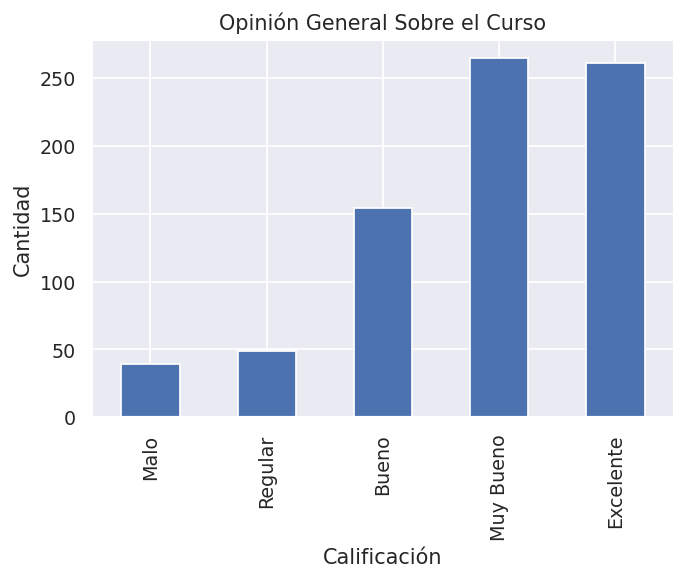

In [8]:
plt.figure(dpi=125)
plt.title('Opinión General Sobre el Curso')
ax = comp['Opinión General Sobre el Curso'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels([reverse_map(map_opinion)[int(x.get_text())] for x in ax.get_xticklabels()])
plt.xlabel("Calificación")
plt.ylabel("Cantidad")
plt.show()

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

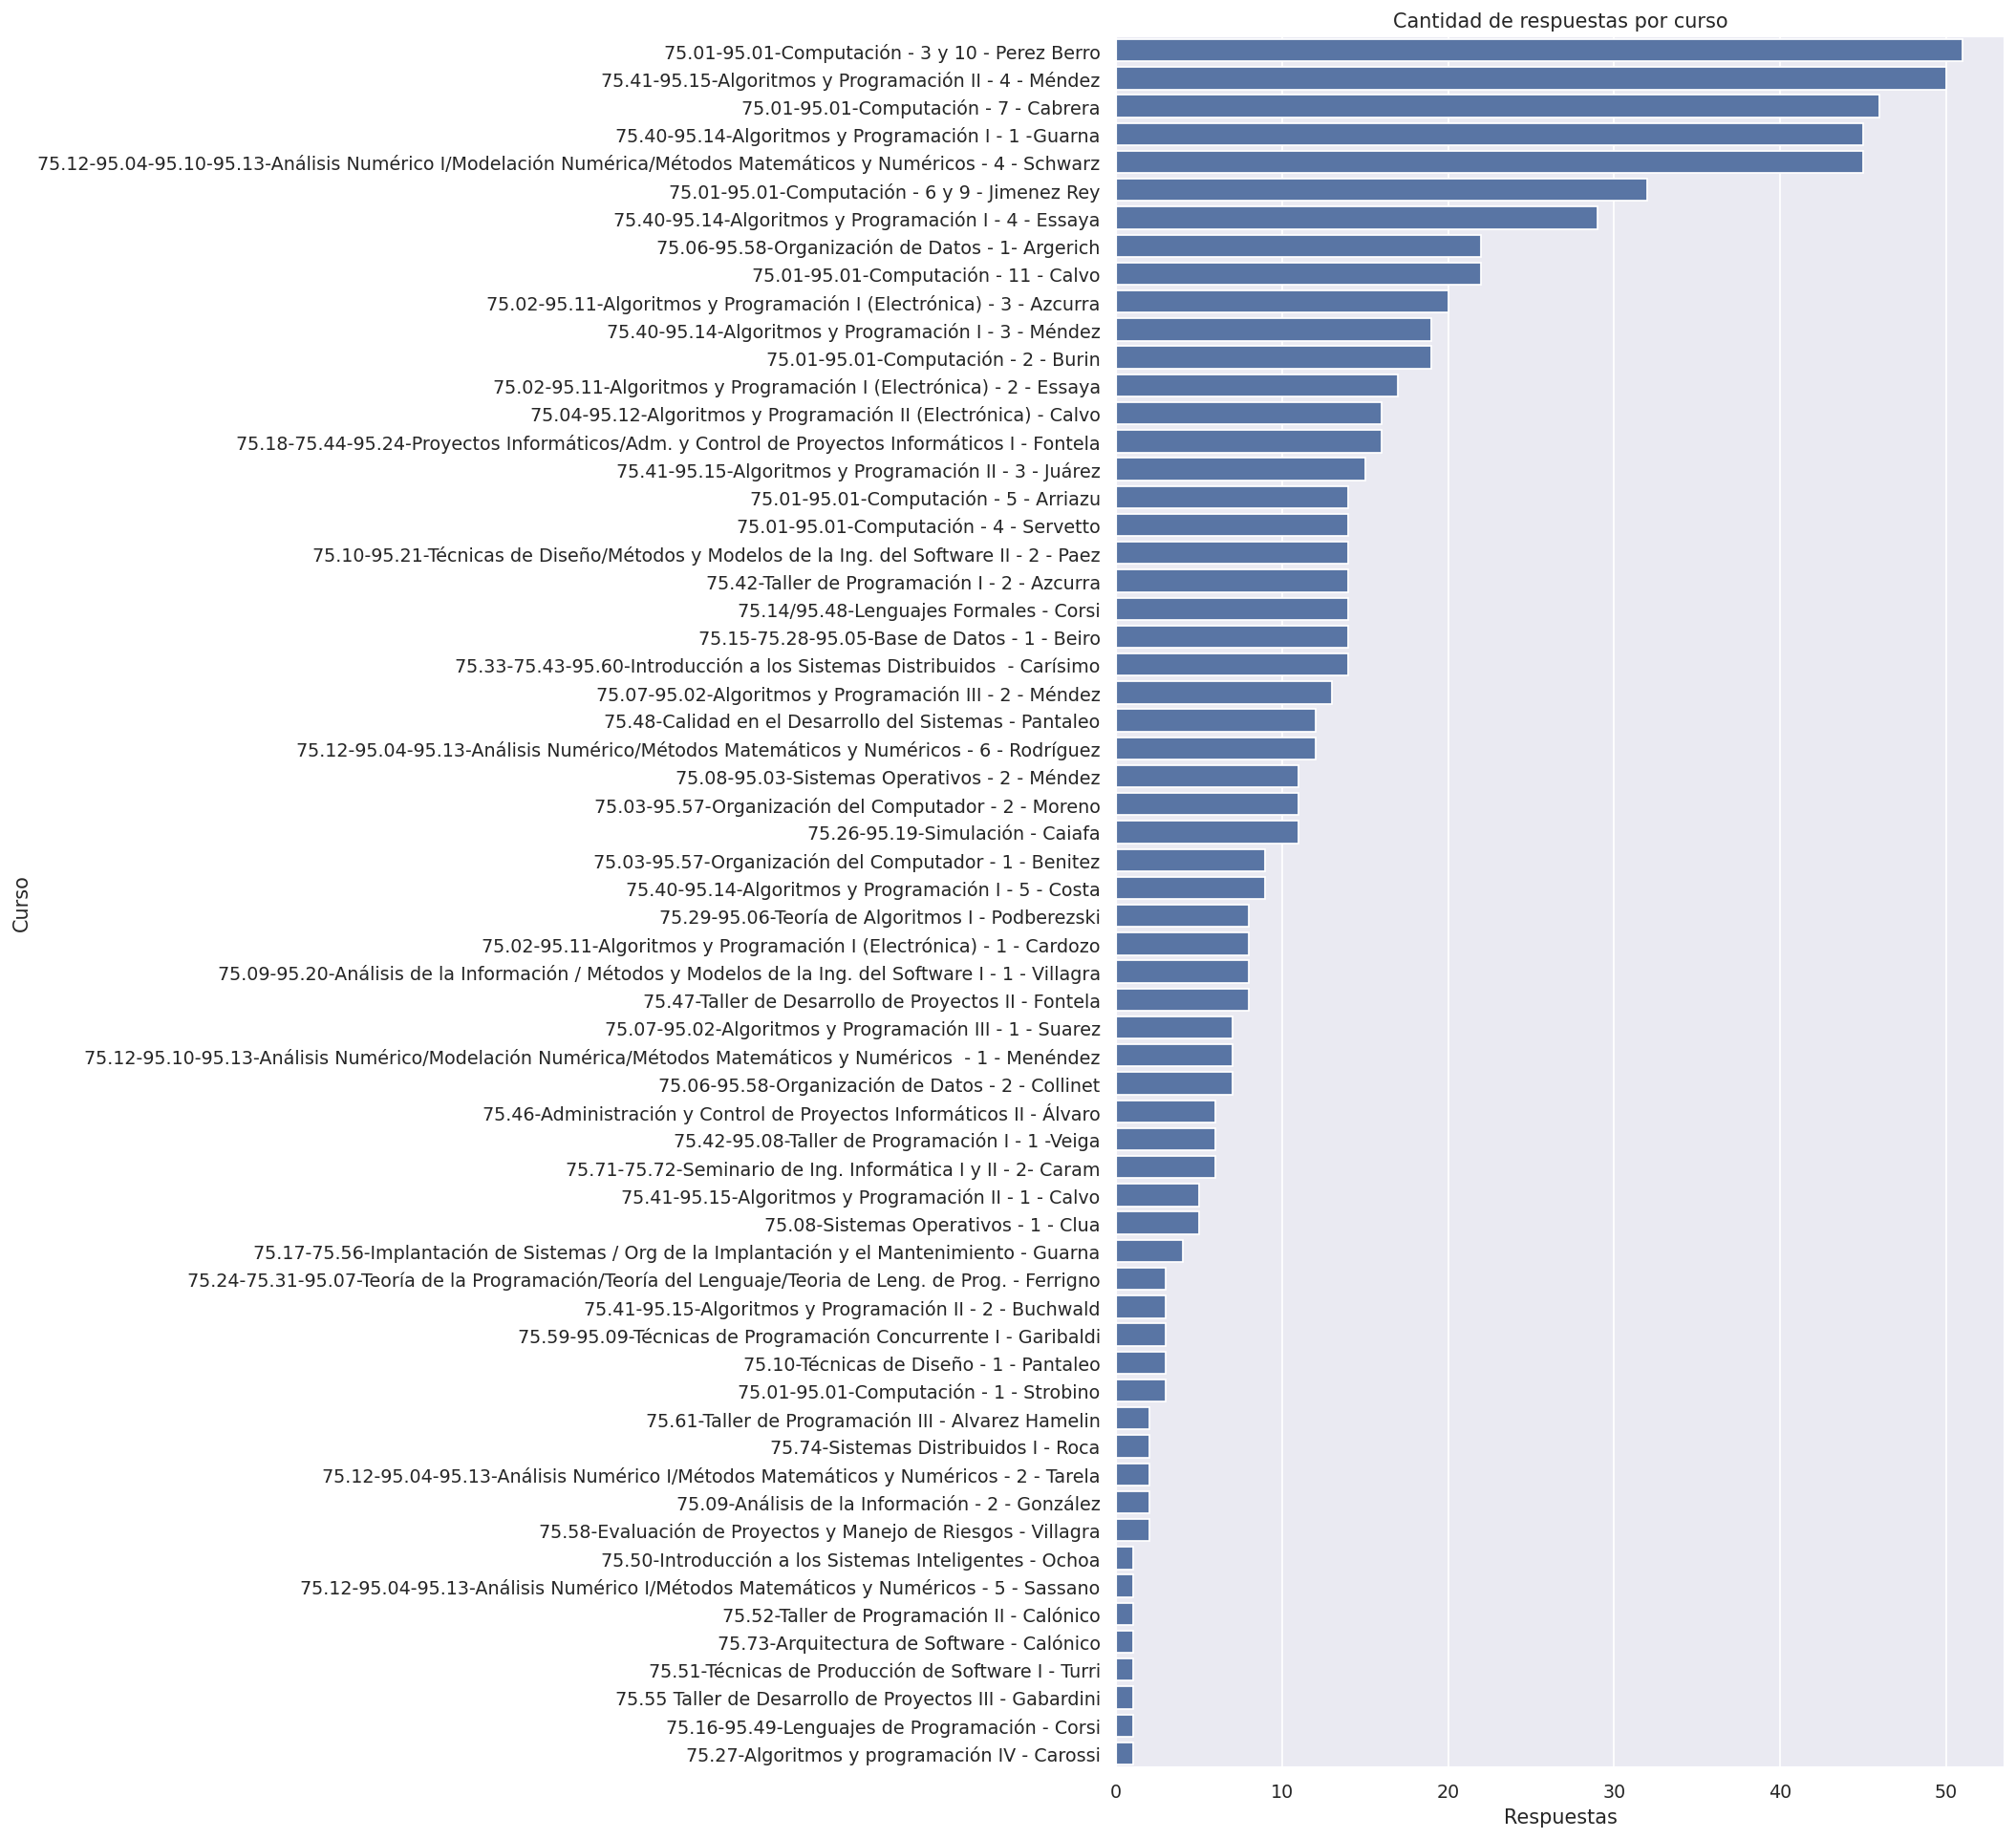

In [9]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

data = comp['Elige el curso'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=data.values, y=data.index, color='b')

plt.title("Cantidad de respuestas por curso")
plt.xlabel("Respuestas")
plt.ylabel("Curso")

plt.show()

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

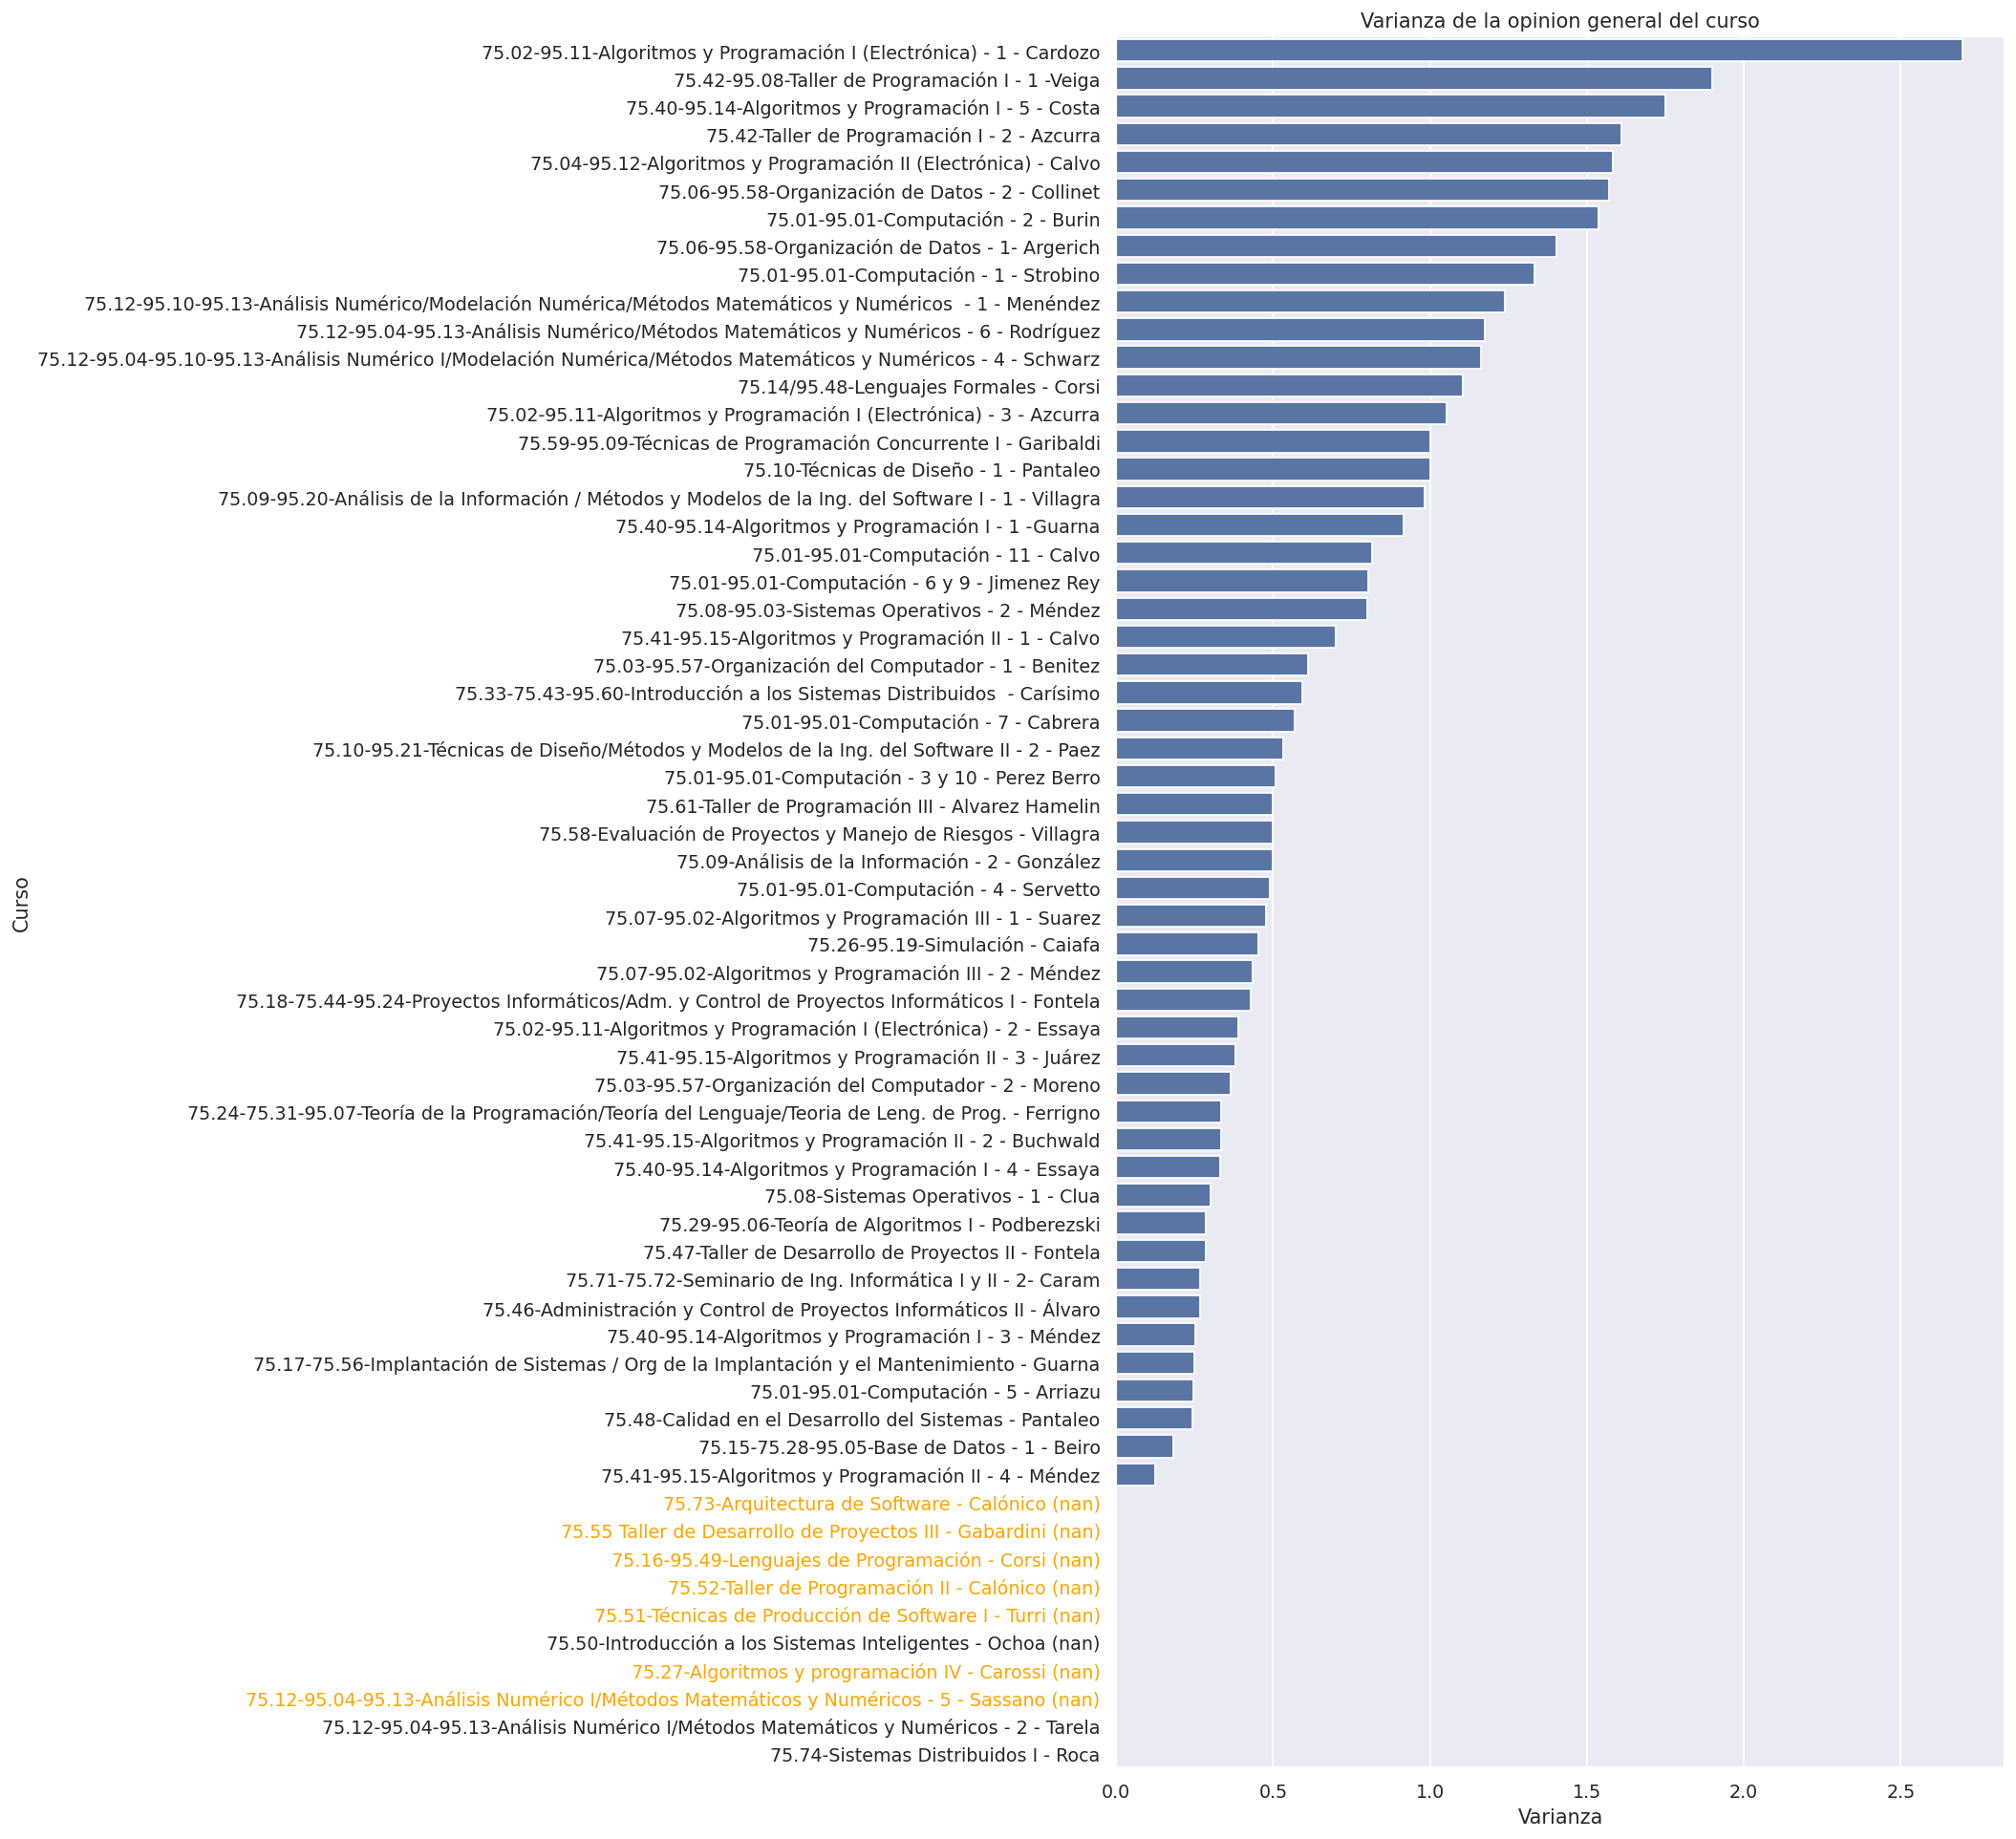

In [10]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

var_curso = comp.groupby('Elige el curso')['Opinión General Sobre el Curso'].var()
nan_var = var_curso[var_curso.isna()].index.tolist()

data = var_curso.fillna(0).sort_values(ascending=False)

ax = sns.barplot(x=data.values, y=data.index, color='b')

ax.set_yticklabels([x if x.get_text() not in nan_var else f"{x.get_text()} (nan)" for x in ax.get_yticklabels()])

for yticklabel in ax.get_yticklabels():
    if yticklabel.get_text().rstrip(" (na)") in nan_var:
        yticklabel.set_color("orange")
    
plt.title("Varianza de la opinion general del curso")
plt.xlabel("Varianza")
plt.ylabel("Curso")

plt.show()

## Comparativa de promedios por pregunta
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

In [11]:
num_cols = ['Opinión General Sobre el Curso',
 '¿Aprobó la Cursada?',
 '¿Cómo te Resultaron los Temas de la Materia?',
 '¿Los Temas de la Materia Están Actualizados?',
 'Nivel de las Clases Teóricas del Curso',
 'Nivel de las Clases Prácticas del Curso',
 'Dificultad del Curso',
 'Dificultad del TP',
 'Promedio nivel teóricas y prácticas']

In [12]:
cursos_5p_respuestas = comp['Elige el curso'].value_counts().where(lambda x: x >= 5).dropna().index.tolist()
comp_5p = comp[comp['Elige el curso'].isin(cursos_5p_respuestas)].sort_values(by='Elige el curso')
comp_5p_mean = comp_5p.groupby('Elige el curso')[num_cols].mean()

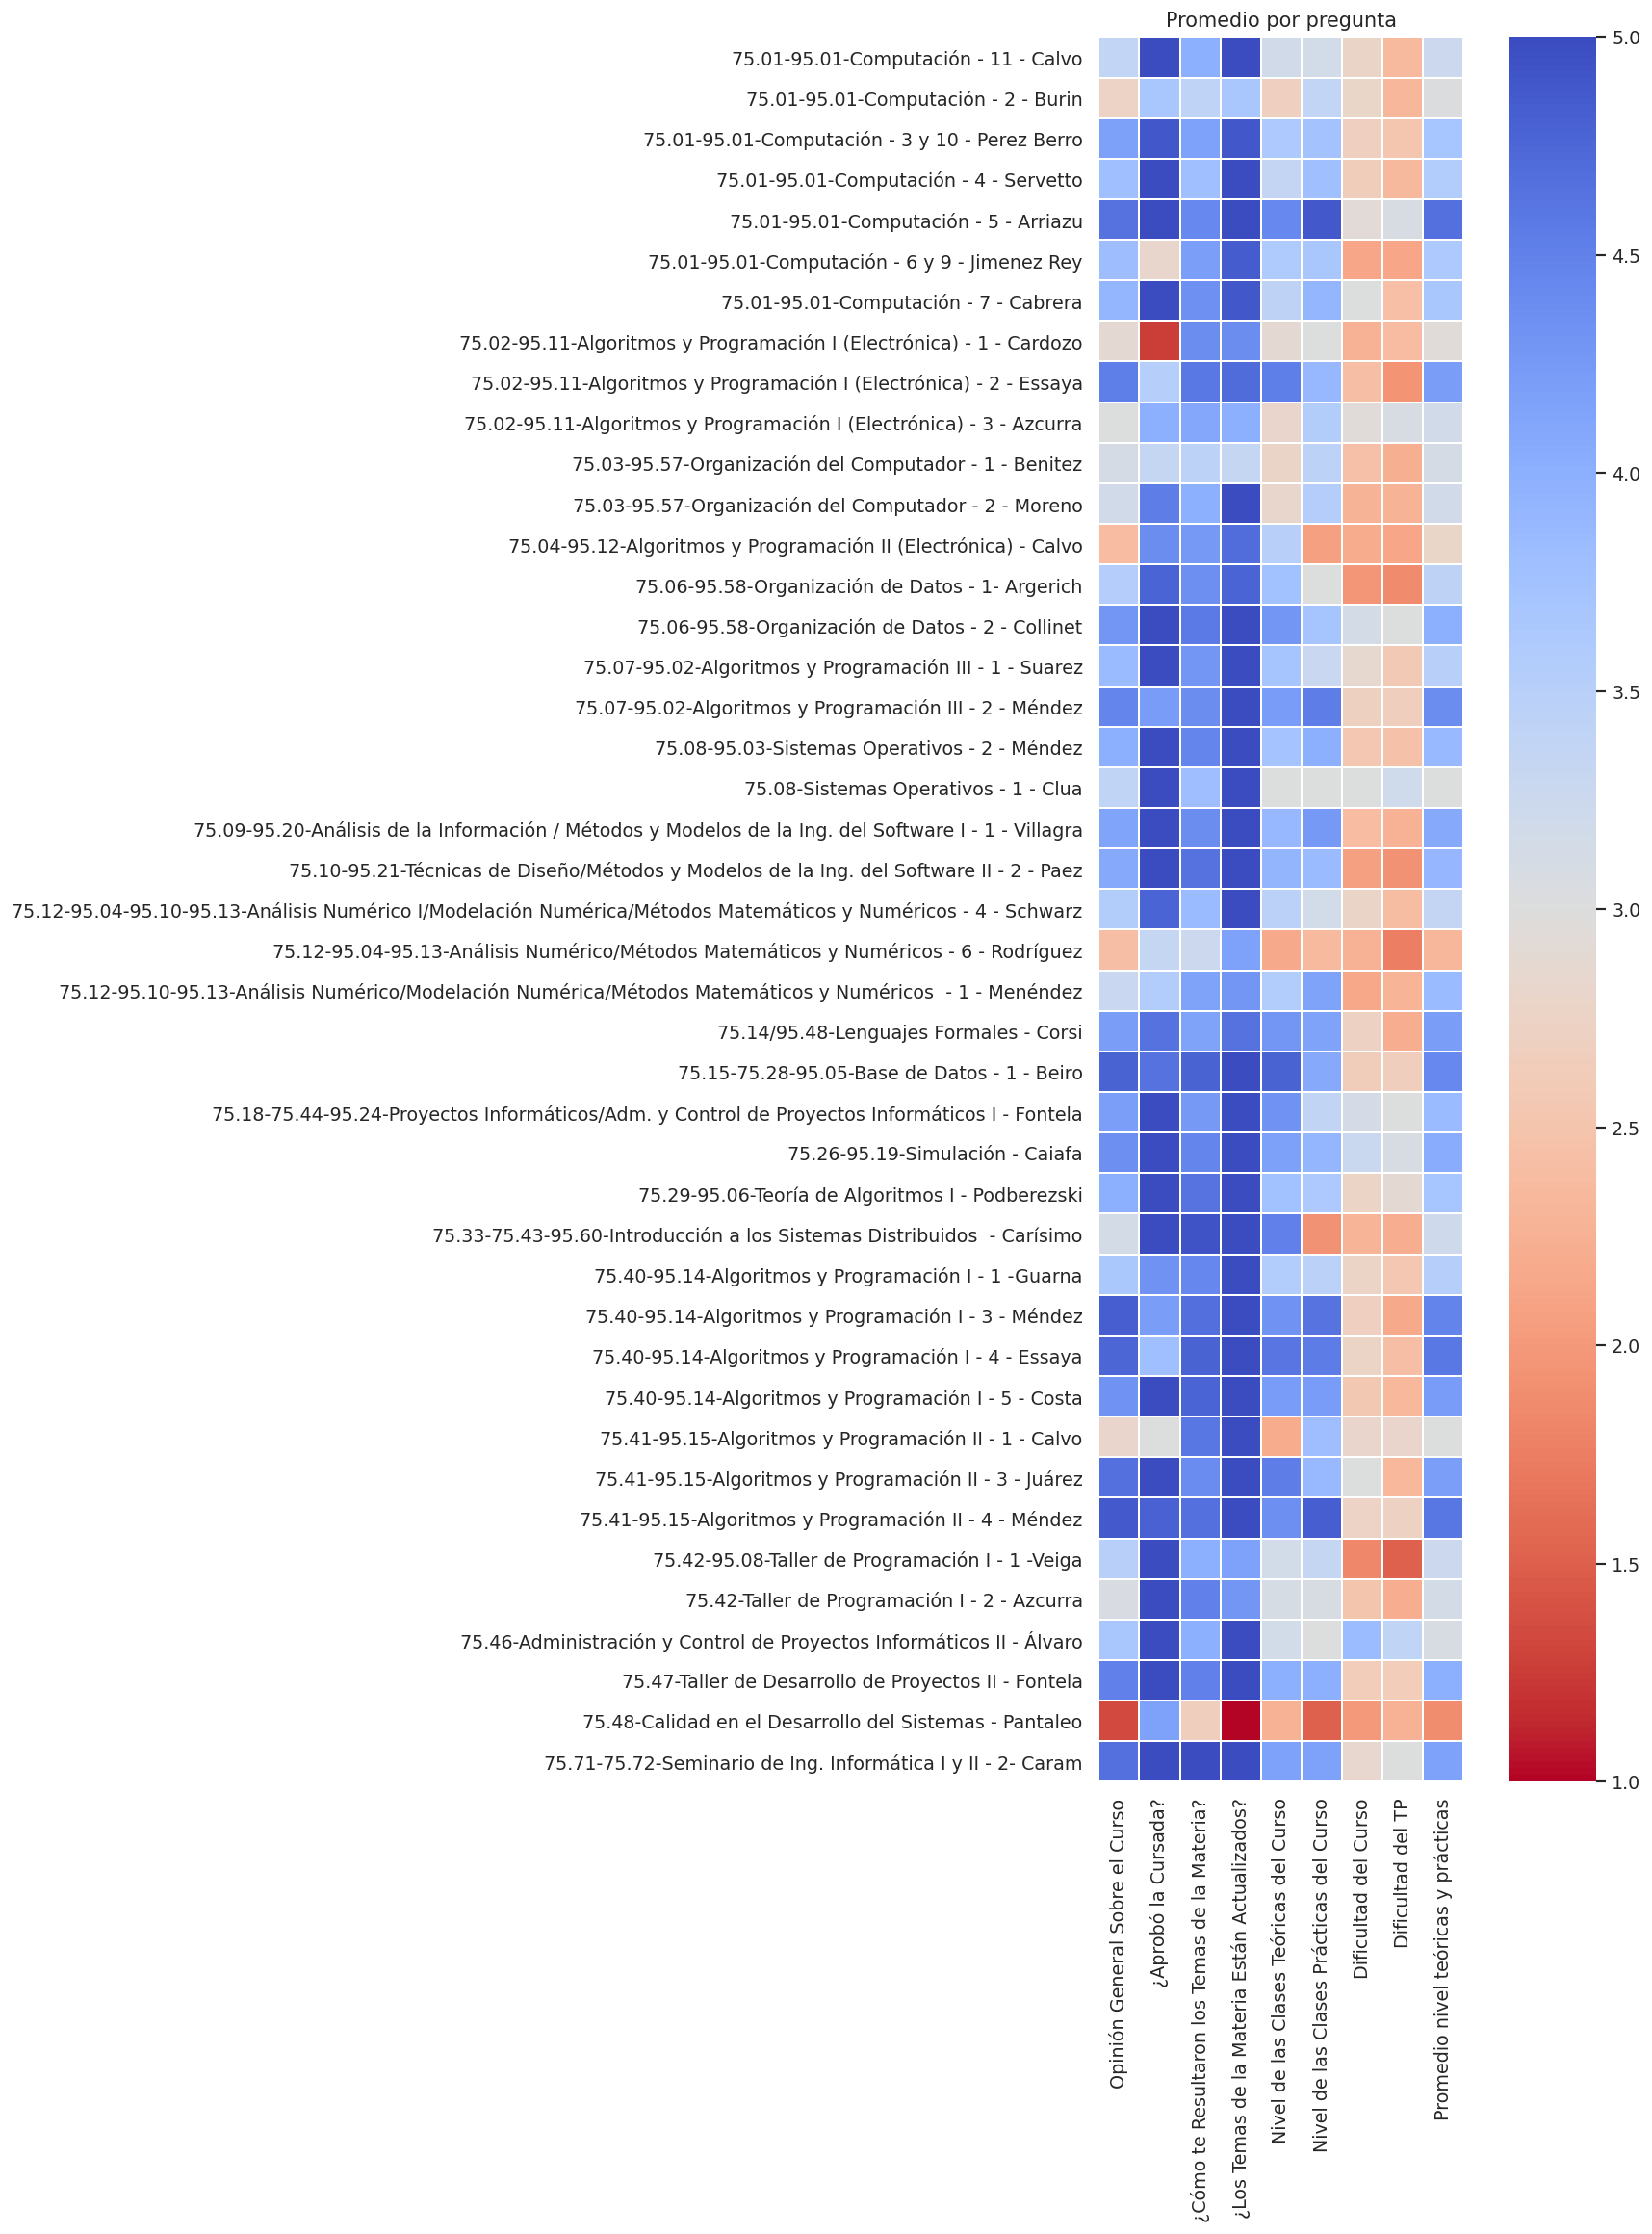

In [13]:
plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

sns.heatmap(data=comp_5p_mean, cmap='coolwarm_r',linewidths=.2, square=True, vmin=1, vmax=5)
plt.ylabel("")
plt.title("Promedio por pregunta")
plt.show()

## Histograma de promedios por pregunta
Por cada curso se calcula el promedio de cada pregunta numérica y luego se hace un histograma de esos promedios.

### Histograma de promedios de Opinión General Sobre el Curso

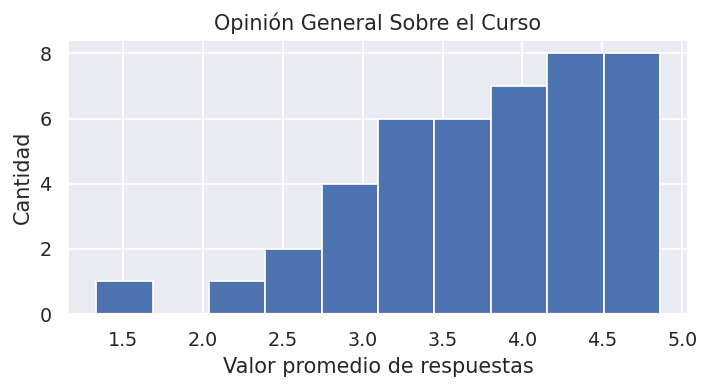

### Histograma de promedios de ¿Aprobó la Cursada?

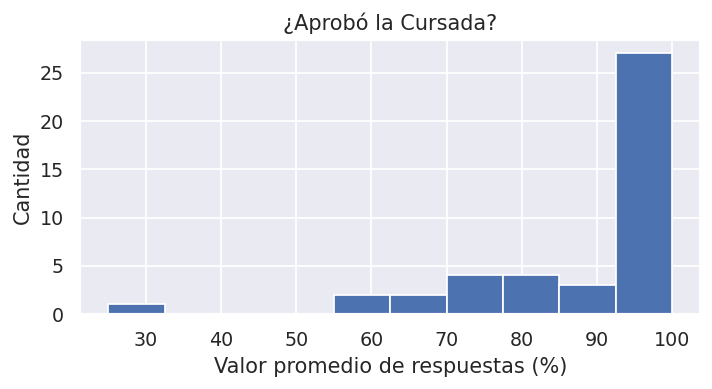

### Histograma de promedios de ¿Cómo te Resultaron los Temas de la Materia?

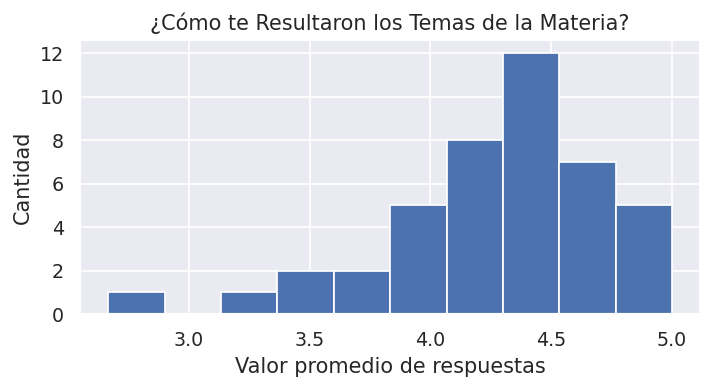

### Histograma de promedios de ¿Los Temas de la Materia Están Actualizados?

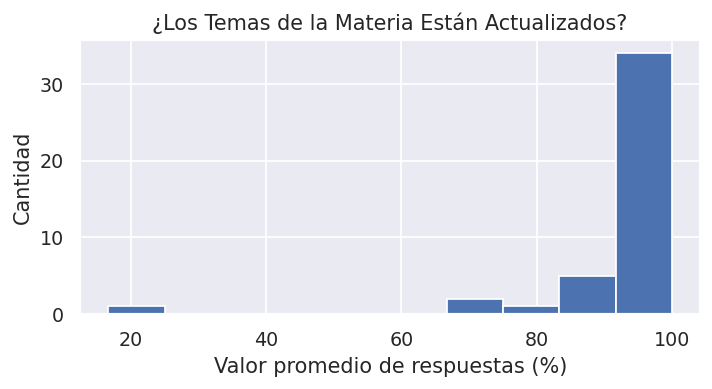

### Histograma de promedios de Nivel de las Clases Teóricas del Curso

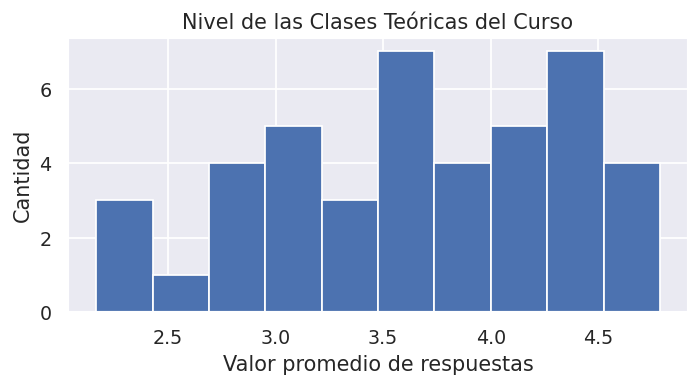

### Histograma de promedios de Nivel de las Clases Prácticas del Curso

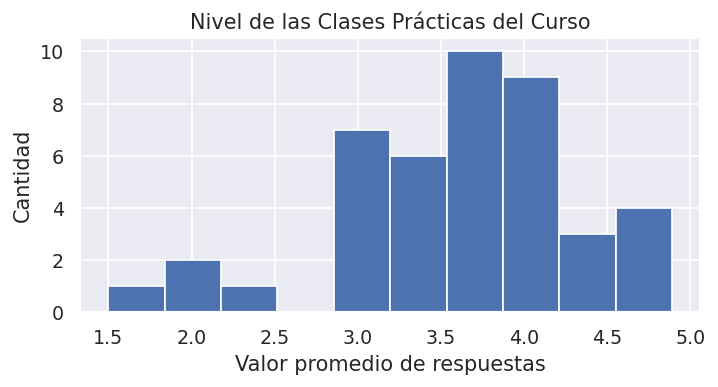

### Histograma de promedios de Dificultad del Curso

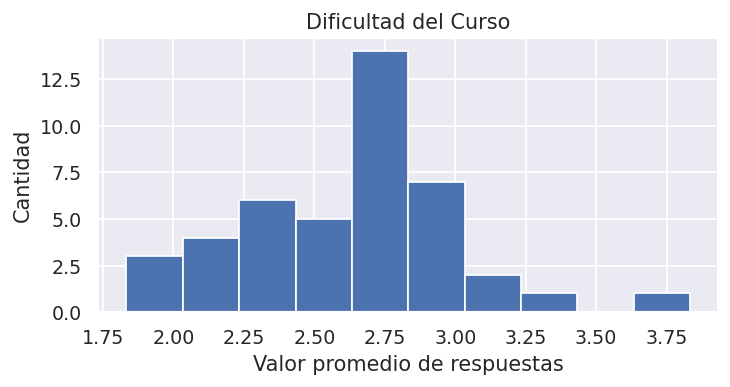

### Histograma de promedios de Dificultad del TP

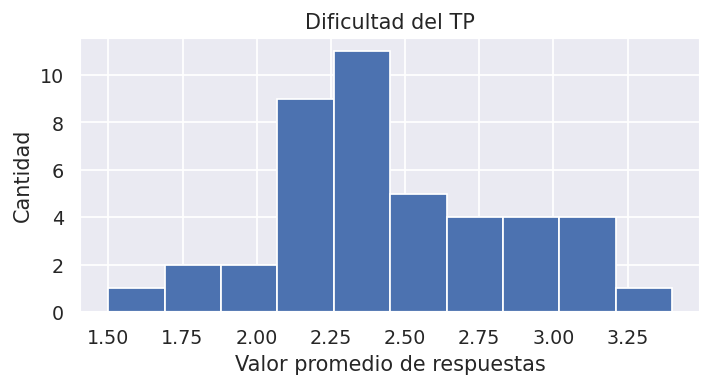

### Histograma de promedios de Promedio nivel teóricas y prácticas

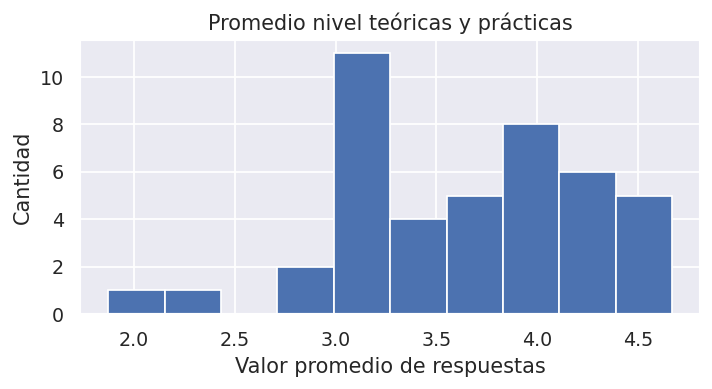

In [14]:
for col in num_cols:
    
    display(Markdown(f"### Histograma de promedios de {col}"))
    fig = plt.figure(dpi=125, figsize=(6.4, 2.9))
    
    values = comp_5p_mean[col].copy()
    if col in cols_sino:
        values *= 20
    
    plt.hist(values, bins=10)
    plt.title(col)
    plt.ylabel("Cantidad")
    
    xlabel = "Valor promedio de respuestas"
    if col in cols_sino:
        xlabel = f"{xlabel} (%)"
    
    plt.xlabel(xlabel)
    plt.show()

## Ranking de cursos por promedio

### Opinión General Sobre el Curso

Se analizan los promedios por curso de Opinión General Sobre el Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

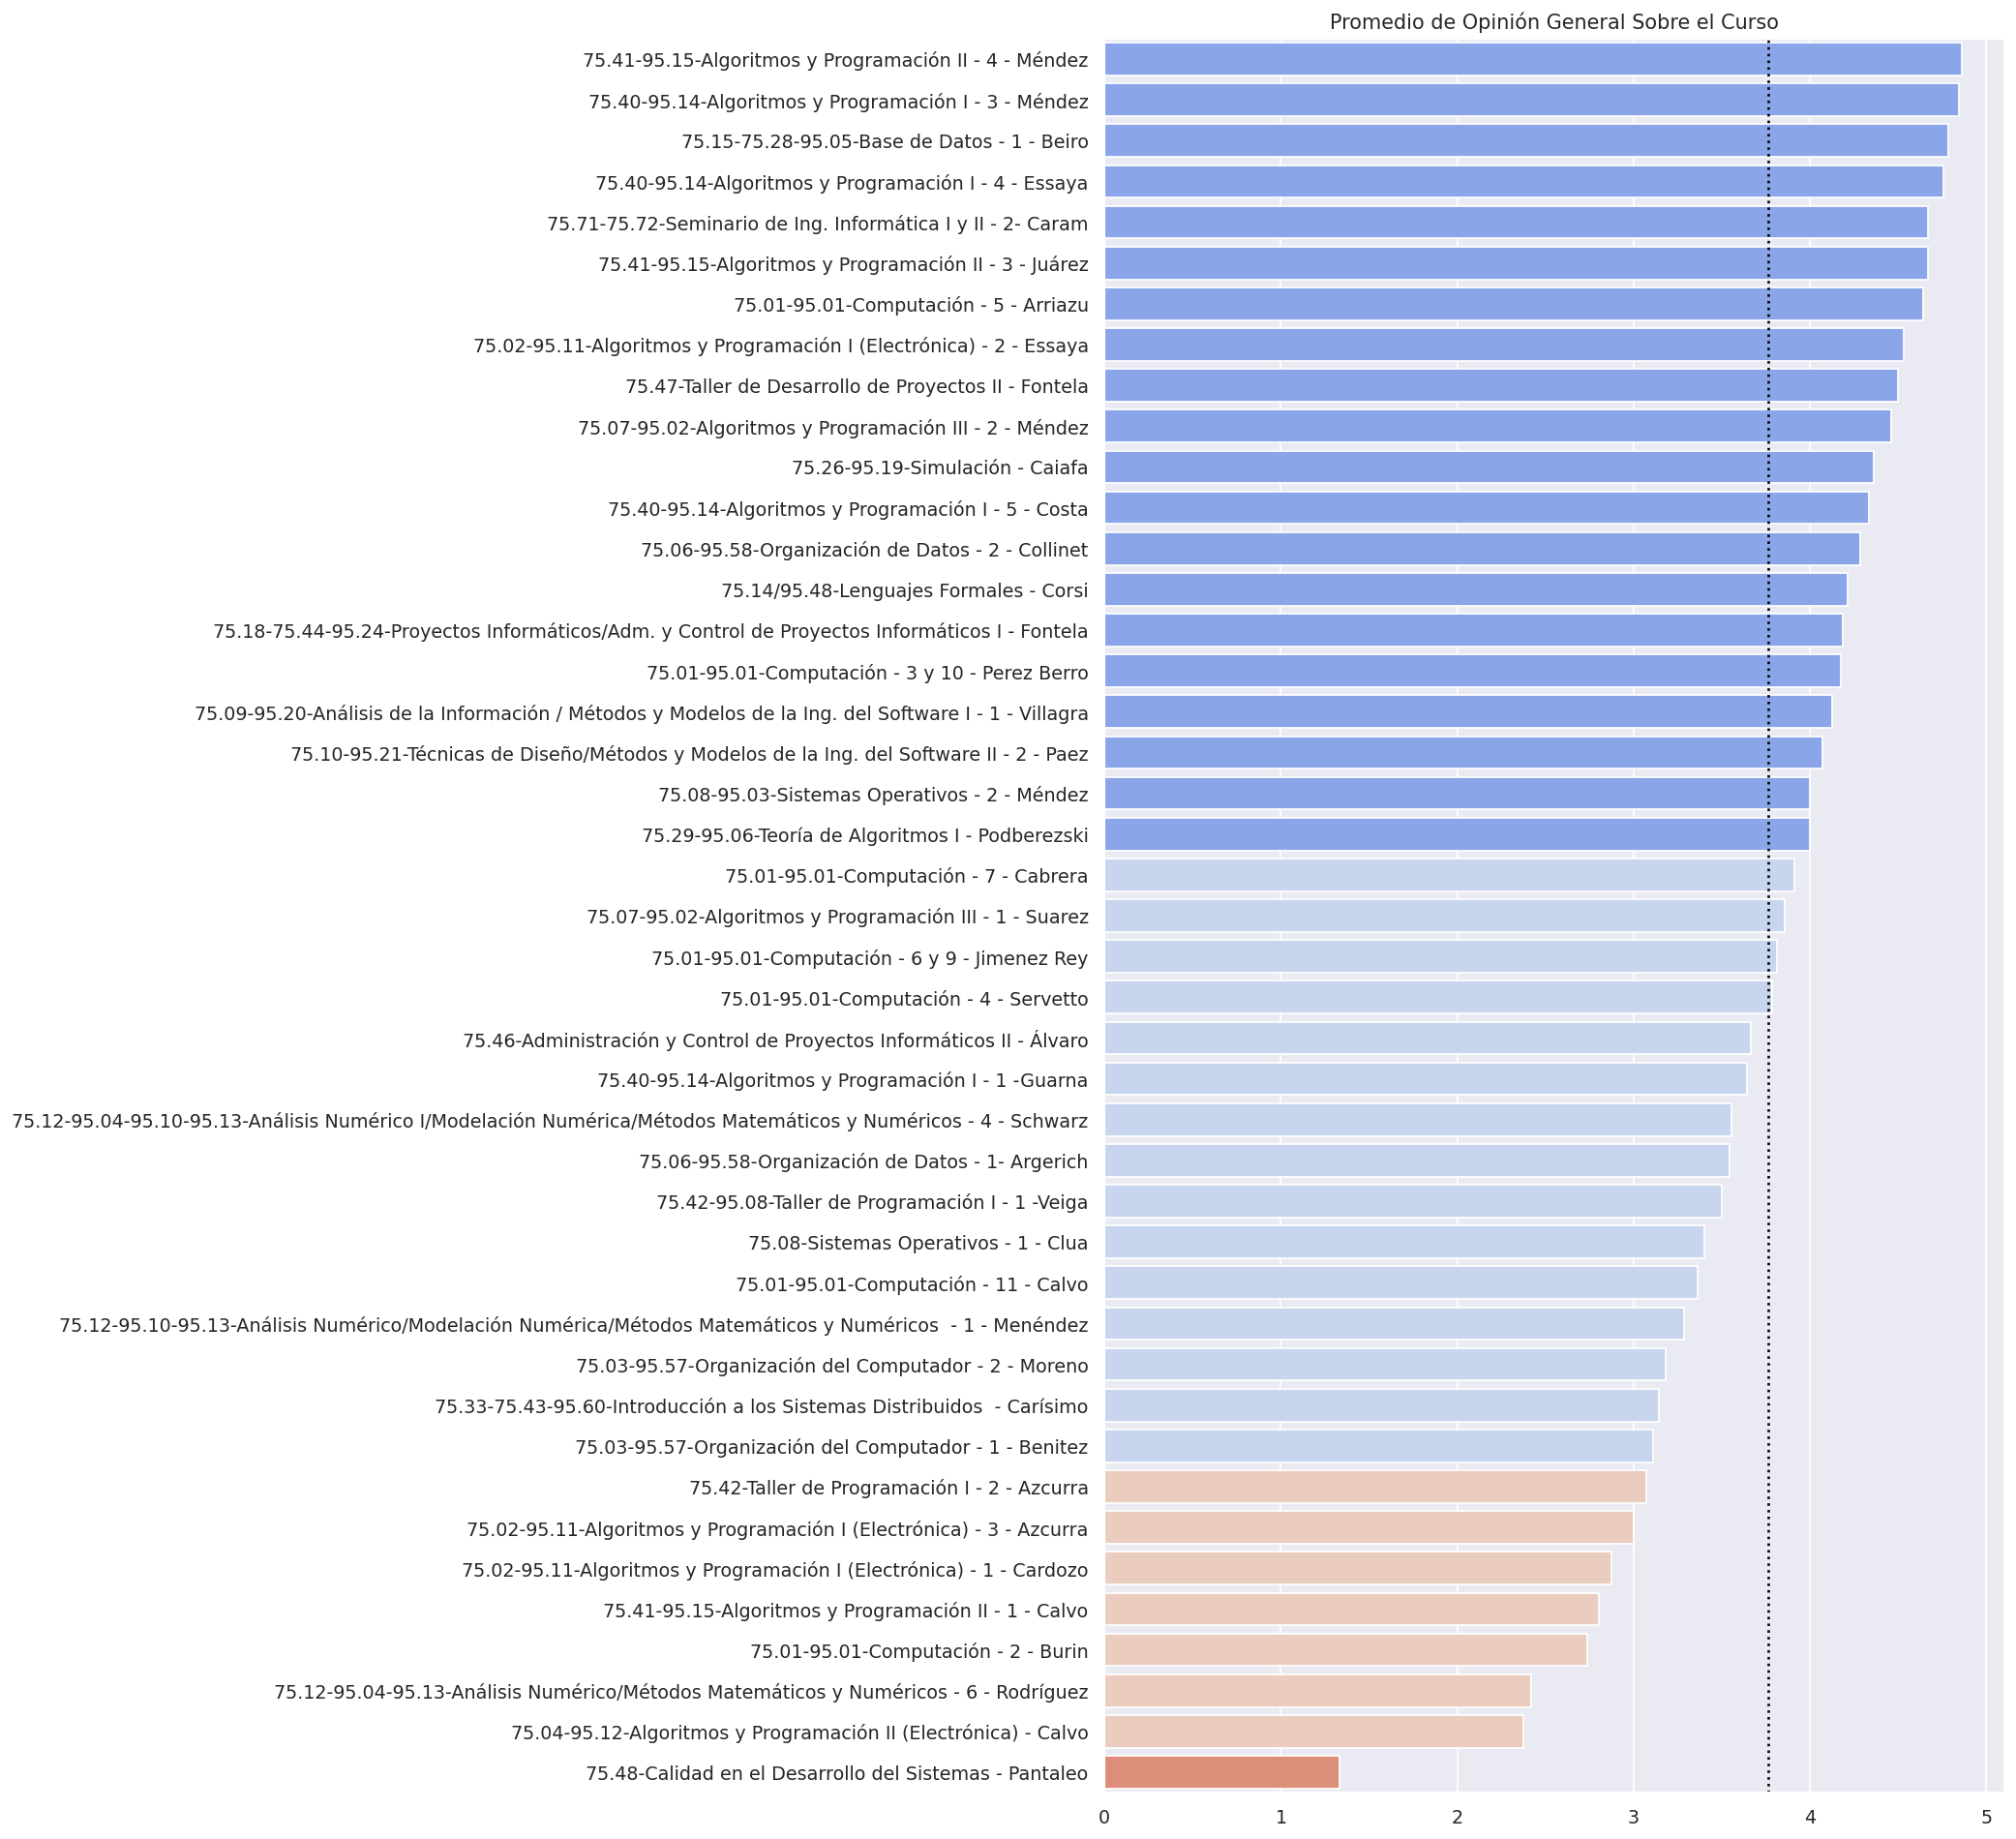

### ¿Aprobó la Cursada?

Se analizan los promedios por curso de ¿Aprobó la Cursada?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

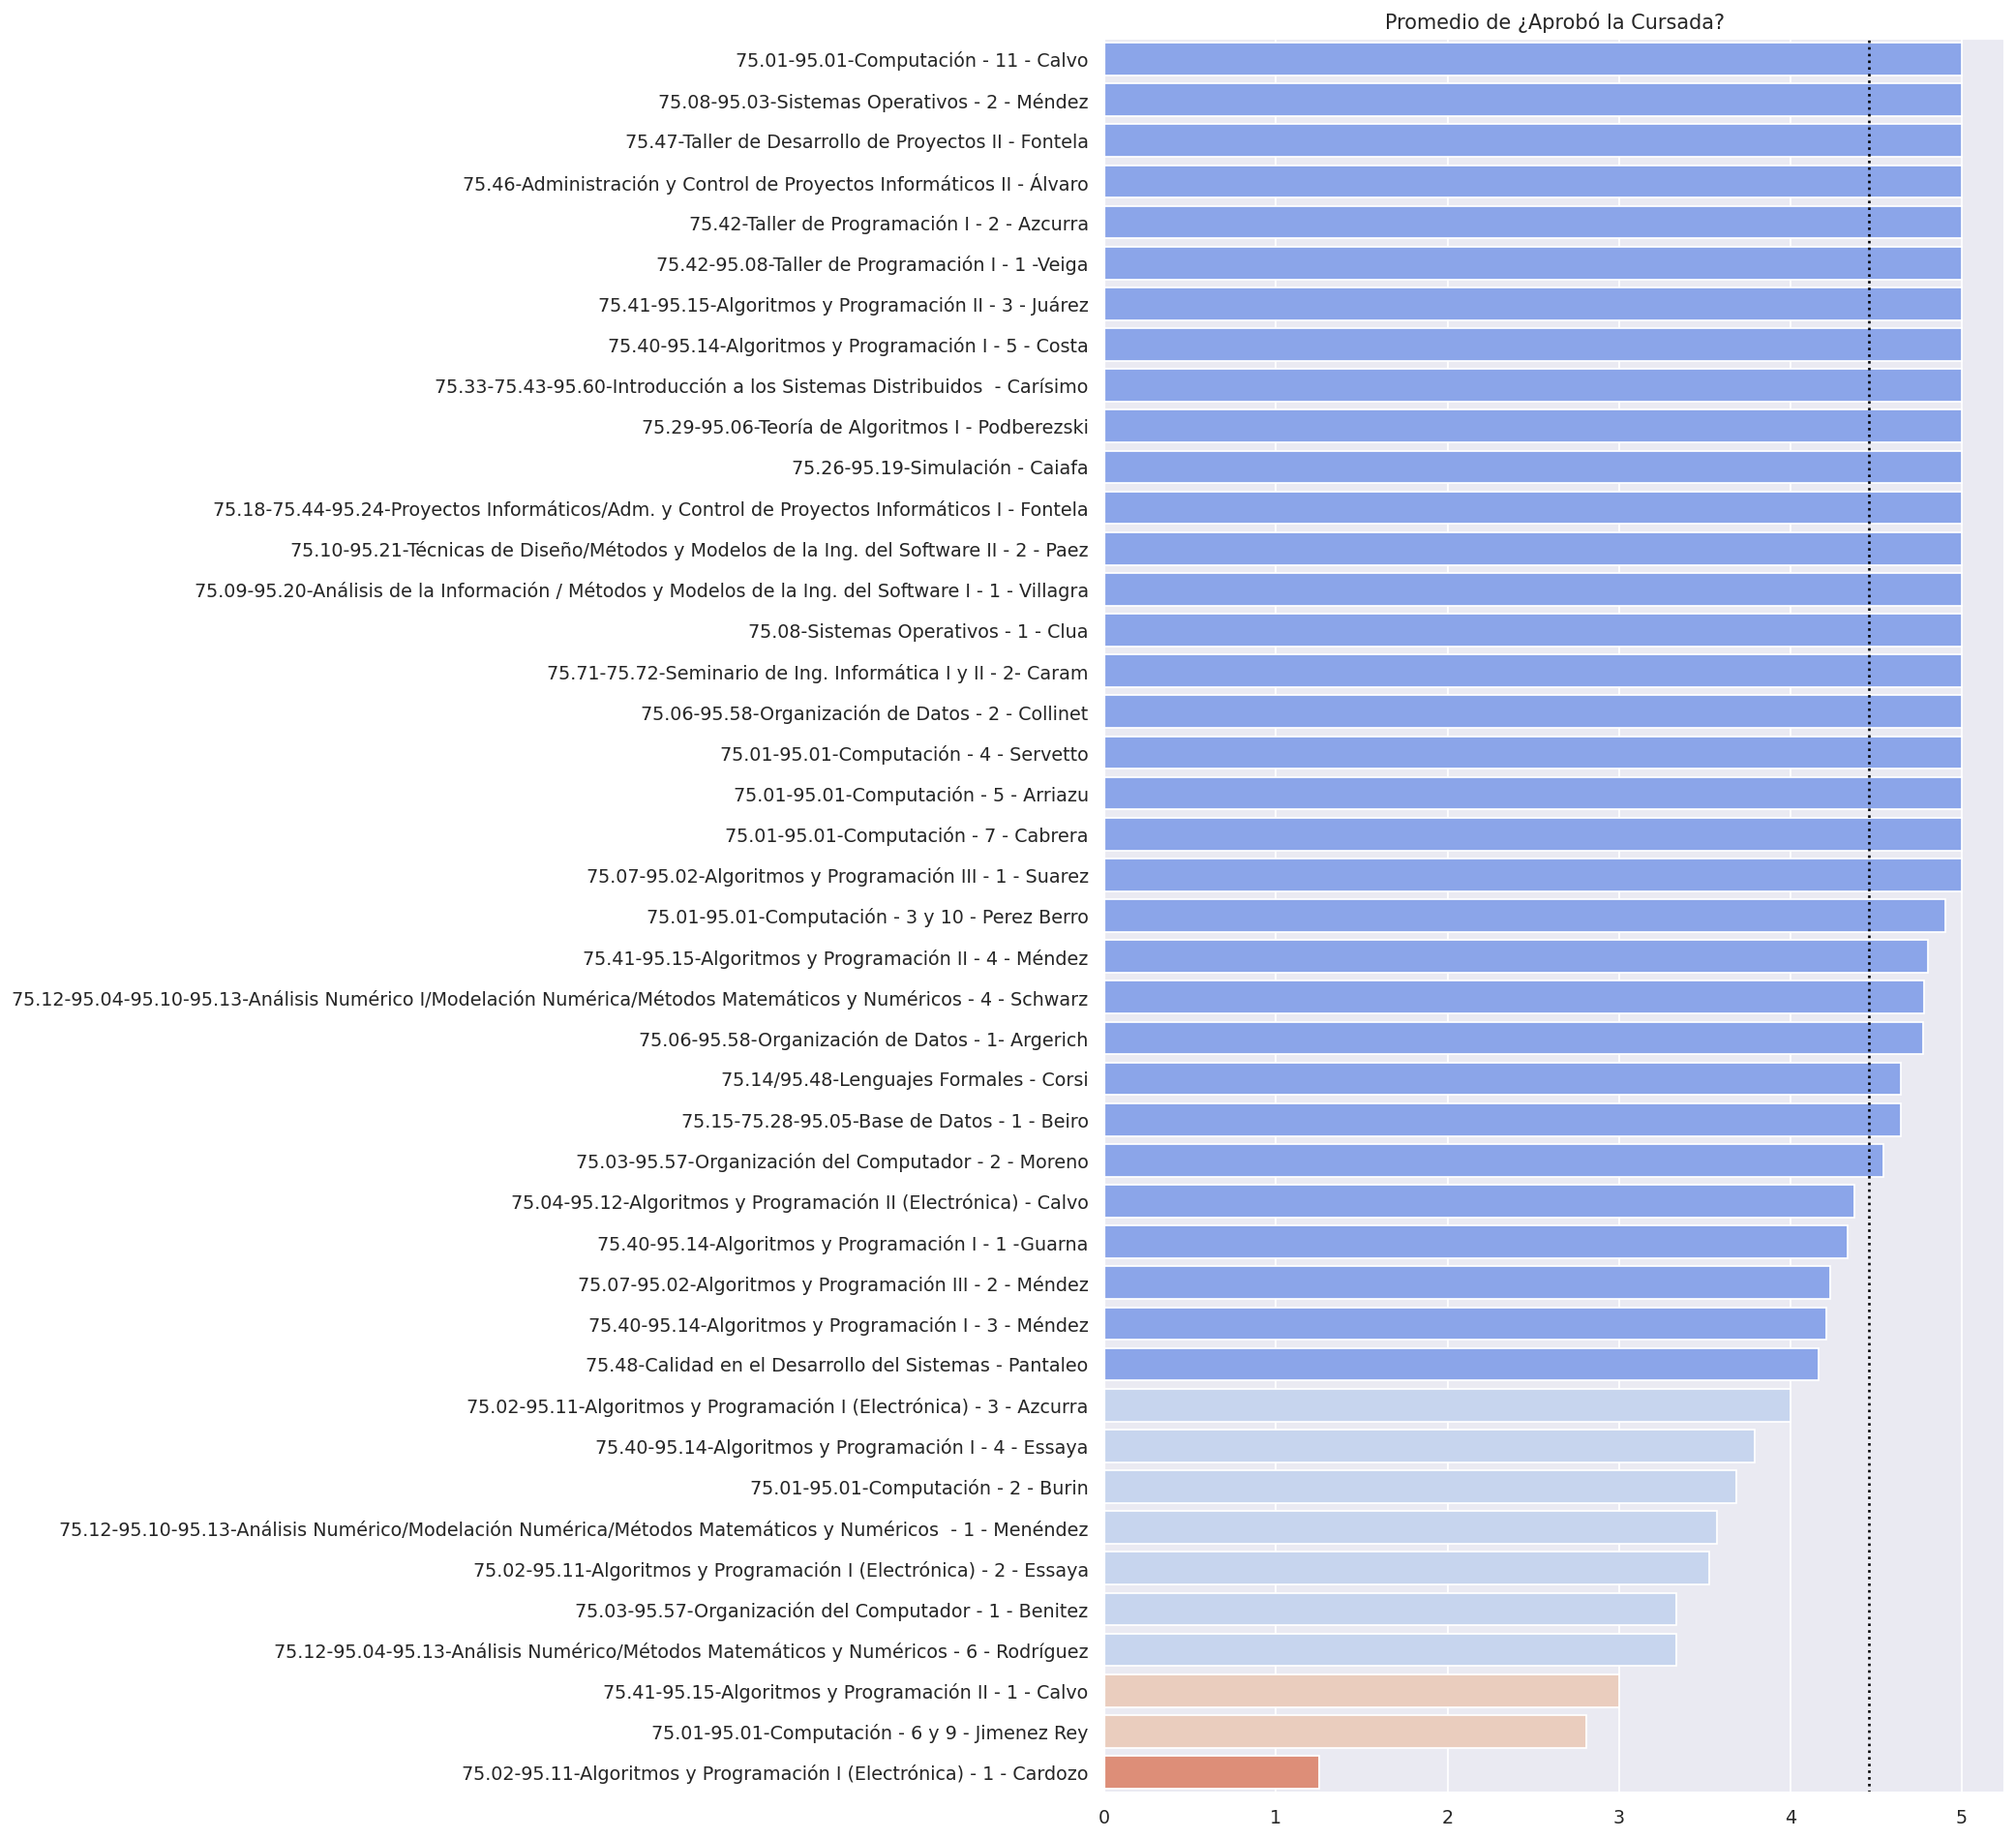

### ¿Cómo te Resultaron los Temas de la Materia?

Se analizan los promedios por curso de ¿Cómo te Resultaron los Temas de la Materia?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

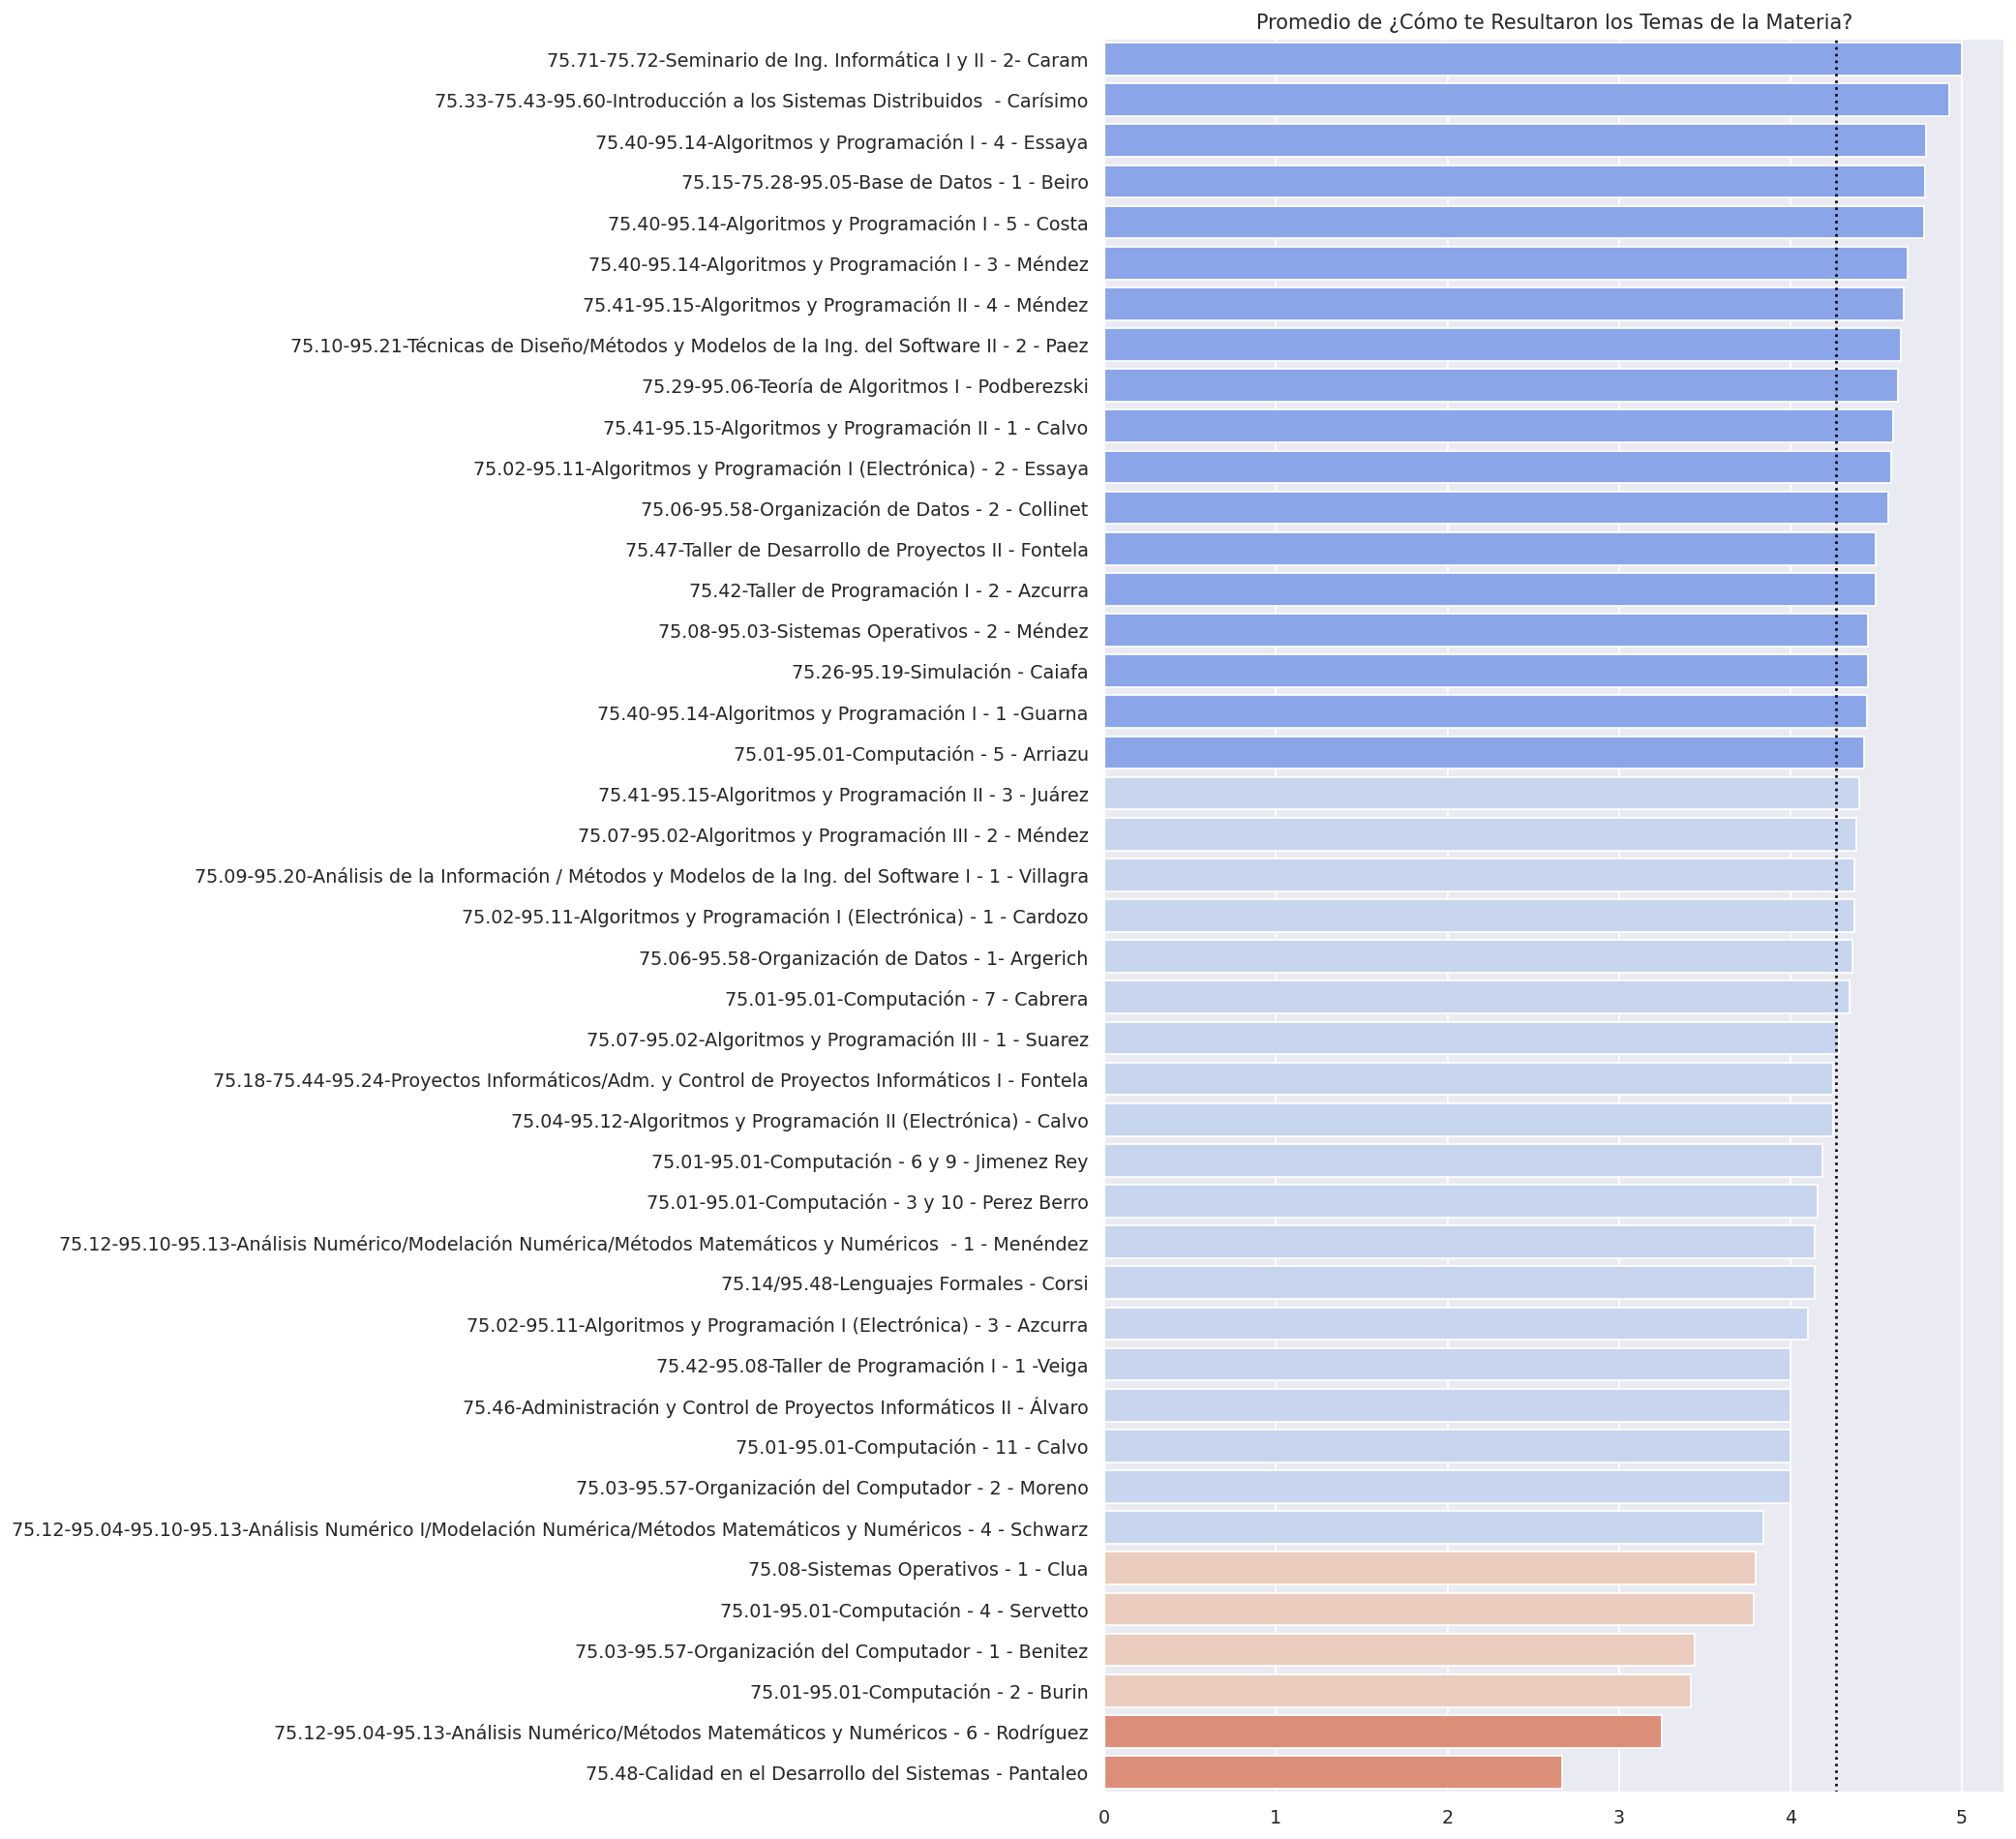

### ¿Los Temas de la Materia Están Actualizados?

Se analizan los promedios por curso de ¿Los Temas de la Materia Están Actualizados?. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

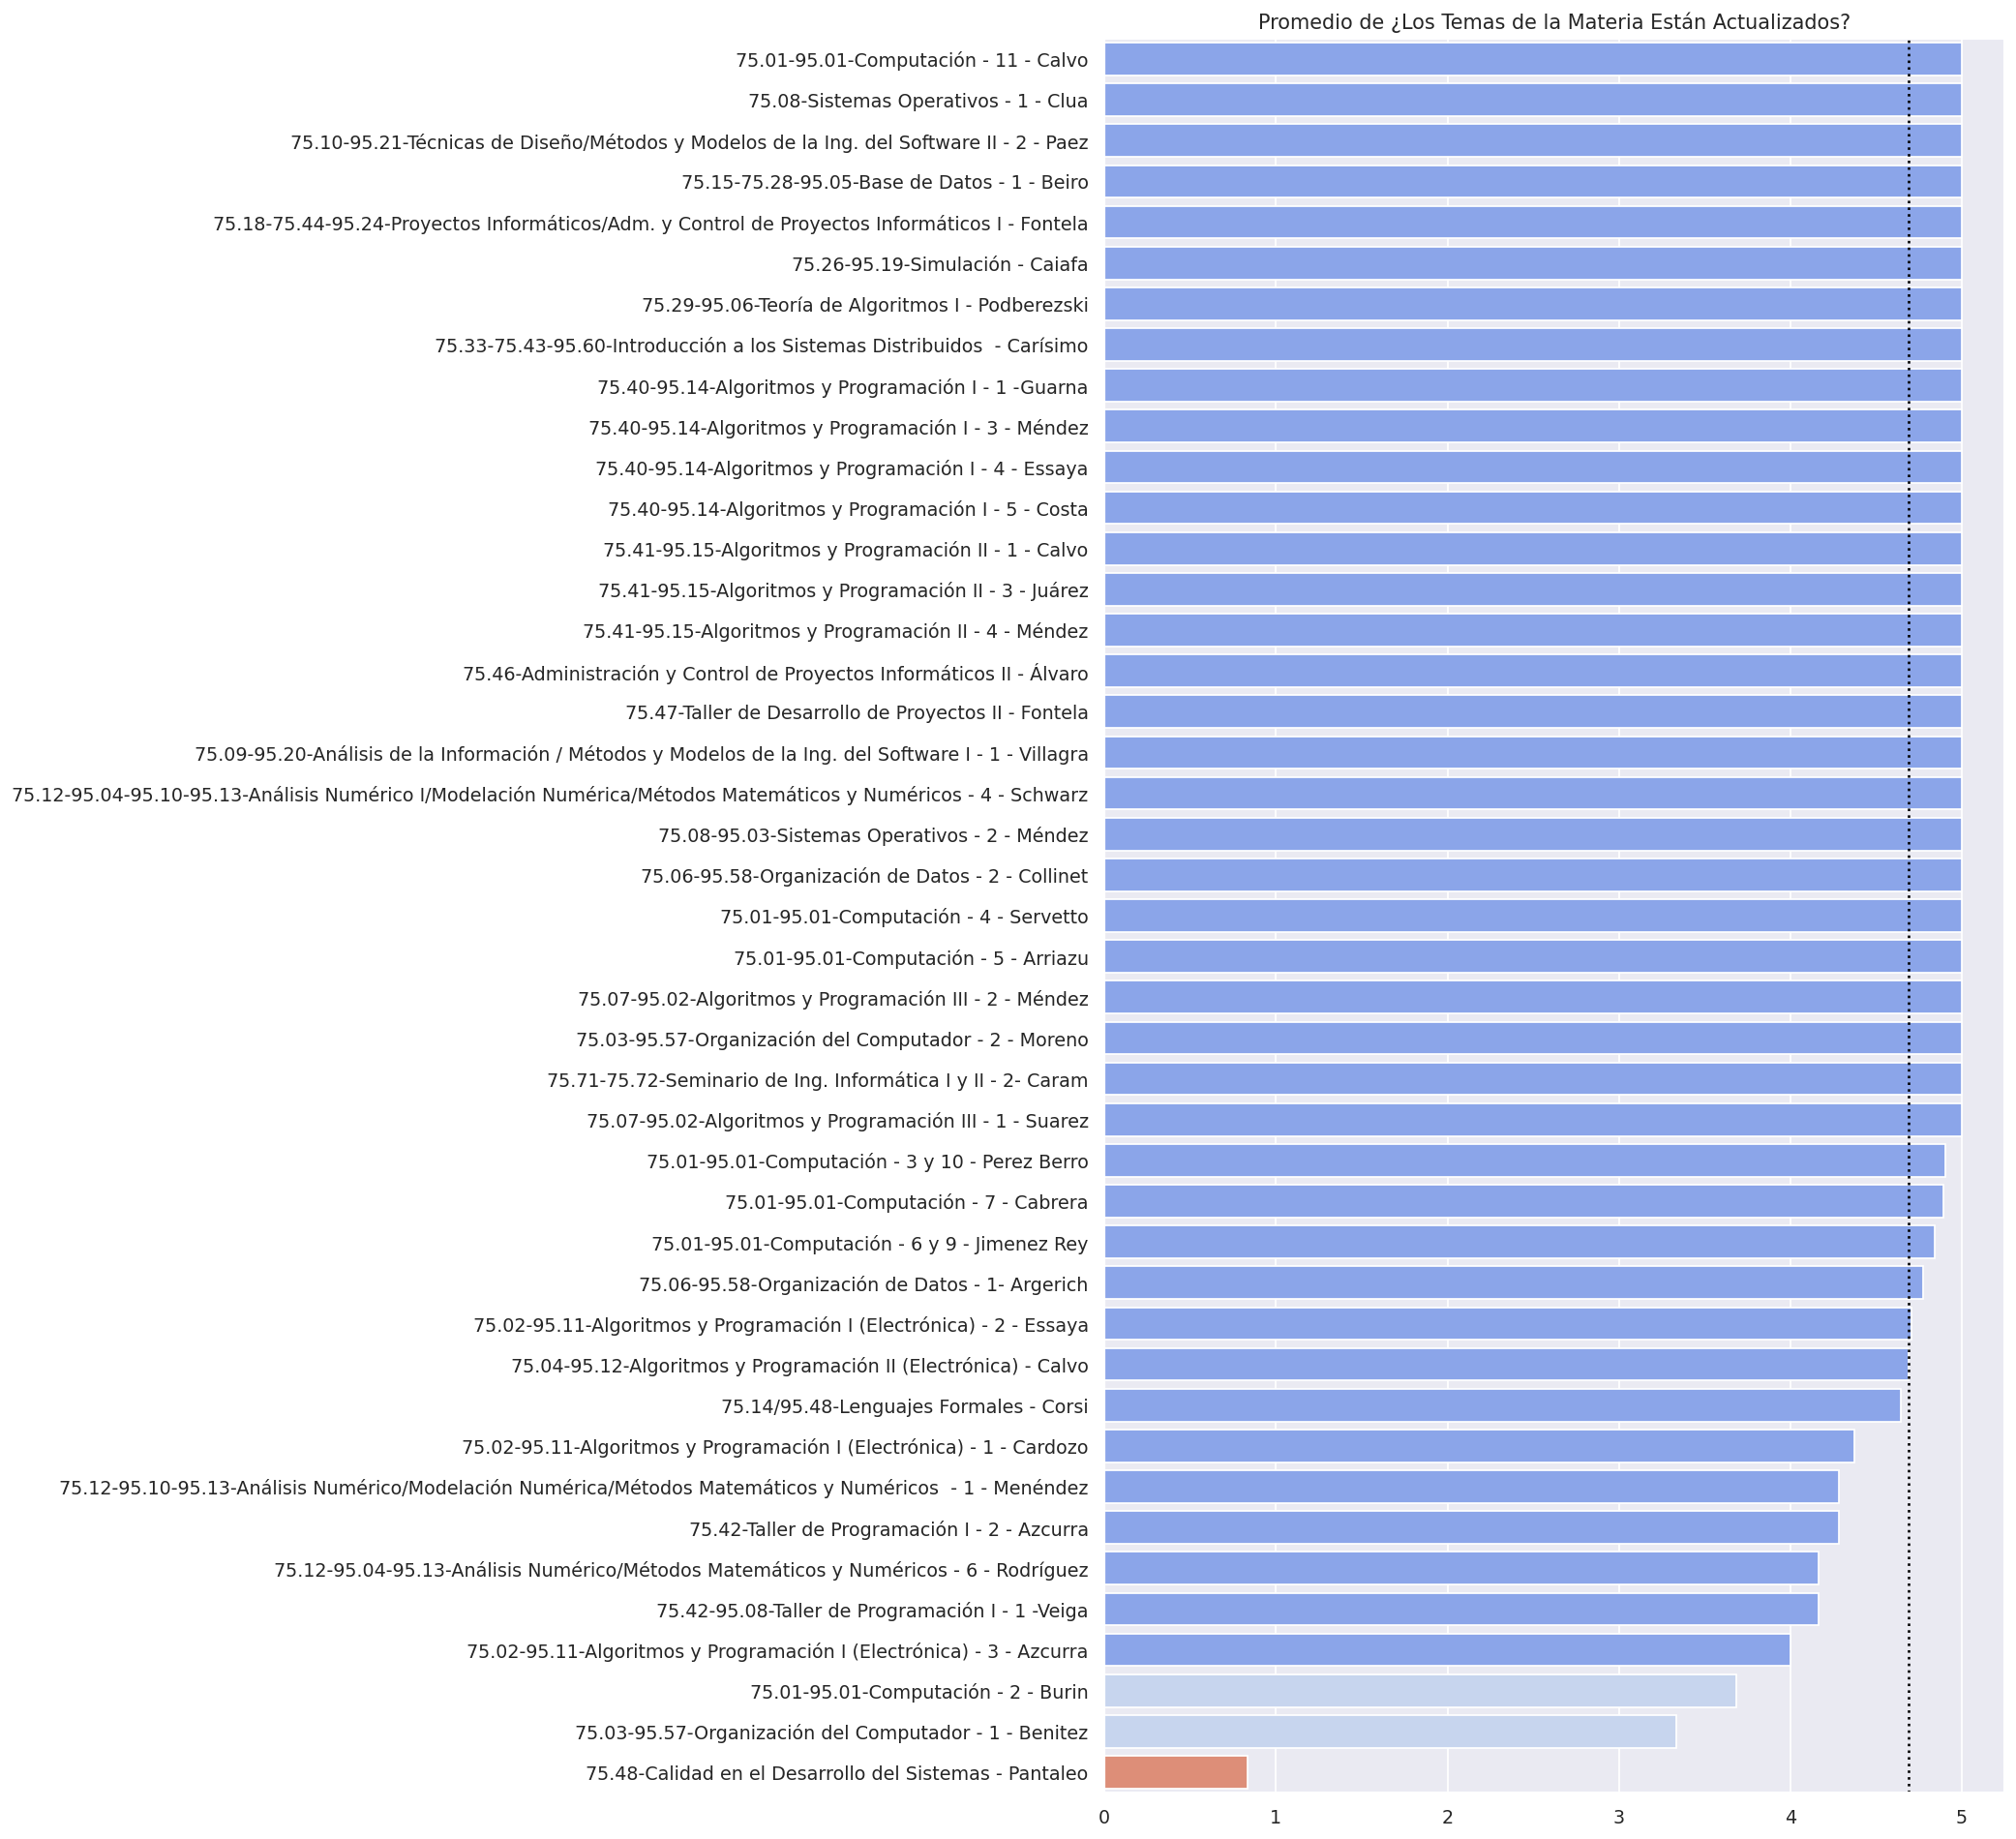

### Nivel de las Clases Teóricas del Curso

Se analizan los promedios por curso de Nivel de las Clases Teóricas del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

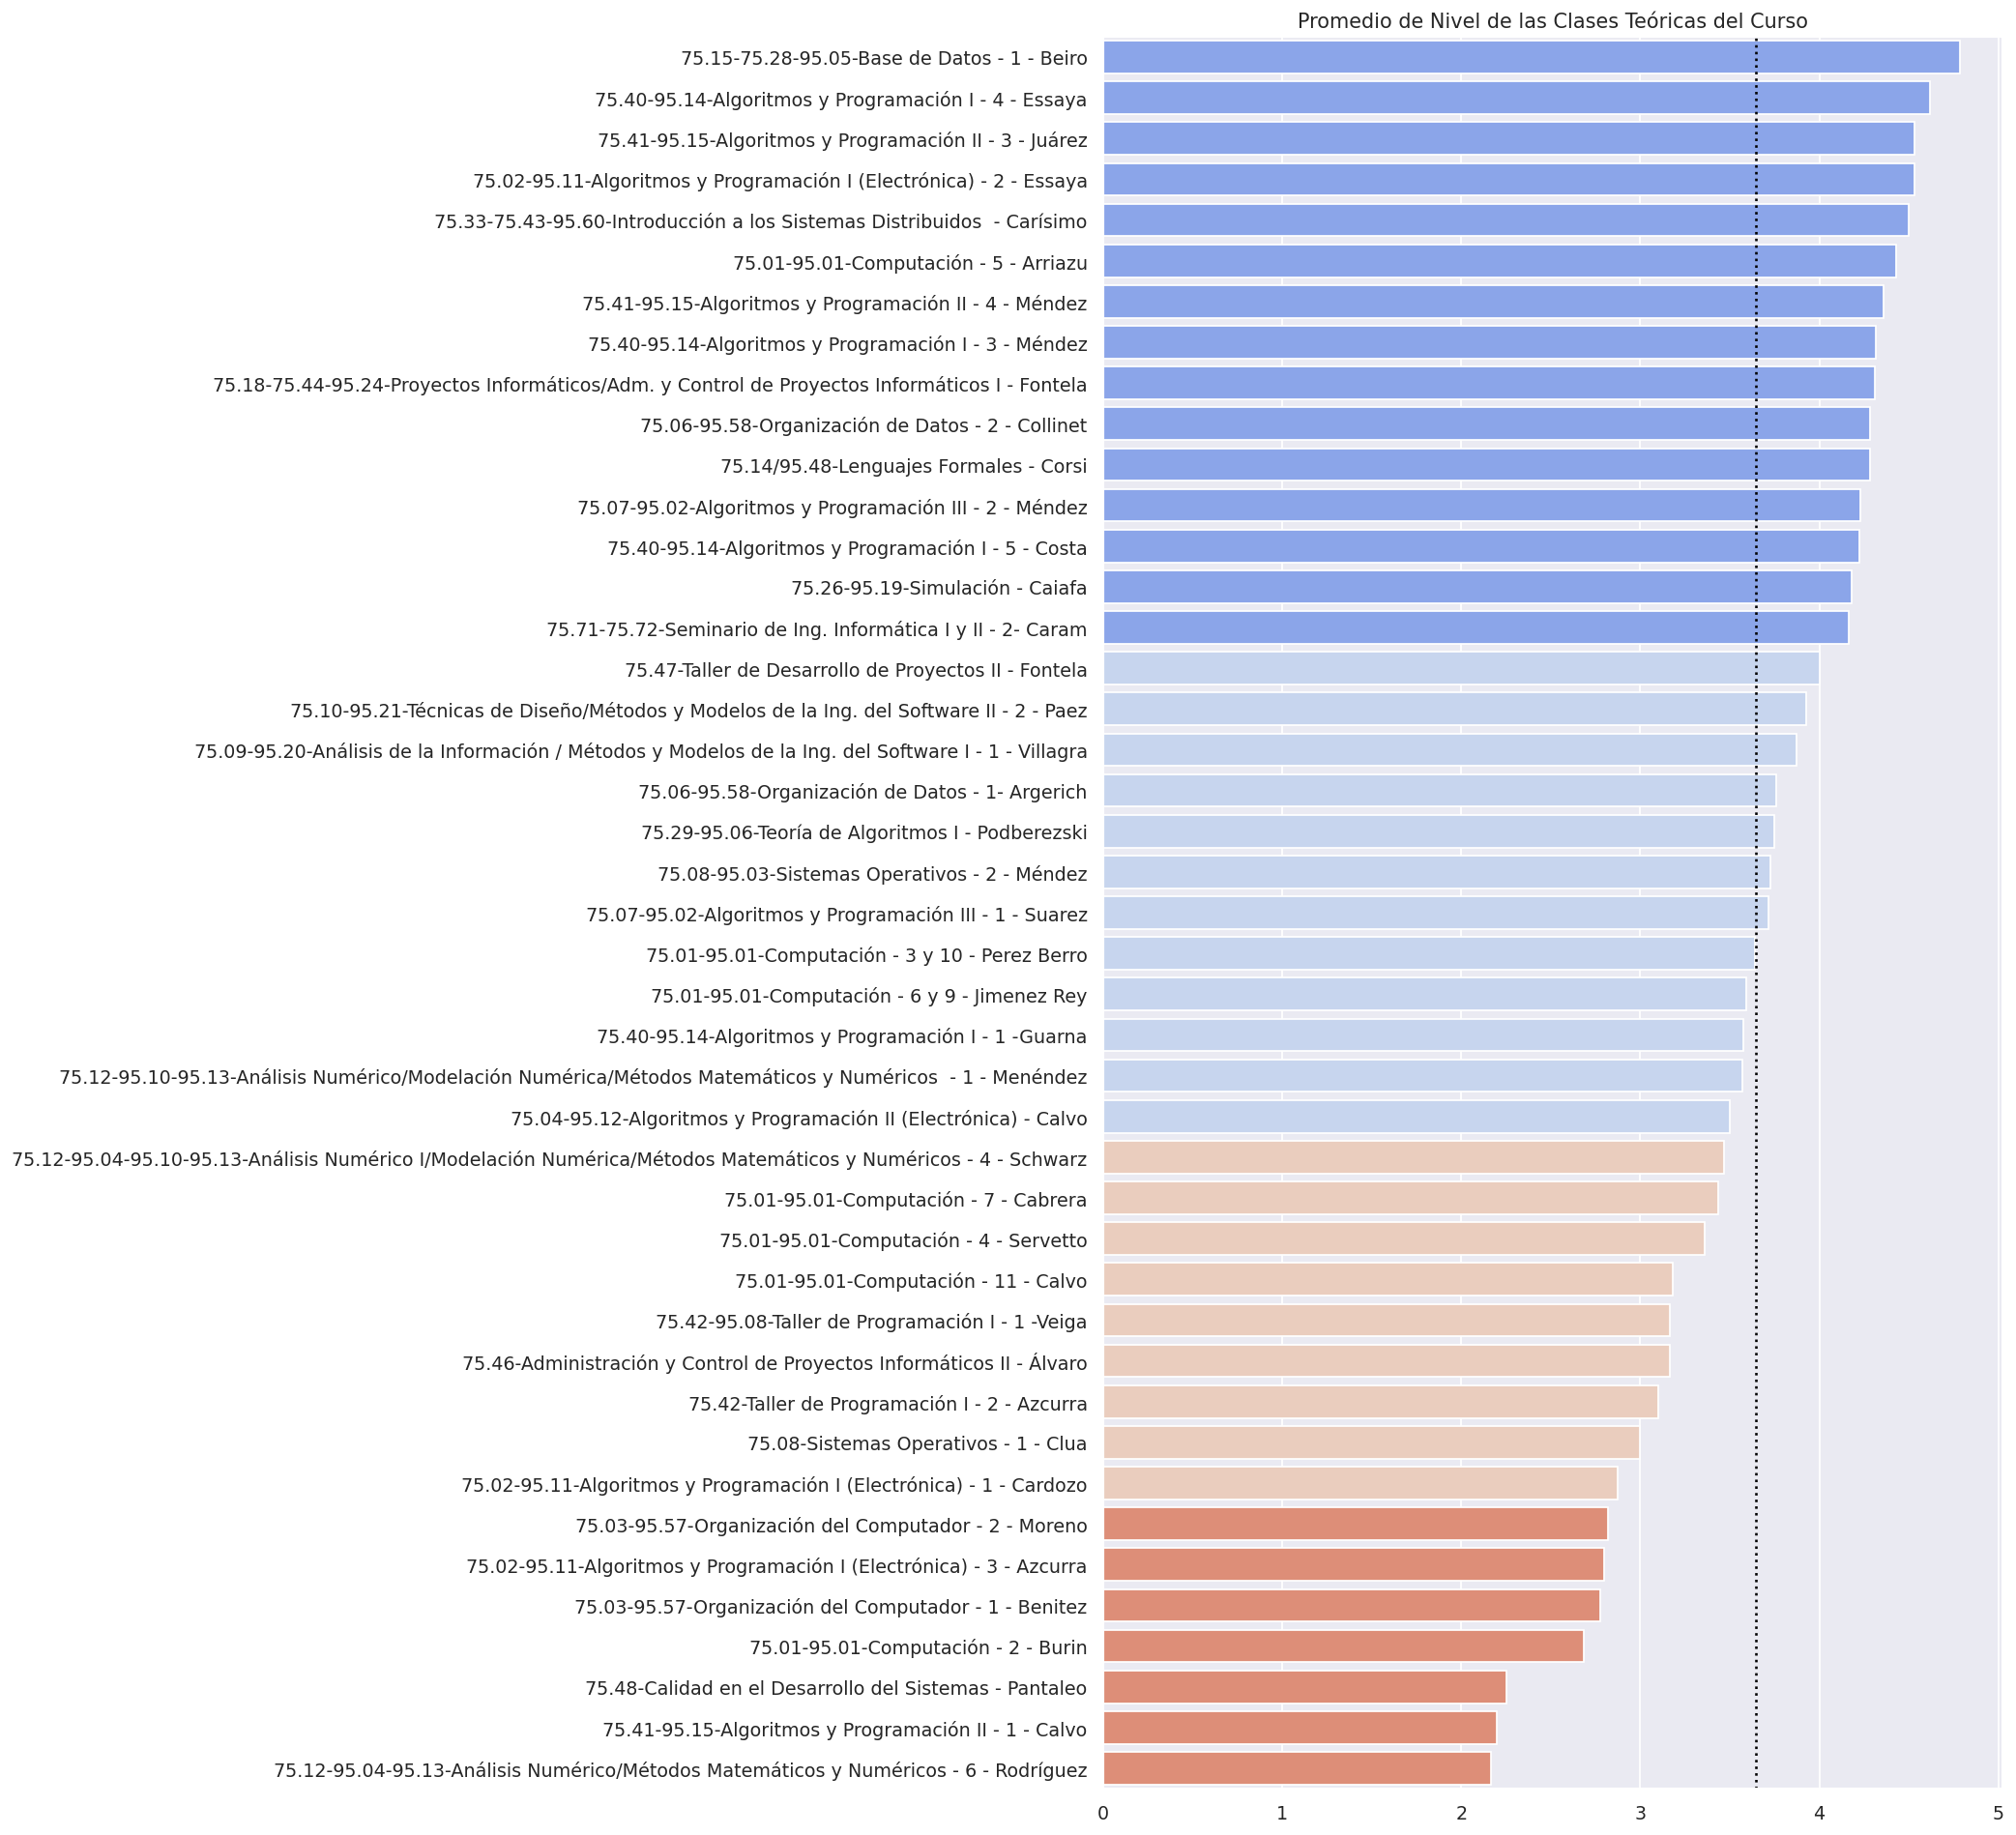

### Nivel de las Clases Prácticas del Curso

Se analizan los promedios por curso de Nivel de las Clases Prácticas del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

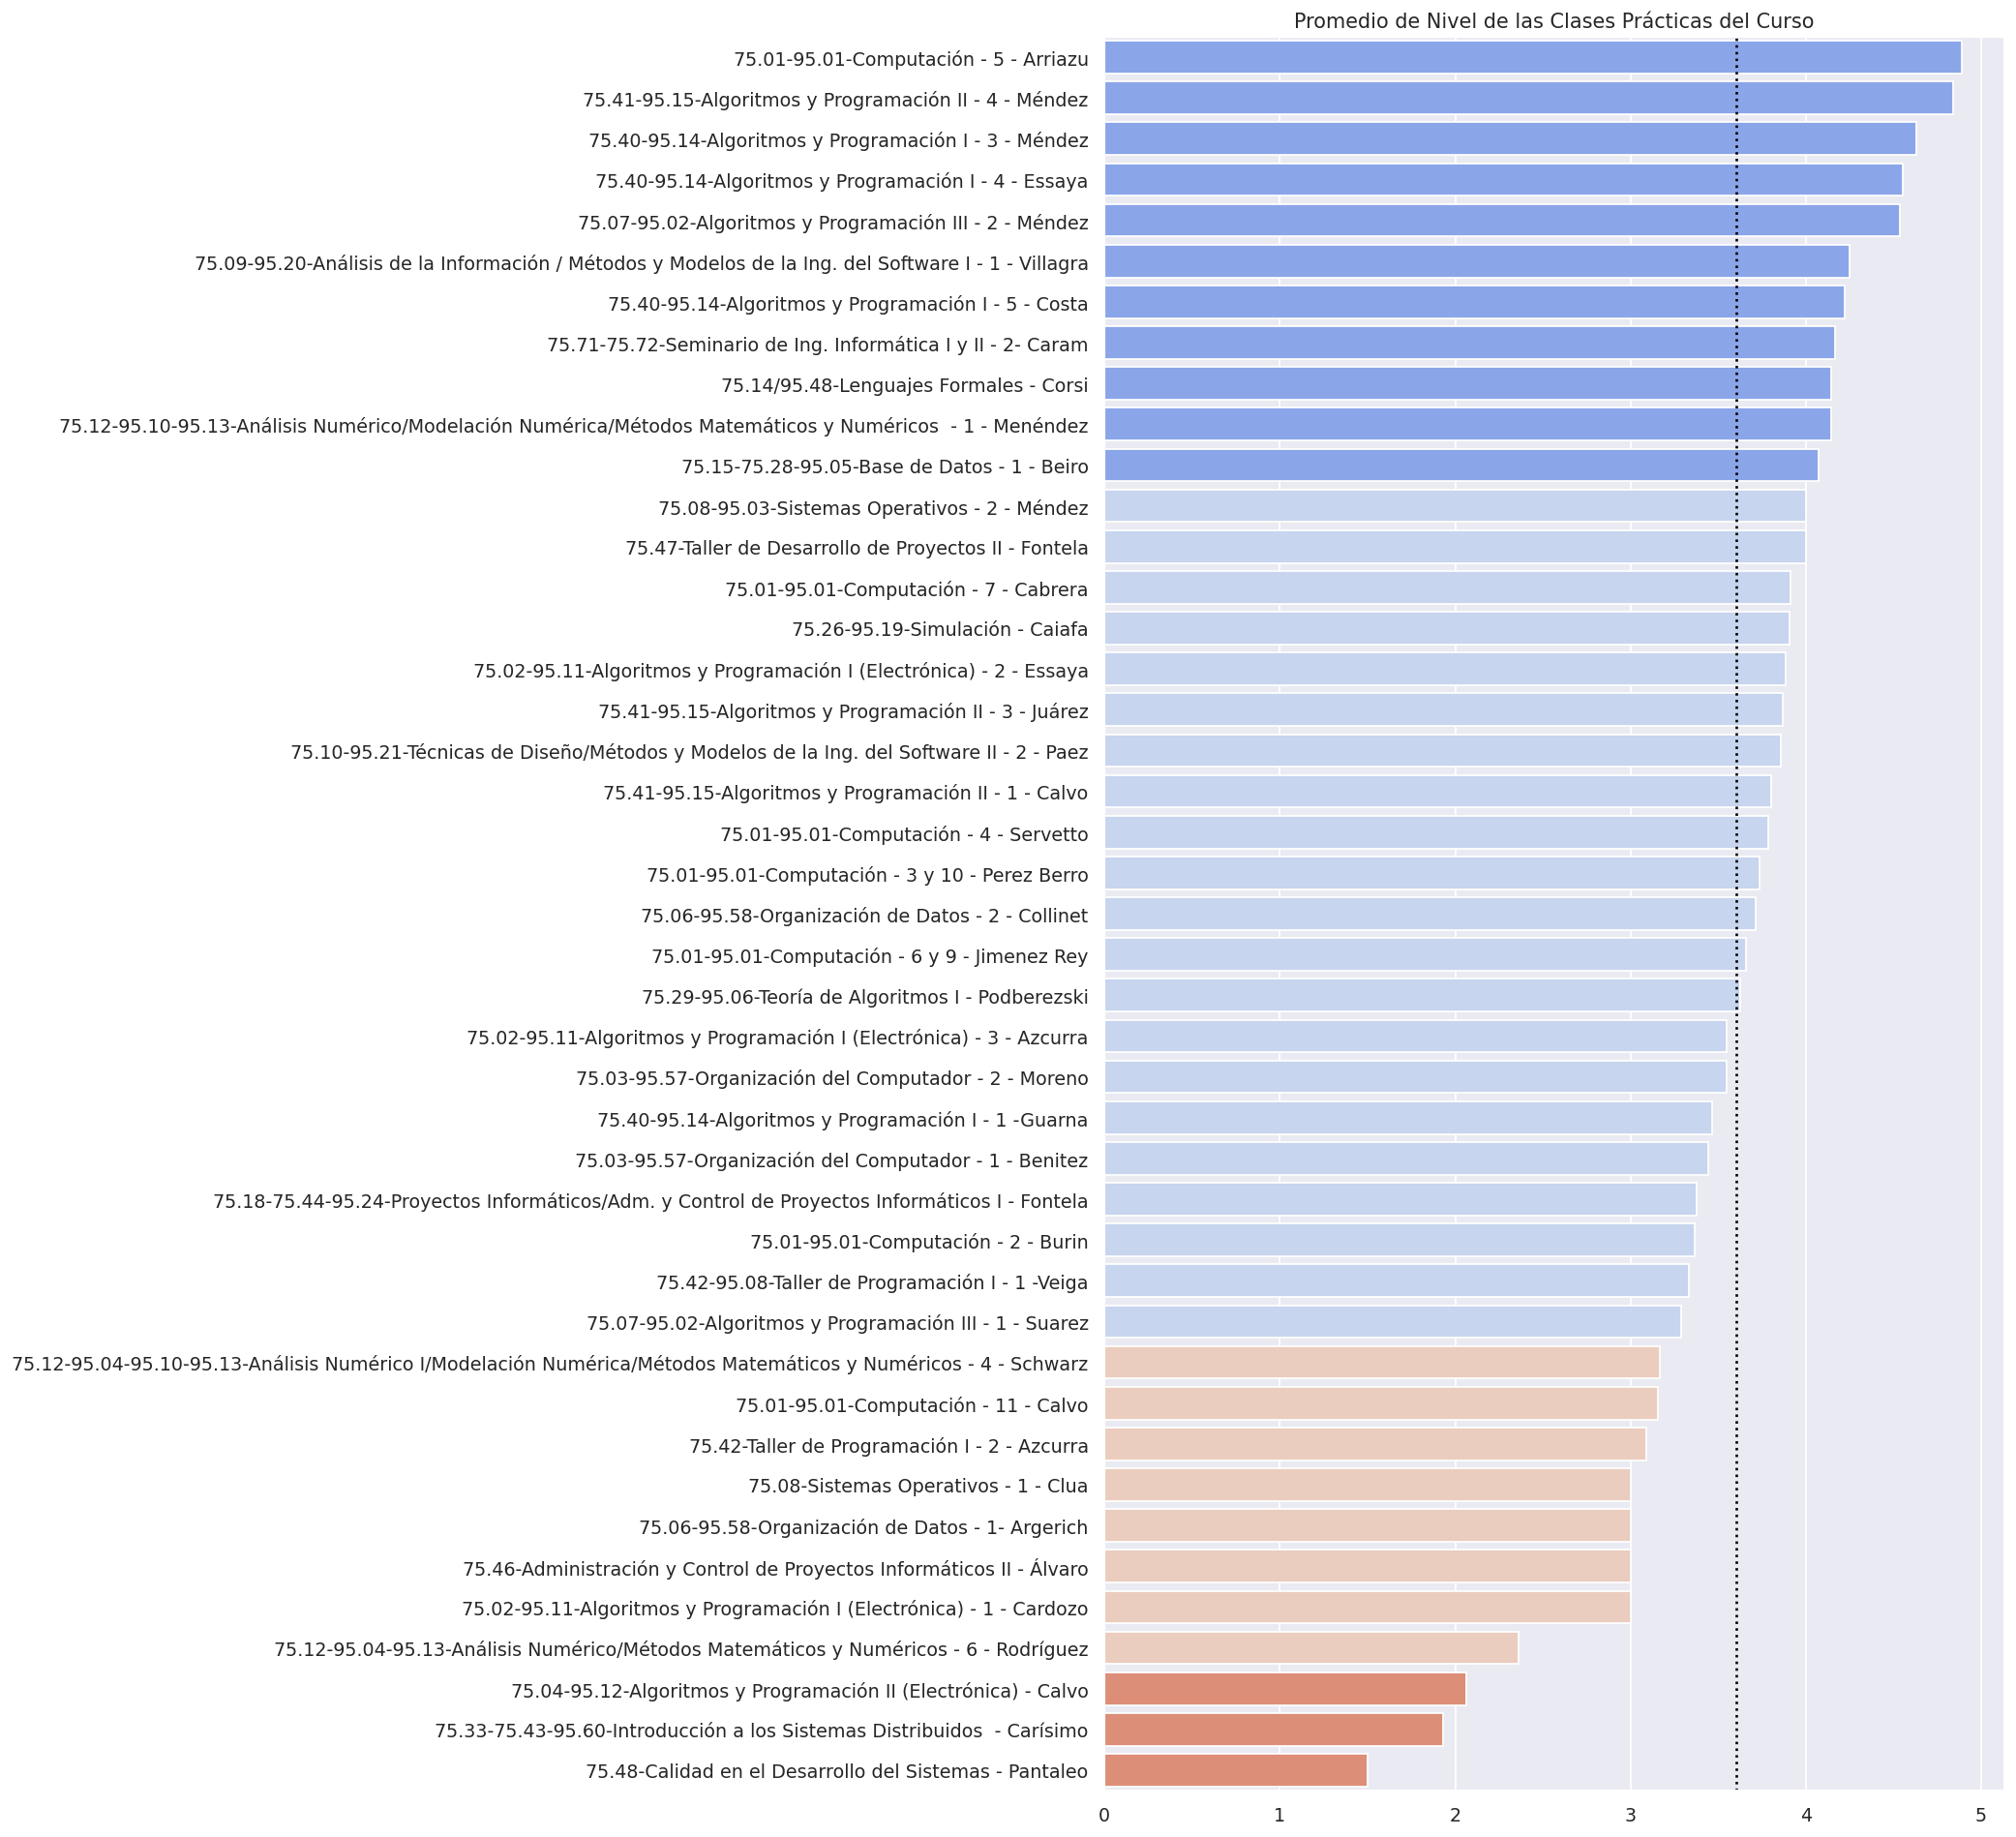

### Dificultad del Curso

Se analizan los promedios por curso de Dificultad del Curso. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

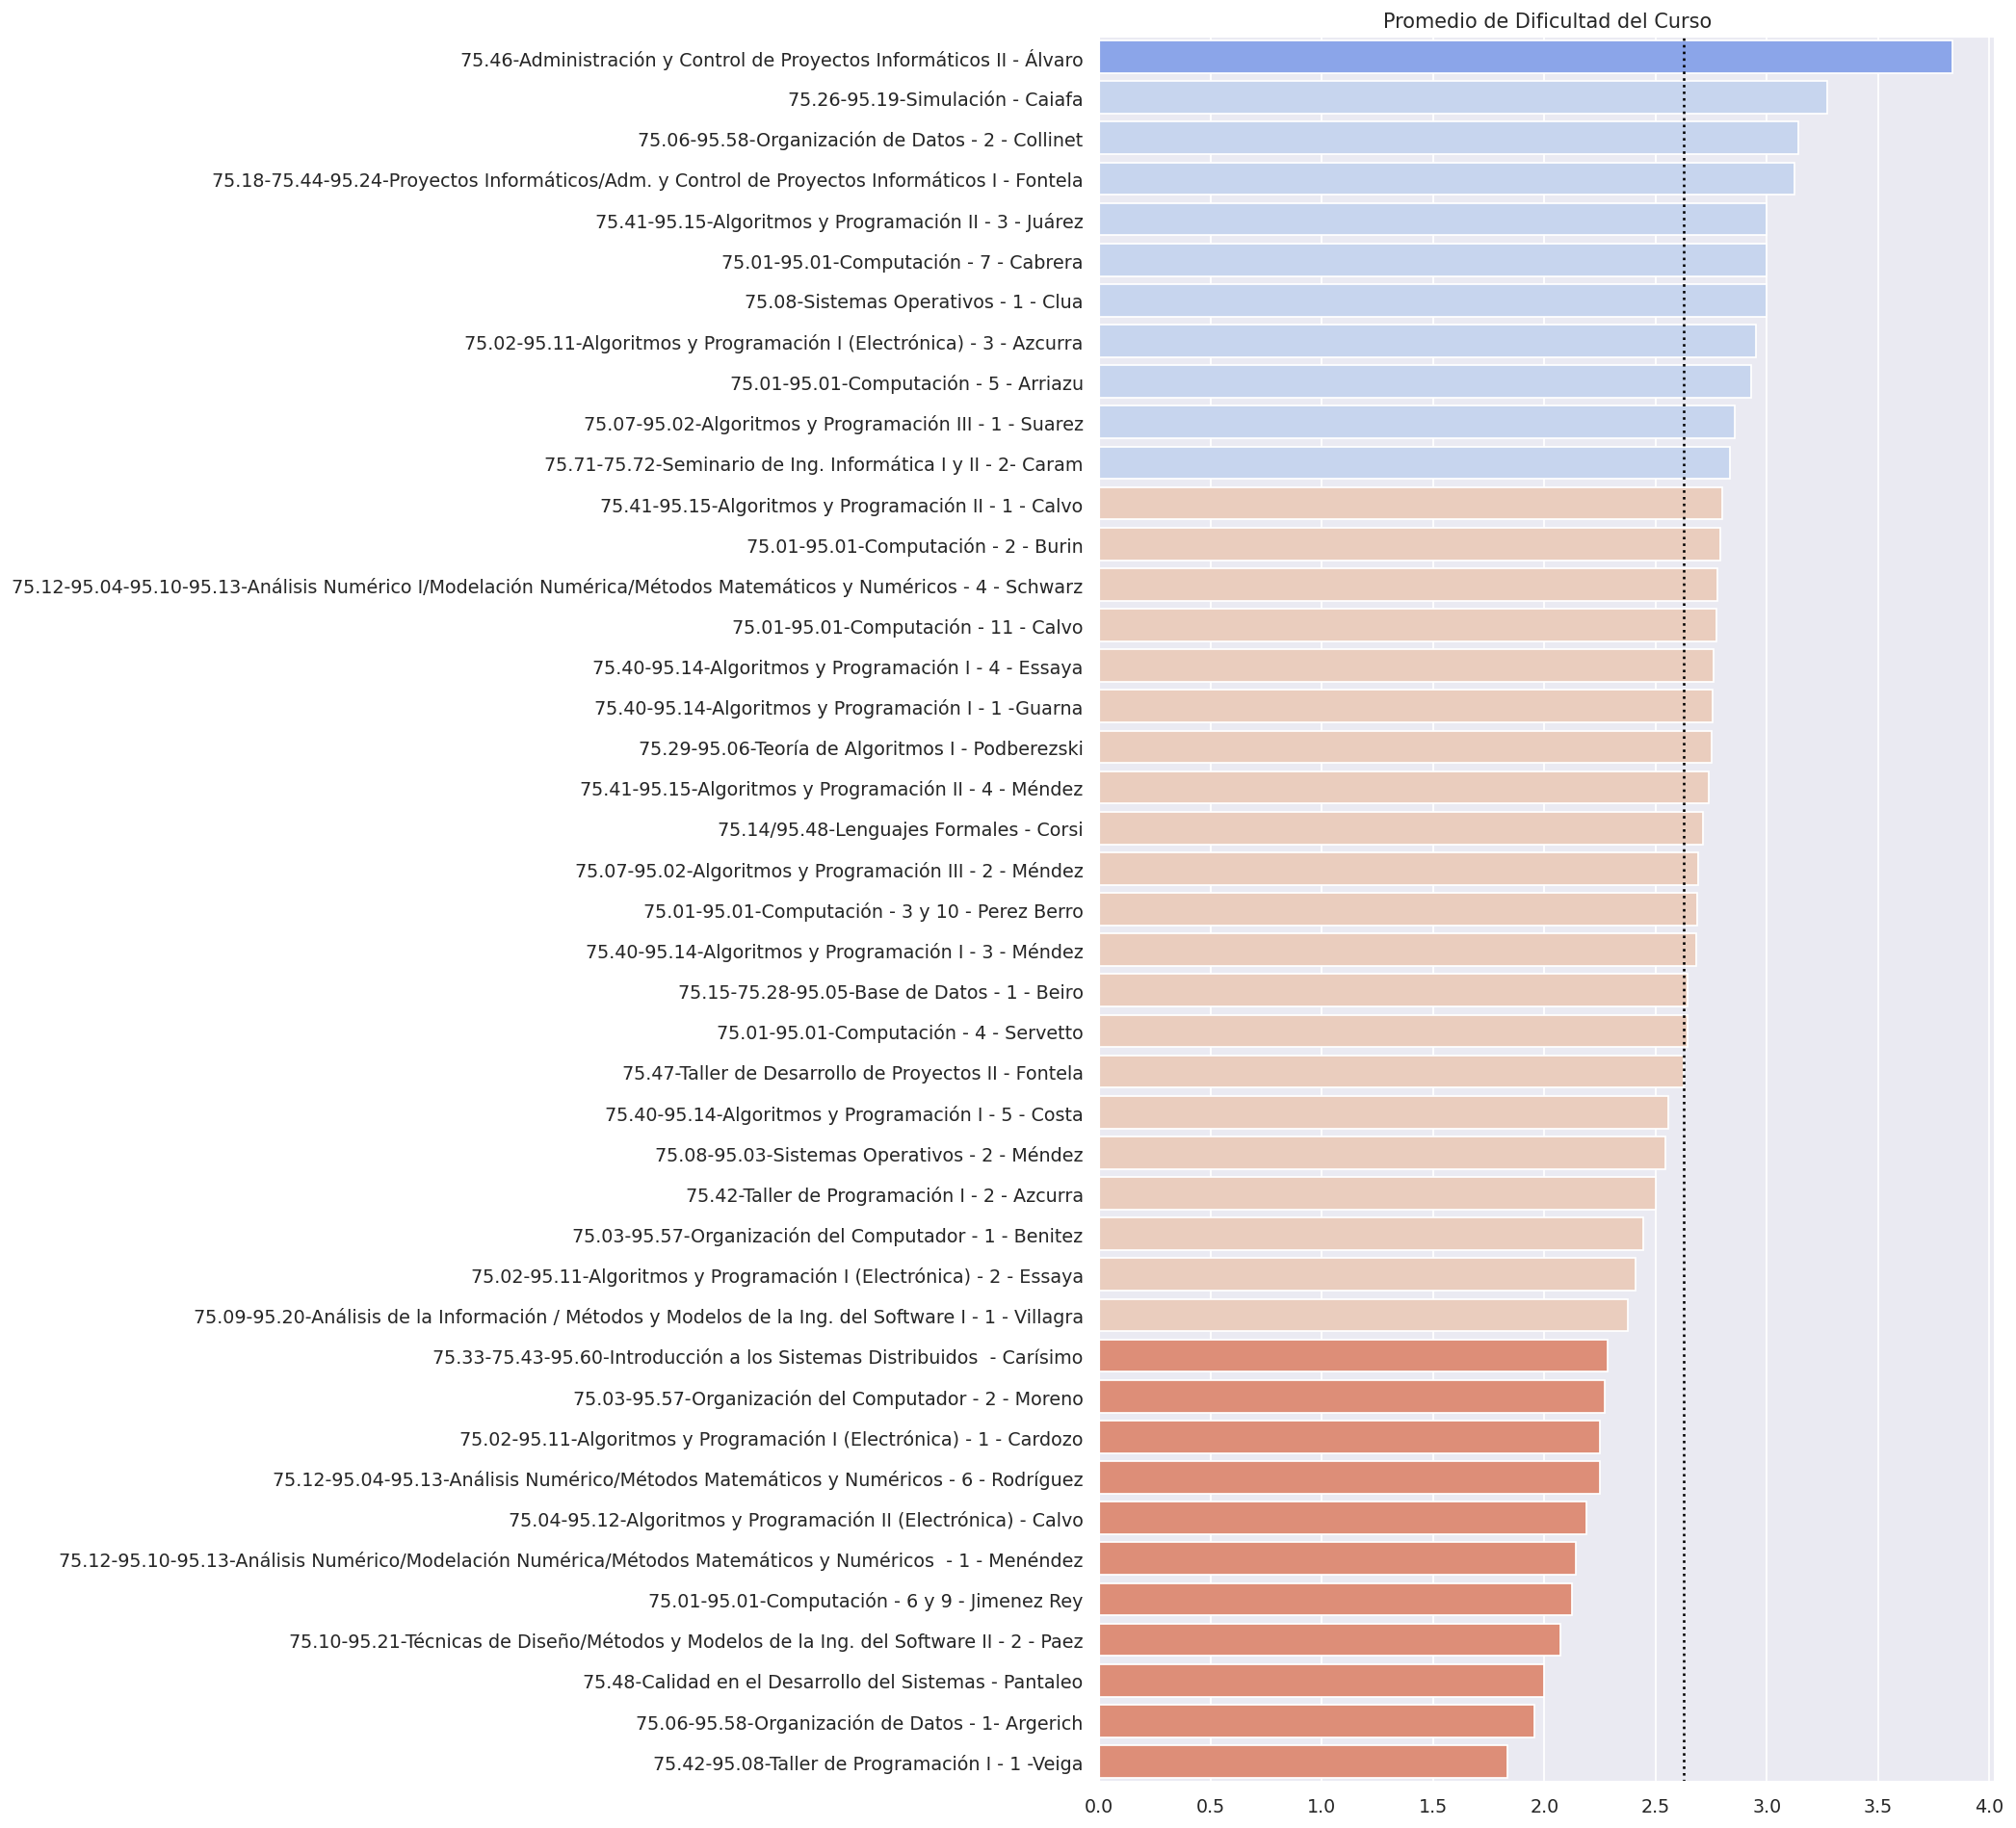

### Dificultad del TP

Se analizan los promedios por curso de Dificultad del TP. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

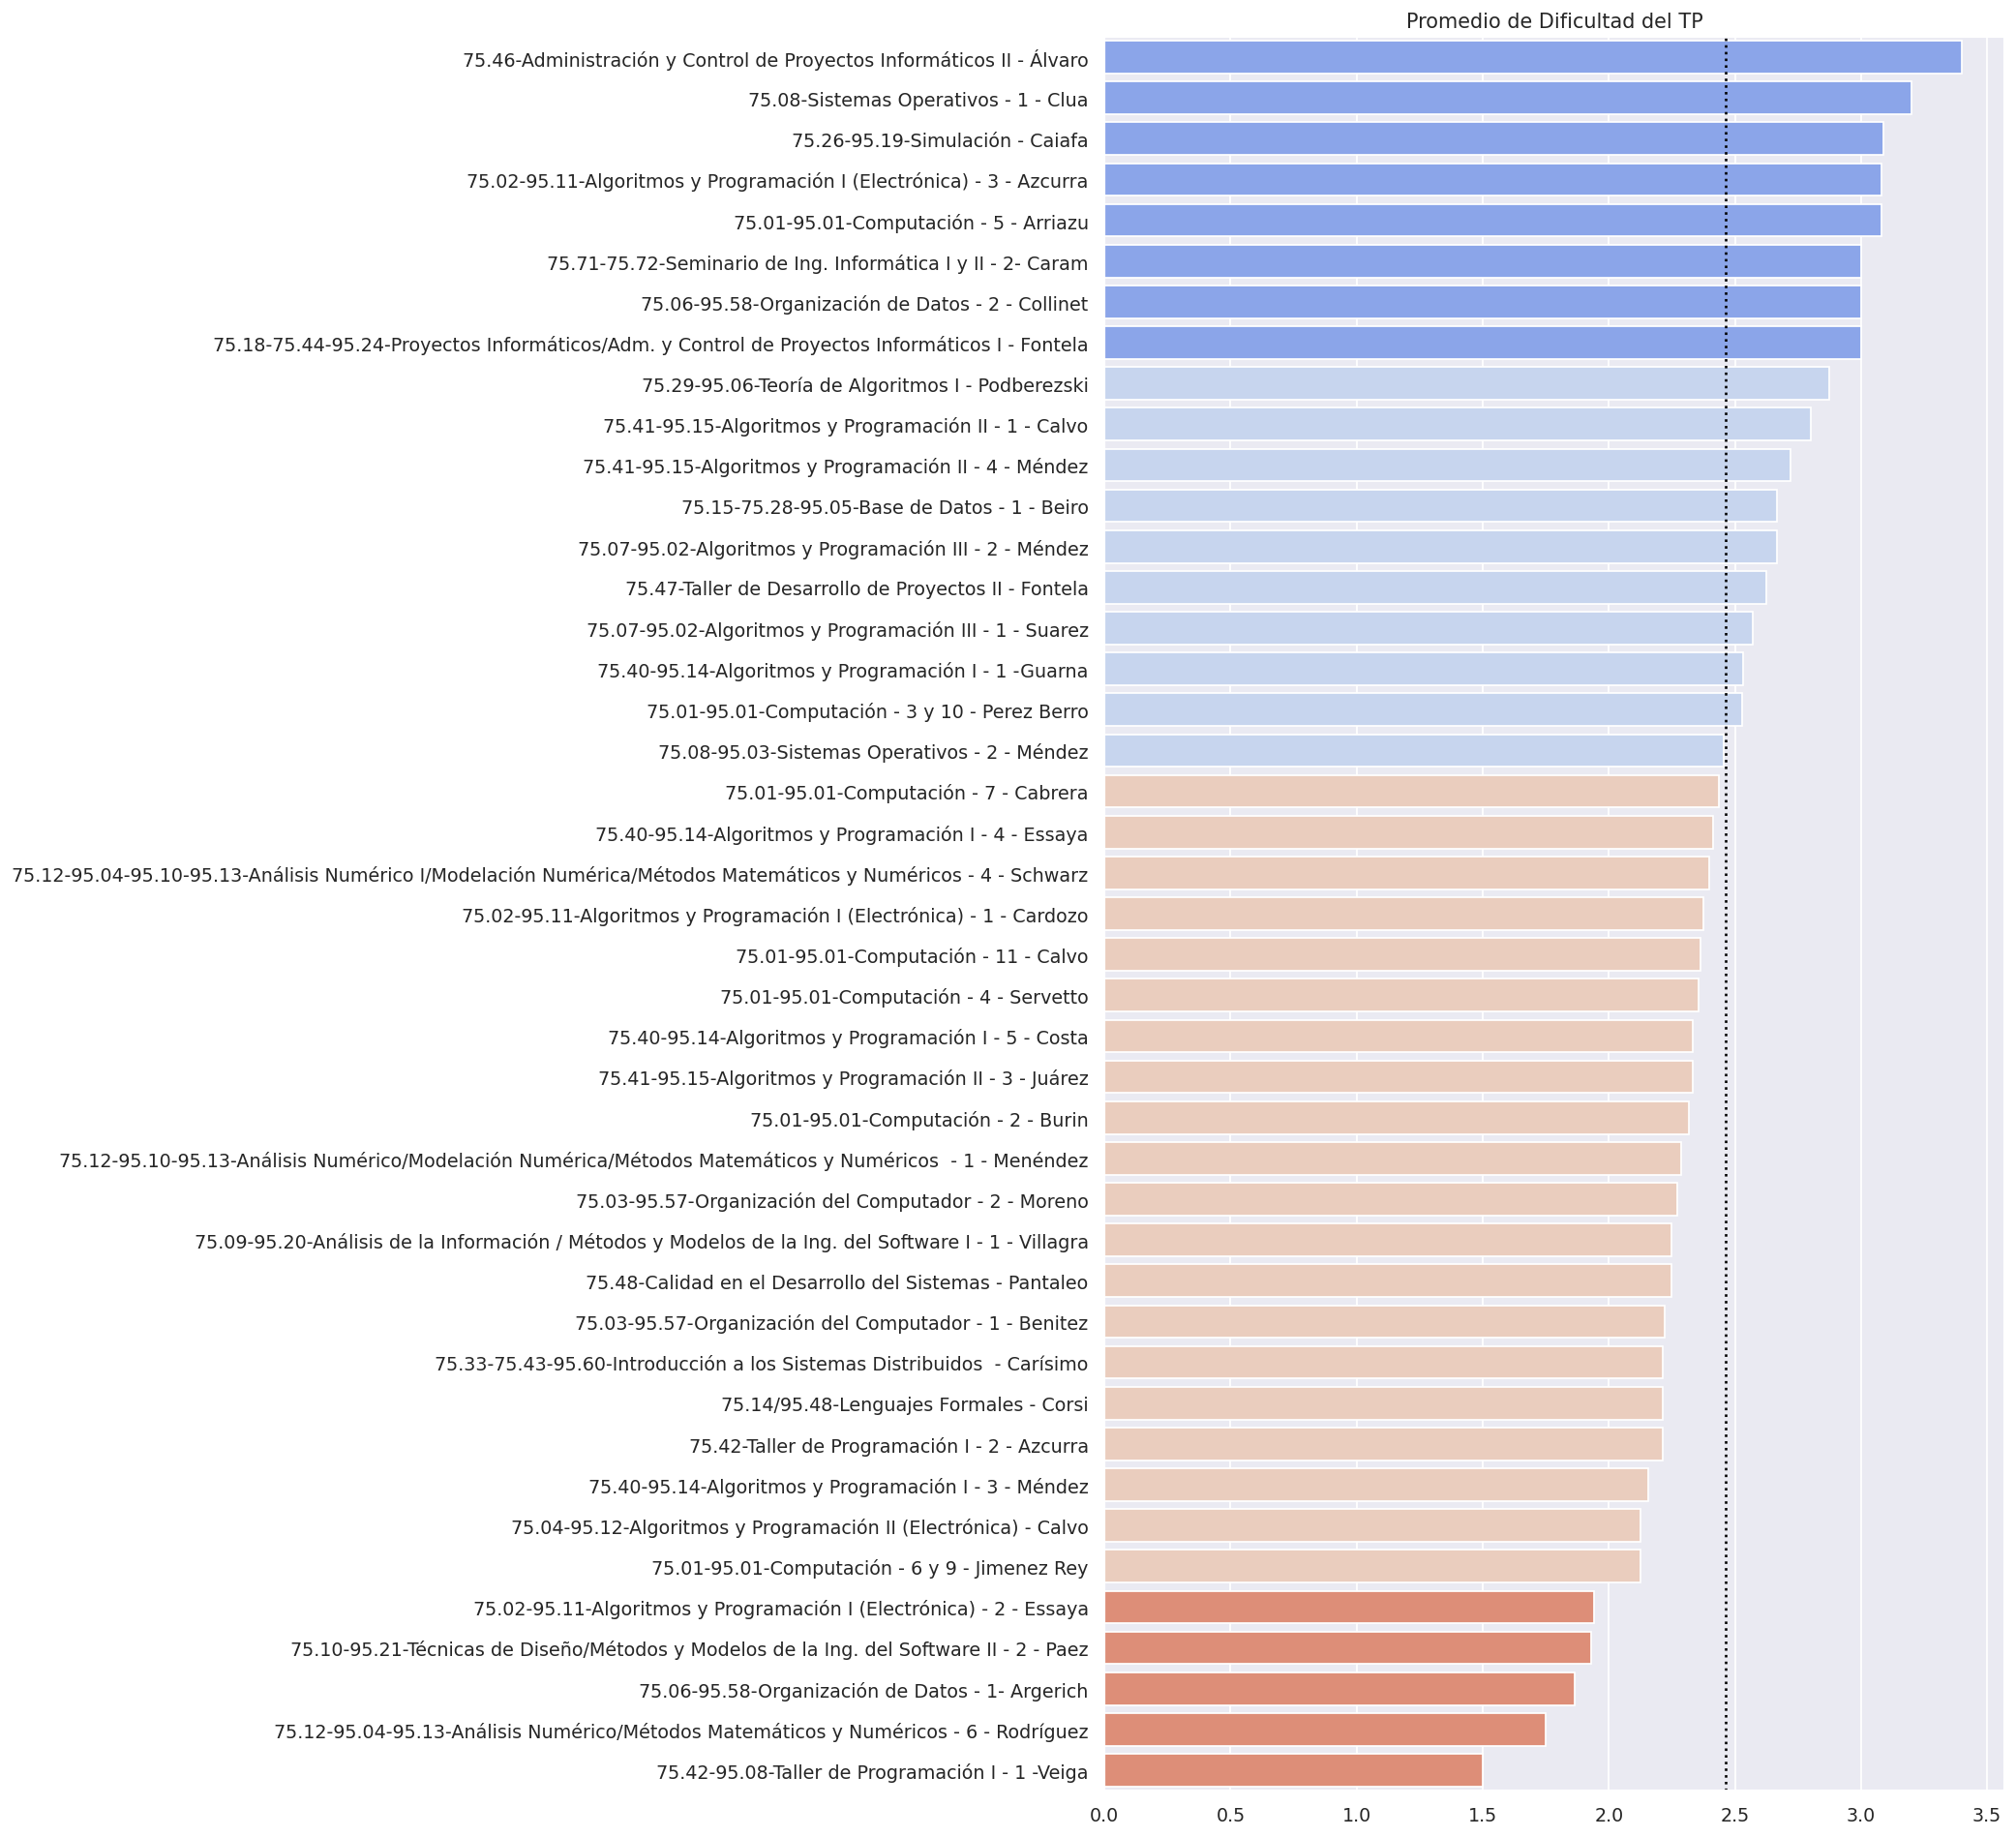

### Promedio nivel teóricas y prácticas

Se analizan los promedios por curso de Promedio nivel teóricas y prácticas. Se dividen en 4 contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores.

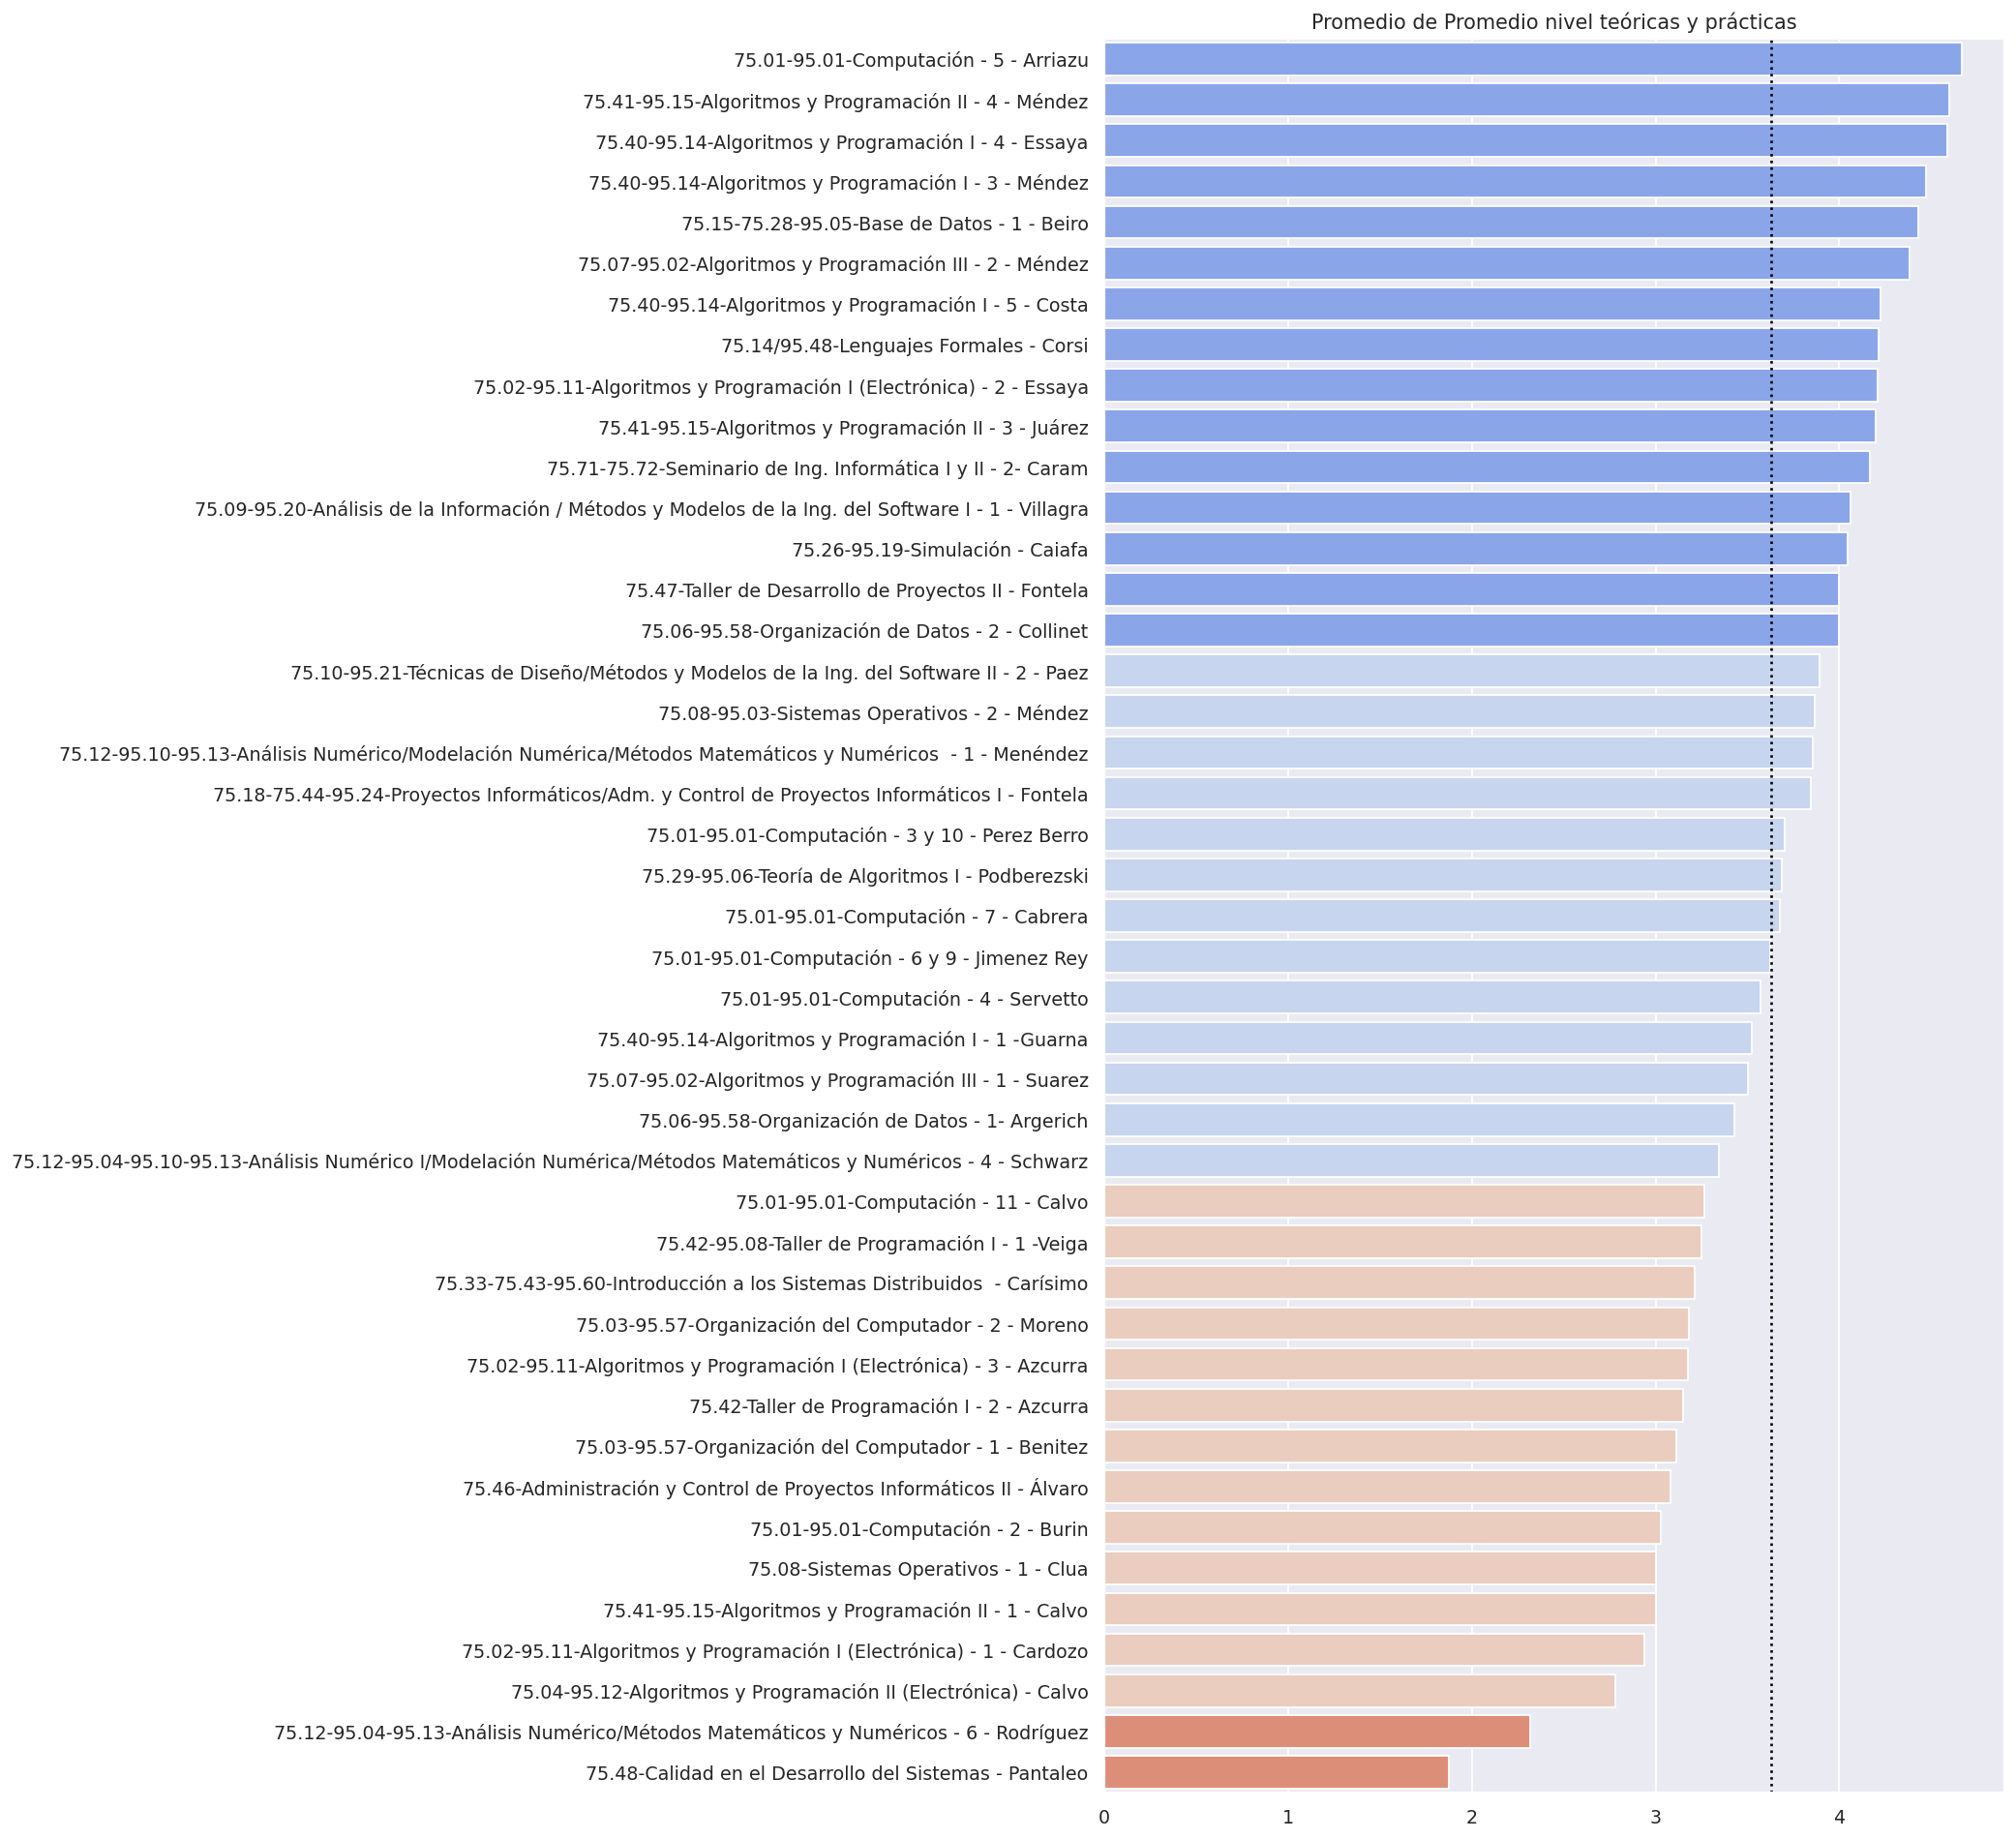

In [15]:
n_bins = 4

for col in num_cols:
    
    display(Markdown(f"### {col}"))
    display(Markdown(f"Se analizan los promedios por curso de {col}. Se dividen en {n_bins} contenedores entre los valores mínimo y máximo. La línea vertical en negro indica el promedio de los valores."))
    
    values = comp_5p_mean[col].sort_values(ascending=False)

    c = pd.cut(
        values,
        bins=n_bins,
        labels=sns.color_palette('coolwarm_r', n_colors=n_bins),
    )

    plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))
    ax = sns.barplot(x=values.values, y=values.index, palette=c.values)
    #ax = values.plot(kind='barh', color=c.values)

    ax.axvline(values.mean(), linestyle=":", color='black')

    plt.title(f"Promedio de {col}")
    plt.ylabel("")
    plt.show()

## Correlacion Entre Variables

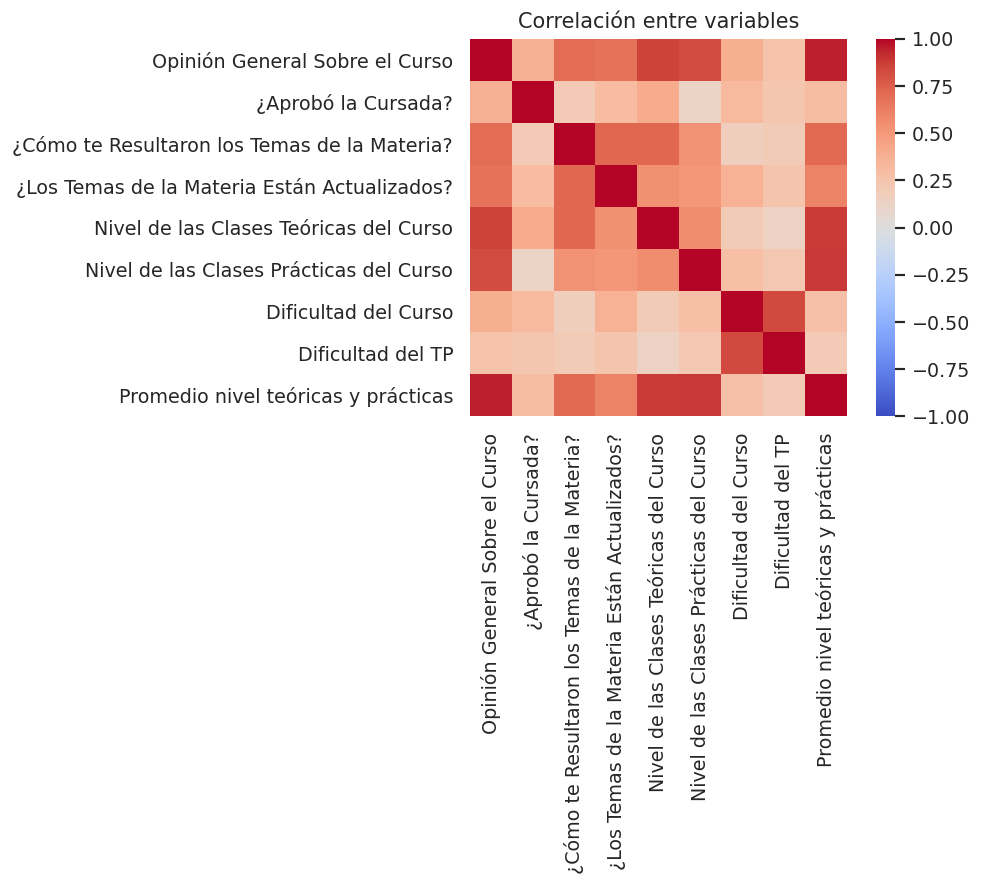

In [16]:
plt.figure(dpi=125)
sns.heatmap(comp_5p_mean[num_cols].corr(), square=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
- Hacia la derecha: Las clases teóricas son mejores que las prácticas.  
- En el centro: Poca o Ninguna diferencia.  
- Hacia la izquierda: Las clases prácticas son mejores que las teóricas.  

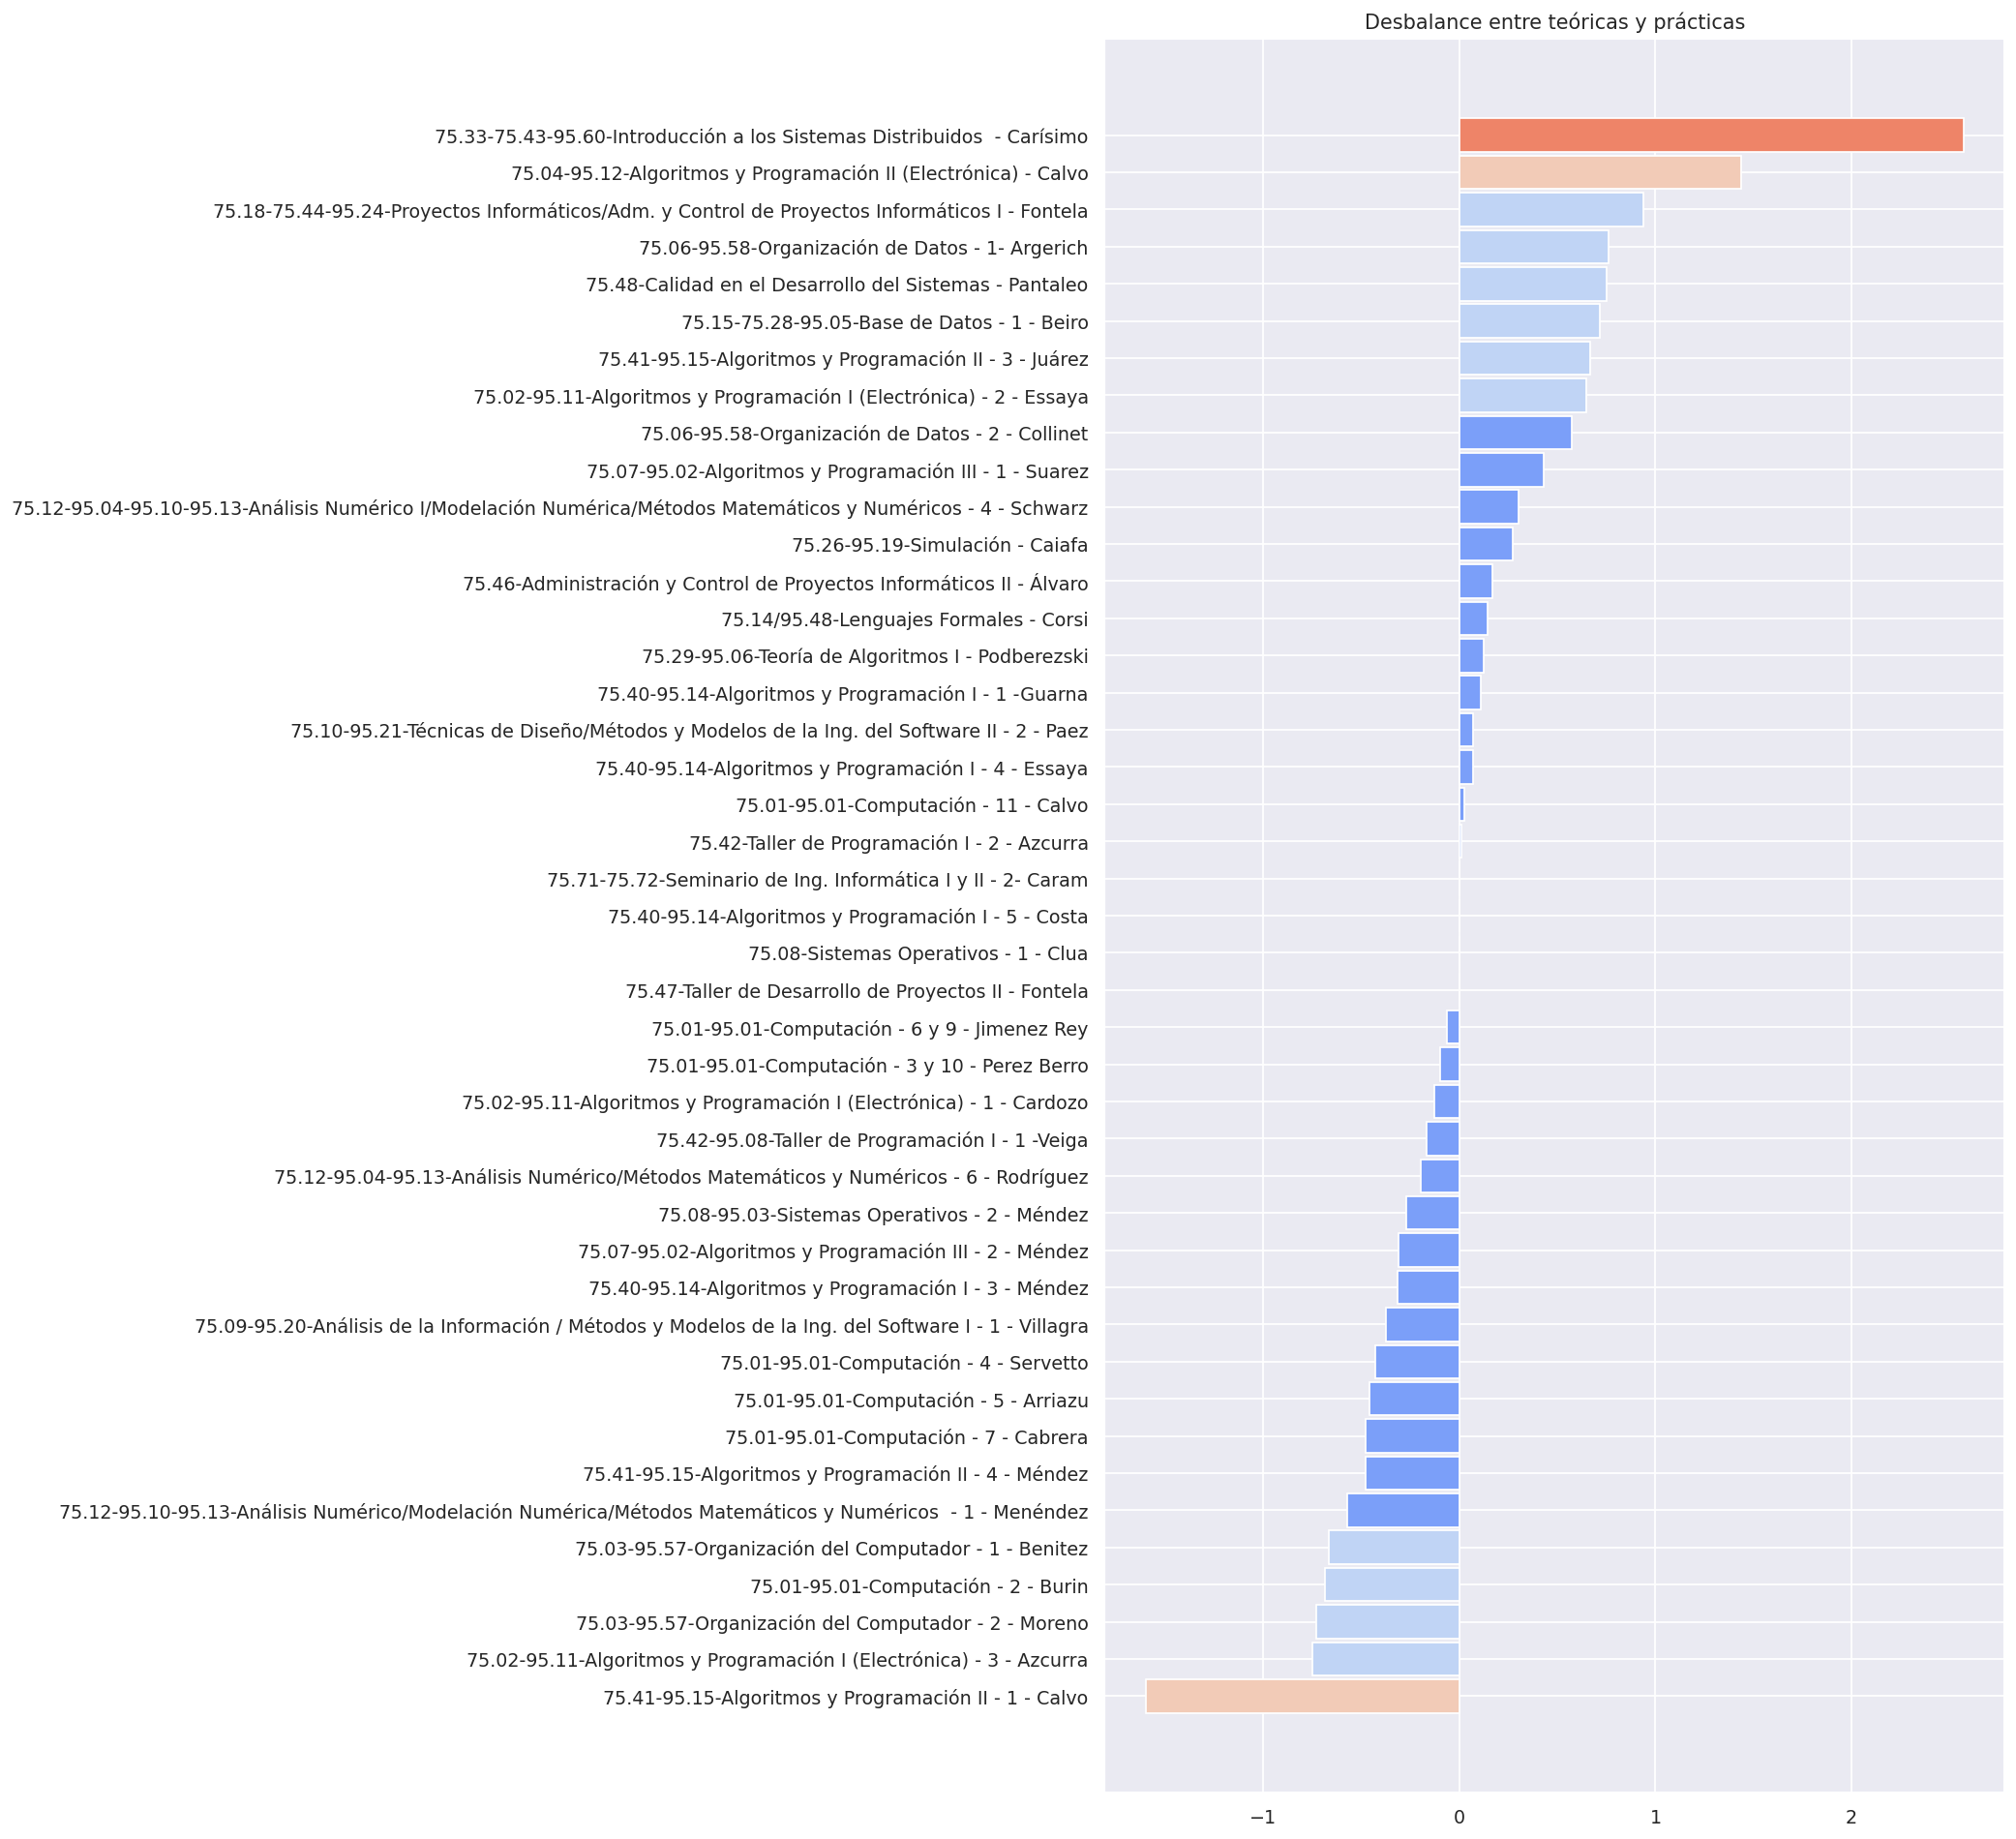

In [17]:
diff_teo_prac = (comp_5p_mean['Nivel de las Clases Teóricas del Curso'] - comp_5p_mean['Nivel de las Clases Prácticas del Curso']).sort_values()

plt.figure(dpi=125, figsize=(6.4*1.5, 4.8*4))

c = pd.cut(
    diff_teo_prac.abs(),
    bins=4,
    labels=sns.color_palette('coolwarm', n_colors=4),
)

plt.barh(diff_teo_prac.index, diff_teo_prac.values, color=c, height=0.9)

plt.title("Desbalance entre teóricas y prácticas")
plt.ylabel("")
plt.xlabel("")

plt.show()

## Emails

¿Cuánta gente completa el mail?

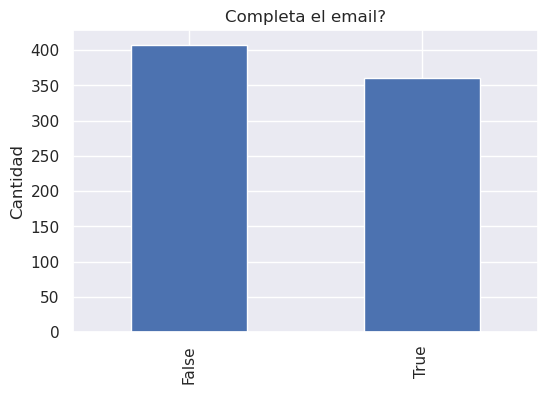

In [18]:
plt.figure(dpi=100)
(~comp['Email (opcional)'].isna()).value_counts().plot(kind='bar')
plt.title("Completa el email?")
plt.ylabel("Cantidad")
plt.show()

¿Hay emails duplicados?

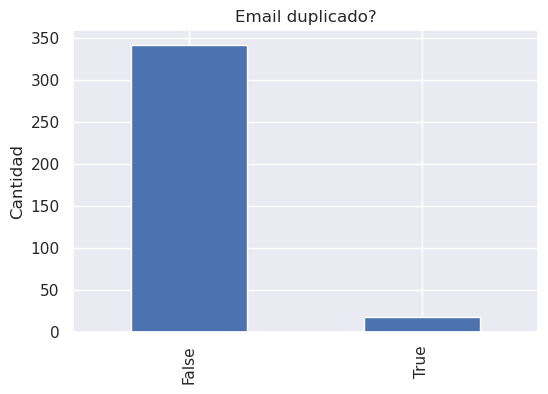

In [19]:
plt.figure(dpi=100)
comp['Email (opcional)'].dropna().duplicated().value_counts().plot(kind='bar')
plt.title("Email duplicado?")
plt.ylabel("Cantidad")
plt.show()

Quienes completaron el mail, ¿Permiten que se comparta al docente?

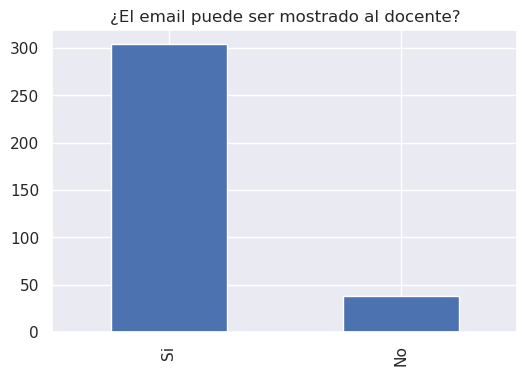

In [20]:
plt.figure(dpi=100)
comp[~comp['Email (opcional)'].isna()].drop_duplicates(subset=['Email (opcional)'])['¿El email puede ser mostrado al docente?'].value_counts().plot(kind='bar')
plt.title("¿El email puede ser mostrado al docente?")
plt.show()

# Comentarios por Curso

In [21]:
for curso in comp['Elige el curso'].unique():
    display(Markdown(f"## Curso {curso}"))
    com = comp[comp['Elige el curso'] == curso]['¿Tenés algún otro comentario o sugerencia sobre el curso y la cursada virtual de este cuatrimestre?'].dropna().drop_duplicates()
    if com.empty:
        display(Markdown("_No hay comentarios_"))
    else:
        display(Markdown("\n\n".join(f"> {x}" for x in com.values.tolist())))

## Curso 75.40-95.14-Algoritmos y Programación I - 4 - Essaya

> no

> Me gusto mucho la cursada virtual a diferencia de la presencial (que curse anteriormente), pero si se piensa hacer de manera virtual, creo que sería complicado con los horarios de otras materias, ya que si tengo que cursar esta materia pero estoy en la facultad por terminar de cursar otra no podría, ya que tengo 1:30hs de viaje, esto afectaría más para los parciales, ya que si fuese clase podría verse nuevamente. Y los parciales los prefiero virtuales ya que me parece bueno que nos empezamos a familiarizar con la programación y el tiempo disponible y no tener que estar escribiendo en un papel el código, ya que el ámbito de esta carrera se maneja mas de forma virtual.

> No

> Lo malo de esto fue el corte que hubo del segundo cuatrimestre por el tema de las vacaciones.

> Agregando a la pregunta de que deberia evaluarse la posibilidad de cursar virtual esta materia me parece totalmente que si, a diferencia de las materias exactas como AMII o Algebra II, a esta siento que se le puede sacar mucho mas provecho cursandola de manera virtual.

> Algoritmos es una materia que debería estar considerada para mantenerse online , no así otras como análisis por ejemplo

> Nada, fueron excelentes las clases y en particular los profes, todos unos genios. Se nota cuando un profe tiene ganas de enseñar y que sus alumnos aprendan, en este caso todos los profes eran si de buenos.

> Yo creo que la cursada debería ser parcialmente virtual, no totalmente ya que preferiría tener clases virtuales y presenciales, y a la hora de evaluar, la modalidad virtual es mucho mas cómoda tanto para el docente como para el alumno

> Lo único que podría ser mejorado es el calendario de temas, que esta un poco desparejo (hay clases que rebalsan de temas y otras que terminan antes) pero al no haber cursado antes no se si fue consecuencia de el receso y siempre es así.

> Agradecerles a la catedra por la forma en que dan las clases como se organizan. Una catedra súper recomendable

> nada

> la verdad que muy bueno y se supo adaptar excelente a la virtualidad

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 2 - Essaya

> Que los tps no demanden tanto tiempo, son temas interesantes pero deja poco tiempo para estar al dia con la materia.

> es mucho mejor rendir y hacer las practicas online

> Seria nteresnte, viendo que en las materias que le siguen, se usa en mayor medida python o mathlab, que den mas bola a esto y no tanto a a c. En si solo escuche de una materia que usa algo parecido, que ni siquiera es c, es assembler.

> Fue la única materia que se sintió casi como cursarla de manera presencial, me sentí muy cómodo con todos los profesores y ayudantes :)

> excelente curso en lineas generales

> Creo que materias de este estilo son las únicas que se benefician de la virtualidad, creo que es una gran posibilidad mantener este estilo en el futuro.

## Curso 75.41-95.15-Algoritmos y Programación II - 4 - Méndez

> en lo personal ne gusto ver una y otra vez las claes grabadas, me fueron muy utiles 

> más material teórico  

> Se adaptaron excelente a la virtualidad. A tal punto que los exámenes y las prácticas sería hasta preferible que sigan virtuales aún cuando vuelva la presencialidad

> que si bien la cursada virtual es muy cómoda y ellos se adaptan perfecto, hay una magia sobre estar físicamente que no se puede negar. Me gustaría tal vez una mezcla. Por ejemplo, las clases teóricas, donde no hay tanta interacción, que sean virtuales. Sin embargo las prácticas, que sean presenciales.

> -

> Opino que la cursada se podría mantener completamente virtual, aprovechando los recursos virtuales las clases pueden ser mejores que las virtuales ( especialmente en el depto. de computación ). Pienso que igualmente se debería habilitar el lab. de comp. o algunas cátedras presenciales para la gente sin posibilidad de participar de la cursada virtual.

> noup

> No.

> Comentario personal. Este cuatri cometi el error de inscribirme en 4 materias y en una no tenia comentarios al respecto de como era la catedra y resulto que no tenia ni clases virtuales. Lo cual hizo que me atrase en todas las materias y me dio un poco de lastima no dedicarle tanto tiempo a Algo II que me parecio una materia muy buena con mucho feedback de los docentes. Tambien le ponian mucha gana a las clases y el contenido tematico del cuatri tambien lo motiva a uno y no se le hace tan pesado cursar.

> La cursada virtual para materias de informática me parece una opción ideal ya que al trabajar desde tu casa con tu propia computadora hace todo mucho más fácil y dinámico, deberían reemplantear una cursada parcialmente virtual, más que nada para los que viajamos más de dos horas 

> Mejorar los tiempos de respuesta a consultas, no hay problema que pasen unos días, pero si ya se habla de más de una semana, no sirve de mucho

> No

> Nada, está perfecto así

> Realmente es una muy buena cátedra, e hizo que me divirtiera mientras aprendo

> sin comentarios

> No, la verdad que muy conforme

> Si todas las cátedras le pusieran la misma dedicación y ganas que tuve ésta cátedra, la enseñanza virtual sería la mejor opción para avanzar en una carrera

> Hubo ciertos momentos en la cursada que el pdf con lo dado en la clase teórica de la semana no había sido subido a la página, y tampoco la grabación de la clase en sí. Por eso algunas veces para repasar contenidos dados, me quedé sin poder hacer nada. Pero más allá de eso, fue muy amigable, entretenida y cómoda. ♥

> Mantengan la virtualidad en lo posible! Supieron usar la virtualidad a su favor y a mi parecer tuvo mejores resultados que lo que hubiese sido una cursada presencial. 

> La mejor catedra que tuve virtualmente

> No, pienso que todo se manejo dela mejor manera posible 

> El curso estuvo correcto a pesar de las limitaciones impuestas por la emergencia sanitaria.

## Curso 75.12-95.04-95.10-95.13-Análisis Numérico I/Modelación Numérica/Métodos Matemáticos y Numéricos - 4 - Schwarz

> Curse en la Catedra de Schwartz-Sosa. Por un lado las clases teoricas me parecieron relativamente buenas, teniendo en cuenta que no es una materia facil de explicar mediante un pdf, ya que incluye mucho desarrollo matematico que decirlo oralmente se hace un poco engorroso. 
Ahora bien, lo que yo todavia no logro comprender es el enfoque que se le quiere dar a la materia. Por un lado se nos exige a los alumnos que seamos capaces de entender un nuevo sistema de "comunicacion" como lo es el jupyter Notebook. Al no tener conocimientos previos de la programacion, padeci absolutamente todos los trabajos practicos. En ningun momento pude lograr comprender lo que estaba escribiendo en el codigo. Entiendo que sea dificil explicarle a alguien a programar desde 0, pero es que con algunos videos de introduccion a la programacion, no me sirvieron como para entender, procesar, y a posteriori, redactar yo mismo un codigo en Python. 
En mi caso personal, si no fuese que contabamos con un estudiante de Ingenieria Informatica, jamas hubiesemos sido capaces de terminar tanto el TP final como el resto de los tps.
Todo esto influyo, a la hora de dar el TP final oralmente. Ya que se hacian preguntas muy puntillosas sobre el codigo, el cual, yo personalmente, me costo horrores entender,  ya q como repeti anteriormente, no tengo las bases de la programacion como para maso menos entender que me dice el codigo
La verdad es que no me llevo una grata experiencia, mi humilde recomendacion seria que le den un giro a la parte pracrica de la materia, ya que las personas q se enfrentan por primera vez a un codigo, como yo, no somos capaces de incorporarlo con tan solo unos videos de introduccion

> Muy buena disposición de todos

> No tengo ninguna sugerencia que realizar. La verdad es que durante todo el cuatrimestre (inclusive durante el receso) se mostraron muy predispuestos a atender consultas, que surgían a medida que realizábamos el trabajo practico. Desconozco como se manejaban en las presencialidad, pero considero que (dentro de las materias que curse en esta modalidad) fue una de las mejores que se logro adaptar. Una catedra muy recomendable. 

> Que dejen entregar los ejercicios obligatorios en LaTeX u otros softwares. 
Que no tomen asistencia dado a que se graban las clases. 
Que no se pretenda utilizar POO en el TP, dado a que no necesariamente todo el mundo lo sabe (personalmente ne mi grupo solo 2 de 5 lo sabíamos y terminamos programando casi todo el TP). 
Que el TP tenga una nota individual y otra grupal.
Que se pida un cuestionario sobre qué piensa cada integrante del resto de sus compañeros de TP para que se muestre quiénes trabajaron y se penalice a los que no.


> no

> Sigan así

> no me queda claro cual es el enfoque de la materia, si conocer el contenido teorico sobre resolucion de modelos matematicos o si entender como aplicarlos y poder programar. en caso de ser el ultimo, no considero que se proporcionen las herramientas necesarias para aprender sobre esto, ya que nunca tuvimos clases que nos enseñen desde 0 a usar lenguajes que la gran mayoria nunca habiamos visto previamente. se me hizo muy arduo comprender como se usa, para que, de que forma y otras cosas mas todo lo que incluye la plataforma jupyter, lenguaje python y diversas cosas que se usaron. por eso incisto en que no me quedo claro el enfoque de la materia y creo q se podria mejorar

> No

> Las clases teóricas de la materia son densas. Como no parece posible cambiar los temas a estudiar habría que buscar una forma de atraer más a los alumnos hacia los temas vistos. Muchas veces mostrar aplicaciones de la vida real  o laboral de un ingeniero de lo visto en la materia ayuda a que prestemos atención y nos interesemos más.

> En vez de resolver consultas se ponen cripticos: "revisa aca con mas atencion" (osea, si supiera cual es el error no te estaria preguntando) o tardan semanas en responder. Los ayudantes son pesimos (nuestro ayudante de TP no respondio una sola duda y nos corrigio mal el tp varias veces) y los criterios de evaluacion son dependientes del corrector

Es una materia con buenos contenidos que esta llevada por gente que no sabe organizarse y tienen un efoque completamente errado de que evaluar. No necesito hacer 10 iteraciones de X metodo para aprender como funciona, que me pidan hacerlo a mano es increiblemente estupido la verdad y una falta de respeto al valor del tiempo de los alumnos. 

En cuanto al tp, lo dejan absolutamente de lado hasta el punto donde se olvidan de responder consultas o habilitar la entrega/enunciado pero para corregir son mas exigentes que con ellos mismos para tener cosas basicas de operacion.

Asi como hay materias que voy a recordar en mi carrera como excelentes, esta va a ser de las pocas que voy a recordar como una absoluta perdida de tiempo por un pesimo equipo docente(en la practica, la teorica esta bien pero es aburrida)

Estoy increiblemente discomforme

> Quizás no es necesario que los grupos de trabajo práctico sean de tantos integrantes. En mi caso, fuimos resolviendo las entregas entre 3-4 alumnas de un grupo de 7 y no fue tan complicado. 

> Las clases teóricas me parecieron bien, claramente el contenido de esta materia no es muy interactivo porque son mas que nada métodos y a veces se dificulta prestar atención, quizás convendría clases mas cortas con muchos ejemplos que es lo que mas entretiene. En cuanto a la practica, aceptable, hicieron unos videos bastante buenos para introducir los temas pero quizás podrían hacer algunos ejemplos y utilizar los métodos para ciertos problemas de la vida cotidiana, así se entiende bien el potencial de lo que estamos viendo.
Y por ultimo, me parece excelente que este orientado en Python pero quizás podrían hacer mas videos explicativos sobre esto o ejemplos en clase porque por lo menos en mi grupo que éramos 4 ing civiles, un electrónico y un mecánico. Los 4 de ing civil no sabían absolutamente nada de programación y finalizando la materia siguen de la misma forma. Prácticamente toda la parte de programación la hizo el electrónico porque ya venia con conocimientos y el mecánico aporto también un poco porque también tuvo una materia.
Igual eso quizás ya es mas del plan de estudios, donde los civiles tendrían que tener una correlativa que sea computación aunque sea, creo que cualquier ingeniero debería saber programar

> Creo que seria beneficiso para entender mejor los temas, que en la practica ademas de los ejercicios resueltos por Jupyter, se den algunos ejercicios resueltos a "pizarron".

> Rodolfo siempre atento a las consultas en clase, tiene mucha paciencia

> Un poco más de consideración con el esfuerzo que hacemos los chicos de ing civil que no nos fue fácil entrar al mundo de la programación sin una base de computación antes en la carrera. Desde mí lugar, puedo decir que yo no sabía ni lo que era un lenguaje de programación. Me llevo mucho de la materia, es una súper herramienta. Hasta llega a ser divertido cuando le agarras la mano.
Gracias totales por los videos! 

> En cuanto la forma de dar el curso tod muy bien la verdad, quizas trataria de que las clase teoricas fueran un poco menos densas pero la virtualidad ayudo en el sentido de que uno podia sentarse luego a ver las clases y entenderlas al ritmo de cada uno

> Estaria bueno que haya explicaciones de los codigos para los que no sepan programar

> Creo que deberían seguir exigiendo (tal y como lo hicieron en el 2°C 2020) que el alumno se esfuerce en aprender herramientas/temas/conceptos de programación. Agradezco que lo hayan hecho conmigo porque no lo hubiese hecho por mi cuenta, y es una herramienta valiosa que abre la puerta para innumerables oportunidades.

> Que centralicen los canales de comunicación, y si es posible hacerlos por medio de zoom que es más estable la conexión, que el meeting.

> Para los civiles que no tuvimos nunca ninguna materia de programación estaría bueno tener mas material, ejemplos y/o ejercitación fácil de Python. Siento que fue una gran desventaja frente a otros compañeros del grupo.

> Sugerencias:
 Se debería reforzar la forma en como se dan los conceptos de programación, los docentes le dedicaban poco tiempo a esto. Este tema es fundamental para las entregas de las tareas grupales e individuales. Entiendo que el curso esta armado para que nosotros mismos investiguemos mejor sobre estos aspectos pero se dificulta la búsqueda de información y retener en la cabeza dichos conceptos. Tal vez esto lo sufrimos más los estudiantes que nos topamos con materias como esta (que requieren programación) por primera vez en la carrera.
 Respecto a los videos de la plataforma Loom, están bien, pero en algún video sobre  programación orientada a objetos este estaba grabado con errores, se escuchaba el audio cortado y con desfase respecto al video. Dicho tema es fundamental para el desarrollo del trabajo práctico integrador. Creo que habían otros videos sobre programación que presentaban el mismo error. Los otros videos (práctica de los conceptos de teoría) están perfectos, concisos y van directo al punto. Me sirvió como repaso rápido de la teoría y ayudaron a entender los conceptos desarrollados en ella.

> Es preferible videos cortos separados que videos extensos que desmotivan.

> Las teoricas fueron muy pesadas. Un desarrollo matematico no es didactico de la forma en que se dio.

> Tengo que destacar que el grupo de Telegram y Discord es de mucha ayuda para la modalidad virtual, pero no reemplaza una clase práctica.
Por otro lado tuve a Enriqueta como correctora y no estoy muy conforme.
Las consultas las empezó a responder dos semanas antes de la entrega del TP Integrador, cuando dijo que iba a estar disponible enero para consultas. Daba muchas vueltas con las respuestas, entiendo que no quieran dar la resolución de algo servido en bandeja, pero todos estamos con mil cosas y se pierde mucho tiempo con los tiempos de respuesta.
Por otro lado las correcciones de los TPs Individuales las entregó bastante tarde, por suerte no había que reentregarlo, pero eran temas que entraban en el parcial.

Como recomendación para los próximos cuatrimestres podrían organizarse un poco mejor en la práctica y dar clases. No estaría mal que den una introducción a la programación, como armar un código, asi nos vamos de la materia con una base y el día de mañana poder aprender cosas mas complejas sin problema.

Es simple, si lo exigen, tienen que enseñarlo.

> Mejoraria el contenido de las clases practicas y haria un poco mas de incapie en lo que es programacion dado que el TP integrador requiere un nivel mucho mas alto del que se da en computacion.

> Creo que habría que dedicarle más tiempo y más clases a programación. Como el plan de estudios de ingeniería civil no tiene computación como materia obligatoria, se hace muy difícil aprender a programar en uno o dos meses, siendo un tema que se ve por primera vez, mientras se cursan otras materias.

> Creo q se deberían dar más ejemplos prácticos. Y si te piden tp intermedios, alguien los corrija xq ni siquiera se sabe si estaban bien o no. 

## Curso 75.16-95.49-Lenguajes de Programación - Corsi

> El compromiso del Dr. Diego Corsi con la materia es sublime: para este cuatrimestre realizó cambios en un intérprete del lenguaje FP - John Backus (de Juan Facorro) para que se adecuaran aún más a lo visto en las clases, además, realizó apuntes varios muy completos y muy interesantes sobre temas que se vieron durante la materia, por ejemplo: un resumen de varios libros sobre intérpretes y compiladores que, además, tradujo al español [+40 páginas] 

## Curso 75.42-Taller de Programación I - 2 - Azcurra

> Esta cátedra no enseña nada, todo lo que hicimos para el trabajo práctico, o nació de puro compromiso del alumnado por buscar de forma autodidacta conceptos y herramientas o fue visto, entendido y aplicado a partir de ver clases de la cátedra de Veiga.

Completamente en desacuerdo con que los docentes no den clases teóricas.

> Yo propondria agregar trabajos practicos individuales, para poder ver que personas del grupo trabajan realmente.

> Lo de dar mas clases de sockets y threadding para hacerlo mas profundo, y dar una introduccion a colisiones.

> Quizás la plataforma de Adobe no fue la más conveniente, ya que en algunos dispositivos funcionaba un poco mal. Yo me aferraría a las plataformas más conocidas y probadas.

> no

> No.

## Curso 75.01-95.01-Computación - 3 y 10 - Perez Berro

> No

> agregaría audio en los videos prácticos ya que esto hace que el video sea mas fácil de llevar y no se vuelva inentendible de a momentos

> Creo que puede estar bueno dar, aunque sea como pantallazo para tener una mínima noción o como material adicional/informativo, algo de las nuevas tecnologías relacionadas a la computación/programación o parecidos (machine learning, ciencia de datos, AI, etc). Sé que excede al curso, el cual está bien hecho, simplemente puede ser interesante y/o útil para algunos

> Debería existir la posibilidad de poder cursar la materia tanto virtual o presencial según lo desee el alumno. Esto se puede lograr con cátedras virtuales y cátedras presenciales. 

> Que los exámenes puedan realizarse en computadora y no a mano.

> Que algunos temas los haya explicado la profe de forma sincrónica 

> Cristina fue muy atenta y respondía dudas más rápido que cualquier otro profesor/a de otras materias.

> Muy buena predisposición de Cristina, valoro mucho eso. 

> Quiero aclarar que todas las respuestas parten de la base que la cursada virtual se tuvo que realizar  de esta manera por fuerza mayor, debido a eso todos tuvimos que adaptarnos, de no ser así me parece que no hay margen de comparación con una cursada presencial debido a que la interacción con el profesor baja muchísimo con esta modalidad, siempre te quedan dudas, casualmente hay problemas con la conexión y ni hablar del constante mal funcionamiento del campus a la hora de rendir o de intentar entrar cuando algún grupo mas esta rindiendo, entre otros problemas. 
Considero que hay aspectos positivos como los que marque mas arriba pero si se realiza un balance, desde mi punto de vista, lo considero negativo.

> En lo personal, que empecé sin saber absolutamente nada de programacion, me hubiera gustado más que nada en el inicio de semestre, alguna clase  por ejemplo en la que la docente resuelva o programe "online o en simultáneo" con la clase. Siento que capaz me hubiera resultado un poco mejor que los vídeos teóricos pregrabados. No quita que estos hayan sido de gran utilidad y de nivel, sólo comento que me hubiera servido como complemento una escritura de programa en grupo por ejemplo, con el docente llevándolo a cabo. Muchas gracias.

> Me hubiese gustado tener mas clases, que no sean solo de consulta, donde la profesora explicase algun ejercicio en clase.

> Tal vez el tema del trabajo en grupo, al ser virtual varios desaparecen y no colaboran mucho. Capaz haría 3/4 no entregas en grupo y nada más.

> Me gustó mucho la elección de temas: el mayor foco estuvo en aprender a programar Python. Me pareció muy interesante y además, una herramienta importante o necesaria con la que deberíamos contar. Desde el ante año pasado que quería aprender a programar y este curso me dio las herramientas iniciales para poder seguir aprendiendo sobre programación en el futuro.

> Me hubiese gustado que haya  mas clases de explicacion teorica/practica, mas que nada para los ultimos temas que son complejos. Pero el mail de la profesora siempre estuvo disponible y la verdad es que la respuesta fue siempre rapida.

> Dar un poco más de clases virtuales

> No te deberían evaluar programación de forma escrita a mano ✍️, el examen pierde un poco su objetivo ya que nunca se hace a mano y el estudiante tiene que fijarse en detalles nuevos 

> Agradecerle a la profesora Cristina por estar siempre predispuesta para ayudar en todo

> no

> Me hubiera gustado que las clases sean sincroonicas y por ahi no tanto video escrito y sin voz. Igualmente los videos estaban muy bien hechos, pero que sean dados de esta forma los temas a mi no me ayudo mucho. Por esto puse regular en clases teoricas y practias, y bueno en el curso. Si el tema de las clases hubiera sido distinto, por lo menos para mi seria un excelente curso debido a que la profe siempre estaba atenta a dudas y respondia enseguida.

> .

> Me parecieron excelentes los videos de las clases teóricas, súper bien explicados y completos.  Particularmente a veces se me dificultaba cuando había temas nuevos muy complejos (o quizás no tan complejos una vez que lo entendía pero, al ser nuevo, era más difícil). El hecho de estar de a grupos particularmente en un momento me jugó en contra porque hubo ciertas entregas en donde, de 4 que éramos participábamos solo 2.

> Me hubiera gustado que haya clases sincrónicas regularmente para la práctica, en vez de sólo consultas 

## Curso 75.03-95.57-Organización del Computador - 1 - Benitez

> Trataria de hacer las clases teoricas mas entretenidas. Los contenidos estan bien dados y completos. Pero estar 4 horas viendo una diapositiva y esuchando a un profesor hablar, es muy cansador y por lo menos yo a partir de la 3 hora perdia el hilo muy facil

> Benítez habla en velocidad x0.5, cursarla presencial a esas altas horas de la noche debería ser considerado delito penal. De igual manera es buena onda y si hay consultas siempre las respondió con buena onda y a veces se suma a los chistes para que la clase sea menos monótona. Las clases practicas fueron realmente buenas y todo el contenido de la materia que esta colgado en el site es super útil, los ejercicios, los apuntes, todo fue excelente, la modalidad de los TP me hizo un poco de ruido ya que algunos alumnos tenían TPs extremadamente mas difíciles que otros, lo cual no tiene sentido mas que jugar a la ruleta con la nota de un alumno.
Hablando del tema de la velocidad, fácilmente la cursada podría reducir 1 o 2 horas por día si fuera mas dinámica.

> El pdf de la primera unidad me resulto muy util y todas las demas unidades no tenian uno parecido, si bien daban bibliografia adicional, creo que seria una muy buena idea el pdf de resumen o explicacion de las demas unidades.

> mas tiempo en los examenes, actualizar contenidos sirvan para un trabajo, en la teoria mas concisas

> Con los videos, no se pierde información valiosa. Terminé de asentar los conocimientos.

## Curso 75.47-Taller de Desarrollo de Proyectos II - Fontela

> No, ya se han realizado los comentarios/sugerencias durante la retrospectiva

> Con excepcion de que se puede llegar a haber periddo algo de interacción entre los grupos y compañeros, creo que es u curso que se peude dictar perfectamente online, ya que trae muchos beneficios en esta materia en particular.

> Muy buena la calidad docente! Aprendí mucho haciendo, me resultó muy valioso el proyecto

> no

> En general muy bueno.

>  Muy bueno en lineas generales, muy buena predisposicion de todos los docentes. Aprendi mucho

## Curso 75.15-75.28-95.05-Base de Datos - 1 - Beiro

> Solo espero que dejen los vídeos disponibles.

> Algun tp de data analisis de las querys que se hacen estaria muy bueno. Y mas parcialitos de los temas teoricos o algun choice estaria bueno para particar, y que las clases no sea los miercoles, que es cuando mas materias que se pisan hay

> Un ejemplo de como esperaria que fueran todas las cursadas

> Excelente la materia, contenidos super actualizados. Un poco complicado el horario de la teórica para los que trabajamos, pero el hecho de poder ver las teóricas después producto de la virtualidad compensó esto.


> Este es el unico curso donde me senti respetado como alumno en la virtualidad. Te dan una libertad tremenda en todo sentido, desde tener todas las clases grabadas hasta no obligarte a hacer nada raro con los examenes (podes estar con camara apagada, por ejemplo). 
Ojala mas cursos valorasen asi al alumno, en vez de creer que es lo mejor para el.

## Curso 75.17-75.56-Implantación de Sistemas / Org de la Implantación y el Mantenimiento - Guarna

> Se deberia grabar las clases para volver a verlas, en otras materias lo hacen.

> Sí, creo que hubiera sido muy muy bueno tener más ejercicios resueltos. O sea si bien los charlabamos todos y los repasabamos todos en las clases prácticas, las "respuestas" se decían tan rápido que no llegabamos a anotar. Estaría genial que una vez finalizada la clase y debatido un ejercicio entre todos, los docentes suban al campus la versión "correcta" pasada en limpio para todos los items que pedía el ejercicio, así  nosotros podríamos completar lo que no llegamos a anotar (y también por si alguien faltó, que tenga la forma correcta de lo que se trabajó).

## Curso 75.01-95.01-Computación - 2 - Burin

> Más python, es lo que al final del día resulta más útil.

> No

> Aprovechar la virtualidad al limite al margen de su limitacion y permitir/subir las clases previas

> Mejorar la interacción con los alumnos, mejor y mas pausada explicación de los temas, no pretender que los alumnos sepan contenidos de computación previos al curso y "saltear" explicaciones "obvias". 

> no

> La cursada virtual es estupenda. OJALA CONTINUEN LAS CLASES ON LINE!!!!
Con el dinero que ahorre en viaje pude costearme el consumo de Internet cómodamente. Vivo a 60 km de la facultad, saquen sus conlcusiones

> Que espero volvamos pronto a la presencialidad.

> Muy bien los videos concisos de los temas. 

> Quizás hubiera preferido tener mas clases de python. Para mi fue muchísima información toda junta ya que, nunca había programado nada.

> Falto un recreo, 4 horas adelante de la maquina es mucho

> Que suban las clases grabadas, que no veamos en clase videos de clases ya grabadas, no tanto lenguaje de máquina y toda la primera parte de operaciones con distintas bases, muchísimo más phyton, solamente dos clases tuvimos. Y que haya algún intervalo en las casi 4 horas de clase.

> Mejorar los temas dados, darle más importancia a la programación en Python ya que sólo fueron dedicadas dos clases. 

> que porfavor tengan más paciencia,otra didáctica. Que los videos q nos pasen en las clases no sean las de las clases grabadas del cuatrimestre anterior, que suban el videos grabado al campus,, que suban videos de como resolver los ejercicios

## Curso 75.41-95.15-Algoritmos y Programación II - 1 - Calvo

> me gusto mucho el trabajo practico de blockchains. El enunciado me resulto un poco complicado (lo que es logico dada la dificultad del tema y tratando de simplificarlo imagino que puede llegar a volverse mas complicado de interpretar) pero a pesar de esto me gusto mucho el hecho de que ademas de abarcar la mayoria de los temas de la materia se centrara en una tematica real y aplicable en la vida cotidiana.

> Hacen falta docentes y buscar la manera de mejorar la interacción docente-alumno. Las teóricas son un poco aburridas pero es entendible, además están los videos. Me gustaría haber tenido mas TPS

## Curso 75.12-95.04-95.13-Análisis Numérico/Métodos Matemáticos y Numéricos - 6 - Rodríguez

> A mi parecer, el curso cumple. Ambos profesores le ponen la mejor y se nota mucho, aunque estaría bueno sumar algún ayudante o algo para facilitar los temas de prácticas y TPs. Lo que si no es un curso fácil: entre hacer las guías, las tareas, los TPs y volver a ver varias veces las teóricas todo consume tiempo, pero a la larga se termina aprendiendo. Seguramente hay cátedras con mejores TPs o contenidos un poco mejor explicados, pero en el curso se puede aprender y se puede aprobar. 

> NO recomiendo para nada esta cátedra. Deberían replantearse las exigencias haciendo una reflexión primero sobre cómo dan la materia.

> Optimizar un poco las correcciones y los tiempos de entrega. Entiendo muy bien que sean 2 personas para todo un curso, pero considero extremadamente valioso poder tener las correcciones de los ejercicios de presentismo a tiempo, junto con las correcciones del TP de ser posible. Por otro lado, el tiempo de respuesta de las consultas fue bastante bueno y no tengo nada que objetar. Un placer haber cursado con ustedes!

> No

> No estoy conforme con la forma en la que se manejó el presentismo. Fuimos obligados a resolver actividades todas las semanas (que fue pensado con buena intención para que lleváramos la materia al día) sin una clara devolución de las correcciones. Sumado a eso la teoría no estuvo bien manejada, hubo una cantidad pequeña de videoconferencias, las cuales no duraban más de 40 minutos, que encima no tuvieron resoluciones prácticas, sino que hacían hincapié en la teoría (y que no eran mucho más distintas al material habilitado)

> Nada recomendable. Dejo a criterio del departamento evaluar seriamente la situación de esta cátedra.

> Muchas gracias a los profesores!

## Curso 75.01-95.01-Computación - 11 - Calvo

> no

> Creo que se podría mejorar la parte práctica contestando a las consultas más frecuentemente, pero de igual forma se entiende la tardanza ya que no había ningún profesor específicamente para la práctica. Así que se agradece el esfuerzo de la profesora.

> La cursada es mas conveniente desde casa porque es mas comodo. Me gusta la idea de que la cursada en el futuro sea parcialmente virtual, pero no toda por un tema de consultar al docente las dudas.

> El hecho de grabar las clases está muy bien. Recomendaría que pidan la activación de la cámara para así asegurar la interacción con los alumnos al menos durante los momentos en los que el docente a cargo está explicando algo, aunque si tiene un efecto negativo para con la conexión, no es algo indispensable. Además, de darse el caso en el que en las clases online haya constantes fallos de conexión u otras molestias, sería buena idea grabar vídeos con los contenidos (lo cual a veces se hizo) y también demandar a los alumnos completar un pequeño cuestionario con respecto a los temas del o de los vídeos (puede o no tener nota y ser significativo para la nota final de cursada), esto ayudaría a presionarlos a seguir el hilo de las clases y lo atrasarse, además de ser un buen seguimiento. 

> -

> Personalmente quedé descontento con el curso que elegí pero creo que la materia Computación se debería o se podría dar tranquilamente en forma virtual. Con alguna chance de responder dudas presenciales ya que la comunicación docente-alumno de vio muy perjudicada en la pandemia.

> Quizás que dependiendo la conexión que posee el docente este la posibilidad de que grave las clases en caso de que, por ejemplo, en un meet no se le escuche o se le vea pixelada la imagen, siempre y cuando esto dificulte el entendimiento de la misma

> estuvo bueno que hubiera clases teoricas grabadas del tema, y que en clase luego se tratara sobre ellas.

> Solo que al principio la profesora tuvo muchos problemas de conectividad, lo que dificultó seguir la clase y se tardó en hallar una solución, pero cuando grabó las clases en vez de darlas en vivo, fue mucho mejor ya que no tenía esos problemas de conexión y se podía seguir lo que se planteaba.

## Curso 75.04-95.12-Algoritmos y Programación II (Electrónica) - Calvo

> Que den mas ejercicios en las clases practicas porque entre explicaciones de TPs, planillas Excel para anotarnos, llegadas tarde y revisión de los exámenes, prácticamente no hubo clases practicas mas que alguna que otra explicación. Y todo esto de antes del parcial. De los temas de la segunda parte de la materia, no hubo clases. 

> Las teóricas son de bastante ayuda, aunque el audio es inentendible de a momentos, quizá revisando la conexión se podría mejorar muchísimo la clase.
Las prácticas son medianamente útiles a la hora de resolver ejercicios. Podrían serlo aún más si se administraran mejor los tiempos de clase para resolver ejercicios, explicar TPs, consultas y ¡armar planillas (excel, google docs)!
En particular, la claridad en las instancias de evaluación fue escasa y dudosa, haciendo que el alumno se confunda e induciendo respuestas erróneas. La forma de evaluar las mencionadas instancias varió sus criterios en cada una de ellas, perjudicando a los alumnos y empeorando la transparencia en los criterios utilizados para evaluar al alumno.

> Calvo es una buena docente, es amable, paciente, explica bien, da un monton de material para los alumnos, responde dudas en clase y realmente te hace sentir comodo.Respecto a la practica, los ayudantes y Lucio explican bien y tienen un buen trato con los alumnos pero no es el caso de Leandro. Ejerce un maltrato continuo con los alumnos, nos trata de ignorantes y burros. Si fuera el caso de un docente 'duro' pero que explica bien ok, no hay problema, pero no se le entiende nada, no se pueden hacer preguntas sin que te denigre, no reconoce sus errores y tiene una actitud pedante. La materia me pareció muy buena, los temas tratados son interesantes y muy utiles pero te terminas yendo con un gusto amargo por lo mencionado. 

Finalmente, mi recomendacion es que la teorica siga igual porque viene muy bien pero que en la practica resuelvan los ejs hasta el final, tomen un cuestionario con más preguntas, definan un criterio de aprobacion *coherente* y fijo desde el comienzo de la cursada y que los TPS tengan algo que ver con lo que se va a evaluar despues. Y en lo posible que alguien le haga saber a Leandro que su forma de dirigirse a los alumnos, las cosas que contesta y demas son faltas de respeto que hacen que uno termine odiando la cursada (que es lo que lamentablemente nos paso a todos, la materia me encantó pero no se la recomendaria a nadie por lo ya mencionado).
Gracias por el espacio.

> Me voy a dedicar a hablar de la practica. La verdad es que como estudiante fue una materia que logró frustrarme, no por los contenidos, sino por los profesores. 

Los trabajos prácticos fueron, a mi parecer de dificultad alta, y esto no habría sido un problema si hubiera habido un mayor tiempo entre la entrega de los mismos y la primer fecha de parcial. Y si se hubiera organizado un poco mejor la explicación de los mismos durante las clases prácticas. 

En cuanto a las evaluaciones consistian de 2 multiple choise, 1 ejercicio de programacion y 1 ejercicio take away.

Primer parcial: estuvo muy mal organizado, habia errores en el enunciado. Los cuales fueron señalados durante el examen por un alumno que se dio cuenta, y los profesores nunca se encargaron de hacerselo saber al resto (se tomaban en reuniones de meet separadas), por lo que ese punto no se podia responder. Luego, el ejercicio de programacion tenia un error de enunciado, lo cual lo volvia muy dificil de realizar en el tiempo pedido, y un error dentro de los casos de prueba, lo cual en si lo volvia imposible de resolver correctamente. Esto no fue tomado en cuenta para todos los alumnos, sino que solo a algunos se les dio la oportunidad de recuperar. 

Primer recuperatorio: se tomo dentro de las fechas designadas para tomar finales. Esto se le hizo notar a los profesores en varias ocaciones, pero no quisieron cambiar la fecha, y finalmente, en la revision del parcial, y cito, Leandro nos dijo que "si queriamos rendir en una fecha comoda hubieramos estudiado mas para el parcial". No me parece una respuesta que se le tenga que dar a un alumno, sobre todo considerando el tiempo que llevaron los trabajos practicos. 

Por otro lado, las preguntas eran ambiguas, lo cual había sucedido tambien en el parcia, pero quedo en segundo plano por todo lo comentado anteriormente. Cuando se le hizo notar a los profesores que las preguntas, dijeron que estas ambiguedades, y vuelvo a citar, " estaban hechas a propósito". Que si teniamos preguntar durante el siguiente recuperatorio que las hicieramos, que para eso estaban ellos. Que nos querian ayudar como pudieran, y etc. Cosa que, en mi opinion, y seguro en la del resto de mis compañeros no se noto nunca. 

Una última cosa a recalcar de este parcial fue que, dentro de algunos ejercicios de los choices, había preguntas en las que tanto yo como mis compañeros dimos contraejemplos para refutarlas, y como no era lo que los profesores habían pensado para esa pregunta en particular se tomaron como incorrectas, pareció que casi como capricho. 

Segundo recuperatorio: aca voy a hablar de mi experiencia primero. Durante el parcial, en una pregunta similar que habia generado mucho conflicto durante el recuperatorio previo pregunte por el enunciado y se me dio la siguiente respuesta "contestá lo que te parezca mejor según lo que interpretas vos". Es decir, me dijeron que pregunte las dudas de enunciado durante el parcial, y al preguntarlas se me da este tipo de respuestas.

La verdad, yo si, termine aprobando la materia, pero en que condiciones? Fue una materia que a medida que avanzaba era cada vez mas frustrante, el trato de los profesores a los alumnos fue malo, aprobar el examen era cada vez más difícil a pesar de saber cada vez mas. Siento que se evaluó ver quien leía más las preguntas como querían los profesores que los contenidos reales de la materia. 

Se dijo toda la cursada que se trataba de ayudar al alumno y cada vez lo hacían más imposible, cada vez escuchaban menos y cada vez el trato era peor. 

Es una materia super interesante en contenido y que te abre toda una rama de la carrera que lamentablemente varios de mis compañeros (entre los cuales estaría yo si hubiera desaprobado, que estuve a punto) no van a seguir por los profesores de la práctica. La verdad, me parece que hay varias cosas que replantearse. Es una facultad, si sos profesor es porque te gusta enseñar, porque te gusta transmitir conocimientos, y la verdad en esta materia no se notó. 

Desde el lado del alumno excede la frustración de estar haciendo todo lo que uno tiene al alcance de las manos por aprender y que del otro lado te esten enseñando personas que te tiran cada vez más abajo y logran superar con frustración las ganas de aprender. 

> El tp fue muy dificil

> Que en la practica se organicen mas para aprovechar los tiempos. Y que no sea todo tan teórico, sino que se resuelvan mas ejercicios de programación en clase. Ya que solo daban pseudo código.

> En caso de saber que la conexión no es buena para dar una clase en vivo, recurrir a grabarlas y conectarnos en el horario de clase solamente para responder consultas

> Que los ayudantes tomen mas responsabilidades en el curso, que se nombren cargos para estos. No perder el tiempo de clase en cosas administrativas innecesarias. Ser mas concisos en la practica al explicar ejercicios.

> Escribiré sobre mi experiencia en la materia. Esta fue muy mala. Con respecto a la teórica, lo único para decir es que habían muchos problemas de conexión por parte del docente y apenas se lograba escucharla.
Con respecto a la práctica, hay muchas cosas para decir:
1)Los tiempos para hacer los trabajos prácticos fueron muy acotados y apenas daba lugar para estudiar para los exámenes, ya que los tps  requerían mucho tiempo. NUNCA recibí devolución de mi trabajo práctico 1, ya habiendo pasado 3 meses de su entrega.
2)Con respecto al examen, yo rendí el primer y segundo recuperatorio. En ambas ocasiones, los criterios de corrección fueron totalmente distintos y, frente a ambigüedades y confusiones en estos, los docentes daban respuestas carentes de sentido. El trato hacia los alumnos fue degradante, al grado de que parecían querer "echarnos" en las revisiones de los exámenes. En la revisión del segundo recuperatorio, los alumnos a los que Leandro Santi llamaba eran desaprobados de manera inmediata, aún cuando solo faltaba un punto para aprobar (cosa que si habían hecho en la oportunidad pasada). Mientras que alumnos los cuales eran llamados por Lucio Santi tenían esa oportunidad, logrando aprobar el examen. Frente a esta irregularidad, Leandro dió la oportunidad de "recuperar" de manera drástica con un oral (ya habiendo superado en mas de 1 hora el horario de clase).La revisión fue sumamente larga y el docente comenzó la misma predispuesto a la desaprobación. El caso se puede detallar y desarrollar aún más, pero llevaría mucho explicarlo.

Para finalizar, le pedí a la jefa de cátedra una reunión para explicar lo sucedido y fui ignorado. Solo me respondió que la decisión ya estaba tomada (la desaprobación) y nunca tuve la oportunidad de contarle todas las irregularidades y faltas de respeto que sufrí. La profesora Calvo ignoró completamente mi solicitud.

Frente a esto, solo puedo decir que en NINGUNA materia sentí tanta falta de RESPETO hacia los alumnos. Todas estas experiencias lograron desviar el foco de la materia (el cual es aprender) y sentir un grado de frustración y degradación nunca antes experimentado. Estoy seguro que no hablo solo por mí, sino que también por muchísimos alumnos de esta cursada. La experiencia fue tan mala y frustrante que muchos alumnos (incluyéndome) no pretendemos volver a cursar esta materia. Supuestamente los docentes tienen la voluntad de que los alumnos aprendan, lo cual no se vio en ningún momento en esta materia. Espero que se tomen medidas al respecto, porque a mi parecer, esta materia logra que los alumnos se desinteresen completamente del contenido.

> Mis compañeros de TP tuvieron dificultades y terminaron abandonando la materia, por lo cual se me hizo dificil poder completar los TPs, quizas seria una buena idea pensar los trabajos para que sean individuales. 

> Deberían explicar más desde la base, la utilización de las clases estándar, las funciones nuevas de c++, etc 

> Agradezco que se haya subido todo el contenido necesario para el estudio.

> 
Al finalizar el curso noté que hubo algunos temas que considero deberían darse en el curso que no fueron explicados. Principalmente noté que no se dedicó ni una clase a explicar los paradigmas de la programación orientada a objetos (como lo son la herencia, el polimorfismo y el encapsulamiento por ejemplo). También me quedé con la intriga de cómo manejar lo que se conoce como 'excepciones', tema que surgió como duda en varias clases y se contestaba con un "más adelante lo vemos". 

Las clases prácticas me parecieron malas. A excepción de los ayudantes que explicaban ejercicios a resolver de forma clara y dinámica, los profesores perdían tiempo de clase en realizar tareas administrativas que no eran de interés ni incumbencia de los alumnos, o dedicaban la totalidad de la clase a la resolución de un único ejercicio y ni siquiera en su totalidad. Además de la ya mencionada mala predisposición antes las consultas de los alumnos. Si son docentes necesitan mostrar interés en que los alumnos aprendan, por algo tienen un curso a cargo. No es su deber motivarlos, eso puede depender de los propios estudiantes, pero tampoco es su deber desmerecer el esfuerzo y el tiempo que se le dedicó a la materia, como se sintió que hicieron. 

Las clases teóricas fueron, a mi parecer, excelentes. La docente presentó siempre predisposición a explicar las dudas de los alumnos tantas veces como fuera necesario. Mismo si había problemas de conexión buscaba mejorar su ubicación para tener mejor señal y que la clase fuera más fluida. Se dejó mucho material teórico disponible en el campus de la materia también.

## Curso 75.50-Introducción a los Sistemas Inteligentes - Ochoa

> Tranquilamente puede darse en forma virtual la materia

## Curso 75.33-75.43-95.60-Introducción a los Sistemas Distribuidos  - Carísimo

> Si bien la parte teórica fue exelente, la parte práctica fue la peor experiencia que tuve en la cursada virtual.

> La teorica en general estuvo bien, le faltaria ajustar un poco para aprovechar todo lo que ofrece poder hacer las clases virtuales (aula invertida, material complementario). La practica estuvo terriblemente mal organizada, no recibí feedback de ningun TP en forma individual. Los temas que se explicaron se tocaron en forma muy superficial, y ni siquiera se evaluaron, cuando quedaban dudas no se profundizaban las mismas hasta que se resolvian o no se aclaraba posteriormente cuando quedaban preguntas abiertas.

> Es completamente deproporcional la exigencia que se prentende desde la práctica con el nivel de compromiso que se maneja de parte de quien está a cargo.

> Me pareció lamentable el tiempo que se tomó para la correción de los trabajos prácticos, fue excesivo. De hecho la cursada ya terminó y aún no tenemos las notas del último tp, el cual determina la aprobación de la materia, y nadie sabe si se puede rendir el examen integrador. Recibimos las notas de los tps 1 y 2 una vez finalizada la cursada, esto no puede ser así.

> Me gustó mucho la materia, disfruté cursarla y estudiarla. Recomiendo el curso a pesar de lo mencionado más arriba, si se mejorara lo expuesto anteriormente, el curso sería excelente.

> La materia es muy llevadera y los contenidos son muy interesantes. Además considero que se adapta bien a la modalidad virtual. 

> Recomiendo que en el campus haya una sección en la que (sin tener que descargar nada) se pueda ver la bibliografía de cada clase (teórica y práctica), desde el inicio de la cursada.
Recomiendo que todo el material a utilizar durante la cursada esté disponible una semana antes de la clase donde se utilizará. 
Recomiendo que en los TPs se remarque cuál es la bibliografía recomendada para cada parte del mismo.
De esta manera, me siento más motivado a seguir la bibliografía durante la cursada.
Recomiendo buscar y depender más de los ayudantes para acelerar el tiempo de corrección de TPs y evaluaciones.
Recomiendo considerar formas respetuosas de motivar a qué todos los alumnos participen de la clase.
Recomiendo que la clases sean mitad teoría y mitad práctica. De esta manera, podría haber más sincronización entre la clases del profesor, JTP y sus ayudantes.
Recomiendo que la desaprobación de los ejercicios de entrega obligatoria no implique la desaprobación de la cursada, sino que sume o reste puntos a la nota final de cursada. Además, pienso que los ejercicios deberían ser abiertos y cerrados en un tiempo acotado, de forma que los alumnos estén obligados a realizarlos en simultáneo y de forma independiente.
Los profesores deberían inspirar más confianza desde el primer día de clases haciendo más foco en los divertidísimos temas de la materia, y mucho menos en los aspectos burocráticos de la facultad. De esta manera, uno se siente más motivado a pasarla bien durante la cursada.

> La teórica con Esteban considero que fue muy buena. Las clases están basadas en el libro de la bibiliografía, el cual es muy bueno también. Se detallaba claramente a qué sección del libro mapeaba la clase, y Esteban se tomaba el tiempo necesario para asegurarse de que todos (o casi todos) siguieran el ritmo de la clase y participen, explicando muy bien nuevos conceptos para el alumno. 

La organización de la práctica fue todo lo contrario. Las clases no eran malas pero en comparación con las teoricas se notaba mucho la diferencia para peor. Hubo 3 TPs, de los cuales el 1 tuvo un enunciado medio incompleto; para el 2 el enunciado consistió en unas PPTs y para el 3 el enunciado estuvo un poco mejor. En ciertos momentos se notaba cierto desconocimiento de algunos miembros de la práctica por el enunciado de un TP ya que se exigía que no hicieramos cosas que estaban detalladas en el enunciado. Por último en cuanto a la práctica, a los alumnos se le exigía puntualidad en la entrega de TPs (lo cual me parece totalmente lógico) pero no recibimos feedback de los TPs hasta terminada la cursada. Esto incluye el TP1 que fue realizado unos 4 meses atrás (teniendo en cuenta que en enero no hubo clases) y al TP3 que había sido entregado 2 semanas antes de que termine la cursada. Creo que estaría bueno que le den feedback a los alumnos lo antes posible para que en los siguientes TPs no ocurran ciertos errores y también porque es un momento de aprendizaje al reflexionar sobre los errores cometidos.

Por último y relacionado con la impuntualidad de los TPs: Se publicaron solo 4 fechas de final para esta tanda de Marzo-Abril, cuando deberían ser 5. De esas 4, a la primera los alumnos que cursamos este cuatrimestre no nos pudimos anotar ya que no teníamos la nota de la cursada por la impuntualidad en las correcciones de los TPs. Lo cual nos deja con solo 3 fechas de final para esta tanda y encima una de esas fechas va a ser tomada por otro docente ajeno a la catedra, lo cual deja ciertas inseguridades en los estudiantes en cuanto a la metodología de evaluación, entre otras cosas. Todo lo sucedido con las fechas de finales fue muy pobremente comunicado a los alumnos y es importante ya que hay algunos alumnos muy cerca de recibirse y la incertidumbre generada afecta en los planes de los alumnos para rendir las distintas materias que tiene pendiente para poder recibirse. 

> Con la teórica estoy super conforme. Con la práctica no tanto aunque no es algo con todos los docentes sino con Pecora. Nunca logré entender si cuando se hace el gracioso es para levantar un poco la clase o si es para boludear a los estudiantes. La gran mayoría siempre lo tomó a mal y generaba una gran incomodidad durante las clases. El mismo docente incluso era muy exigente (como expliqué en las correcciones de los parciales) pero él mismo no era capaz de realizar las entregas en tiempo y forma, se quejó de que los estudiantes no avanzaron durante el período de verano cuando él mismo no corrigió los recuperatorios en dicho período. Es un ejemplo de "Hace lo que yo digo pero no lo que yo hago". Los demás chicos de la practica bastante bien, hay algunos que les faltan algunos conocimientos de la materia pero le ponen muchas ganas y eso se nota (y se aprecia).

> Gestos como extender la fecha de entrega de un TP (incluso si es solo por unos dias e implica bajar la nota) puede parecer algo indisinto para el docente que corrije pero de gran ayuda para los alumnos que se encuentren justos de tiempo, ese tipo de cosas estaría bueno agregar a la práctica.

> La cursada en general fue muy buena, sobre todo las clases TEORICAS, muy claras, y al estar grabadas era cómodo volver a verlas. Como punto de mejora pondría que sería mejor si suben las diapositivas antes de la clase (ya que a veces es difícil ver en una pantalla pequeña ciertos diagramas y se solucionaría si tengo la posibilidad de imprimirlo justo antes o verlo directo). Además de que resulta útil repasarlas antes de las clases prácticas y en varias ocasiones esto no fue posible. 

Con respecto a las clases PRACTICAS estuvieron bien dadas y se practicaron ejercicios acordes a lo tomado en el primer parcial. La mayor falencia acá fueron las demoras en las correcciones, tanto de los recuperatorios, como de los trabajos prácticos. Perdimos 2 de las 4 fechas de final porque no sabíamos si teníamos aprobada la cursada, aún habiendo aprobado el parcial en primera oportunidad y entregando los tps a tiempo. De hecho, los parciales no tenían correcciones, solo una nota por ejercicio, lo cual no acompañaba en el proceso de aprendizaje. Tampoco supimos hasta ultimo momento las correcciones de ninguno de los tp, por lo que no podíamos saber si lo que estudiábamos en base a eso que habíamos hecho era correcto o no. Entiendo que los profesores tienen otras cosas que hacer,  pero se supone que si toman un puesto, deciden dedicar cierta cantidad de tiempo a él, y que si dan un tp, es porque tiene el tiempo de corregirlo en tiempo y forma. De esta manera, en vez de ser una instancia de aprendizaje, los tps son solo una traba (tanto por el tiempo que consumen como para presentarse al final sin tener las correciones)

> El profesor no se manejo bien al final. No tenía por que darnos explicaciones de nada, pero hubiera bastado con decirnos que no iba a estar presente en abril y que Hamelin iba a tomar su lugar. Una compañera tuvo que hablar con Hamelin por su cuenta y si bien respondió, no lee hizo el traspaso del curso como se debe y tenemos mucha incertidumbre de que va a pasar en esa fecha de examen (sin contar que solo quedaron 4 fechas en vez de 5)

## Curso 75.26-95.19-Simulación - Caiafa

> Me gusto mucho la predisposición de los docentes tanto de la teorica como de la practica

> Las teóricas deberian ser siempre virtuales, las practicas mixtas de ser necesario y alguna clase de consulta presencial.

> La verdad que no, muy conforme con la materia.

> Realmente la materia estuvo muy bien dictada, me llevo conocimiento súper interesante y muy completo tanto desde el punto de vista de la teoría como desde la práctica. Creo que está buenísimo que traten de sembrar un interés por la investigación científica que no es propio de FIUBA, a pesar de ser la casa de estudios que es, y que desde los distintos departamentos, los distintos docentes deberían tratar de impulsarlo un poco más. Si bien somos ingenieros, las cosas no solo se ponen en práctica para el sector privado, y tampoco carecemos de capacidad para problematizar cuestiones, plantear soluciones y comprobarlas o refutarlas, etc.
Agradecimientos especiales a ustedes les docentes, Cesar, Azul, Carlos, porque a veces las clases virtuales son como remar en dulce de leche y nunca pusieron ese peso sobre el alumno, sino que se hicieron cargo de ello y eso es trabajo no remunerado

> Me hubiera gustado que las clases iniciales avancen un poco mas rapido asi a los temas finales se les dedica un poco mas de tiempo.

## Curso 75.61-Taller de Programación III - Alvarez Hamelin

> Me hubiera gustado utilizar los conceptos de Administración de Proyectos para la planificación; pero como no es correlativa, no tiene mucho sentido. Sin embargo, nunca está de más aprender otra forma nueva de realizar la planificación, y funcionó bien para nuestro caso particular.

> Es una materia que considero que se puede hacer 100% online ya que es desarrollar un proyecto durante la cursada, proyecto del cual se tiene una planificación y el motor son principalmente los alumnos. Es decir, el proyecto requiere tiempo de los alumnos para que avance, más que tiempo de cursada.

## Curso 75.08-Sistemas Operativos - 1 - Clua

> Por favor hagan más ejercicios de parcial. La primera vez desaprobamos todos solo porque no se entendía qué querían que hagamos en el de expresiones regulares.

> La cursada excelente, pero se pierden cosas al ser habladas que no estan en las ppts que estaria bueno filmarlas

## Curso 75.40-95.14-Algoritmos y Programación I - 3 - Méndez

> Nunca curse una materia en la cual me sienta tan comodo con los profesores y los colaboradores, son unos genios y siempre estan dispuestos a ayudarte a la hora que sea

> Espero que la cursada virtual termine lo antes posible y se vuelva a la presencialidad cuanto antes

> Hay muy buenas herramientas para la cursada virtual, la presencialidad obviamente presenta ciertas ventajas de comunicación en persona pero hay aspectos de la virtualidad que deberían conservarse incluso tras retornar a un ambiente presencial (por ej. la toma de evaluaciones remotas para el que disponga con qué hacerlas, la plataforma de la toma es buenísima). 

> que puedan dar las practicas y puedan responder las dudas que surgen en la parte teorica ya que no me senti acompañado por que nunca me puedieron aclarar las dudas que surgian durante la clase teorica ya que en la practica se deberia pulir los temas dados, en pocas palabras me ignoraron las consultas que hice durante la clase practica y tuve que buscar resolver  por mi parte buscando en internet 

> Tal vez agregar algún trabajo grupal para incentivar la interacción entre pares y poder también aprender mutuamente (saber si un compañero que está aprendiendo entiende el código puede aportar una mirada distinta al de un profesor o colaborador con más experiencia).

> Curso super recomendable, por la buena onda, clases muy interactivas, docentes muy comprometidos y atentos y por sobre todas las cosas, explican muy bien todos los contenidos dados

> No creo que el curso estuvo muy bien implementado, tal vez hace falta un poco mas de interaccion entre pares, para ver distintos tipos de vista y no enfocarse tanto en el de uno, pueden salir mejores ideas al trabajar en equipo

## Curso 75.48-Calidad en el Desarrollo del Sistemas - Pantaleo

> En mi caso me gusto el contenido de la materia, aunque como mencione antes el punto flojo claramente es el metodo de evaluacion, y sobre todo las correcciones de las evaluaciones.

> El curso está muy mal dado. Partiendo del punto de que la persona que da las clases prácticas (si bien se pone el curso al hombro) es ayudante y la JTP apareció dos veces. La tasa de desaprobación de cada parcial fue alarmante. Estamos hablando de 8/27 o cosas así. Se les planteó este hecho a las profesoras y ellas reconocen el tema pero no se les ve intenciones de hacer algo para cambiar estas estadísticas. Creo que el depto de computación tiene que poner el ojo en esta materia porque nos afectan a alumnos que estamos próximos a recibirnos y encima es cátedra única lo que genera que nos aguantemos muchas cosas porque sabemos que si nos ponemos a los profesores en contra tenemos que cambiar de orientación prácticamente 

> La JTP, a quien no le conocemos la cara, apenas le conocemos la voz, ya que solo s presentó a  las últimas dos clases. No se hizo cargo de la materia ni de las  consultas ni de nada. 
Se dieron clases teóricas y prácticas en simultaneo porque no hay comunicación entre ambas partes. Lo alumnos no sabíamos que hacer
Cuando la ayudante tenía algún problema en el trabajo, nos dejaba colgado y nos postergaba las clases sobre la hora constantemente, jugando con nuestro tiempo. Y después si un tp se entregaba 30 minutos después (de la hora que pusieron en el sites de la 
 materia y no en el campus) lo daba por desaprobado. Esa hora era completamente caprichosa, ya que era 2 horas antes del comienzo de la clase y si hubiera sido presencial no hubiera habido ningún malentendido.

Hay muchas inconsistencias permanentemente y se puede ver la cantidad de recursantes que hay, teniendo en cuenta que para muchos es la última materia de la carrera y tiene una tasa de recursantes más parecida a las de primer año.

No hay material de estudio, más que parciales viejos corregidos por ellas, ya que muchas veces se les pidió ejemplos en clase y las respuesta eran que podíamos poner "cualquier cosa" y ante la repregunta de algún compañero diciendo lo que había puesto agregaron: "cualquier cosa que este bien". 

Cuando haciendo caso a esto se estudia de exámenes anteriores, teniendo en cuenta que es la única fuente de "cualquier cosa que este bien" que tenemos, porque las diapositivas solo tienen palabras, las clases no se graban y no hay apuntes, y la bibliografía citada tiene definiciones que no concuerdan con "las de la cátedra". Así de amplio es todo y aprobar la materia termina siendo una lotería; nos encontramos que respuestas que antes estaban bien de repente están mal y que no podemos poner todos el mismo ejemplo porque se nos anula la respuesta, siendo que cada uno lo redactó de la manera que lo recordaba.

También se nos acusó de "no tener la capacidad suficiente para entender los complejos conceptos de la materia" siendo que basta con ver el plan de estudios ara ver la cantidad y variedad de materias que cursamos previamente.

En fin, la práctica deja mucho que desear, y tengo entendido que las quejas  vienen de cuatrimestres anteriores. Sería bueno que escuchen a los alumnos y tomen algún tipo de acción desde el Departamento. Gracias.

> El problema de la materia es la practica, sin duda. Dejen a Jimena a cargo de la practica, la unica que hace algo. Bajen la dificultad de la materia en medida de lo que dan de clases; no exijan excelencia en las entregas y parciales si el nivel del curso es pesimo. No se los ve dispuestos a recibir feedback o hacer autocritica de las cosas que se equivocan.

> Los temas de la materia no son dificiles, y hasta podrían ser muy interesantes si se dieran de una forma más interactiva en vez de mandar a leer unas slides y preguntar si hay dudas. Siendo este mi último cuatrimestre, como era el caso de muchos de los que la estabamos cursando, habiendo pasado materias filtro como Proba, Taller, Datos, etc, siento que Calidad fue la materia que más dificultades y dudas tuve para aprobar la cursada, porque como la forma de corrección es tan arbitraria estudiar no implica que vayas a aprobar.

> La práctica necesita cambios radicales, sólo resulta una molestia en lo que podría ser una materia no tan mala. Algunos temas me parece que son del siglo pasado, se podrían actualizar

> Pantaleo y Rodriguez se ausentaron la mayoría de las clases. Un desastre.

> Como ya mencioné, los criterios de evaluación de la parte práctica de la materia son indefinidos. Tampoco están bien evaluados los temas, y esto me parece que queda bastante claro mirando un poco los números de la cátedra: en el primer parcial, el 21% de la gente que se presentó a examen aprobó. Para el primer recuperatorio, solo el 15% de los que se presentaron lo aprobaron. Recién en el segundo recuperatorio este número llegó al 71%. Hay que reconocer que para las tres instancias de evaluación hubo una devolución. Hay que decir también, que durante ésta devolución los docentes se mostraron inflexibles, poco receptivos y sumamente decididos a no realizar una autocrítica (por lo menos necesaria, no?). Ahora siendo un poco más subjetivo, las clases no me sirvieron para nada, no me fui conforme con cómo los temas fueron abordados (la gran mayoría de ellos ya los habíamos visto en otras materias, desde otras perspectivas; lo nuevo me pareció que no sumó a nada en mi perfil académico), no me fui conforme con las correcciones hechas en mis instancias de evaluación y no me pareció para nada constructiva la actitud de los docentes.
Con respecto a la teórica, este cuatrimestre tuvimos clases. Aunque algo escuetas y completamente ajenas a lo que se evaluó en la práctica, tuvimos clases. Eso sí, como si fueran dos materias distintas.
Habiendo dicho esto, cierro mi comentario instando al departamento y a la comisión curricular a por lo menos considerar la posibilidad de que se abra una cátedra nueva de ésta materia porque no puede ser que el único curso disponible sea tan pero tan pobre siendo ésta una materia obligatoria (al menos para una de las orientaciones de Ing Informática)

> Muy teórico todo, sin un ejemplo concreto y aplicable a lo que se explica. 

## Curso 75.07-95.02-Algoritmos y Programación III - 2 - Méndez

> Aunque no me gusta la cursada virtual sin dudas esa es la mejor catedra, hacen con que las clases sean divertidas e interesantes.  

> Esta nueva catedra de algoritmos y programación III y esta a nombre de Mendez, me sentí un poco estafado, yo me inscribí a la cátedra porque vi que era de Mendez pero al final apareció una solo vez y nunca mas, tampoco estaban los ayudantes de Mendez de algo1 y algo2.

> Respecto a otras catedras quiza el temario es mas reducido creo, pero la profundidad que consiguen en entender los temas mas impotanes creo que es mucho mayor, comparada con la experiencia de amigos que cursaron otras catedras. 

> Fue un excelente curso, el cual aporto mucho a mi carrera profesional. Muy agradecido. 

> Por lo menos con esta catedra siento que la cursada virtual fue mejor que lo que podria haber sido la presencial. Principalmente porque en su mayor parte el aprendizaje es practico.

> Que le cambien el nombre de catedra mendez. La cursada fue muy buena y Luciano no tiene nada que envidiarle a Mendez, pero al principio me sentí estafado porque me había anotado para cursar con Mendez y solo apareció a presenciar las dos primeras clases.

> Excelente curso

> Hubiera estado bueno que dieran algún otro lenguaje además de Smalltalk.

## Curso 75.01-95.01-Computación - 4 - Servetto

> En mi opinión esta muy buena la parte de algoritmia y programación, no soy quién para definir que es más o menos importante enseñar, pero creo que sería más interesante y  positivo para el estudiante que se le dé mucha más prioridad a la parte de programación. Entiendo que es necesario enseñar ciertos puntos de la teoría, pero me parece que se podrían enseñar aún más cosas sacando tiempo de la teoría. A mi me hubiese gustado haber aprendido algo sobre como importar diferentes funciones de bibliotecas en Python por ejemplo y haber aprendido algo sobre numpy o tensorflow (aunque sea lo más básico). Por suerte hay muchísima información en internet como para aprenderlo de forma autodidacta, pero estaría muy bueno que se pueda enseñar algo de eso además en la facultad. Pero en líneas generales me gustó mucho la cursada, me abrió la cabeza para pensar de otra manera las cosas. 

> Se hacían un poco pesadas las clases, poder verlas después fue algo que me ayudo muchísimo, podía poner velocidad 1.25 o 1.5 para hacerla mas amena, y a su vez retroceder, pausar, etc. en aquellas cosas que no me quedaban claras

> Incluir videos (o el link) con animaciones que refuercen los conceptos de las lecturas. Dinámicas, juegos o competencias grupales (tipo encontrar la solución a un problema) con apoyo de apps que funcionen en tiempo real como 'socrative'. Y en general, para todas la universidad, si bien el campus tiene un chat, la mayoria (o todos) usamos el celular para comunicarnos y enviarnos archivos, de modo que una app oficial tipo Telegram sería una gran herramienta.

> No

## Curso 75.03-95.57-Organización del Computador - 2 - Moreno

> No

> Las clases son muy pesadas y al no ser muy dinámicas se dificulta mucho seguir el ritmo. Terminé dejando de asistir para verlas después aumentando la velocidad del video

> Las clases teoricas podrían ser mucho mejores, terminan siendo muy largas y poco claras. Las prácticas son buenas pero respecto a algunos temas falta un poco de profundización. Más allá de eso, a mi me gustó la materia y la cursada.

> no

> Estaría buena la posibilidad de promocionar la materia

## Curso 75.40-95.14-Algoritmos y Programación I - 5 - Costa

> Me encanto la catedra. Las clases se me hiciero super llevaderas y entrenidas. La materia en la que mas senti que tenia que esforzarme para entregar todo en tiempo y forma. Los profesores y los ayudantes son excelentes, todos estan dispuestos a ayudarte o darte una mano con lo que necesites sin la necesidad de derivarte a otro lado.

> No

> Todo muy bien!

## Curso 75.10-95.21-Técnicas de Diseño/Métodos y Modelos de la Ing. del Software II - 2 - Paez

> Tiene mucha carga horaria sobre el final de la materia. Dedique más de 25 hs semanales a tareas fuera del horario de cursada cuando deberian ser aproximadamente 6.

> No, ninguna

> Paez responda mejor las consultas, parece que cada vez que le preguntas algo lo responde enojado o haciendote sentir mal por preguntar, 

> No se para que gastarme en dar sugerencias. Nico Paez no va a cambiar nada que no le guste. Es un docente muy reacio.

> si bien fue demandante, me gusto mucho la materia y creo que el grupo docente es excelente. esta es una de las pocas materias de la facultad donde siento que me hicieron un mejor profesional porque mejoraron la forma en la que trabajo, independientemente de las tecnologias que pueda llegar a usar.

> La virtualidad hace que las clases sean mas aburrida por haber menos participación y genera distracciones.

> No :)

## Curso 75.10-Técnicas de Diseño - 1 - Pantaleo

> La materia es buenísima, los contenidos son super necesarios e interesantes y los docentes conocen mucho. Para el TP a veces Paez plantea ciertas cosas como sencillas pero luego demoran mucho más de lo esperado y termina diciendo "bueno, esto no lo hagan".
Las devoluciones de Paez son excelentes, creo que eso es de lo que más me sirvió del curso. Por momentos tiene algunos modos que dejan mucho que desear y chocan bastante, por ejemplo cuando se le reclamó por el exceso de carga para el TP.
Si Paez modificara esto la verdad que el curso sería excelente.

## Curso 75.18-75.44-95.24-Proyectos Informáticos/Adm. y Control de Proyectos Informáticos I - Fontela

> No! Gracias por todo!

> Las clases prácticas se me hicieron muy largas. A veces tuve la sensación de que se enredaban tratando de explicar algo que era sencillo o que era mejor aprenderlo en los mismos ejercicios que luego hacíamos en clase. No quiero marcarlo necesariamente como negativo: implica que le ponen muchas ganas, pasion y entusiasmo, y quieren asegurarse que entendimos. Solo que al estar cansado de todo el día, a la hora y media de cursada ya me sobrepasaba el cansancio y me predisponía mal.

> Las clases prácticas por momentos fueron muy tediosas y largas. Cada vez que se resolvía un ejercicio había que separarse en otro canal de comunicación y luego volver al canal original, esto era muy cansador. A su vez el contenido no quedaba claro en el ejercicio usado como ejemplo, quizas era mejor dar todo junto en una clase convencional y que por ende dure menos.

> ninguno

> Excelente practica llevada fácilmente a la vida real en un proyecto, he aplicado algunas herramientas y me han sido muy útiles.

> Las cursadas virtuales tienen algo de bueno, si faltas a una clase por algún problema por lo menos no la perdes del todo ya que el video está grabado. 
Al vivir cerca de la facultad no me molesta el viaje (20 min como mucho de viaje).
Ir a la facultad, compartir mi tiempo en ese lugar era algo destacado de mi día. (clases, conversaciones con compañeros, etc). 
Cuando me preguntan si el curso tiene que ser totalmente virtual no estoy de acuerdo, tal vez las clases prácticas podrían ser más llevaderas si fueran presenciales, ya que es una materia con interacción, bastante dinámica. (obviamente en este contexto de pandemia no se puede, lo digo para futuro).
El curso se adaptó muy bien a la virtualidad. Muy interesante. Recomendable. 

> Me parecio que la materia se adapto correctamente a la nueva modalidad

## Curso 75.46-Administración y Control de Proyectos Informáticos II - Álvaro

> No, en general bien adaptada a la virtualidad. De todos modos, es una materia muy particular, y una de las pocas que se le sacaría más provecho siendo presencial, ya que no es técnica. 

> La materia en mi opinión es muy interesante. Hay que destacar que del grupo de docentes apenas uno tiene un perfil técnico y los otros dos son del palo de las ciencias sociales. Desde este punto de vista, abordan la construcción de un producto desde los cimientos mismos (buscar una problemática, interiorizarse, comprenderla, mirarla desde distintas perspectivas, encontrar un perfil de persona que lo sufra, etc) hasta la propuesta final de valor. Todo este proceso se lleva adelante de manera iterativa (a veces muy rápida!) y mechando cuestiones que van desde la caracterización del problema, hasta un prototipado y pruebas de usuario para terminar con un "storytelling" que presente el proyecto a por ejemplo un grupo de inversores. Se tocan en ésta materia cuestiones que no tienen que ver con nuestro costado más técnico, si no tal vez con herramientas propias para construir nuestro futuro laboral de mejor manera.
Recomiendo altamente la experiencia si se está buscando algo nuevo, distinto, o que al menos ponga a funcionar la cabeza de otra manera

## Curso 75.12-95.10-95.13-Análisis Numérico/Modelación Numérica/Métodos Matemáticos y Numéricos  - 1 - Menéndez

> Hice la materia Analisis numerico 2(DOS), por posgrado. La verdad es que es una verguenza. Siendo una materia del departamento de computacion, el profesor le da un enfoque 100% ingenieria civil, se la pasa hablando del canal de panama. Si elegi esta materia, es porque me interesa el analisis numerico. Si me interesara la ingenieria civil hubiera elegido otra. Desastre total. Que cambien la materia de departamento, o que cambien a los docentes. No la volveria a cursar, voy a elegir otra materia.

> Hay algunos videos teóricos cuyo audio está demasiado bajo.

> La opinión es el curso "Numérico II".
Quiero destacar el excelente trabajo del profesor García por su buena predisposición y actitud en general. A pesar de la dificultad de no vernos las caras, logró crear un ambiente ameno que me ayudó enormemente a evacuar todas mis dudas.

> Que graben las clases teóricas y prácticas.

> Ya lo mencioné, mas videos prácticos, podrian hacer alguna clase en vivo además de las que hacen que son solo de consultas, tipo resolver algun ejercicio en vivo o explicar algun tema en particular que sea mas difícil de entender. Mejorar los videos teóricos,.

> Respuesta para Análisis Numérico II.

Tengo un gran interés en CFD, y me resultó placentero que ambos profesores tuvieran una dedicación principal en el tema, me sirvió para un nuevo enfoque en mi abordaje al tema. Sin embargo, creo que sería interesante ampliar los ejemplos presentados a otros campos aplicables, como la resistencia de materiales.

Creo el receso estival perjudicó el dictado de la materia, sobre todo la última parte cuyo contenido era más denso.

## Curso 75.01-95.01-Computación - 5 - Arriazu

> por un lado, personalmente me hubiera gustado tener las clases grabadas. Por otro lado, me gusto mucho el TP que tuvimos que hacer y destaco los PDFs teoricos porque estan excelentes

> Quizás hubiese sido útil ver otros programas para escribir código en Python que no sean el IDLE.

> La verdad que el curso me pareció excelente en todo sentido. Lo único que puedo sugerir es que se graben las clases para poder rever alguna parte posteriormente. Mas allá de que los pdf de las mismas están a disposición siempre, la palabra de la profesora es crucial para entender los temas. De esta forma, en caso de que algún concepto no haya quedado muy claro a la hora de resolver algún ejercicio, seria de gran ayuda poder volver a la parte de la clase donde se explica.

> No

> Las clases muy buenas e interesantes. Me ayudo mucho a adentrarme en el mundo de la programacion

> No había cursado antes la materia, pero siento que la virtualidad habilitó una comprensión más práctica de los contenidos. Excelente curso. 

## Curso 75.06-95.58-Organización de Datos - 2 - Collinet

> Muy buen curso, disfrute mucho cursandolo.

> Muy bueno todo en general, el unico problema que veo es cuando uno (o repetidos) tema(s) de la materia son dados por un docente que no explica como me gustaria. PERO, para mi sorpresa y gusto, al ver las clases grabadas, note que dichos docentes sabian y explicaban BIEN los temas si los mirabas con mas detalle y tranquilidad, y la realidad es que eso fue un gol de mitad de cancha de la virtualidad. Por todo lo demas diria que estaria al mismo nivel que hubiera sido estan presencial

> Curso 100%, por los malos comentarios que tenía el otro curso, no dudaría ni un segundo en inscribirme a este curso. Los docentes son buenos y predispuestos a colaborar. La dificultad es acorde, nivel normal, no es exagerada como muchos cursos que exigen mucho y dan poco. Te dan todas las herramientas para que apruebes y chances en caso de que necesites.

> Me parece un curso altamente recomendable. No solamente por los contenidos, que están muy actualizados, sino por la buena predisposición que tienen los docentes del mismo para explicar y responder dudas. Las prácticas están orientadas a la aplicación de la teoría y son años luz más útiles que las fórmulas y matemáticas  que obliga a memorizar el otro curso

> Los temas están buenos y se explican muy bien. La dificultad de los tps y de los examenes fueron acordes. Tal vez un poco difíciles de entender las consignas de los tps sin un ida y vuelta con los docentes, para guiarnos a entender qué buscaban. También pasó que las fechas de promoción terminaron siendo sobre las semanas de finales de manera que no cambiaba mucho ir por una opción o la otra.

> La materia es un embole y es un garrón que hay que comerse por las correlatividades ilógicas que tiene. Debería ser solamente electiva para quienes les interese la ciencia de datos ya que, para los demás es una pérdida de tiempo. A lo sumo que sea Datos 1 de 4 créditos obligatoria y luego otra electiva, sino no tiene sentido.

## Curso 75.07-95.02-Algoritmos y Programación III - 1 - Suarez

> El profesor titular no da clases. Solo deja grabados unos videos de mala calidad en los que lee unos ppt aburridos. Todas las clases las dan los ayudantes.

> Excelente la teórica, se le notaba que le ponían bastantes ganas.

> Tener más clases donde nosotros resolvamos ejercicios de manera grupal a través de Discord y agregar de "tarea" un ejercicio semanal (no obligatorio y sin entrega) que luego se resuelva o revise en clase. Intentar aplicar el concepto de aula invertida buscando más compromiso por parte del alumno para poder aprovechar las clases el triple.

> Que siga siendo virtual!!

## Curso 75.24-75.31-95.07-Teoría de la Programación/Teoría del Lenguaje/Teoria de Leng. de Prog. - Ferrigno

> Hay muy poca comunicación entre el docente y los alumnos en la clase, pero no sé si es porque el alumnado es muy cerrado o si viene de otro lugar eso. Independientemente me gustó cursarla virtual y fue una linda materia :)

> Excelente curso, tanto Leandro como Ariel sumamente predispuestos para todos y hacen las clases muy llevaderas, el TP es super interesante aunque tal vez las clases teóricas del principio de la cursada pueden pasar como desapercibidas en el conjunto de la cursada pero igualmente es una excelente materia electiva

> Contenidos interesantes que no había visto en otras materias antes. El tp fue divertido y me permitió aprender varias cosas nuevas. 

## Curso 75.42-95.08-Taller de Programación I - 1 -Veiga

> La materia no es difícil en absoluto sólo requiere TIEMPO para hacer los TPs. Los temas son pocos y simples de entender.

> No recomiendo el curso, dependés de tu grupo y los docentes dan clases las primeras semanas y explican 1/100000 parte de lo que evalúan en trabajos, que son demasiados exigentes para lo que es la materia. Personalmente de las peores experiencias de FIUBA. 

> Debería poderse promocionar, o el examen final debería ser algo mas sencillo dado que llegado a esa instancia el alumno ya demostró saber la gran parte de los temas mediante los TPs

> Se deberia pedir menos como tp final o permitir la promoción de la materia al menos

## Curso 75.29-95.06-Teoría de Algoritmos I - Podberezski

> Sería bueno que mejore la interacción de los ayudantes(aunque el jefe de cátedra siempre estuvo), sería bueno tener más soluciones mostradas paso a paso para entender mejor cada algoritmo.

> A rasgos generales la materia esta muy buena. Se nota el laburo que Victor le puso a los videos de las teoricas, las presentaciones, los TPs, los encuentros en zoom para consultas y desarrollo de ejercicios. 

## Curso 75.74-Sistemas Distribuidos I - Roca

> Excelente desemepno de los docentes. Dejaron todo muy claro, y la evaluacion con TPs dio oportunidad a iterar con cada uno de los temas de forma que semana a semana fueron quedando cada vez mas claros.

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 2 - Tarela

_No hay comentarios_

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 5 - Sassano

_No hay comentarios_

## Curso 75.71-75.72-Seminario de Ing. Informática I y II - 2- Caram

> Creo que debería evaluarse la posibilidad de mantener los cursos virtuales, dado que permite que muchas personas interesadas de diversas partes del país puedan tomar el curso sin necesidad de viajar, eliminando el tiempo y costo de viajes.

> Si no fuese por la virtualidad no hubiese podido cursar la materia ya que soy de otra ciudad.

> Me hubiese gustado una mejor organización con los tiempos de cursada. Al principio las clases fueron muy espaciadas y los temas no eran tan complejos. Sobre el final me dió la impresión que todo estuvo muy comprimido.

Más allá de eso, la temática me resultó muy interesante y bien explicada

## Curso 75.01-95.01-Computación - 6 y 9 - Jimenez Rey

> Me parece muy didáctico tener como tuvimos todas las semana ejercicios con Python para practicar

> Es un curso muy completo y con una profesora que siempre esta atenta a las necesidades de sus alumnos. 

> Todo muy bien 

> Por mi parte, estoy conforme con todo el material brindado por el curso y las clases tanto sincrónicas como asincrónicas pero, por mas de que hayan sido muy útiles para la práctica, los Trabajos Prácticos me parecieron muy extensos y le tuve que dedicar mucho tiempo a estos, teniendo que dejar otras materias de lado. 

> no sabría decir

> Esta cátedra es la cátedra mejor preparada a la que tuve la suerte de asistir durante la virtualidad. Destaca mucho la predisposición de la profesora a enseñar y a estar al alcance de los alumnos pese a la distancia. 
Realmente es excepcional. Los materiales y las planificaciones son muy adecuados. 
En mi opinión si se fuera a considerar desarrollar la materia de modo virtual, sin duda este curso es un ejemplo del éxito que la misma puede lograr.


> .

> En los parciales, ser mas claro con los enunciados ya que no aprobé aunque mi programa funcionase y a mi percepción no se valoró que mi programa cumple con lo que pide el enunciado o en su defecto mejorar la explicación de los enunciados para que sea mucho mas claro que tipo de resolución quieren ver 

> Mi única sugerencia es que se pueda programar juntos algún ejercicio, para que entre todos podamos preguntar nuestras dudas, muchas veces hicimos ejemplos sobre "promedios" que, en mi opinión, muchas veces resulta aburrido y no se encuentran dudas, creo que si tendríamos una introducción teórica simple y luego ponernos a programas entre todos mejoraría la forma de enseñanza, algo similar se hizo en el "taller verano".

> Me gustaría que se tenga mas en cuenta la realización de los trabajos prácticos durante todo el cuatrimestre.

> El curso estuvo bien dado, con mucho material de estudio y actividades. Quizás cambiaria el hecho de como se evalúa los módulos teóricos y prácticos ya que resulta medio incomodo tener que rendirlo en fechas de finales. Quizás deberían ser tomados dentro de la cursada.

> No.

> Seria interesante poder ver mas herramientas de programacion y analizar mas opciones de codificacion, pero creo que por cuestiones de tiempo se dificulta esta sugerencia, me hubiera gustado aprender acerca de paginas web y su relacion con la codificacion en python.

> Las cajas que la profesora divide en modulos ordenarlas en pestañas de aula virtual para que sea mas fácil encontrar la información

> Creo que la catedra nos proporciono materiales que ayudaron a la aprobación del curso con clases asincrónicas ,guías ,etc, y se pudo ver el esfuerzo de la la misma 
En la pregunta acerca  de si Los Temas de la Materia Están Actualizados, respondí que no (ya que era obligatoria )pero en verdad nose ,este fue mi primer acercamiento con los temas tratados en la materia


## Curso 75.09-Análisis de la Información - 2 - González

> Es una materia que podría ser íntegramente virtual sin perjuicio de los contenidos o la forma de evaluación.

> El curso esta bien en general, quizas un poco lentas las clases de a ratos, los tps son normales tirando a fácil por ser varias personas en el grupo, la forma de evaluación final es acorde a la modalidad de las clases por lo que no resulta molesta ni pesada
Lo que se podría mejorar un poco son los criterios con los que se evalua, suele haber algunas discrepancias entre lo que se ve en la teoria y la practica.

## Curso 75.08-95.03-Sistemas Operativos - 2 - Méndez

> Excelente cátedra, tanto desde la teórica como desde la práctica, capaz que lo único "negativo" es que se tardó un poco en corregir alguna que otra parte del TP y también que como todos los TPs están relacionados, hay cosas que daban error en el último TP ya que se arrastraba de un TP anterior, igualmente preguntando a los profesores siempre encontraban el error y te decían cual era el inconveniente por lo que no paso a mayores

> Tienen que tratar de mejorar el horario, 5hs de cursada no se pueden seguir, más allá de que luego se puedan ver los vídeos en diferido.

> La teorica tiene demasiado contenido, virtualmente se hace muy complicada de seguir. Los tps tienen una dificultad muy alta y el hecho de que esten resueltos en internet dificulta las ganas de hacerlo personalmente.

> Los talleres adicionales que se dieron para complementar los temas de la cursada fueron realmente buenos e interesantes: git/shell-editores de texto/docker
Como así también alguna de las bibliografías adicionales que se mencionaron: "A fork() in the road" 
Las consultas resueltas por discord ayudaron también ya que se permitió consultar (y espiar qué consultas se encontraban resueltas por ese medio)
Las correcciones via github están buenas, pero creo que en la virtualidad faltó ese momento 1 v 1 con el corrector (en nuestro caso no lo pedimos igual! quizás hubiera estado bueno) 
Para esta materia en particular creo que podrían ofrecer un curso con clases pregrabadas para temas teóricos y de TPs. Y usar el tiempo de clase para discutir los temas/avance de TP. 

> B) 

> Mucha dedicación por parte de todos los docentes, se nota que les apasiona el tema. Los TPs lejos la mejor parte de la materia. Muy buenas las clases con temas "extra" (implementación de git, doker, etc). La creación del grupo de discord me pareció un acierto (más cómodo que el grupo de mails).

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 1 - Cardozo

> Que las clases se graben

> El profesor da muchisimas horas extras porque a el le parece que lo que se deberia dar no es suficiente. Una materia de 6 creditos termina siendo una de 8 creditos y si uno no lo toma asi, es muy probable que no se apruebe, solo porque en la famosa "hora de profundizacion" (la hora extra por clase que da) explica como hacer las cosas como a el le gusta o como "deben estar bien". Y, ademas de esa hora extra, se toma mas tiempo incluso, llegando a tener a veces 5/6 horas de clase. Es la segunda vez que curso con este profesor, y se repiten los patrones, de 110 que empezamos, quedaron 30 los cuales para el 2do recuperatorio estaban rindiendo 15 o mas y dijo que muchos no se habian presentado. Virtual o no, sigue haciendo lo que quiere. 
Es una verguenza.
Si no pueden hacer nada por lo menos podrian  poner mas cursos para tener otra opcion, ya que el otro curso, al saber que este profesor es asi, se llena enseguida. 

> En cuanto al las teorías:
si bien el material brindado por la catedra no es poco, y es muy diverso, creo que falto mas ejemplo del como, la materia es sencilla pero se realizan muy rápido los saltos de dificultad, y en lo personal  en las clases tan largas tiendo a distraerme con cosas de mi casa, y perder el hilo en la clase, talvez seria un poco mejor mas interacción entre el docente y el alumno.
En cuanto a las practicas
El método no me gusto para anda , la mayoría de los ejemplos los tenían tipiados y lo que se hacia es una revisión del funcionamiento del código, lo cual si escribís en un papel es imposible  porque el docente desplaza la pantalla y se pierde el punto de mira. Ademas el alumno no ve como se debe programar o lo que es pero se automatiza de forma independiente de una mala manera, si bien la interacción entre los docentes y el alumnado es mayor que en la teórica, a mi parecer me hubiese gustado interactuar mas. 

> La facultad puede tratar de ayudar a los docentes, por lo menos, un poco

> Cardozo hace las clases de 4 horas y media, que en si no es malo pero se pasa una hora y pico quejándose de su vida, humillando a alumnos o hablando de cosas que son totalmente ajenas a la materia o a la carrera.
Froasio no sabe mantener la clase fluida, varias veces se queda a mitad de un oración sin poder terminarla y sigue con otra oración. Insufrible para tener que escucharlo a las 11 de la noche.
Los trabajos prácticos están buenos pero cada profesor lo corrige como le parece. Hice el trabajo práctico con mucho tiempo de anticipación, se lo mostré por mail a Cardozo a ver si había algún error de estructura o algo parecido y me dijo que estaba todo bien. Después otro profesor me lo corrigió y aunque funcionaba bien, no estaba hecho de la forma que él quería.

## Curso 75.14/95.48-Lenguajes Formales - Corsi

> Si bien no tuve muchas consultas sobre el trabajo práctico, destaco la dedicación de Diego respondiendo la gran cantidad de consultas que surgieron cerca de la fecha de entrega de este, que no creo que hayan sido por su dificultad, si no por una cuestión de tiempo.

> No

> En lineas generales disfrute mucho la materia, las clases fueron muy interesantes y correctamente dadas, tanto en las practicas como en las teoricas. Siento que los apuntes de las cuatro unidades de la materia estaban bien escritos y eran completos, siendo una muy buena guia de estudio.
El nivel de dificultad del tp era el esperable, fue lo suficientemente dificil como para que sea un desafio, y se nos dio mucho tiempo para hacerlo. Ademas las respuestas a las consultas en los foros eran practicamente inmediatas. Me gusto mucho que utilizaran un lenguaje joven y creciente en popularidad como Clojure, debido a que puede llegar a servirme como herramienta en situaciones laborales en el futuro.

> Me pareció muy practica la forma de llevar la materia. Lo que sí tal vez, grabaría tambien las clases practicas porque a veces por cuestiones laborales me perdía la primera mitad o bien luego al querer realizar nuevamente los ejercicios me hubiese servido ver nuevamente las resoluciones.

> La única sugerencia que haría sería que también se graben las clases prácticas por si algún día no podemos concurrir o llega a pasar algún problema de conexión, podríamos poder verlas después cuando queramos como hacíamos con las teóricas.

> Es un curso excelente, de los pocos que da gusto cursar para quienes tenemos dificultades con la virtualidad. Los temas son muy interesantes y tienen la ventaja de que, al no ser tantos módulos,  se aprenden mejor porque se le puede dedicar más clases a cada uno. El profesor Corsi demostró un alto nivel de conocimiento y sobre todo interés personal por los temas de la materia, dedicando más tiempo y atención de lo que se suele esperar. Por el lado de las prácticas del profesor Bergman, la dinámica de intercalar entre ejercicio y puesta en común, más las entregas semanales obligatorias, fueron en mi opinión la mejor forma de garantizar que la mayoría esté al día con los contenidos.

> Me gustó mucho la materia y me parece que la virtualidad fue de gran utilidad para las clases.
Poder volver a ver las clases teóricas grabadas fue de gran ayuda.
Tanto Diego como Pablo siempre tuvieron muy buena predisposición para responder las consultas de todos.

> Realmente me pareció un muy buen curso y me permitió aprender nuevos conceptos. Valoro el esfuerzo de los docentes en adaptar contenidos, cursada y evaluaciones a la situación actual.
Para la materia, lo único que no me gusto fue el tema APL, hubiese preferido un
poco más de clojure ya que el tp creo que requiere de un poco más de clases.
Para la facultad, esta modalidad de cursada es muy buena para quienes trabajamos. Nos permite conectarnos y estar cursando inmediatamente finalizada la jornada laboral, lo cual es bienvenido y nos genera un desgaste menos a los alumnos y nos permite enfocarnos en aprender. En mi caso no la había podido cursar anteriormente por el horario de cursada.
Además la facultad seria bueno que los apoye dándole materiales de calidad para las
clases virtuales como micrófonos y cámaras web.

## Curso 75.59-95.09-Técnicas de Programación Concurrente I - Garibaldi

> Grabar las clases podría ayudar a quien no puede asistir a alguna de las mismas y a repasar los conceptos para hacer los ejercicios y/o estudiar para el final, pero se entiende si se toma la decisión de no hacerlo.

> La materia en general esta bien, los temas son interesantes y el lenguaje que se usa(rust) va muy bien con la materia, las clases teoricas al principio eran un poco lentas pero despues fueron mejorando de a poco, se aprecia el uso del pizarron ya en las ultimas clases

## Curso 75.01-95.01-Computación - 1 - Strobino

> El curso fue un DESASTRE en terminos de comunicacion, no responden mails o tardan semanas, y todavia no corrigieron los segundos parciales, siendo que ya arrancaron fechas de finales las cuales estamos perdiendo. El recuperatorio iba a ser mañana y lo postergo una semana mas asi que perdemos 2 o 3 fechas de finales minimo, porque anda a saber cuando corrige los recuperatorios y cierre las notas

> muy mala comunicacion entre profesores y entre alumnos y profesores

> El unico problema grande que tuve yo y mis compañeros al cursar fueron los tiempos de consulta y la incertitud de las fechas, nunca se sabia nada sobre que fechas eran para que y encima si mandabas un mail preguntando te respondian la semana siguiente con suerte.
Aparte de eso la materia estuvo bastante bien explicada y se desarrollaron temas muy interesantes.


## Curso 75.27-Algoritmos y programación IV - Carossi

_No hay comentarios_

## Curso 75.41-95.15-Algoritmos y Programación II - 2 - Buchwald

> Mejorar la redacción en los parciales, revisar las explicaciones en los tps

> Es un curso exigente y vale la pena hacerlo, esperemos que a futuro de sus frutos tanto esfuerzo 

## Curso 75.01-95.01-Computación - 7 - Cabrera

> Creo que la materia tendría que ser hibrida, mitad presencial y mitad virtual.

> Me gustaría que volvieran las clases presenciales lo antes posible, de todas las materias.

> Me gustó cómo se desempeñó y me parece que es una materia que podría darse virtual, de hecho da más comodidad hacerlo desde una computadora 

> Los profesores no me contestaban los mensajes

> Los profesores estuvieron siempre muy bien predispuestos a responder dudas y consultas y organizar el curso lo más ameno posible para los alumnos

> no

> Computacion es una de las pocas materias que deberia cursarse virtualmente siempre, ya que cada uno desde su casa tiene el phyton y a medida que va explicando el profe durante la clase puede estar programando. Esto para la facu es una ventaja ya que no tiene que tener una pc por cada alumno. Ademas luego se puede ver las grabaciones y ver los errores en la programacion

> -

> Lo único que falta para terminar de decir que es un curso perfecto sería que se contesten más rápidas las preguntas de los foros.
Muchísimas gracias por este cuatrimestre

> Tener una mejor manera de comunicacion entre docentes y alumnos, mandar mail o mensajes en el campus cuando hay fechas o temas importantes para avisar

> Se tendría que explorar la opción de hacer una cursada parcialmente virtual, pero sin ser totalmente de esta forma

## Curso 75.06-95.58-Organización de Datos - 1- Argerich

> No conozco a nadie que halla hecho trampa en los examenes pero era fácil hacerlo. Recomendaría que agreguen algo de seguridad en estos. También, pareciera que el curso bajó notablemente la dificultad que en anteriores cuatrimestres. De todos modos lo que importa es el aprendizaje que nos llevamos los alumnos y en mi caso aprendí mucho más de lo que hubiera imaginado.

> Mantengan el parcial dividido, se aprende más los temas

> Lo único que me hubiera gustado es quizas mas ejercicios practicos en los temas de la segunda parte. Hubo bastantes, pero me hubiese gustado algo de Redes Neuronales y ver en vivo el proceso de Feature Engineering, que despues fue quizas el paso mas difícil del tp2.

> Creo que algunos videos preparados por los profesores deberían revisarse/regrabarse, porque en algunos casos no se escuchaba del todo bien.

> El cambio a evaluar en parcialitos en lugar de un único parcial me parece acertado o al menos a mí me sirvió. Antes al dar teórica y practica en el pizarrón sé hacia muy difícil tomar nota y encima entender/digerir los contenidos. Los videos presentes en la actualidad te permiten organizarte los tiempos mucho mejor y repasarlos la cantidad de veces que se necesite en el momento que se quiera. Lo negativo es que se perdió la interacción cara a cara tanto con docentes como con los compañeros de curso (para los tps grupales consultarse sobre problemas entre nosotros en el aula era muy útil).

> Si sigue mejorando de esta forma, es un curso que se puede hacer 100% virtual, estudiando y trabajando como corresponde.

> Sigan con el método de 4 parcialitos y agreguen más a la parte práctica. Y de ser posible, dividan la materia en dos para el nuevo plan.

> Creo que quieren alcanzar demasiados temas en poco tiempo y si bien los temas son interesantes creo que dificulta y llega a abrumar un poco.

> Este cuatrimestre a diferencia del anterior han mejorado notablemente. Han encontrado la vuelta a un tema difícil como LSH. Las clases que dieron sobre este tema en este cuatrimestre han sido realmente muy buenas (con los videos no se entiende el tema). Con respecto al resto de temas, lo bueno es que los videos te permiten ver la cantidad de veces que creas para entender temas que no son nada fáciles. 
Lo malo es que en algunos videos de Spark te dan una resolución de ejemplo que si uno lo resuelve en el parcial de esa forma te dicen que esta mal.
Así y todo prefiero la cursada en su modalidad virtual a la presencial.

> Tener a mano los temas que se retiraron para poder consultarlos aunque no entren en los examenes

> No

## Curso 75.58-Evaluación de Proyectos y Manejo de Riesgos - Villagra

> Que la plataforma de videos permita reproducir los mismos en x1.5 o x2 ! También haría más hincapié en ver más ejemplos de business cases ya hechos antes de tener que hacer uno propio.

## Curso 75.55 Taller de Desarrollo de Proyectos III - Gabardini

_No hay comentarios_

## Curso 75.09-95.20-Análisis de la Información / Métodos y Modelos de la Ing. del Software I - 1 - Villagra

> -

> No.

> No

> Hasta ahora fue de las materias MÁS interesantes que me tocó cursar. 
Me gustaron los temas que se dieron. Me gustó el enfoque con el que se dictaron y evaluaron los mismos.
Realmente son herramientas de suma utilidad, pero que muchos pares subestiman.
Fue muy interesante que entré a trabajar el 11 de Enero. Fue un antes y un después entre encontrarme con los temas de la materia sin trabajar y revisitarlos después de una experiencia en la industria.
Slack
Jira
Requisitos
Casos de uso
Modelado de dominio
Stakeholders
Microservicios
Historias de usuario (y épicas)
Metodologías ágiles (y todo lo que conlleva)

Más allá de las tecnologías particulares que pudimos revisar.

Y también muy subvalorado, pero correctamente reivindicado por la cátedra, temas sociales y de comunicación entre recursos dentro de una empresa. 


> Muchas actividades

## Curso 75.73-Arquitectura de Software - Calónico

_No hay comentarios_

## Curso 75.51-Técnicas de Producción de Software I - Turri

_No hay comentarios_

## Curso 75.52-Taller de Programación II - Calónico

_No hay comentarios_

## Curso 75.40-95.14-Algoritmos y Programación I - 1 -Guarna

> No

> Algunos archivos(pdf) de las clases no estaban actualizados en el campus.
 Me hubiera gustado que nuestras clases se suban a youtube (en un solo canal).
 Supongo que por falta de tiempo, pero algunas clases daban demasiado material y no alcanzaba a entender los ultimos 30 minutos de las clases.

> Posteen toda la informacón de forma explicita en los avisos generales y respondan un poco mas las consultas. Tampoco cambien de pagina, aplicación o metodo para resolver ejercicios o entrar a clases(eso es extremadamente confuso si no se avisa con buena anticipación de forma clara)

> Mantener el adobe connect como plataforma para las clases

> sobre todo fue aceptable, siempre es dificil para el alumno seguir la clase virtualmente. 
 Siento tambien que el alumno que estudia informatica, lo hace principalmente por este tipo de materias, entonces hay un monton de curiosidades que pueden despertar el interes del alumno, la suya no es una materia mas, no la den como una materia mas, quiza estaria bueno que busquen formas mas variadas de transmitir el conocimiento. Por eso siento que RPL fue una muy buena idea, porque es algo que nos da lugar a nosotros a googlear a preguntar a compañeros y a descubrir cosas nuevas del lenguaje, tambien, son objetivos cortos y claros. Asi que por favor sigan buscando contenidos interesantes y medios creativos para transmitir la informacion.
 Espero que les sirva la respuesta

> La plataforma RPL estuvo muy bien implementada y los ejercicios dados en las evaluaciones me parecieron bastantes accesibles.

> El corte de vacaciones en el medio de la cursada no ayudo mucho para poder mantenerse uno al día con las materias, hubiese estado mucho mejor que aunque sea solo los profesores que no poseen buen equipamiento puedan ir a un aula determinada para ellos, y así dar clases con equipos más avanzados. Ya que si solo un grupo de profesores por aulas poseyeran un buen equipo para dar las clases podría no solo turnarse para que haya una limpieza de por medio si no que también mejoraría la forma que se dan las clases.

> Estoy conforme con los temas que se dieron. Me pareció muy interesante el curso. No sabía que se podía hacer mucho con python.

> Estuvo muy bueno que graben las clases y que desde el principio tengamos las clases grabadas del cuatrimestre pasado

> Ninguno, muy bueno.

> 1) Tener en cuenta en los parciales el problema de que se satura el campus. Entonces en vez de dar cinco minutos para resolver el ejercicio dar diez por ejemplo teniendo en cuenta que al pasar de consigna se tardaba un minuto aprox. en cargar (igual estuvo bueno que nos dieron la posibilidad de volver a hacerlo por este problema, gracias)
 2) Aunque el Adobe Connect estaba bueno por el tema de las encuestas creo que sería mejor dar las clases por otra plataforma ya que con el adobe no te deja acelerar el video (o por lo menos yo no encontré la forma) para volver a ver la clase mas rápido. Y se pueden realizar encuestas por una página aparte y nos envían un link
 3) Estuvo muy bueno poder practicar con los ej. de RPL. Me sirvió mucho
 4) Con respecto al TPG:
  // me gustó que nos den la posibilidad de elegir la consigna
  // hubiese estado bueno una vez conformados los grupos y elegidas las consignas haberle dedicado unos minutos de clase a resolver dudas sobre las consignas y ver de que manera se podría trabajar grupalmente para resolverlo
  // los temas propuestos para el tp estuvieron buenos

> La unica critica que tengo es sobre la plataforma usada, el adobe. No se si es porque usaba la versión web (no me pude instalar la aplicación ya que uso linux) pero no me andaba bien, se me cortaba seguido y se me hizo difícil seguir las clases. No tuve este problema en las clases dadas por meet.

> -

> Mas rpl para los que tenemos ganas.

> Me costo bastante la practica. Personalmente fui a un coelgio bueno, pero que no estaba para nada a la altura del curso, por lo que no asumiria tantas cosas por sabidas

> Hubo clases en las que se vio muchisimo contenido en muy poco tiempo, como en la clase de c que estuvo muy buena pero fue demasiada informacion en muy poco tiempo.
 Lo demas muy bueno, muchas gracias!

> Denle a los profesores y ayudantes los recursos necesarios para que se pueda hacer una transmicion en vivo de calidad, como microfnos o pc&#039;s que soporten el compartido de pantalla.

> Interesante la implementación de la plataforma RPL, gran ayuda para practicar.

> no

> Ninguno

> No, la cursada estuvo muy buena

> Solamente que sigan con la posibilidad al menos de cursar de manera virtual.

> Que sean más amplios en la parte teórica

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 3 - Azcurra

> se podría habilitar un foro de consultas para que haya interacción entre los alumnos y los profesores.

> Como sugerencia me gustaría que dentro del campus haya un canal de consultas porque al ser las clases una vez por semana, hay mucho tiempo de espera para despejarse las dudas.
 Entiendo que si fuera presencial se actuaría así pero aprovechando la modalidad virtual podría ser diferente este mecanismo. En la cursada fuimos aproximadamente 35 alumnos y no todos consultan, así que no lo veo como una molestia para los docentes contestarnos un promedio de 10 dudas por semana.(el último número es una suposición). Además, varias veces pasa que más de un alumno tiene la misma duda, por lo tanto las dudas resueltas ayudarían a todo el curso.

> que las teoricas sean mas dinamicas ,como tambien los ejemplos y ejercicios

> En una clase practica se uso un programa (code labs, creo) donde programamos todos juntos, tanto alumnos como los profesores de forma sincrónica, me pareció una muy buena dinamica. Tambien estaria bueno ordenar la pagina de la catedra en el campus, era confusa.

> Me hubiera gustado que los trabajos prácticos fueran corregidos , para evaluar el nivel de nuestras resoluciones.

> Me gustaría que haya un foro de consultas generales o separados por tema ya que sería más fácil incluir un trabajo grupal y poder analizarlo ahí, ya sea un profesor o un alumno. Sé que estuvo abierto siempre el email para consultas en cuanto con los profesores pero me parecería más apropiado o mejor algo de éste estilo.

> una posible gran mejora al curso seria la aplicación de un espacio como discord o alguna plataforma de mas rapida interaccion con los docentes en cualquier momento de la semana, esto permitiría resolver muchas mas dudas ya que la forma de presentarlas son mas fáciles y también porque se pueden dar respuestas de formas mas comprensibles que un texto. La herramienta adobe conect era cómoda para las clases, si agregan como dije una opción para consultar dudas mejor que por el campus, los problemas surgidos al momento de llevar a la practica lo visto en las clases serian mas pasajeros.

> Deberían usar herramientas más interactivas, que permitan una comunicación más directa entre los alumnos y docentes. Con el adobe connect solo se podía consultar por chat ya que el micrófono lo activan los docentes. También serían útiles algunos ejercicios elaborado por los docentes o que al finalizar el armado del código entre todo el grupo se revise que este compile y funcione correctamente. Tuve inconvenientes en algunos temas ya que los ejemplos que tenía no estaban 100% bien.

> No

> Me hubiese gustado que se graben mas las clases para repasar conceptos, teniendo en cuenta que es una de las pocas ventajas de la virtualidad

> No tengo comentarios, mas allá de lo respondido anteriormente.

> Que no den temas que no van a tomar, pero no por no tener ganas de estudiarlos, si no porque, si hay alguien que no sabe de programacion que ya le cuesta en si el temario de la materia y lo que se evalua en la misma, mas aun si hay temas extensos que no van a entrar en lugar de profundizar en los temas que si evaluaran.

> ninguno. mas que sean mas organizados

> Recomiendo mayor interacción y didáctica.

## Curso 75.41-95.15-Algoritmos y Programación II - 3 - Juárez

> No. En general, se nota una mejoría en cuanto a la virtualidad con respecto al cuatrimestre anterior.

> Hubo una clase que luego de ser grabada se escuchaba muy mal, parece ser que ocurrió un error con el audio.
 La sugerencia sería que revisen el material en cuanto a los videos o clases grabadas por si surge algún error de ese tipo.

> Nada más que aportar.

> Ojalá se pueda &quot;mantener&quot; la opción de virtualidad para este tipo de materias aun cuando se pueda volver a la presencialidad, mas que nada las que son del departamento de computación

> Una buena experiencia, pero que vuelva la presencialidad

> -

> Opino que la cursada virtual no tuvo nada que envidiarle a una de carácter presencial

> Falta practica con los temas después de la clase de Listas (grafo, complejidad, abb, hashing, etc) Pero es entendible debido en el poco tiempo que hay para ver esos temas, diria que 1 o menos por semana.

> Hubiera sido bueno que dieran mas material escrito para reforzar algunos temas con lectura, algunos temas solo estaban explicados en clases grabadas y tuve que buscar material de otras fuentes para poder terminar de entenderlo.

# Análisis sobre comentarios

In [22]:
comp['Palabras en comentarios virtualidad'] = comp['¿Tenés algún otro comentario o sugerencia sobre el curso y la cursada virtual de este cuatrimestre?'].str.split().str.len()

In [23]:
data = comp[['Opinión General Sobre el Curso', 'Palabras en comentarios virtualidad']].dropna()
target = 'Opinión General Sobre el Curso'
features =  ['Palabras en comentarios virtualidad']

## Relación entre largo del comentario sobre la virtualidad y la opinión general

In [24]:
feature = 'Palabras en comentarios virtualidad'

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(data[[feature]], data[target])
dummy_score = dummy.score(data[[feature]], data[target])

m = LogisticRegression(max_iter=1000)
m.fit(data[[feature]], data[target])
logreg_score = m.score(data[[feature]], data[target])

display(Markdown(f"Dummy: {dummy_score} | Regresor: {logreg_score}"))

Dummy: 0.3251231527093596 | Regresor: 0.31773399014778325

# Analisis de la cursada virtual

## ¿Cursaste antes la materia de manera presencial? 

[Text(0, 0, 'No'), Text(1, 0, 'Si')]

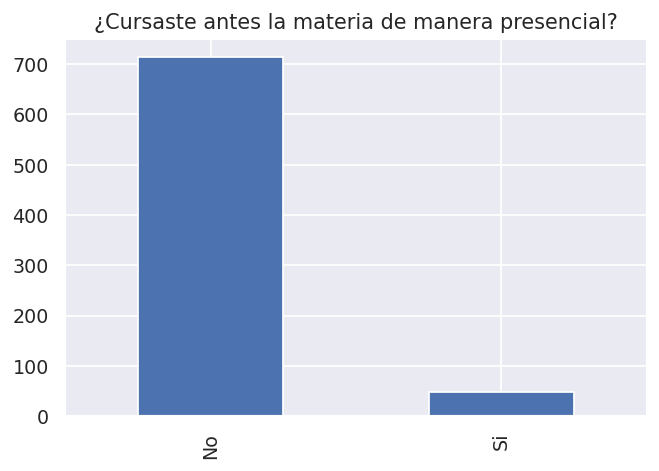

In [25]:
comp['¿Cursaste antes la materia de manera presencial?'].replace({'Si' : 'Sí'}, inplace=True)


plt.figure(dpi=125)
ax = comp['¿Cursaste antes la materia de manera presencial?'].value_counts().sort_index().plot(kind='bar', title='¿Cursaste antes la materia de manera presencial?')
ax.set_xticklabels(['No', 'Si'])

## ¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases teóricas]

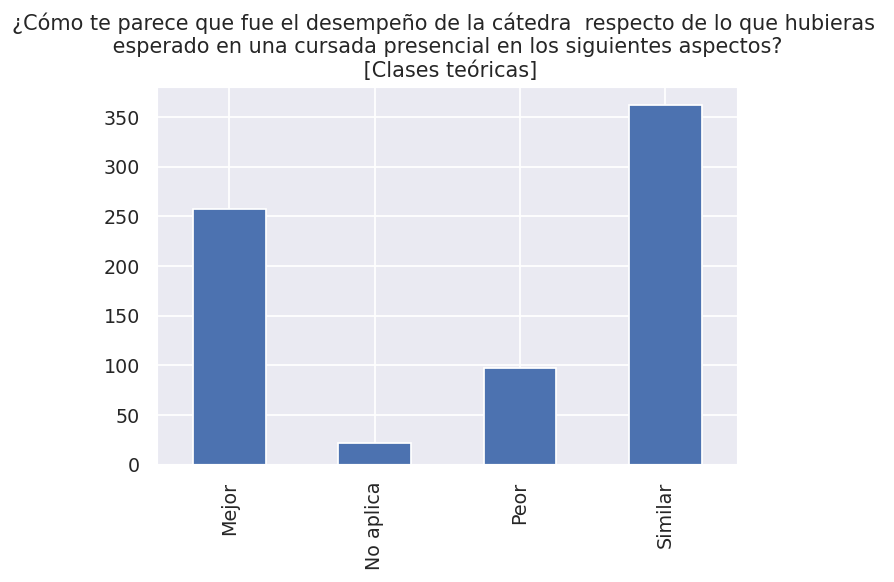

In [26]:
comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases teóricas]'].replace({'No Aplica' : 'No aplica'}, inplace=True)


plt.figure(dpi=125)
ax = comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases teóricas]'].value_counts().sort_index().plot(kind='bar', title='¿Cómo te parece que fue el desempeño de la cátedra  respecto de lo que hubieras \n esperado en una cursada presencial en los siguientes aspectos? \n [Clases teóricas]')

## ¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases prácticas]

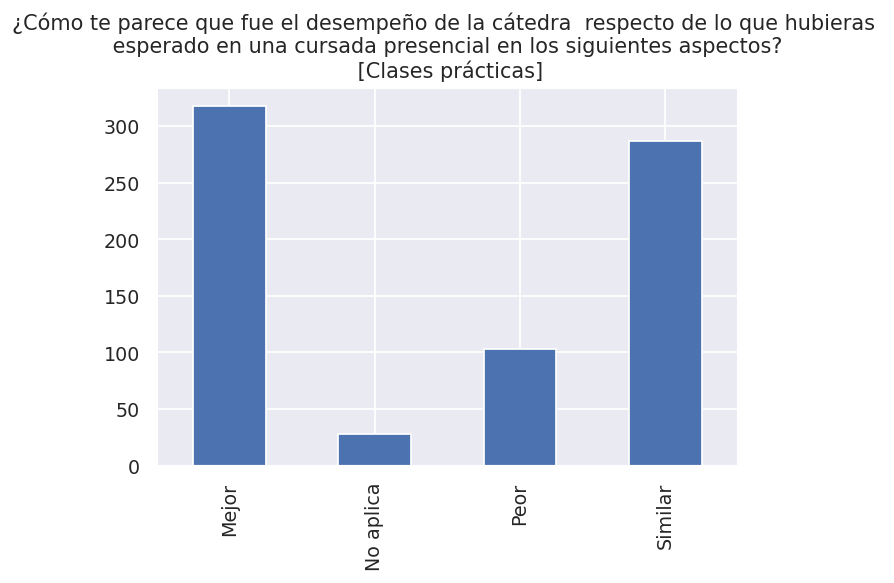

In [27]:
comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases prácticas]'].replace({'No Aplica' : 'No aplica'}, inplace=True)

plt.figure(dpi=125)
ax = comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Clases prácticas]'].value_counts().sort_index().plot(kind='bar', title='¿Cómo te parece que fue el desempeño de la cátedra  respecto de lo que hubieras \n esperado en una cursada presencial en los siguientes aspectos? \n [Clases prácticas]')

## ¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Trabajos prácticos]

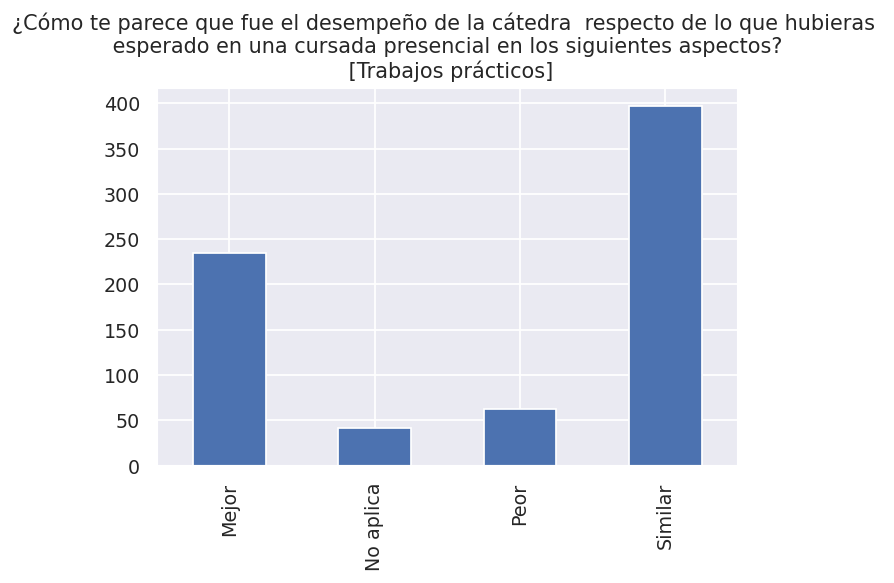

In [28]:
comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Trabajos prácticos]'].replace({'No Aplica' : 'No aplica'}, inplace=True)

plt.figure(dpi=125)
ax = comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Trabajos prácticos]'].value_counts().sort_index().plot(kind='bar', title='¿Cómo te parece que fue el desempeño de la cátedra  respecto de lo que hubieras \n esperado en una cursada presencial en los siguientes aspectos? \n [Trabajos prácticos]')

## ¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Instancias de consulta]

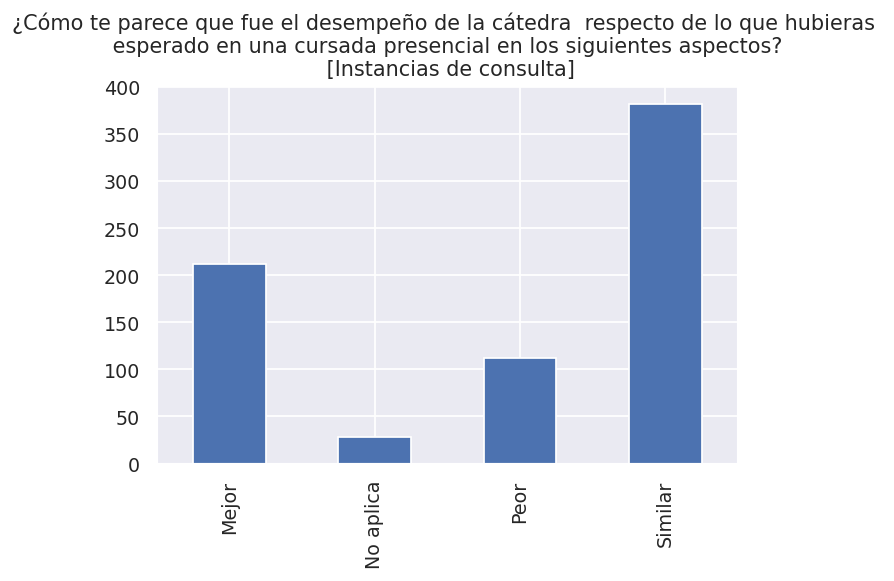

In [29]:
comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Instancias de consulta]'].replace({'No Aplica' : 'No aplica'}, inplace=True)

plt.figure(dpi=125)
ax = comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Instancias de consulta]'].value_counts().sort_index().plot(kind='bar', title='¿Cómo te parece que fue el desempeño de la cátedra  respecto de lo que hubieras \n esperado en una cursada presencial en los siguientes aspectos? \n [Instancias de consulta]')

## ¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Tiempos de respuesta ante consultas]

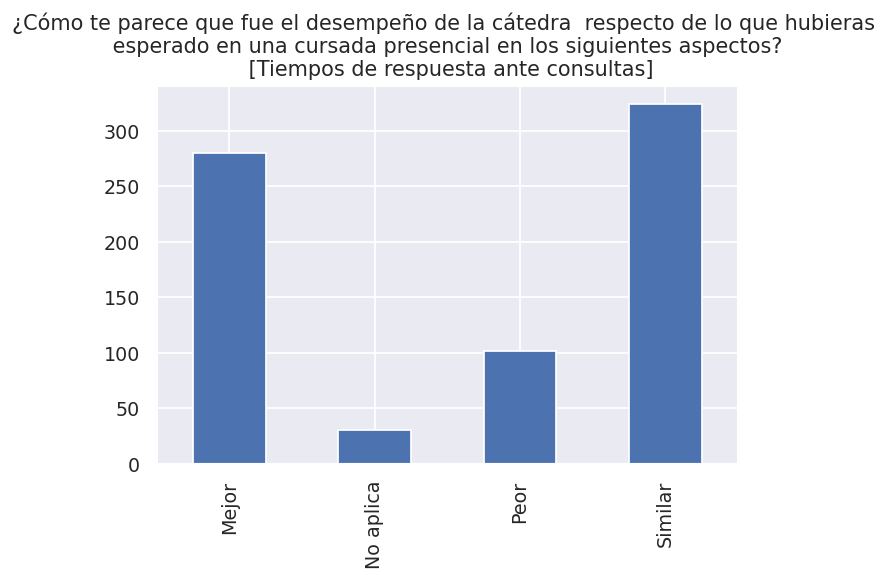

In [30]:
comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Tiempos de respuesta ante consultas]'].replace({'No Aplica' : 'No aplica'}, inplace=True)

plt.figure(dpi=125)
ax = comp['¿Cómo te parece que fue el desempeño de la cátedra respecto de lo que hubieras esperado en una cursada presencial en los siguientes aspectos?  [Tiempos de respuesta ante consultas]'].value_counts().sort_index().plot(kind='bar', title='¿Cómo te parece que fue el desempeño de la cátedra  respecto de lo que hubieras \n esperado en una cursada presencial en los siguientes aspectos? \n [Tiempos de respuesta ante consultas]')

## ¿Qué aspectos valorás positivamente de la cursada remota?

Text(0.5, 1.0, '¿Qué aspectos valorás positivamente de la cursada remota?')

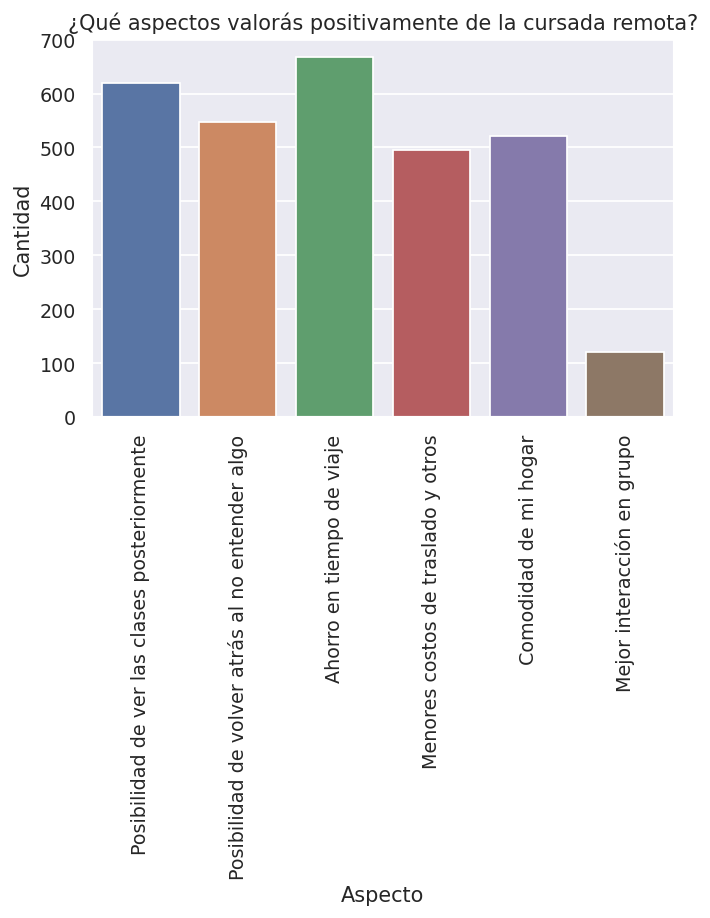

In [31]:
plt.figure(dpi=125)

aspectos = {"Posibilidad de ver las clases posteriormente" : 0, "Posibilidad de volver atrás al no entender algo" : 0, "Ahorro en tiempo de viaje" : 0, "Menores costos de traslado y otros" : 0, "Comodidad de mi hogar" : 0, "Mejor interacción en grupo" : 0, "Ahorro en tiempo de viaje" : 0}

column_text = list(comp['¿Qué aspectos valorás positivamente de la cursada remota? (elegí todas las que apliquen)'].dropna())

for row in column_text:
    for aspecto in aspectos.keys():
        if aspecto in row:
            aspectos[aspecto] += 1
            
df_tmp = pd.DataFrame(aspectos.items())
            
graph = sns.barplot(x=0, y=1, data=df_tmp)
graph.set_xticklabels(labels=df_tmp[0], rotation=90)
graph.set_ylabel('Cantidad')
graph.set_xlabel('Aspecto')
graph.set_title('¿Qué aspectos valorás positivamente de la cursada remota?')

## ¿Qué aspectos valorás negativamente de la cursada remota?

Text(0.5, 1.0, '¿Qué aspectos valorás negativamente de la cursada remota?')

<Figure size 750x500 with 0 Axes>

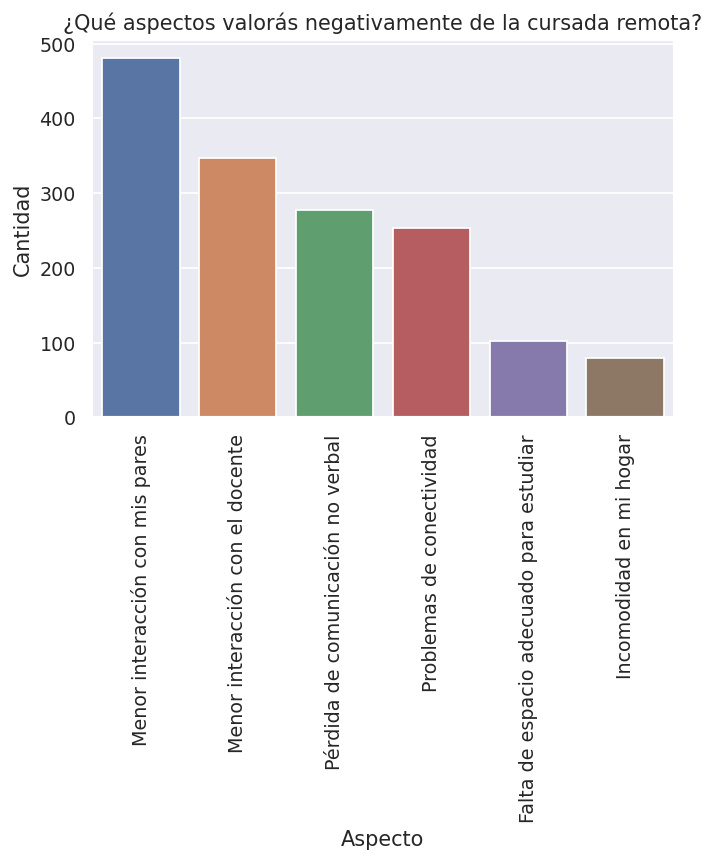

In [32]:
plt.figure(dpi=125)




plt.figure(dpi=125)

aspectos = {"Menor interacción con mis pares" : 0, "Menor interacción con el docente" : 0, "Pérdida de comunicación no verbal" : 0, "Problemas de conectividad" : 0, "Falta de espacio adecuado para estudiar" : 0, "Incomodidad en mi hogar" : 0}

column_text = list(comp['¿Qué aspectos valorás negativamente de la cursada remota? (elegí todas las que apliquen)'].dropna())

for row in column_text:
    for aspecto in aspectos.keys():
        if aspecto in row:
            aspectos[aspecto] += 1
            

    
df_tmp = pd.DataFrame(aspectos.items())
            
graph = sns.barplot(x=0, y=1, data=df_tmp)
graph.set_xticklabels(labels=df_tmp[0], rotation=90)
graph.set_ylabel('Cantidad')
graph.set_xlabel('Aspecto')
graph.set_title('¿Qué aspectos valorás negativamente de la cursada remota?')

## ¿Creés que la cátedra estuvo a la altura de una cursada virtual? En cuanto a herramientas, comunicación, material, etc

In [33]:

for curso in comp['Elige el curso'].unique():
    display(Markdown(f"## Curso {curso}"))
    com = comp[comp['Elige el curso'] == curso]['¿Creés que la cátedra estuvo a la altura de una cursada virtual? En cuanto a herramientas, comunicación, material, etc'].dropna().drop_duplicates()
    if com.empty:
        display(Markdown("_No hay comentarios_"))
    else:
        display(Markdown("\n\n".join(f"> {x}" for x in com.values.tolist())))

## Curso 75.40-95.14-Algoritmos y Programación I - 4 - Essaya

> si

> Si, me pareció muy bueno el material que ofrece la cátedra.

> Fue una muy buena catedra y estuvo perfectamente a la altura

> Si

> Estuvo a la altura

> Totalmente si, mas con el hecho de que empece con una idea negativa y me sorprendio para bien al punto de que me guste cursar remotamente

> Yo creo que sí. Me pareció mucho más cómodo poder hacer los ejercicios de algoritmos a la par del profesor

> Sí

> Totalmente , me brindaron herramientas de sobra

> Si creo que fue excelente.

> A comparacion de las de mas materias, en cuanto a clases y contenidos estuvo perfecto pero lo mas importante, el audio, la conexion y el video hace una gran diferencia a la hora de enseñar y explicar.

> Fue la catedra que mejor se acomodo dentro de las que tuve

> Estuvo a la altura y mas, ya que al utilizar otros medios de comunicación, ayudo a la cursada

> SÍ

> En rasgos generales me pareció que todo estuvo muy bien hecho, las ventajas de las clases virtuales para este tipo de materias son muchísimas. El disponer de las clases tanto teóricas como practicas grabadas en video me fue de gran ayuda no solo cuando me perdía en algún tema, si no que para alguien que se distrae muy rápido, la posibilidad de repetir partes o de incluso ver las clases a mayor velocidad fueron cosas que me ayudaron un montón.

> Si, las presentaciones estuvieron bien acompañadas por ejemplos hechos en el momento para demostrar los conceptos.

> Si estuvo a la altura. Excelente catedra 

> algoritmos y programacion muy bien, el resto media pila.

> la verdad que estuvo excelente, al tener varios ayudantes se hace mas rapida la comunicacion y la aclaracion de dudas via discord

> Absolutamente SI, muy buena implementacion de herramienta de comunicacion (Discord) y tiempos de respuesta.

> Realmente si


## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 2 - Essaya

> Si

> si me gusto mucho la calidad del material y las clases prácticas 

> Si, se adaptaron perfectamente.

> si

> Totalmente, exelente en todo aspecto. 

> Sí, realmente fue la materia que mejor se adaptó a la forma virtual.

> Nunca había visto algo de programación en toda mi vida, me pareció genial la manera de explicar de todos los docentes y creo que se adaptaron muy bien a lo que es la enseñanza virtual.

> si. excelente. la pagina ayuda muchisimo, el discord tambien. las clases virtules siempre puntuales

> Comparándola con otras cursadas virtuales que tuve, esta cátedra fue la que mejor supo manejarlo. Pudo aprovechar las herramientas brindadas por la virtualidad y aplicarlas muy bien a los temas de la materia, o para responder consultas de los alumnos.

> la cátedra estuvo en un muy buen nivel dadas las circunstancias, siempre dando una mano aún fuera del horario de clase.

> Si.

## Curso 75.41-95.15-Algoritmos y Programación II - 4 - Méndez

> Totalmente. Se adaptaron a la perfección

> Totalmente

> si

> mas que a la altura

> La cátedra superó las expectativas para la cursada virtual, muy buen trabajo 

> Si

> Si en cuanto a todo

> Claramente, incluso con cosas mejores que lo que sería presencial

> Si, estuvo excelente, le dan todos los materiales al alumno para que aprenda todo y mas

> Totalmente, 100%

> Totalmente, a pesar de que en general no prefiero la cursada virtual por sobre la presencial, esta cátedra supo cómo dar clases por Meet muy interesantes y divertidas. El material era muy claro y los profesores siempre estaban al pendiente de nuestro canal de Slack por posibles consultas. Los trabajos y examenes fueron difíciles pero en buen sentido. Cursar con más profesores así sería un lujo :)

> Totalmente. Hay mucha comunicación e interacción con los docentes no sólo durante clases sino también vía Slack. Además ofrecen mucho material interesante subido a la pagina de la cátedra. Muy bien organizado todo.

> Definitivamente

> tienen su propia plataforma de apuntes y de evaluacion, por lo tanto no dependen del nefasto campus

> Si, completamente seguro 

> Totalmente, desde el primer dia de clases supe que eran unos genios, parecian que llevaban AÑOS dando clases online, tenian material para todo y un ambiente de trabajo bastante comodo e interactivo.

> SI

> Obviamente. Son gente muy capaz a la altura de las circunstancias.

> Si, igualó a lo presencial

> Si, fue la única materia que lo estuvo

> SI, bastante

> Totalmente, de las materias que cursé, esta cátedra realmente aprendí y me divertí 

> Si, hicieron todo lo que estaba a su alcance.

> excelente

> Si, muy por encima

> Estuvo muy por encima de lo esperado. Creo que fue mejor que una clase presencial.

> Si totalmente 

> Definitivamente estuvo a la altura, las herramientas fueron adecuadas, hubo mucha comunicación y el material fue bueno.

> Si. Todo excelente

> Demasiado. Muchísima atención al alumno!

> Si, todo de lujo.

> Si muy

> Estuvo a la altura. Las herramientas usadas como la pagina de la catedra o Chanutron fueron novedosas para mi y muy útiles. La plataforma de Slack favoreció la comunicación mucho. Fue realmente bueno tener contacto con correctores individuales y les estoy muy agradecido .

> Cursando anteriormente algoritmos y programación I con la misma catedra, la cursada estuvo a la altura. Teniendo herramientas de comunicación muy buenas como slack. Y las clases muy bien explicadas, didácticas y responden dudas sin ningún tipo de problema.

> Sí, sin duda es la más cómoda y amena de todas las cursadas virtuales que he tenido. Ya sea por la predisposición de los profesores, la comunicación con los alumnos, etc.

> Totalmente.

> Si, muy a la altura.

> Se adaptaron perfectamente

> Al igual que el cuatrimestre pasado (Algo 1 - Mendez) estuvieron a la altura totalmente

> Sí, si bien no tuve la oportunidad de cursar ninguna materia de manera presencial en la facultad, esta materia fue abordada exitosamente con la nueva modalidad.

> Sí, probablemente la cátedra que mejor se adapto en toda la facultad

> Si, siempre 

## Curso 75.12-95.04-95.10-95.13-Análisis Numérico I/Modelación Numérica/Métodos Matemáticos y Numéricos - 4 - Schwarz

> Si en la teoría

> si

> Si

> Totalmente a la altura.

> Sí.

> Creo que si bien la catedra estuvo a la altura de una cursada virtual, las clases practicas hubieran sido mejores en un ambito presencial por el hecho de que los temas vistos en la materia se prestan mucho mejor para ser discutidos y practicados en el aula con un pizarron. De esa manera es mas claro ver el funcionamiento de los metodos matematicos y numericos vistos en el curso.

> si, los videos prácticos lo mejor de todo.

> Muy buen material

> Los temas se desarrollaron con el mismo ritmo y profundidad que en una cursada presencial. Las consultas siempre estuvieron al día, tanto para la cursada como para el TP. Se nos dio lugar a los alumnos para interactuar con los profesores. Como cursada virtual, fue una de las materias mejor organizadas de las que cursé.

> La verdad que no, mal organizados y poco comunicativos con las correcciones

> Sí

> Si, tanto profesores como ayudantes estaban dispuestos a contestar dudas a cualquier hora, se notó que querían que realmente aprendieramos los temas y sus posibles aplicaciones en la vida cotidiana, nos ofrecieron muchisimas herramientas, material extra  y en lo personal, me parece que lograron transmitir el amor que le tienen a la materia y que resultara muy interesante la cursada a pesar de la virtualidad

> Sí, considero que la cátedra estuvo a la altura. El material estuvo disponible en el campus para consultar cuando necesitáramos y eso me sirvió mucho. Por cuestiones personales no pude llevar siempre al día la materia, por lo que me perdí bastantes clases prácticas (quizás mi opinión en ese caso no es tan certera). En cuanto a las teóricas, fue de gran ayuda poder verlas en cualquier momento, me ayudó a seguir la materia al menos a un ritmo más lento (aunque sin dudas no era lo ideal). Respecto al TP me pareció que con la interacción virtual fue suficiente para poder entenderlo, llevarlo adelante y finalmente aprobarlo. 

> Estuvo a la altura en cuanto a herramientas y comunicación ya que formaron un canal de Discord donde se hablaba constantemente

> si!

> Si, fueron bastantes considerados al respecto.

> Totalmente, pusieron a disposicion todas las herramientas necesarias para que los temas se pudieran entender lo mejor posible

> Si. Estaban mas mano los programas, donde habia explicaciones teoricas utiles. 

> Si. El material de estudio y las herramientas fueron proporcionados incluso antes de tiempo. La comunicación fue muy buena puesto que creamos un grupo de Telegram y Discord que usamos continuamente tanto para consultas como para avisos.

> Material y herramientas de trabajos están acordes a la metería.

> Si, Se ve que se prepararon y aprovecharon las ventajas de la virtualidad.

> En cuanto a material, el curso cuenta con un buen apunte teórico general de la materia, bastante completo y actualizado. En general no hubo problemas de comunicación.

> Si. Excelente predisposicion y muy didactica la forma de eneseñar los contenidos

> Si, logrado

> Muy buenas herramientas de contencion como discord. Muy dificil seguir la teorica a partir de una presentacion. Desarrollar seria mas didactico

> Si, creo que estuvo a la altura.

> La parte teórica fue muy buena, se dieron todos los temas bien y a tiempo. El parcial fue acorde a lo visto en clase, y Rodolfo siempre estuvo abierto a consultas. 
El problema fue la práctica, fue un desastre, salvo una clase que dio Micaela muy interactiva de repaso de los primeros temas. Después, no hubo clases prácticas, solo se conectaban para consultas.
Creo que los videos que suben al campus para explicar como usar cada método en Jupyter con sus respectivos códigos fueron de mucha utilidad. Pero lejos esta la materia de poder exigir un TP como es el integrador, ya que no nos dan las herramientas para poder hacerlo, ni tampoco es requerimiento saberlo de antemano. Gracias a que en mi grupo había un chico que sabía programar y que se puso el TP al hombro lo pudimos presentar, pero sino la verdad que no se que hubiéramos hecho.
Después la parte de la defensa oral me pareció que estuvo bien, acorde a los temas teóricos  y no se enfocaron en el código.
Me parece una pena que no hayan enseñado a programar, fueron tantos los viernes que no dieron clases y de haberlas, eran una perdida de tiempo.
Siento que no me queda nada para destacar la materia, salvo la parte matemática/teórica. Pero lo que realmente me generaba interés para poder tener una herramienta que me ayude en el futuro que es programar, no me llevo nada.
Una pena, tenia muchas expectativas de esta materia.

> Sí, considero que la cátedra estuvo a la altura. Las/os docentes estuvieron siempre bien predispuestas/os a las consultas, y la comunicación fue fluida. En cuanto a las herramientas y el material, considero que fue muy útil el resumen de clases de Schwarz para la teoría de la materia, y los videos con explicaciones subidos al campus para la parte práctica. A estos últimos creo que sería conveniente agregarles resoluciones de ejercicios en forma numérica, como para que no sean todas explicaciones genéricas.

> La práctica era casi inexistente, no dan ejemplos de nada y el nivel de programación para el tp es muy alto en comparación con lo poco que se explica

## Curso 75.16-95.49-Lenguajes de Programación - Corsi

> Sí, las clases teóricas se dieron con lo que considero un buen nivel. En las clases prácticas sentí un mal uso de las herramientas: el chat de google meet como pizarrón no es la mejor de las opciones disponibles, además, me hubiese gustado recibir algún tipo de feedback sobre los trabajos prácticos entregados semanalmente. Fuera de estos detalles, las clases prácticas me fueron útiles para cerrar conceptos que en las clases teóricas quedaban un poco abstractas, por ejemplo: cálculo lambda y los ligamientos de las variables.

## Curso 75.42-Taller de Programación I - 2 - Azcurra

> No.
Sólo hubo una clase teórica a lo largo de todo el cuatrimestre, y esta no alcanzó para el desarrollo del trabajo práctico.
Las demás "clases", si es que se pueden llamar así, fueron básicamente un conjunto de preguntas (previamente subidas al campus virtual por alumnos) sobre el trabajo práctico. Las "clases" solían durar muy poco ya que tampoco había muchas consultas.

Nos dejaron al libre albedrío con la biblioteca de SDL2, no dieron ni la más mínima explicación de cómo utilizarla, simplemente distribuyeron un link a un tutorial [http://lazyfoo.net/SDL_tutorials/] y se obviaron la parte de explicar.

También nos dejaron al libre albedrío con conceptos de arquitecturas cliente-servidor, si bien la única clase que se dio en la materia trató de esto, considero que no fue suficiente y que se podría haber entrado más en detalle, siendo una materia con temario de la Facultad de Ingeniería de la UNIVERSIDAD DE BUENOS AIRES.s

En general: unos incompetentes.

> No estuvo a la altura. No dieron clase básicamente

> Si

> Estuvo a la altura de la cursada virtual, muy buena catedra, los profesores son muy directos y precisos, material completo y herramientas disponibles.

> Si, pero faltarian capaz mas teoria sobre redes para darlo en mas profundidad. Al menos algunos ejemplos practicos colaborstivos en clase. Las colisiones tambien fueron medio improvisadas y podria darse una clase para orientar.

> Sí, estuvo a la altura.

> si

## Curso 75.01-95.01-Computación - 3 y 10 - Perez Berro

> Tomando como punto de referencia a cómo se desempeñaron otras catedras de otras materias, mi cátedra estuvo a la altura sea desde el contenido a enseñar (videos grabados ya hechos con respectivos PDF's), los trabajos para volcar los conocimientos e incluso las herramientas que estaban en el campus

> Absolutamente

> si

> Si la verdad que siempre que tuve consultas las mismas fueron aclaradas de manera casi inmediata y con mucha clarifad

> creo que estuvieron muy bien ya que los videos eran cortos y claros

> Sí, totalmente.

> Buena disponibilidad y calidad del material de estudio; rápida respuesta de la docente a la hora de responder consultas, respuestas claras y concisas y mucha claridad desde un inicio sobre como se iba a desarrollar la materia y las diferentes instancias de evaluación 

> Si

> Si, cumplio con lo necesario

> Sí

> Cristina lo estuvo, a pesar de que las clases no eran sincrónicas cualquier mail de consulta ella lo contestaba muy bien explicado en el mismo instante. Además las clases de consulta que puso fueron las justas y muy eficientes

> totalmente de acuerdo

> Si, bien organizado 

> Si, totalmente

> Muy buenos los videos teorícos y ejercicios de aplicación 

> Creo que la catedra tuvo un buen desempeño con las herramientas que tuvo a su disposición.

> Si, muy preparada.

> Si, ya que tema material de estudio muy completo y la predisposicion de la profesora tanto a consultas y ayuda, hizo que la cursada sea muy llevadera 

> si, y ademas siendo una materia en la que se usa la computadora, no hubo mucho problema al ser virtual

> Considero q la cátedra estuvo muy bien. En especial la atención de la profesora para con las dudas de los alumnos. Respuestas concretas y rápidas, sin ningún problema en explicar las cosas las veces q fuesen necesarias.

> Los videos me parecieron muy buenos con respecto al contenido. Cómo estaban explicados los conceptos, el orden de la información y los gráficos, hacían que se hiciera más llevadero. Lo que no me gustó, personalmente, es que no tuvieran audio. A veces se me hacía un poco tedioso sólo tener que leer y entender directamente de la presentación del video.

> Di

> Si, las clases fueron excelentes y la profesora siempre resolvió mis dudas.

> si, muy completa

> Si, estuvo a la altura y mas

> si lo estuvo

> Si, estuvo a la altura.

> si, totalmente

> Sí, creo que estuvo a la altura de una cursada virtual.

> La cátedra me gustó bastante. El material de estudio era muy claro y muy explicativo. La modalidad me gusto mucho. Sin clases, te suben el material teórico al campus y vos lo lees según como te organices el día, y si tenes dudas la decente siempre contesta los mails el mismo día y a las pocas horas.

> Si. El material estaba muy bien preparado y la instancia de entregas semanales de tp por mas que a veces pueden cansar, son prácticas para mantenerse al día con la materia, cosa que a mi a veces me cuesta en esta cursada virtual.

## Curso 75.03-95.57-Organización del Computador - 1 - Benitez

> Si

> si

> Lo necesario

> Fueron organizados y grabaron todas y cada una de las clases, a veces se demoraban en responder en los foros pero no era demasiado. Por lo demás estuvieron bastante bien

> La cátedra estuvo a la altura

## Curso 75.47-Taller de Desarrollo de Proyectos II - Fontela

> Si, completamente.

> si

> Totalmente, muy organizados

> Si, en particular me parecio bien la decision de como llevar la cursada ante esta idea de separarla entre 2020 y 2021

> Sí, esta materia es de la que más se prestaron para la modalidad virtual, en parte por la disposición de los docentes, pero también en parte por los contenidos en sí.

> si, podria ser completamente virtual

> Si. Al ser un taller totalmente práctico se hizo más ameno, pudiendo dedicar un poco más de tiempo en la materia.

> Si

## Curso 75.15-75.28-95.05-Base de Datos - 1 - Beiro

> Completamente a la altura. Debe ser de las materias mejor dadas de la carrera.

> Muy buena la cursada virtual, beiro le puso toda la onda. super atento en slack para responder consultas

> Si. Excelente 

> Sí, totalmente.

> Si, excelente uso de las utilidades tecnologicas disponibles

> Si

> Si, totalmente.

> Si, las clases grabadas me dieron una oportunidad de poder ver las clases teoricas, cosa que en otro momento no podria haber hecho ya que la cursada es en horario laboral, esto ayuda muchisimo a quienes trabajamos. La propuesta de tener un video corto previo a las clases me parecio muy util, ya que introducia al tema y hacia mas facil la comprension del mismo. Durante las practicas el profesor en ocasiones mostro videos interesantes relacionados al tema que servian para llevar la clase un poco mas descansando. Al igual que en la teorica, tener las clases practicas y talleres grabados ayudo a la comprension de los temas, dado que sirvieron de material de consulta.

> De todo lo cursado en pandemia (9 materias), este es por lejos el mejor curso virtual. Se beneficia muchisimo de la virtualidad. La comunicacion se vio muy mejorada (slack bien usado, campus organizado, todo)

> Si, totalmente adaptada y ayornada.

> Si, se adapto perfectamente y utilizando distintas herramientas pdieron hacer que las clases sean totalmente llevaderas. Mariano es un excelente profesor, muy claro y siempre con ganas de explicar y que todos entiendan.

## Curso 75.17-75.56-Implantación de Sistemas / Org de la Implantación y el Mantenimiento - Guarna

> Por supuesto

> Si, se supieron manejar muy bien

> Si, había material en el campus y se resolvian ejercicios en clase

> Sí

## Curso 75.01-95.01-Computación - 2 - Burin

> Si

> Me parecio que no, curse muchas materias virtualmente, y fueron mas organizados, claros y se preocuparon por los alumnos.

> si supero ampliamente mis expectativas comparado a las clases virtuales de otras meterias

> En cuanto a contenidos esta bien. 
El profe de teoría mostraba una actitud con poca empática, cuando se le preguntaba algo que no quedo claro, no se mostraba muy predispuesto, igualmente lo explicaba. La escritura, por pantalla del probe era deplorable, desprolija, quizás no le funcionaba bien el mouse, eso mismo no ayudaba, pero bueno. Ojalá este cuatrimestre lo solucione para los otros alumnos

> Me parece que había muy poco material, las clases eran grabadas pero no las subían a ningún lado. No hubo videos teóricos y solo las clases del cuatrimestre pasado que son incómodas de escuchar porque tenés la gente que se deja micrófonos prendidos o esas cosas. Después cuando vimos videos teóricos en clase era la grabación de la pantalla de un vídeo dado en una clase. De más está decir que la calidad fue pésima y no se pudo entender mucho


> Estuvo a la altura pero no me pareció como se manejaron en cuanto al regimen de cursada

> Sí, nos brindaron varias herramientas

> Si, estuvo a la altura. Siempre tuvimos clases completas sin ningún tipo de problema. Estaban abiertos a responder consultas. No se como es en presencial, pero para la parte de programación estuvo bueno verlo directamente desde la computadora de casa en la que se practica. 

> Muy bien

> si, estoy de acuerdo

> no

> Si creo que estuvo a la altura de una cursada virtual, aunque yo pondría mas énfasis en otros temas de estudio como desarrollar mas el tema de programación de python ya que me parece que fueron muy pocas clases de este tema 

## Curso 75.41-95.15-Algoritmos y Programación II - 1 - Calvo

> Si pero no soy parametro ya que curse bastante poco por temas agenos a la materia.

> Si.

> Se adapto relativamente bien

> Sí. Dado las circunstancia se pudo adaptar correctamente para que se entiendan los temas enseñados.

## Curso 75.12-95.04-95.13-Análisis Numérico/Métodos Matemáticos y Numéricos - 6 - Rodríguez

> En su mayoría si. La comunicación se mantuvo bastante bien, pero el corte de cursada genero un bache que bajó el nivel. Respecto al material: no se si será por los temas específicos de la materia, pero en algunos casos que me faltaba aclarar ideas no sentía que el material de cátedra fuese suficiente. Algunos temas costaba mucho saltar de la teoría a los ejercicios, y las clases prácticas al principio no servían. Más adentrada la cursada mejoraron, pero llegue al parcial sin saber si muchos ejercicios los estaba resolviendo bien.

> La verdad que no. En el uso del campus me parece que estuvo bien, pero las clases dadas por una imagen y audios malos hacen de ésta sea una muy mala cátedra (a menos en la cursada virtual).
Se realizaron dos TPs IMPOSIBLES, al menos para mí, que nunca usé octave o python y menos vi los contenidos de la materia antes. Para colmo hoy, 4 de marzo, no me entregan la corrección del primer TP que entregué en NOVIEMBRE. Y encima me lo quieren hacer corregir para luego de la finalización del cuatrimestre, como si tuviera tiempo de sobra.
Cada tanto se hacía un meet con el profesor, quien estuvo ausente, contando sólamente con Valeria quien da las prácticas (ella se pone la materia al hombro digamos). Estos meets eran sobre temas random y consultas, pero ni se escuchaba debido a la mala calidad del micrófono del docente. Teniendo en cuenta las malas condiciones de cursada y las altas exigencias la verdad que la balanza en este curso da hacia el lado negativo.

> Por suerte si

> Podria mejorar en todos los sentidos

> La cátedra desgraciadamente no estuvo a la altura porque no supo desarrollar material óptimo para alguien recién comenzado en estas temáticas. Había mucha teoría resumida que imposibilitaba la rápida comprensión. Personalmente tuve que resolver esto mediante investigación independiente, debido a que el material era escaso y resumido.

> Para nada. Es una cátedra horrible para cursar.

> Si, el campus está bien hecho y están bastante organizados

> Si, me parece que nos dieron todo lo necesario para entender los temas a la perfeccion

> Si

## Curso 75.01-95.01-Computación - 11 - Calvo

> Si

> Estuvo bien, hay ciertas cosas a mejorar como el tiempo de respuesta a consultas en foros, o las clases en sí, ya que varias se basaban en leer los ppt subidos al campus, con apenas algunas aclaraciones. Clases más prácticas en las que la docente resolviera problemas desde 0 (no quizás que muestre un programa ya armado para el problema planteado) hubieran sido muy constructivas. Por otro lado, si bien son entendibles las limitaciones, quizás podrían plantearse problemas que llamen más la atención de los estudiantes.

> Si 

> si

> Sí

> En lo que respecta a otras materias, el material estuvo comparativamente mas completo y se notaba que la profesora se esforzó en que el material este disponible de la manera mas clara. Los problemas de conectividad durante las clases no ayudo.

> No

> Si, al menos en el curso que participe se supo desenvolver de una forma adecuada, teniendo en cuenta las dificultades que conlleva una cursada a distancia.

> si completamente 

> Creo que se esforzaron lo mas posible para que la cursada sea lo mas llevadera posible pero aun asi se presentaron inconvenientes debido a factores externos (como la conectiviad o la dificultad para interactuar con los alumnos) que no acompañaron a ese esfuerzo.

> Fue aceptable! 

> Casi

## Curso 75.04-95.12-Algoritmos y Programación II (Electrónica) - Calvo

> Si

> Sí

> La teorica sí, si la docente tenia problemas de conexion luego subia videos en buena calidad para que veamos, explicando todo muy bien. Respecto a la practica, no. Solo los ayudantes resolvian ejercicios, los docentes de la practica nunca terminaban ningun ejercicio, por lo menos teniamos la clase grabada para verla pero igual, no resolvian bien las dudas y respondian las consultas por el campus mucho despues de que se hacian. 

> Se proporcionaron las herramientas adecuadas para trabajar, pero en instancias de evaluación hubo ejercicios un poco confusos.

> si

> Si, dada la naturaleza de la materia la modalidad de cursada virtual es ideal

> Las presentaciones de las teoricas

> No con todo

> No, la calidad de imagen y audio de la teórica fue muy pobre y era dificil seguir la clase, igualemente es entendible, además de que siempre contesto a las consultas de muy buena manera. Pero la práctica fue muy mala, perdimos mucho tiempo en cosas administrativas y en la explicación de los trabajos practicos, los cuales se complicaron de una forma no constructiva. Por es problema de perder mucho tiempo las clases se hicieron larguisimas y las partes interesantes se daban al final, fuera del tiempo de clase, no pudiendo aprovecharlo. Las clases que dieron los ayudantes fueron muy buenas, claras y consisas, ellos entendieron un poco mas la forma de dar clases virtuales. Es una lastima siendo una materia tan importante.

> No creo que haya sido mala pero tampoco fue la mejor. Digamos que fue normal.

> Si, en mi opinion esta es una materia que se aprovecha mejor virtual que presencial.

> Más o menos, no se hicieron muchos ejercicios en clase ni hubo mucha explicación sobre programación. Había que aprender por cuenta propia para aplicar loa algoritmos 

## Curso 75.50-Introducción a los Sistemas Inteligentes - Ochoa

> Me gustó mucho cómo manejaron las clases. Usaron bien las herramientas informáticas disponibles

## Curso 75.33-75.43-95.60-Introducción a los Sistemas Distribuidos  - Carísimo

> Utilizaron correctamente las herramientas informáticas disponibles

> No organizan/aprovechan los espacios tecnologicos para llevar la catedra

> Las teóricas de Carisimo fueron realmente excelentes; se nota que es una persona que sabe muchísimo de lo que habla, transmite su conocimiento y logra interesarte en el tema que está hablando.
Por otro lado, las prácticas fueron pésimas. Creo que esto se debe a que el JTP (Pecora) realmente no le pone un mínimo de ganas a las clases ni a la materia. Con muchos de mis compañeros coincidimos en que es un docente que no tiene ganas de ayudar a los alumnos ni hacer que las prácticas mejoren; tardó meses en corregir los dos primeros tps (sumado a que después en las correcciones de los mismos marcó detalles que no tenían sentido en lo que hacía a los trabajos), siempre tuvo una forma de responder muy pedante y soberbia y en muchas clases prácticas su participación fue nula a la hora de responder dudas (hasta una clase pasó que un ayudante no sabía la respuesta a una pregunta que le hicieron y Pecora ni se tomó la molestia de interceder para darle una mano y evitarle hacerlo pasar un momento bastante incómodo.

En fin, un curso que la verdad tiene dos caras muy grandes: por un lado una teórica excelente, y por el otro una práctica que deja mucho que desear por la mala predisposición para enseñar, las malas formas y la soberbia sin sentido de su JTP (y vuelvo a insistir en que no soy el único que piensa así y con la mayoría de nuestros compañeros hablamos reiteradamente de estas actitudes durante toda la cursada).

> si

> Si, estuvo a la altura.

> Si

> La teorica sí, la práctica demoró mucho en corregir parciales y TPs y muchas veces necesitábamos que esa retroalimentación se diera más rápidamente para saber si estábamos muy errados con algunos conceptos aplicados en los trabajos prácticos. Las notas de todos los TPs estuvieron una semana después de haber terminado de cursar. Las notas del primer recuperatorio estuvieron casi 2 meses después (estuvo el receso en el medio, pero creo que no habia necesidad de tardar tanto). 

> Sí

> Si, disfrute mucho de las clases virtuales.
Espero que la clases sigan siendo virtuales de ahora en más.

> La teórica si, la práctica no.

> Sí, estuvo a la altura.

## Curso 75.26-95.19-Simulación - Caiafa

> Si, se brinda antes de tiempo el material para la clase teórica para poder aprovecharla más 

> Si, estuvo a la altura

> Sí

> Si

> Si, totalmente.

> La verdad que si. Grabaron todas las clases, tenian todo muy organizado en el cronograma y el campus.

> Completamente a la altura. En este sentido, la cátedra es excepcional. Y se nota que están buscando todo el tiempo la inserción de nuevas herramientas y métodos que FACILITEN la cursada. Esto lo es todo

> Muy a la altura.

## Curso 75.61-Taller de Programación III - Alvarez Hamelin

> Sí; lo que no se pueda hacer en conjunto en el laboratorio, se puede hacer en la máquina de cada uno. La comunicación fue siempre muy buena, y el material provisto fue adecuardo. Muy buenas las recomendaciones de software auxiliar (como Overleaf) y sitios de referencia (RIPE Atlas, CAIDA, etc)

> Se utilizó Google meets y slack como herramientas de comunicación. En lo personal, Meets me parece mejor que zoom, así que esa decisión me gustó. Por otro lado, con respecto a Slack, entiendo su uso pero es una herramienta que no prefiero ya que tuve que descargarla en el celular (para que me lleguen las notificaciones) y no tengo mucho espacio en el mismo. Hubiera preferido comunicación por mail o por el campus, ya que no ví la necesidad de que lo comunicado sea si o si por Slack.

## Curso 75.08-Sistemas Operativos - 1 - Clua

> Considerando la situación actual creo que la catedra supo adaptarse correctamente a la modalidad remota.

> Se estuvo a la altura de la cursada virtual, una posible mejora hubiese sido grabar las clases para futuras revisiones

> Estaría bueno que graben las clases, si bien tienen pdfs cuando los volves a leer hay cosas que quizás no quedaron muy claras y teniendo las clases grabadas se podría solucionar

> Si

## Curso 75.40-95.14-Algoritmos y Programación I - 3 - Méndez

> si, fue excelente

> Si, no sentí que nada importante se haya perdido debido a la virtualidad.

> Si perfecta

> Superó las expectativas para la cursada virtual.

> La verdad que si, la plataforma de slack para comunicarnos fue excelente, los ejercicios de rpl para afianzar los conocimientos servia un monton y los pdf de lo teorico siempre te brindaban bastante ayuda para terminar de entender los conceptos.

> si, definitivamente.

> Definitivamente sí. La cátedra ofreció diversas herramientas para cada trabajo además de estar atentos para asesorar al alumno. Además, el material es de muy buena calidad.

> Si, estuvo a la altura

> Si

> Si, en especifico para la materia es muy bueno

> No. la parte practica no me ayudo en poder consultar las dudas que surgian en la teoria

> Estuvo a la altura e incluso la superó.

> Se adaptaron a la virtualidad perfectamente.

> Si, totalmente

> Por supuesto siempre estuvieron al pendiente de la cursada y de sus alumnos

> Muy superior a lo que esperaba y en comparación a otras.

> Sinceramente las herramientas que brindan, te hacen desear la virtualidad mas que la presencialidad.

> Si, estuvo muy bien organizada y se pudieron ver los temas en profundidad sin problema

> Estuvo muy por encima.

## Curso 75.48-Calidad en el Desarrollo del Sistemas - Pantaleo

> No, no estuvo a la altura, pero pienso que presencialmente hubiera sido lo mismo.

> Podria haber sido mejor como por ejemplo: grabar las clases y la comunicacion es mala, tardaron mucho tiempo en contestar una consulta que habia realizado durante la cursada.

> No, estuvo lejos de estar a la altura

> No había material. Les pedimos en reiteradas ocasiones material para estudiar y nuca lo entregaron.

> No, ni siquiera se grabaron las clases. Los links al material muchas veces estan caidos.

> El menor de los problemas de la materia es la virtualidad.

> A veces fueron bastante acotadas las herramientas y no pusieron mucho esfuerzo en dar más opciones pero no me pareció mal

> No. Poco interes de los docentes

> Las clases teóricas no fueron grabadas cuando podía hacerse y dejarlas a disposición del curso. Lo mismo ocurrió con las clases prácticas, que también hubiera sido útil y completamente coherente

> No. Igualmente esta materia viene así hace años..no hay sync entre la teorica y la practica; a veces comenzaba la clase practica sin que termine la teórica. 

> Si

## Curso 75.07-95.02-Algoritmos y Programación III - 2 - Méndez

> Sí, son unos genios

> Se organizaron bien, pero que hayan dado solo Smalltalk durante toda la cursada, no me gusto para nada eso.

> Totalmente. Superaron lejos lo que esperaba de AyP3.

> Sí

> Si, completamente.

> Si estuvo a la altura.

> Creo que la catedra quedo mejor parada virtualmente que lo que estaria con una cursada presencial

> Sí.

> Creo que esta materia se da mejor de forma virtual, y los excelentes profesores son un plus

> Se adapto super bien a la cursada virtual. Estaban super atentos a las consultas, por lo que genero muy buena comunicación. 

> Muy a la altura, se manejaron súper bien.

> Si, definitivamente. Se adaptó muy bien, y habian varias herramientas que la catedra brindó para profundizar algunos temas y consultar, y por otro lado hizo buen uso de otras herramientas de comunicacion (ademas del mail) para despejar dudas en todo momento. Los profesores y ayudantes siempre estuvieron atentos para responder.

## Curso 75.01-95.01-Computación - 4 - Servetto

> Si, estuvo a la altura

> si

> si, lo estuvo 

> Si.

> Si

> SI

> Sí.

> Hubo una mayor compresión en los temas de la materia.

> Sí

> Creo que si

## Curso 75.03-95.57-Organización del Computador - 2 - Moreno

> Si

> Si, hubiera estado bueno más ejercicios en la práctica, pero lo demás estuvo bien

> Si, contestaron todas las dudas por discord y hubo buen acompañamiento de parte de los docentes. La comunicación fue fluida. El material se dio de forma un poco dilatada, temas que se podrían explicar en poco tiempo fueron explicados en 4 horas. Eso es lo único "negativo" que tengo para decir, el resto fue muy bueno.

> Sí

> Si, el material esta muy bien.

> Se hizo lo mejor que pudo con lo que se tenía, en cuanto a recursos docentes. Cursar esto presencial hubiese sido muchísimo más doloroso. Me gusta poder volver atrás, ver las clases de nuevo, etc.

> Si, supieron usar muy bien las diferentes herramientas virtuales. Utilizaron Discord, Github y una pagina especial para la materia.

> SI

## Curso 75.40-95.14-Algoritmos y Programación I - 5 - Costa

> Si

> Si. Estaba todo organizado de manera correcta

> Fue mucho mejor de lo que esperaba para una cursada virtual.

> Sí, estuvo a la altura

> Si, se adecuo de muy buena forma

> Sí

> Sí, estuvo a la altura de una cursada virtual. Buena comunicación y herramientas.

> Totalmente, me pareció super preparada y con muy buenas herramientas para abordarla

## Curso 75.10-95.21-Técnicas de Diseño/Métodos y Modelos de la Ing. del Software II - 2 - Paez

> si

> Si claramente, se amoldo perfecto

> Faltó grabar las clases, son muy útiles para repasar. El canal de comunicación fue una lista de google, creo que usar otro medio como slack sería mejor para acortar el tiempo de respuesta ante consultas.

> Si

> No graban las clases, y usaron jitsi que es malisimo

> Sí

> Si. El mayor problema de esta catedra es lo disperso de la informacion. No sabes cuando te perdiste algo importante porque lo dijeron en clase (no grabadas), si justo se te escapo un mail importantisimo. Me parece que se beneficiaria mucho mejor de un buen uso de slack, donde se entiende claramente la relevancia de cada cosa.

> Si, está super organizada

> Si, pareciera que siempre fue virtual, no le falto casi nada

> Considero que las herramientas y comunicación fueron adecuadas, pudiendo mejorarse esto haciendo uso de slack por ejemplo para que sea mas continua la comunicación. 

> Si, brindaron todas las herramientas y material

> Sí, las vías de comunicación eran fluidas, ya sea al responder los correos con consultas, la interacción en el feedback de cada ejercicio. Los materiales y plataformas también eran útiles y fáciles de usar.

## Curso 75.10-Técnicas de Diseño - 1 - Pantaleo

> Si

> Para nada. 

> si

## Curso 75.18-75.44-95.24-Proyectos Informáticos/Adm. y Control de Proyectos Informáticos I - Fontela

> Si, muy bien

> Totalmente, siempre propusieron distintos mecanismos para estar comunicados.

> Si

> Sí, totalmente. Se adaptaron muy bien. Todo el material siempre subido y muy bien organizado.

> Si. Realmente fu un placer además de que al grabar las calase liberan tiempo. Y nos deja tomar los clases con el tiempo adecuado en vez de todo apurado como es en la facultad.

> Si, creo que se adaptaron bastante bien

> SI

> si

> Si, adecuado completamente.

> Sí

> Estuvo muy bien preparada

> Si. Siempre se manejaron muy bien.

> Si, creo que se brindo todo el apoyo y material necesario para aprobar la cursada

> Dentro de las posibilidades virtuales si.

## Curso 75.46-Administración y Control de Proyectos Informáticos II - Álvaro

> Si

> En líneas generales sí

> Sí, bastante bien adaptada a la virtualidad. 

> La cátedra se manejó de manera virtual casi sin inconvenientes. Algunas clases ameritan la presencialidad pero aún así la cátedra las llevó adelante sin problemas, junto con todo el cuatrimestre.

> Si, me parecio que las clases se desarrollaron de manera similar a lo que hubiera sido presencialmente

## Curso 75.12-95.10-95.13-Análisis Numérico/Modelación Numérica/Métodos Matemáticos y Numéricos  - 1 - Menéndez

> Si, muy.

> Si, creo que las herramientas y materiales fueron adecuados, al igual que la comunicación

> El material de apoyo de las clases teóricas podría pulirse un poco. El mismo consta únicamente de títulos y ecuaciones. En lo personal, me habría ayudado muchísimo que el mismo contenga algunas explicaciones o aclaraciones en palabras de lo que se muestra en las diapositivas. Las explicaciones del profesor Menendez siempre fueron muy claras, pero al volver a leer el material sigue resultando difícil su interpretación.

> Creo que sí aunque no brindó la opción de grabar las clases y subirlas como hicieron la mayoría de las materias que cursé en esta modalidad. Algo que hubiera estado muy bien ya que la materia abarca un monton de temas teóricos

> si, tienen todos los videos donde explican cosas. El problema es que creo que se quedan cortos con los videos practicos, que son super utiles pero deberían haber mas con mas ejemplos. Y los videos teoricos no son muy buenos porque se escuchan super bajo y además al grabar la pantalla el profe no tiene un cursor o puntero para ir señalando en la diapositiva de lo que habla y a veces te perdes.

> Respuesta para Análisis Numérico II.

Creo que el nivel y dedicación de los docentes fue excelente. En mi caso particular, siento que pude aprovechar mejor la clase práctica que la teórica en la modalidad virtual. En modalidad presencial varias dudas pequeñas de la cursada teórica podrían haber sido preguntadas rápidamente en el aula. Con la modalidad virtual, en cambio, creí que interrumpir el dictado de la clase afectaría la fluidez (un poco más complicada de forma vitual) por lo que esperé a que finalizara cada clase para consultar bibliografía.

La comunicación del curso me pareció muy eficiente.

## Curso 75.01-95.01-Computación - 5 - Arriazu

> si, definitivamente

> Si

> La cursada fue muy buena, la profesora estaba muy preparada para dar clases virtuales, y los temas se adaptaron muy bien a la virtualidad. La forma de evaluación también fue muy buena. Los materiales eran completos, con muchos ejemplos y tocaban todos los temas necesarios que aparecían en las prácticas. Lo único que a veces el ritmo era muy rápido como para tomar notas y me quedaba atrás cuando veíamos algún ejemplo.

> Claramente estuvo a la altura.Se nota que la profesora tiene mucha vocación para la docencia y tiene absoluto conocimiento de los temas desarrollados durante curso con lo cual sabe transmitir los conceptos de forma tal que los alumnos lo puedan comprender facilmente.

> En mi opinión, estaría bueno que las clases queden grabadas.

> Considero que si ya que se brindaron todos los materiales y vías de comunicación necesarias para poder llevar a cabo una cursada interesante y enriquecedora.

> si

> Sí, considero que la profesora aprovechó muy bien la virtualidad, y la usó a su favor.

## Curso 75.06-95.58-Organización de Datos - 2 - Collinet

> Si, considero que para ser el primer cuatrimestre que la dan se manejaron muy bien

> Si

> Estuvieron totalmente a la altura, todo de primer nivel, actualizado, rápido, fluido.

> Sin dudas. Había comunicación fluida por el grupo de Slack, se disponibilizaron las clases para ver ante cualquier inconveniente, había un streaming por si el meet fallaba. Muy preparados estaban

> Completamente, los docentes brindaron todas las herramientas posibles para que la cursada virtual sea de lo mas comoda.

> si

## Curso 75.07-95.02-Algoritmos y Programación III - 1 - Suarez

> Si, pero en la práctica abrieron muchos canales de comunicación y descentralizan todo así... 

> Sí, completamente

> si

> Si

> Sí, totalmente

> 100% No decepciono

## Curso 75.24-75.31-95.07-Teoría de la Programación/Teoría del Lenguaje/Teoria de Leng. de Prog. - Ferrigno

> Estuvo perfectamente a la altura. No tengo quejas de ningun tipo.

> Totalmente

> Sí

## Curso 75.42-95.08-Taller de Programación I - 1 -Veiga

> Excelente materia para hacerla virtual. La modalidad virtual benefició un montón a la materia y la hizo súper disfrutable desde casa.

> Si, se adaptaron bien a la virtualidad. Creo que este cuatrimestre agregaron el uso de Discord además de la lista de correos, lo que hace más dinámica la interacción entre los alumnos (no tanto con los colaboradores).

> Estuvo bueno que incorporaran discord, pero mandé algunas consultas a correctores y mucho tiempo de demora.

> Si

## Curso 75.29-95.06-Teoría de Algoritmos I - Podberezski

> Sí

> Si

> Perfectamente adecuado.

> Si, casi no es necesario preguntar nada porque los videos son increibles y si eso no alcanza, en la clase Victor vuelve a aclarar todos los temas con mucha paciencia.

> Si.

> Sí, 100%

## Curso 75.74-Sistemas Distribuidos I - Roca

> Sí

> Si.

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 2 - Tarela

> Si, muy buen aprovechamiento del material audiovisual. Videos teóricos, clases grabadas, consultas en vivo. 

> Si

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 5 - Sassano

_No hay comentarios_

## Curso 75.71-75.72-Seminario de Ing. Informática I y II - 2- Caram

> La cátedra estuvo a la altura de la cursada virtual

> Desde la catedra se proveyo el material necesario, ofreciendolo antes de cada clase por medio del campus y luego explicandolo en las clases sincrónicas grabadas para que puedan verse posteriormente. Además se tuvo en cuenta el horario de los alumnos y se ajusto el horario de cursada según esto. 

> Si, creo que la cátedra presentó una cursada virtual bien implementada

> ¡Sí! Pasaron todas las clases a diapositivas para la cursada y grabaron todas las clases.

> Si, en todos los aspectos

> Si, completamente

## Curso 75.01-95.01-Computación - 6 y 9 - Jimenez Rey

> Si, siento que se acomodo muy bien

> Si. Lo que destacó es el Drive que se armó para el desarrollo de la parte práctica con devoluciones constantes de la profesora

> Totalmente

> Si, fue muy organizado

> Si, es una catedra muy completa.

> La verdad estuvo a la altura todo, la profesora siempre dispuesta a ayudarnos y guiarnos en todo.

> Todo el material necesario fue presentado en el aula virtual de la cátedra, lo que hizo que fuera muy fácil poder tener uso de ello. Las clases fueron muy claras y la presentación de estas también me resultó muy útil. 

> Seguro, pocas cátedras han sabido adaptarse en esta situación

> Si

> Realmente considero que la cátedra no sólo estuvo a la altura, sino que excedió toda expectativa generada por una cursada virtual.

 Las herramientas fueron adecuadas, y todo el material cuidadosamente planificado. 
Considero desatacan aún más la forma de planificar, organizar y desarrollar los materiales  durante este período de distanciamiento,  pues ha funcionado muy bien. 

 

> si, estuvo.

> Creo que la cátedra estuvo a la altura pero la sentí muy exigente y demandante. 

> Los contenidos están bien, pero la modalidad de usar esas presentaciones dificulta comprender los contenidos 

> si, la cursada estuvo a la altura, contamos con las herramientas necesarias en el campus/taller

> Si, creo que estuvo a la altura

> Si, estuvo a la altura

> Si, un trabajo muy bueno.

> Estuvo a la altura y logro enseñar adecuadamente los contenidos de la materia gracias a las herramientas virtuales utilizadas

> Si, con algunas cosas para mejorar pero lo estuvo.

> Si me pareció una muy buena catedra muy ordenada

> Sí, creo que se ha adaptado muy bien

> Si, la materia puede cursarse vitualmente sin problemas

> Si , se nos proporcionaron bastantes materiales que ayudaron a la aprobación de la cursada

## Curso 75.09-Análisis de la Información - 2 - González

> Sí.

> Si, totalmente

## Curso 75.08-95.03-Sistemas Operativos - 2 - Méndez

> Totalmente

> Si

> Creo que la cátedra estuvo a la altura. Fue un cuatrimestre MUY difícil y el receso en el medio fue totalmente detrimental para la cursada.
Aspectos que podrían mejorarse: 
Acceso a clases grabadas de otros cuatris/videos para ver antes de la clase de un tema (facilitaría consultas)
Algún tipo de evaluación constante de los temas teóricos (e.g. mini test multiple choice en campus cada 1 o 2 semanas) para motivar (controlar jaja) a estar al día con las clases teóricas.

> Estuve excelente. Nada más que aportar. Se valora mucho los talleres o temas extras dados en la práctica.

> Totalmente. Se pierde un poco la interacción (verbal o no verbal) con los docentes al no estar presencialmente en la clase pero en todos los otros asspectos estuvo a la altura de lo que hubiera esperado en una cursada normal.

> Estuvo bien adaptado a la cursada virtual.

> si

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 1 - Cardozo

> No. Me parece que las clases fueron muy pobres en contenido y poco didácticas

> No categorizaría  como una cursada virtual, sino como una virtualización de las clase presenciales, me refiero a que uno debía "asistir" a la clase desde su casa. 

> Los profesores hicieron todo lo posible para que este a la altura y lo lograron. La facultad pudo haberlos ayudado un poco

> No.

## Curso 75.14/95.48-Lenguajes Formales - Corsi

> Si, la cursada estuvo muy bien y supero mis expectativas

> Fue excelente.

> Sí

> La catedra estuvo a la altura de la cursada virtual. Los contenidos no solo fueron dados de manera didactica y dinamica, sino que inmediatamente estaban disponibles en el campus para poder hacer un repaso posterior

> Si, siempre estaba la disposición de los recursos en tiempo y forma

> Sumamente a la altura de una cursada virtual.

> Si, considero que la cátedra a nivel general estuvo a la altura de una cursada virtual. Las clases teóricas me parecieron súmamente completas, claras, con la posibilidad de hacer consultas por chat y también por micrófono. Además teníamos el plus de poder ver las clases cuando quisiéramos luego. El campus y el email eran buenas herramientas para consultas y dudas. Las prácticas también estuvieron buenas en cuanto a las prácticas de los ejercicios.

> Sí, definitivamente. Se aprovechó al máximo el campus, todo el material fue subido de forma organizada y la forma de dictar las clases (teóricas y prácticas) fue la más adecuada para la situación.

> Sí, me pareció que estuvo muy bien manejada.

> Si, los materiales teóricos estuvieron disponibles desde el primer día, luego a medida que eran necesarios se liberaban apuntes o material adicional. También es para destacar en la cursada virtual la disponibilidad de las herramientas prácticas (compiladores, intérpretes, etc) y el hecho de verlas en uso durante la clase pudiendo volver a revisar esas partes en las grabaciones.

> Si, muy bien organizada virtualmente.

> no

> La cátedra nos hizo llegar todo el material necesario para poder cumplir tanto con la cursada como con el trabajo práctico y la evaluación final. Además la posibilidad de resolver entre todos los ejercicios de la práctica, compartiendo pantalla, permitió entender mucho mejor el paso a paso para llegar a la solución de cada ejercicio propuesto (para los 4 lenguajes vistos)

> Totalmente. Destaco la actitud de los docentes para llevar la cursada virtual de manera amena y didáctica. Los ejercicios obligatorios hacen que uno lleve la materia al día para no perderse con los temas.

## Curso 75.59-95.09-Técnicas de Programación Concurrente I - Garibaldi

> Totalmente, agregando el uso de herramientas como VSCode Share Live para la participación del grupo en la resolución de ejercicios en clase, además de responder a todas las dudas que se envían en tiempos acotados y de tener todo el material de estudio en el campus.

> Si, se brindo todo lo necesario para poder aprobar la materia

> Si, aunque se pueden mejorar cosas

## Curso 75.01-95.01-Computación - 1 - Strobino

> cero comunicacion

> no

> La catedra se manejo bien, con las herramientad necesarias para dar clases virtuales

## Curso 75.27-Algoritmos y programación IV - Carossi

_No hay comentarios_

## Curso 75.41-95.15-Algoritmos y Programación II - 2 - Buchwald

> Si

> Sí, sumamente. Nunca antes había usado slack y me resultó fácil de entender y muy útil. La página de la materia muy completa.

> Si, se adapto muy bien 

## Curso 75.01-95.01-Computación - 7 - Cabrera

> Me parece que estuvieron a la altura

> Si

> si, se dictaron clases en el horario y respetaron la cantidad de horas indicadas.

> Si.

> si

> recomendaria que a la hora de dar la teórica compartiera el pdf en la pantalla asi es más practico en vez de que cada uno lo  tenga abierto

> Sí

> Creo que sería bueno mejorar la comunicación

> Senti que estuvo muy acorde, los temas fueron dados en su totalidad y con tiempo de sobra. Muy útiles los ejercicios opcionales a entregar para practicar un poco más

> siii

> Estuvo todo correcto, lo unico que deberian mejorar es el uso del foro para consultas el resto todo ok

> Perfectamente

> Si, cumplió con todo lo debido

> si.

> si, bastante bien

> Creo que antes del primer parcial estuvieron muy bien organizados, pero los temas para el 2do los dieron super apurados y me costó mucho entenderlos.

> Si lo estuvo

> En mi opinión, la catedra nos dió muchísimas herramientas como para tener más información además de las clases teóricas y prácticas. Lo que ayudaba, al tener temas difíciles, a que podamos sacar información de varios lugares

> Si, se manejaron con Meets en el horario de cursada. Diapositivas explicando la teoria y en la practica compartian pantalla para hacer y/o tomar apunte de lo que van haciendo en el phyton. Nunca antes habia programado asi que me resulto bastante amigable

> Utilizaron las herramientas de manera adecuada y la información subida al campus de los temas vistos en clase resultaba muy útil 

> si, habilitan material y las herramientas necesarias para llevar a cabo una cursada excelente

## Curso 75.06-95.58-Organización de Datos - 1- Argerich

> Fue espectacular.

> si, las clases fueron excelentes al igual que el curso en general

> 100%

> Si

> Si, practicamente no hubo diferencias con lo que (supongo) es una cursada virutal.

> Hasta el ultimo parcialito si, despues me parecio que flaqueó un poco

> De las materias que cursé, ésta fue de las que mejor se adaptaron

> En cuanto a la cursada virtual, desde que se paso a esta modalidad es la materia de las que cursé que mejor se adaptó . La cantidad de material en video es genial y la posibilidad de tenerlo antes de las clases resulta mucho mejor. Tiene su plataforma para consultas y donde tiene todo el material (videos, presentaciones pptx, apunte, etc).

> mas o menos

> Si, incluso mejoro mucho con respecto al cuatrimestre anterior.

> Si, los trabajos prácticos fueron del mismo modo que los presenciales, los exámenes me parecieron bien tomados utilizando la plataforma gradescope

> si

> La materia estuvo a la altura de la virtualidad, tienen un muy rápido tiempo de adaptación a los cambios y a encontrar soluciones a los problemas planteados por la modalidad

> Se supieron adaptar correctamente, y utilizaron plataformas competentes (kaggle, piazza, gradescope)

## Curso 75.58-Evaluación de Proyectos y Manejo de Riesgos - Villagra

> Totalmente 

> Claro que sí

## Curso 75.55 Taller de Desarrollo de Proyectos III - Gabardini

> Totalmente 

## Curso 75.09-95.20-Análisis de la Información / Métodos y Modelos de la Ing. del Software I - 1 - Villagra

> Si

> Si, totalmente

> Si, se adaptó perfectamente.

> Si, la cátedra tuvo mucha predisposición para adaptarse a la virtualidad

> Si muy a la altura

> La materia estuvo a la altura de la complicada situación. 
Classroom es una buena plataforma.
EdPuzzle es muy interesante (pero en mi caso yo miré los videos una vez con EdPuzzle y varias veces en el drive para poder verlos a mayor velocidad y volver a repasar algunos conceptos).
Las tecnologías que la cátedra propuso Zoom/Slack funcionaron de forma perfecta.
Entiendo muchas de estas se usaron desde antes de la cursada virtual.

> Muy a la altura

> Sí, no se como era esta cátedra durante la presencialidad, pero en mi opinión se adaptó espectacularmente a la cursada virtual

## Curso 75.73-Arquitectura de Software - Calónico

> Si

## Curso 75.51-Técnicas de Producción de Software I - Turri

> Si

## Curso 75.52-Taller de Programación II - Calónico

> Si, totalmente, es una materia que va muy bien con la virtualidad

## Curso 75.40-95.14-Algoritmos y Programación I - 1 -Guarna

> Si

> Creo que fue desorganizado y un poco improvisado sobre la marcha.

> Incluso considero que la cursada virtual debe ser mejor que la presencial en todo aspecto.

> siento que estuvo bien, quiza no usaria adobe ya que es usar una plataforma distinta que ya visualmente no es atractiva y que a traido problemas a la hora de compartir pantalla, las clases por meet parecian mas dinamicas

> si, creo que esta materia se presta a darla de manera online que quizás con otras materias no sucede lo mismo.

> si

> La verdad hubo ciertos problemas con respecto a las herramientas que podían utilizar los profesores al momento de dar la clase, como micrófono saturado, problemas técnicos a la hora de enseñar ciertos temas.

> Me parece que la materia es perfecta para dar en cursada virtual. Tal vez podrían dar más herramientas como páginas o lugares donde buscar la información que por distintos motivos no logramos obtener en clase.

> Sí, me gusta la manera remota, creo que las clases de esta materia pueden darse de tal forma. La comunicación fue buena y el material también. Podía seguir la clase gracias a que tenía mi pc conmigo y presencial no podría seguir los códigos presentados por los profesores que son de mucha ayuda para entender mejor los temas.

> Si, la volvería a cursar onlinne sin problema

> Sí, impecable.

> Si bien siempre se puede mejorar, creo que la cátedra se adaptó muy bien a la virtualidad.

> Me parecio muy buena la cátedra en forma virtual , los profesores estaban bien informados y sabian que hacer en todo momento , no me imagino la clase en forma presencial , estoy seguro que seria bastante peor

> El material estuvo bien, aprendí todo lo que creo que hubiese aprendido de forma presencial con el mismo esfuerzo.

> Si claro

> Absolutamente, e incluso mejor.

> Creo que lo que mas me costo fue la interaccion de la clase, el ida y vuelta de preguntas, etc

> Creo que aun falta mucho para mejorar y adaptarse a las clases virtuales. Pero creo que le vino bien a esta cursada en particular ya que los profesores podian mostrar codigo en tiempo real compartiendo pantalla y ademas todos los demás podiamos hacer practica del codigo mismo desde nuestras pc&#039;s, cosa que en una presencial seria muy dificil. Creo que la materia de Programacion y algoritmos tiene mucho potencial para darse de manera virtual de manera definitiva.

> se

> Si, creo que en líneas generales la cátedra estuvo a la altura, el material de estudio fue dado de forma ordenada, las clases teóricas fueron claras y las devoluciones en correcciones de exámenes o trabajos cumplieron su función esclareciendo y remarcando las cuestiones a mejorar o modificar.
 Las únicas cuestiones a reprochar tienen que ver con el incumplimiento de los horarios dispuestos por la cursada y algunas descoordinaciones en cuanto al uso del aula virtual. Lo que quiero decir con esto último es que hubo clases que comenzaron hasta 30 minutos después de lo pactado (no en su mayoría, por supuesto), circunstancias en las que, al no haber actualizado la página del campus, no se sabía si habría o no clases hasta último momento y, finalmente, la corrección del tp grupal fue postergada en varias oportunidades por indisposición de los docentes a cargo de la corrección (Cabe aclarar finalmente que la corrección se llevo a cabo y de una manera muy cordial por cierto).
 Finalmente quisiera felicitar a los profesores en general por su buena predisposición y por superar las dificultades que acarrea la situación actual. De ninguna manera los errores remarcados pretenden echar en cara o cuestionar el compromiso docente, simplemente decir sólo las cosas que se han hecho bien sería faltar a la verdad, y en una encuesta de esta naturaleza, esto sería perjudicial para profesores y estudiantes de igual forma. Fue un gusto haber participado del curso y espero sigan mejorando.

> Si, totalmente.

> Si, si bien siempre hay cosas para mejorar, en este tipo de materias resulta mucho mejor poder tener una computadora a disposición para poder ver y probar los distintos temas que se estudian sobretodo cuando se habla de código.

> Si, no había ninguna limitación en las clases en comparación a las clases presenciales.

> Bianchi

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 3 - Azcurra

> si, estuvo a la altura.

> Por ser el segundo cuatrimestre virtual, yo creo que sí. El material teórico fue suficiente. Las clases prácticas no fueron aburridas.
 La idea del Adobe Connect al principio fue molesto porque a veces no me cargaba, no sé si era la PC ó la aplicación. Después me acomodé bastante y me sirvieron las herramientas que brinda.
 Me hubiera gustado ver las correcciones de los TPs, no necesariamente una nota. Simplemente un texto que diga si lo que hice estaba bien y en qué podría mejorarlo.

> Estuvo escasa de material didactico para estudiar .No todo es pdf o presentaciones en power point o videos monocordes ,aburridos

> Estuvo bien pero algunas clases teóricas no nos dejaban grabarlas, con lo cual contábamos con una herramienta menos.

> Si , las clases en Adobe connect me parecieron buenas , ya que se pudo trabajar en grupo y todos los alumnos tuvimos la posbilidad de interactuar con los docentes.

> Las herramientas que se utilizaron para dar clases virtuales estuvieron bien pero la comunicación en cuanto con los profesores fue bastante nula, me refiero a que hablábamos en clases y ahí se terminaba todo.

> creo que siendo una materia facilmente adaptable a virtualidad se le podía exigir mas, aunque en comparacion con otras materias estuvo mas a la altura.

> A mi opinión, la plataforma usada no es la más cómoda. Tuve que cambiar el sistema operativo de mi Notebook para cursar, además de usar una tecnología que para la segunda mitad del cuatrimestre no tenía soporte.

> Sí

> Si, creo que a pesar de que no me gustó la virtualidad, hubo un gran esfuerzo para hacer las clases mas interactivas y entretenidas.

> Si, teniendo en cuenta lo rapido que debieron modificar el metodo de cursada estuvo bien. Hubiera estado bueno tener las clases grabadas. Con respecto a material de practica estuvo acorde a las evaluaciones.

> Las clases teoricas eran extremadamente rapidas, y para alguien que empieza una materia de este estilo desde cero, no se entendia mucho. Ademas de ser 6 horas seguidas lo cual era agotador.

> No, muchos cambios de la herramienta de comunicacion virtual, pesima comunicacion alumno-profesor. Muy desordenada la informacion otorgada para la cursada, Falta total de material de estudio para examenes.

> No.

> Si, yo creo que la cátedra estuvo a la altura de una cursada virtual

## Curso 75.41-95.15-Algoritmos y Programación II - 3 - Juárez

> Si, en constante comunicación y siempre hubo clases.

> Fue mejor de lo que esperaba, aunque no cursé presencialmente creo que fue muchisimo mas dinamico y cada clase fue super interesante y divertida con Andy.

> Estuvo muy bien

> Sí, se adaptaron muy bien y la cursada resultó muy cómoda en ese aspecto.

> Si, en particular en mi caso prefiero la cursada virtual

> Si, completamente... nos dieron todas las herramientas para poder entender y aprobar la cursada. Los mejores docentes.

> Si.

> Estuvo a la altura

> Absolutamente

> El material fue mas que suficiente y segun mi criterio, de buena calidad.

> Si

> La cátedra estuvo a la altura de una cursada virtual.

> La cursada fue muy buena, todas las dudas que tuve me las respondieron rápidamente, dieron todo el material necesario para aprobar la cursada y las clases fueron muy amenas

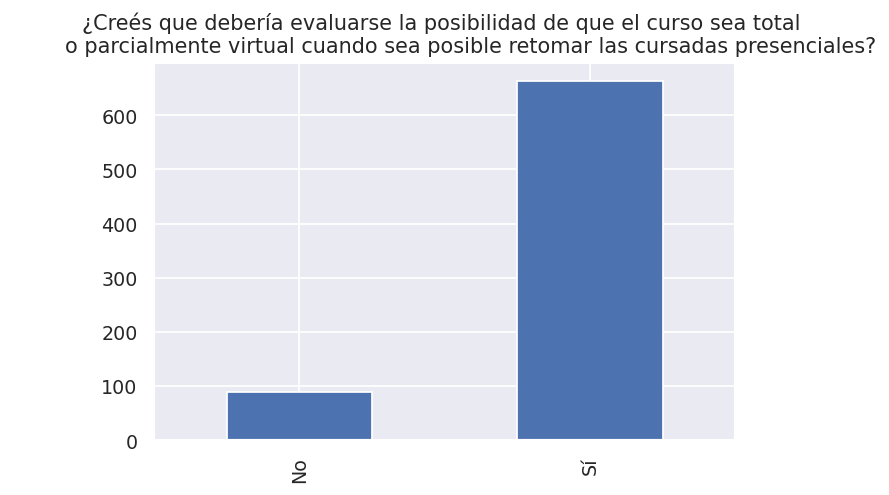

In [34]:
comp['¿Creés que debería evaluarse la posibilidad de que el curso sea total o parcialmente virtual cuando sea posible retomar las cursadas presenciales?'].replace({'Si' : 'Sí'}, inplace=True)

plt.figure(dpi=125)
ax = comp['¿Creés que debería evaluarse la posibilidad de que el curso sea total o parcialmente virtual cuando sea posible retomar las cursadas presenciales?'].value_counts().sort_index().plot(
        kind='bar', 
        title='''¿Creés que debería evaluarse la posibilidad de que el curso sea total 
        o parcialmente virtual cuando sea posible retomar las cursadas presenciales?''')

## ¿Estás conforme con la forma en que el curso evaluó sus contenidos? ¿Te sentiste cómodo/a?

In [35]:
for curso in comp['Elige el curso'].unique():
    display(Markdown(f"## Curso {curso}"))
    com = comp[comp['Elige el curso'] == curso]['¿Estás conforme con la forma en que el curso evaluó sus contenidos? ¿Te sentiste cómodo/a?'].dropna().drop_duplicates()
    if com.empty:
        display(Markdown("_No hay comentarios_"))
    else:
        display(Markdown("\n\n".join(f"> {x}" for x in com.values.tolist())))

## Curso 75.40-95.14-Algoritmos y Programación I - 4 - Essaya

> si

> Muy cómodo

> Si y me senti muy comodo

> Si, si

> Si, estuve cómodo.

> Si

> No sabia programar, me parecio muy dificil. El primer tp me mato. No pude seguir el hilo.

> Me pareció muy bien. 

> Sí a ambas preguntas

> SI

> Si.

> A pesar de ser mi primera vez estudiando algo relacionado a programación, al principió costó pero al final te das cuenta de muchas cosas que antes ni siquiera lo pensabas.

> Si, los examenes y trabajos practicos evaluaban lo aprendido en clase justamente y en caso de equivocarte las correcciones ayudaban a mejorar

> Muy cómodo por como se me evaluó

> SÍ

> Si, 100%.

> En general los parciales fueron representativos de lo que se vio en clase. Ademas, la comodidad de un editor de texto (poder borrar, cambiar, mejorar sin tener que estar tachando todo) me permitió resolver mas tranquilo.

> Si aprendí un montón gracias a las practicas y las clases teóricas de Diego

> por ahi los tp fueron bastante dificiles pero se hicieron amenos al tener ayudantes para consultar y hacer el seguimiento del tp 

> 100% SI, ninguna queja al respecto en ese sentido.

> Realmente si

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 2 - Essaya

> Si

> Mas o menos, especialmente en la última parte, todo muy apretado al dia de la fecha no se si apruebo la cursada.

> si, muy bueno , quizas el tiempo para resolver los parcialitos es poco, ya que no llegas a testear lo que hiciste.Aparte de eso muy bueno todo

> La forma de evaluación fue adecuada tanto en metodología como dificultad.

> si

> Muy buena forma de evaluar, tp interesante, parcialitos que dividian los temas de forma adecuada. Ahora queda ver que onda el coloquio.

> Los métodos de evaluación están bien, te preparan de manera que lleves la materia al día y no te atrases cosa que en esta materia en específico es algo importantísimo.

> Me gusta la idea de los tps, y todos los ejercicios en general, ayudan mucho al desarrollo de la capacidad de poder pararse bien frente a un problema para su resolución.

> si. senti que fue muy rapido pero entiendo que es una materia muy pesada. lo que no estuve de acuerdo fue con que tomen un parcial luego de 4 dias del receso y que se acumule el tp con el ultimo parcial. fue agotante y poco empatico. 

> Sí, el método de evaluación me pareció muy bueno. Los parcialitos ayudaron mucho a llevar la materia al día y la dificultad de los ejercicios obligatorios y TPs me pareció adecuada.

> sí, todas las evaluaciones (tp, ejercicios, parciales) tuvieron su respectiva devolución detallando puntillosamente los errores y dando una idea de cómo corregirlo

> Absolutamente. 

## Curso 75.41-95.15-Algoritmos y Programación II - 4 - Méndez

> Si. muy conforme

> Si

> si

> Si, muy cómodo y todo muy bien organizado 

> Si a ambas

> la plataforma para rendir el parcial no fue la mejor, los trabajos prácticos perfecto

> Estoy conforme, me parecieron claras las condiciones y estuve cómodo con estas

> Si, daban cosas acorde a lo enseñado y te hacen sentir increiblemente comodo

> Si, son increíbles

> Muy conforme. La plataforma de exámenes utilizada está muy bien armada y es mucho más cómoda que el campus virtual. Las consignas eran excelentes: creativas y claras.

> Sí. Siento que lo evaluado estuvo a la altura de lo que se enseñó.

> Muy conforme, se tomo lo que se dio. Muy cómodo desde mi casa.

> toy conforme

> Si, muy seguro.

> Si. Totalmente. Los docentes no te matan con las correcciones y son justos.

> Si y si

> Si, muy cómodo

> SI

> Realmente con su plataforma, hizo que los parciales sean desafiantes porque necesitas entender muy bien el tema

> Si, no hay nada que me haya molestado

> Si, tuvieron una de las mejores plataformas de parciales y finales de toda la FIUBA.

> Si muy conforme, cabe resaltar el tremendo sistema que desarrollaron para tomar las evaluaciones y trabajos.

> Muy cómodo. En todo momento había algún profesor o colaborador dispuesto a ayudar con cualquier duda

> Si y si, fue muy dinámico e interesante

> Estoy conforme. Me sentí muy cómoda.

> Muy comodo

> Estoy conforme con todos los contenidos vistos, excepto arbol*, me costo mucho entender el tema y no senti que se explicó claramente.

> Sí, muy cómodo. Personalmente, de los TDAs y TPs es de dónde más cosas diferentes aprendí, con mucha diferencia. Además, el tema de los kahoot cada semana para repasar los contenidos me pareció un incentivo muy bueno para, por lo menos, estar al día con los conceptos de la materia.

> Si! La evaluación fue difícil pero a mi parecer, correcta.

> Senti que en los parciales dieron poco tiempo para todo lo que pidieron, y eso hace que no este comodo mientras rinda.

> Si, mas alla de que pienso que al momento de volcar mis conocimientos de programacion en un parcial quizas no pueda lograr mi objetivo, los trabajos practicos son perfectos para demostrar todo lo que aprendimos durante la cursada.

> Sí, me sentí cómodo con las evaluaciones, tanto en los trabajos prácticos como en el parcial.

> Muy

> Si, siempre se evaluaron todos en tiempo y forma. 

## Curso 75.12-95.04-95.10-95.13-Análisis Numérico I/Modelación Numérica/Métodos Matemáticos y Numéricos - 4 - Schwarz

> So

> si

> Si

> En mi opinión es más efectiva esta forma de evaluar que el exámen ordinario.

> Sí. Me hubiera gustado que los ejercicios a entregar pudieran haber sido hechos con software (como por ejemplo LaTeX)

> Si, me parece que la eleccion de tener un parcial teorico y un trabajo practico integrador, en el que se aplican tanto conocimientos teoricos como practicos es correcta y adecuada para una modalidad virtual.

> sí

> La metodología parece correcta y me ayudó a entender en profundidad los temas. Uno no puede simplemente estudiar para "safar" sino que es necesario comprometerse con la materia y a la larga los alumnos lo apreciamos.

> No estoy conforme

> Sí. Soy muy partidario del método elegido de evaluación. Requiere que entiendas los temas con profundidad.

> Estoy conforme (y agradezco la paciencia del docente ya que el día del examen parcial tuve algunos problemas de conexión). Las instancias de evaluación fueron incorporando los contenidos a medida que avanzaba el cuatrimestre: los primeros temas se evaluaron en el parcial, los que se dieron posteriormente en el TP integrador y los restantes se evaluarán en el examen integrador.

> si!

> No. La instancia de trabajo integrador era practicamente un final. No nos enseñaron a programar como dijeron pero luego esperaban que podamos hacer cosas para las que no estamos listos. Las clases practicas se limitaron a un video de quince minutos donde decian bueno aca esta el codigo y asi se ve graficado. Para la instancia de TP esperaban que sepamos absolutamente todo, entonces para que hay final. Tampoco existio acompañamiento de nuestro ayudante. Responder dudas en discord no reemplaza una clase.

> Si. Creo que el apunte teorico de la materia fue clave 

> Me senti guiado por lo tanto no me senti perdido en cuanto a que y como estudiar

> Hubo ocaciones en donde si uno no sabia programar, era dificil hacer ell trabaj practico integrados o entender los programas de los metodos utilizados.

> Se ponderó cada instancia acordé a como lo esperaba. La evaluación no apuntó a resultados numericos ni tampoco a la definición de conceptos, sino a explicar con palabras propias lo que uno haría frente a distintas situaciones que se iban planteando y como aplicaría las herramientas que fueron enseñadas en el curso. Super valorable y enriquecedor.

> SI me parecio adecuado el TP integrador e interesante

> Si básicamente ya con la metodología de seguimiento por medio del campus con los TPs

> Estoy conforme. Me sentí bastante cómodo.

> Si. Fue muy util el material brindado para la cursada y facilitó entender los temas dados.

> Muy conforme

> Estoy conforme con la forma de evaluar. Lo único que no exigiría es saber expresiones y fórmulas de memoria, ya que no considero conceptual recordar o no una fórmula durante el examen. En cambio las preguntas sobre los distintos métodos vistos en la materia y la comparación entre ellos me parecieron bien.

> Creo que se exige más de lo que se explica. La diferencia es abismal.

## Curso 75.16-95.49-Lenguajes de Programación - Corsi

> Reiterando lo previamente comentado: me hubiese gustado recibir algún tipo de feedback sobre los trabajos prácticos entregados semanalmente.

## Curso 75.42-Taller de Programación I - 2 - Azcurra

> Respecto a la forma de evaluar las diferentes etapas del trabajo práctico, considero que se manejaron correctamente.

> Lo bueno del curso es la forma en que se evalúa, un TP que es un juego el cual en mi caso disfrute mucho al estar desarrollándolo.

> Si

> La verdad que el contenido en clase estuve conforme con todo lo dictado y me senti muy comodo.

> Si, ambaa cosas

> Me hubiera gustado que se tenga más en cuenta el trabajo de cada uno de los integrantes del grupo. Ya que en mi caso, el trabajo fue bastante disparejo. Y si bien advirtieron que si algún miembro del grupo no trabajaba, que lo informemos, dicha advertencia fue realizada en la segunda semana de clases, en la cual no conocíamos las metodologías de cada uno de los integrantes. En mi opinión hubiera estado bueno que se le preste más atención al repositorio, y en caso de que se observe que un compañero está trabajando muy poco, que los profesores intervengan. Por el resto me sentí cómodo, y me pareció muy buena la idea de programar un juego.

> si

> Si. So.

## Curso 75.01-95.01-Computación - 3 y 10 - Perez Berro

> Si, estoy conforme.

> Me pareció justa la forma y el contenido que se evalúo en cada módulo.

> Si

> si

> Si, hubiese estado bueno no tener que escribir todo a mano ya que para ser prolija y que se entienda esto me tomo mucho tiempo

> Los trabajos prácticos fueron de gran ayuda a la hora de llevar la materia e ir viendo que temas debía reforzar a la hora de rendir las evaluaciones las cuales, en mi opinión, abarcaron los temas más importantes vistos durante la cursada.

> Sí, la dificultad y la modalidad me pareció acorde a lo visto en clase

> Sí

> Si 

> En cuanto a los trabajos prácticos me sentí muy cómodo. Sin embargo, creo los parciales sean a mano me parece que no es la forma optima de evaluar como realizar un programa ya que hay errores que surgen cuando se escribe un código que no hay instancia para poder verlos, ergo no funcionaria el programa creado para resolver el examen.

> Si, muy comodo

> Me parece que se evaluaron correctamente los contenidos.

> Si, acorde a lo visto y practicado en clases teorico-practicas.

> Si ya que la manera de desglosar los problemas en partes lleva a que puedas profundizar mas en cada aspecto del problema

> Sí me sentí comodo, ya que se evaluó lo que se vio en la práctica. Con ver los videos teoricos no alcanzaba para entender los temas, habia q ponerse a hacer ejericicos y aprender con prueba y error. Cosa q me parecio buena.

> Si, cómo se evaluó me pareció muy justo. El tiempo me pareció adecuado y los problemas a resolver también. Los tps también me parecieron útiles para llevar al día la materia, más allá de que también sirvieran como material evaluativo.

> Si, aunque no termine de comprender porque en la evaluacion se debia entregar el programa hecho a mano ya que no le veo utilidad.

> No 

> si y si

> Me pareceria mejor que los parciales  y finales sean en python en vez de entregados a mano. Se que otros cursos haces eso y me parece mejor porque es mas similar a la forma en la qur trabaja un orogrammador en la vida real. De cualquier manera, no es muy grave, solo un incomodidad que me parece innecesaria. 

> Estoy conforme con la forma en la que se evaluó el contenido, no me senti tan comodo con el tp, mas que nada por ser en grupo. Es dificil hacer en grupo un tp virtual, por temas de horarios, conexion y demas.

> Si, el unico problema, es que me parece un poco redundante tener que hacer el examen a mano ya que se programa en la computadora.

> si estoy conforme

> Sí, estoy conforme. Sí, me sentí cómodo

> Muy conforme con como se evaluaron los contenidos del curso.
Si a cómodo se refieren a como me sentí a la hora de rendir, tenia miedo de que se me corte el Internet o la luz, pero fuera de eso, normal, con los nervios de tener que rendir como siempre.

> Si, si.

## Curso 75.03-95.57-Organización del Computador - 1 - Benitez

> Para mi gusto faltaron cosas importantes como ver como utilizar mascaras, manejo de memoria ram 

> me parece que el nivel del módulo assembler es mucho mayor a lo que se explica en clase. Teniendo en cuenta que no hay tanto material de práctica y explicación sobre este lenguaje. El trabajo práctico y último módulo de assembler no va acorde al nivel con el que explicaron las clases prácticas y teóricas. Esto afecta mucho más a los que vienen de programar en Python y no en C.

> Si, la forma de los cuestionarios de parcial es un poco engorrosa ya que te los abren por turnos, es decir, de 7 a 8 resolves este ejercicio, de 8 a 9 tal otro, y así, negándote la posibilidad de arrancar por otro ejercicio o en un recuperatorio arrancar apenas empieza el recuperatorio en vez de tener que esperar a que habiliten tu ejercicio.

> Completamente

> Los exámenes fueron acorde a las explicaciones y practicas, el parcial me pareció muy largo, en cierto momento uno estaba tan quemado que costaba pensar, el tiempo que daban para realizarlo era acorde, pero ya de por si el examen estaba planteado para ser extenso.

> No por el tiempo tarda bastante en subir los archivos

> si

> Si, muy conforme.

## Curso 75.47-Taller de Desarrollo de Proyectos II - Fontela

> Si, muy cómodo.

> si, estuve comoda, buen curso y buen uso de la virtualidad. Al principio costó entender algunas de  las cosas que se esperabana en la materia, pero es un lindo recorrido y linda materia para cerrar la carrera.

> Totalmente

> Si

> Sí, siempre muy cómodo en todo momento. Los docentes tienen muy buenos aportes para hacer en todo lo que se hace, aprendí mucho en base al feedback que todos nos daban.

> si

> Si. Se aplican realmente varios conceptos de materias anteriores con un enfoque distinto. Cada docente da su punto de vista desde su experiencia, eso es muy bueno.

## Curso 75.15-75.28-95.05-Base de Datos - 1 - Beiro

> En lo que fue la cursada, si. En lo que será el final, masomenos. Es sin auriculares y con micrófono abierto, y siendo que comparto el departamento y no es muy espacioso, tengo que ver si doy el examen desde la cama o le pido a mi pareja que vaya ella a la pieza durante la duración del mismo. Ninguna me agrada demasiado.

> Los parcialitos fueron muy buenos para practicar antes del parcial, y el parcial fue adecuado

> Si

> Sí, muy conforme.

> Si, el contenido me resultó muy interesante, estuvo muy bien explicado. De las mejores catedras que tuve hasta hoy en la carrera.

> Tal vez le falta algun motivador (tp? tp grupal?) para seguir con la materia despues del parcial.

> Totalmente comodo, teniendo un formato claro de examen.

## Curso 75.17-75.56-Implantación de Sistemas / Org de la Implantación y el Mantenimiento - Guarna

> Conforme

> Me gustó mucho cómo manejaron las clases. Usaron bien las herramientas informáticas disponibles

> si, son un poco largos los ejercicios pero viendo las practicas se entiende.

> Sí, quizás hubiera estado bueno un poco más de feedback en las correcciones, pero en gral diría que sí.

## Curso 75.01-95.01-Computación - 2 - Burin

> Dieron phython en las 2 últimas clases, podrían haber condensado la primera parte de la materia y dar más phython.

> Si

> No, no me sentí comodo

> lo suficiente

> Si, los profes de práctica son unos genios. Lo entendí todo gracias a ellos. 

> Me parece pésimo que la última clase del cuatrimestre nos informan que una de las 5 fechas de final en realidad va a ser utilizada para evaluar la cursada y que no agreguen una fecha (cuando dan perfectamente las semanas). Me parece inútil absolutamente todo lo que enseñaron en la catedra salvó las últimas dos (como mucho 3) clases. Es la única catedra que no pone como prioridad python cuando es una herramienta que nos puede ayudar mucho a futuro. Una pena que haya perdido tanto tiempo a sumar y restar en binario y otras cosas que jamás van a tener una utilidad. Me gustaría que revisaran más con sus colegas para tener un plan de estudio más interesante y actualizado.

> Me pareció pésimo que el tp para regularizar la materia sea sobre los temas que dieron las ultimas 3 clases. Siento que todo el trabajo realizado durante el cuatri no conto porque total lo ultimo pareciera ser lo mas relevante.

> si.

> Aún no rendí ninguna evaluación.

> No

> no, la verdad fue muy exigente comparando su desempeño en la forma de enseñar. Un final escrito y al siguiente día un oral. Donde se tuvo que estudiar el tp solo y arreglarsela como se pueda

> estoy conforme, lo que agregaría seria mas tiempo en los parcialitos ya que capaz cuando saca la foto del escrito y lo mandas por mail tardas y te pasas del horario de entrega 

## Curso 75.41-95.15-Algoritmos y Programación II - 1 - Calvo

> si

> no rendi ningun examen porque no llegue a estudiar y no me sentia seguro. Al final el tiempo no me fue suficiente y decidi dejar la materia para poder hacerla de manera correcta dado que me interesa aprender bien los temas.

> Si

> Creo que se dejan muchas cosas sin evaluar previo al final, nunca me sentí como con eso.

> Estoy conforme, aunque me hubiese sentido más cómodo con parciales más extensos y con mayores desarrollos.

## Curso 75.12-95.04-95.13-Análisis Numérico/Métodos Matemáticos y Numéricos - 6 - Rodríguez

> Si. Se tomó un único parcial que fue muy similar a los ejercicios de las guías y las prácticas que veníamos viendo, con practicar un poco alcanzaba. Lo que si no recibimos las notas ni correcciones particulares, lo cual fue un problema para los reprobados entender realmente los errores.
Además hubo dos TPs. El primero fue muy largo y complejo, aunque el segundo fue más corto y entretenido. Mientras los hacíamos se podía hacer un buen seguimiento con los profesores y consultar. De todas formas, no recibimos correcciones de ninguno por lo que no sabemos si están bien o no.
Por último, cada semana tomaban el presente con una tarea que había que subir. Esto no me pareció mal porque ayudó a mantener el ritmo, pero puedo entender que sea molesto para algunos.

> En cuanto al formato de examen fue uno de los más cómodos debido a que no se exigió el encendido de cámara o micrófono durante 3 horas. Sin embargo, la forma de evaluar en este curso me pareció extremadamente excesiva (llegando a desaprobar el examen por tener un número mal redondeado). Los TPs fueron agotadores, los tiraron ahí a implementar cosas que nunca vimos en un programa que tampoco usé en mi vida. Literalmente siento que estudié solo, acompañado por unos deficientes audios en el campus. Las tareas de presentismo son semanales (como si no bastara el difícil parcial y los TPs horrendos) y estas tareas eran de parcial o final... imagínate cómo te sentís la primer semana con esta cátedra estudiando solo y obligándote a resolver un ejercicio de parcial por semana para que no te desregularicen la matera. ESTA CÁTEDRA ES TOTALMENTE NO RECOMENDABLE. PD: Exigen hacer las tareas semanales, pero no se dignan en corregirlas. Después te lo toman en el parcial. Literalmente esta cátedra te hace ponerle más TIEMPO del realmente necesario en otras cátedras.

> Totalmente

> Si pero deberian haber dado mas tiempo para el examen desde el principio en vez de agregar después

> El problema de la modalidad virtual es que para poder mantener la excelencia académica de la facultad, deben triplicar la exigencia. Esto es claro para estudiantes y docentes. En particular sospecho que los trabajos prácticos y las evaluaciones hubieran sido justas para la modalidad presencial, pero debido a que la cátedra no supo manejar correctamente la enseñanza teórica de los contenidos, ni tampoco la incorporación práctica de los mismos, fuimos evaluados con poca información de si lo que hacíamos era correcto. Mucho contenido estuvo explicado a medias y las dudas no siempre eran respondidas de forma óptima. Esa situación prolongada durante meses hizo que se dificultara el manejo de conceptos y conllevara a una evaluación de contenidos injusta. Fue una situación desbalanceada.

> Muy mal evaluado. Exigen entregas pero no son capaces de corregir los TPs a dos semanas de terminar el cuatrimestre. Para colmo te exigen reentregar en una fecha X a fines de marzo, cuando uno está con finales y temas laborales. El parcial fue corregido de muy mala forma, con criterios no acordes al nivel de enseñanza.

> Si

> Si! Me costo un poco pero porque personalmente no tenia mucho tiempo para estudiar. Pero me parecio que lo hicieron muy bien

## Curso 75.01-95.01-Computación - 11 - Calvo

> Si

> Sí, aunque tanto el parcial como el TP2 me resultaron muy complejos con respecto a lo que venía viendo en las prácticas. Principalmente este último, y tuve que recurrir bastante a buscar en internet formas alternativas de resolución, ya que con las que había aprendido en la materia no se me ocurría cómo hacer.

> Si 

> si

> Sí, desarrollé mucho mi forma de pensamiento sistemática

> Es mas conveniente realizar desde una computadora propia y en nuestras casas los TPs de este tipo de materias. 

> Masomenos y no 

> No

> Si, me sentí bastante cómodo, no se exigía imposibles ni tampoco se regalo la cursada.

> SI

> si completamente 

> Si, estoy conforme 

> Si! Algunos Tp’s abarcaban temas que no habiamos visto y hubo que googlear mucho para poder hacerlo

## Curso 75.04-95.12-Algoritmos y Programación II (Electrónica) - Calvo

> Para nada. Nos tomaron dos TPs para los cuales tuvimos 3 semanas de tiempo(cada uno), donde estuvimos las 3 semanas codeando sin poder dedicarle tiempo de estudio al parcial y cuando obviamente la gran mayoría desaprobamos el parcial(2 personas aprobaron en primera instancia) porque la entrega del segundo TP fue una semana anterior al examen, la respuesta de los profesores fue "hubiesen estudiado mas".
Nos evaluaron con multiple-choice de cosas muy especificas, preguntas super ambiguas que prestaban a la confusión que encima, los profesores admitieron que fueron ambiguas a propósito, varios de ellos con errores en distintas instancias, un ejercicio de programación muy difícil de resolver en una hora y media, y un ejercicio para realizar en la casa y entregar que nos robo tiempo de otras materias.


> No, el examen parcial a mi parecer no debería poseer el ejercicio a entregar en los siguientes días.

> Los aspectos evaluados son correctos, las formas de hacerlo no (parcialmente)

> No. Fue terrible, nos dieron dos trabajos practicos pesados que NADA tenian que ver con lo que se evaluaba en el parcial. Despues el parcial consistia de dos cuestionarios, un ejercicio de codigo y un ej domiciliario. Los cuestionarios eran un desastre, solo 5 preguntas (que no dice nada de si el alumno sabe o no de la materia, son muy pocas), muy ambiguas, diseñadas para que el alumno 'pise el palito' con detalles de sintaxis que hacian que uno mal interprete la consigna. Despues, cuando ibas a revisión, los profesores hacian oidos sordos a lo que planteabamos y nos trataban (perdón la expresión) de tarados e incompetentes. El porcentaje de personas que metimos la materia fue BAJISIMO a causa de estos cuestionarios. El ejercicio para diseñar código estaba bueno, era claro, tenia sentido y se evaluaban cosas dadas en clase. El ejercicio domiciliario tambien, todo ok.
Menciono que hubo gente que se saco 10, 4,10 Y 10 en  estos ejercicios y no le aprobaron la materia . Ademas, en todas las instancias de examen cambiaron los criterios de corrección.

> Sí.

> No, fueron muy frustrantes las instancias de evaluacion y poco utiles para los alumnos

> Si

> No, en la practica se dieron muy mal los temas, todo desordenado y se perdió mucho tiempo. En los exámenes tomaron cosas que nunca explicaron pero según ellos si. Creo que los resultados de todos los parciales demuestran lo que digo.

> Las preguntas choice no estaban pensadas para demostrar que tanto sabiamos solamente sino para que nos confundamos por errores de distracción o de falta de compresión, cuestiones que con los nervios del momento facilmente pasa.

> No, las entregas de los trabajos prácticos estuvieron muy pegadas al parcial lo que hizo que la mayoria desaprobemos. En los recuperatorios era confuso el material que teniamos a disposicion.

> Para nada. En mi experiencia (30 materias ya) fue la materia que peor sentí que evaluó a sus alumnos. Hubieron muchísimas irregularidades en la formulación de los ejercicios, la corrección y la revisión de los exámenes. También los criterios de corrección cambiaban de un examen para otro, lo que ocasionaba conflictos y, mas importante, frustración en los alumnos.

> Mas o menos, muy poco tiempo para los examenes, poco tiempo para pensar y razonar una respuesta.

> No estoy conforme con la evaluación de los contenidos de la cursada. Los criterios de corrección no se sostuvieron en las diferentes instancias de evaluación (en las tres oportunidades de parcial). Ante cualquier observación de un posible error cometido por los docentes de la práctica nunca se obtuvo una respuesta que notara interés por verificar el problema, simplemente se negaba el error y se sostenía que ellos estaban en lo cierto. No se generaba un ambiente que permitiera hacer muchas preguntas ya que las respuestas resultaban altaneras y despreciando las observaciones del alumno. Se hicieron comentarios del tipo "si querías rendir cómo hubieras aprobado en la primera fecha" cuando no hubo tiempo suficiente para preparar el parcial para esa fecha dado la demanda temporal de los trabajos prácticos y, no menos importante, que no es la única materia que cursamos en el cuatrimestre (aunque sí la que mayor tiempo de estudio, diría el 90% en mi caso particular y en el de varios compañeros con los que estudié a la par, consumió). Además, el tipo de ejercicios que se presentaron en los exámenes no solo podían ser ambiguos (cosa que los profesores admitieron pero sin embargo no aceptaron las justificaciones que los alumnos presentaron para las respuestas que dieron en el examen) sino que no permiten demostrar fielmente los conocimientos del estudiante. 

## Curso 75.50-Introducción a los Sistemas Inteligentes - Ochoa

> Me gustó mucho cómo manejaron las clases. Usaron bien las herramientas informáticas disponibles

## Curso 75.33-75.43-95.60-Introducción a los Sistemas Distribuidos  - Carísimo

> Me sentí horrible. El docente de la práctica(Jefe de trabajos prácticos) lo único que hizo fue intentar perjudicar al alumno con la justificación de que los alumnos pudieran copiar. En la última instancia de recuperación cambio todos los criterios de evaluación: nos dió 1 hora menos de examen y la exigencia en cuánto a ejercicios era mayor que en las instancias anteriores

> Si

> No. Las evaluaciones dejaron mucho que dejar. 
El JTP adamptó ejercicios para facilitar su corrección contantemente (agregando dificultad a les alumnes) y fue excesivamente estricto con fechasde entregas. Sin embargo las correcciones no llegaron hasta el día que era estrictamente necesarias (recuperatorio en caso del parcial o primer fecha de final en caso de todos los trabajos prácticos). 
Las correcciones del parcial se limitaban a decir si estaba bien o mal, sin ningún feedback extra. Es decir, al día de hoy desconoco el motivo de mi nota.
Las correcciones del tp fueron increiblemente duras si se comparan trabajos entregados hace un ano (con otro JTP). 

> Sí, aunque para los exámenes no alcanzaba el tiempo, eran demasiado largos.

> Creo que el parcial tuvo algunas dificultades extra que no ayudaron. 

> Si, aunque no me pareció correcto que el criterio de aprobación del parcial cambiara conforme se avanzaba en las instancias de recuperatorio (era cada vez más excluyente)

> Los parcialitos, si bien me ayudaron a leer el libro y mantenerme al día, provocan bastante estrés, ya que a veces más de una opción era correcta y no había forma de evacuar dudas de enunciado, además si desaprobadas más de dos quedabas afuera, y en principio no había ninguna chance de recuperar. Por lo que rendirlos me represento un excesivo estrés. Debería haber alguna forma de recuperarlos si es el caso que te va mal en más de dos, al menos para tener ese colchón de saber que no recursas si das tres mal.
Por otro lado el primer examen me pareció muy poco el tiempo dado para resolver, el recuperatorio me pareció más acorde. La dificultad me pareció correcta, aunque la corrección era bastante estricta (por ejemplo tener un R en un múltiple choice de 4 puntos te anulaba el punto).

> Siento que la redacción de las evaluaciones y TPs podría haber sido más detallada.

> No. Si bien en el primer parcial los temas fueron los esperados (al menos los que se habian explicado en clase) , las correcciones fueron bastante duras, basicamente por errores de cuentas te ponian mal todo un ejercicio. En los recuperatorios se quiso *innovar* o nose bien como decirle y se tomaron ejercicios que ni siquiera fueron vistos en clase ni que fueron tomados alguna vez (ya que con mis compañeros practicamos con parciales viejos y nada que ver). Esto le costó a muchos desaprobar el recuperatorio. En la ultima instancia se volvio a hacer lo mismo.

> No del todo, el parcial estuvo a cargo de la práctica y fue poco claro en cuanto a correcciones y criterios de corrección (las correcciones fueron Bien/Mal sin señalar donde estaban los errores)

> No, si bien yo no tuve problemas y aprobe en la primera oportunidad, se notaba que había mucha diferncia netre temas de un mismo examen o entre el examen principl y el primer recuperatorio. Los profesores mandaron un meme burlandose de los alumnos que estabn riendoiendo el recuperatorio justo antes de Navidad porque sabian que habái sido considerablemente mas dificil. Si bien despues tuvieron eso en cuenta a la hora de corregir, fue una situacion incómoda porque muchos compañeros estaban en una situacion de incertidumbre.

> Me sentí incómodo en el recuperatorio, cuando después de un año tan claro, estaba rindiendo la última chance y el examen fue mucho mas dificil de lo que esperaba. El profesor se burlo de eso ni bien terminó el examen.

## Curso 75.26-95.19-Simulación - Caiafa

> Me pareció muy adecuada la forma en que se evaluó el contenido en funcion del contenido que se brindó

> Si

> Hubiera preferido, en lugar de multiple choice, poder desarrollar, ya que a veces por un error de cálculo se llega a un respuesta distinta en el MC y al no poder verse el desarrollo eso termina sin ser apreciado

> Estoy conforme y me sentí comodo

> Si. Me parece que el parcial se toma lo que se da, lo cual me parece que esta perfecto. En cuanto a los TPs tiene su complejidad pero estan buenos y ayudan a entender mejor lso contenidos practicos de la materia.

> Sí

> Super conforme. El curso está recontra bien planteado y las reglas están definidas desde el principio y prácticamente no hay lugar para los grises. Además, la buena voluntad de los docentes es absoluta

> Si 


## Curso 75.61-Taller de Programación III - Alvarez Hamelin

> Sí, siempre estuvieron claros los términos en que se nos evaluaría y los contenidos que debíamos presentar. Toda duda fue resuelta eficazmente

> Si, me gustó que en todas las clases el profesor nos fue guiando con las dudas respecto al proyecto.

## Curso 75.08-Sistemas Operativos - 1 - Clua

> Si, creo que los contenidos evaluados estaban en línea con lo mostrado en clase y eran de la dificultad justa.

> Sí. El principal problema siempre es propio (por la conexión a Internet).

> Se adaptaron bien al tomar evaluaciones de manera virtual

> Si

## Curso 75.40-95.14-Algoritmos y Programación I - 3 - Méndez

> si

> Si, bastante

> Muy conforme. Las condiciones son claras desde el principio.

> Muy conforme, el TP2 fue dificil pero era necesario para poder terminar de repasar y entender conceptos que quizas uno no le da mucha importancia

> si, senti que evaluaron de una forma justa y siempre me senti comodo

> Sí, los docentes fueron comprensivos con respecto a la situación en la que se encuentran los estudiantes, estableciendo un cronograma adecuado a esto. Además, todos los temas se integraron bien.

> Los TPs me parecieron una buena manera. Los parciales están bien pero los anunciados son a veces confusos y dejan lugar a libre interpretación que puede poner en riesgo la aprobación del mismo.

> Si

> Si, en especial para la toma del parcial/final

> no. pregunte algunas cosas que no me quedaron claras en la parte teorica y me respondieron abruptamente de mala manera y nunca me aclararon las  dudas que tenia de la parte teorica y me tuve que aferrar a buscar las respuestas por mi mismo

> Sí. Entiendo que se tomaron suficientes medidas para evitar que se haga trampa, pero ninguna de ellas repercutió negativamente en los demás.

> Si.

> Si fue genial! 

> Si, muy conforme con la evaluación parcial y con los trabajos prácticos

> Demasiado cómodo.

## Curso 75.48-Calidad en el Desarrollo del Sistemas - Pantaleo

> No, no estoy conforme. La cuestión es que las clases son muy malas, entre los 3 docentes no hacen uno solo bueno. La única persona que le pone onda es Jimena, Pantaleo da unas clases soporíferas, infumables que están plenamente desacopladas de la práctica y que consisten en sus anécdotas de vida, y Laura, la JTP, solo apareció para una clase (bastante mala por cierto) por lo que de ella no sé qué decir más que notar que me parece cualquiera que solo apareciera para una sola clase. Entonces toda la responsabilidad recae sobre Jimena, que la pobre, trata de ponerle onda pero tiene muchas cosas para mejorar a la hora de dar clases, le cuesta mucho bajar a tierra los conceptos abstractos, le cuesta mucho dar ejemplos concretos (quizás debería tomarse algún curso de formación docente porque se nota que le pone onda y es una lástima). Sentí que los únicos momentos de toda la cursada en donde se hizo una bajada a tierra decente de las cosas que se dan en la materia fue durante las devoluciones de los parciales, que todo el mundo desaprueba btw y eso para mí explica el por qué que mucha gente termina aprobando en la última chance. 
El problema está en que no hay una bibliografía, unos apuntes o algo que sirvan para apuntalar esas clases que hacen agua por todos lados, porque lo que te evalúan es lo que "dan" en clase. Entonces si uno no llegó a entender bien algo de las clases, o se perdió una clase, o lo que sea, estás bastante perdido tratando de aprender lo que no pudiste aprender a partir de otros recursos que hay por internet.
Por otro lado, las devoluciones individuales del TP y de los parciales, son malísimas, muy muy cortas y poco descriptivas, no te sirven para ver bien qué tenés que corregir.


> Mas o menos. Me parece que la exigencia del curso no condice con lo que se da en clase. Los examenes y los trabajos practicos tienen muchas ambiguedades y las correcciones que te hacen sobre ambos no son claras, de hecho a veces incluso te confunden mas. Creo que si bien la materia se presta a tener una mayor diversidad de opiniones al no ser una ciencia dura, no termina de quedar claro que es lo que se pretende. Haria mucho foco a la hora de corregir para que los alumnos entendamos mejor que es lo que se busca/pretende.

> No, nos tomaron cosas que solo fueron dadas en las clases pero no se encontraba en ningún otro lado del material que propusieron. Encima nos culpan a los alumnos por no prestar atención en clase como si fuera tan simple. Encima las clases NO eran grabadas

> No. Las correcciones son muy subjetivas y se basan en "las definiciones de la cátedra" que no solo no concuerdan con las de la bibliografía sino que tampoco son consistentes de una clase a otra. Respuestas puestos bien en un parcial, fueron corregidos como mal en el siguiente, etc.

> Parcial extremadamente dificil para la calidad de las clases. Se toman temas que solamente se mencionaron al pasar en clase, y que esperaban que apuntes. No se encuentran luego en la bibliografia de la materia.

> Como ya se viene respondiendo hace años, los criterios de corrección son completamente ambiguos y los temas evaluados no coinciden con los dados en clase. Los índices de aprobación de los examenes es escandaloso teniendo en cuenta que es una de las ultimas materias de la carrera, cursandola únicamente los alumnos que pasaron todos los filtros de la carrera y, en la mayoria de los casos, con muchos años de experiencia en la industria. 

> No. En las clases se explican los temas muy por arriba, de manera simple, el material no termina de explicarlo mucho mejor, y luego las evaluaciones resultan hiper rigurosas en donde el nivel de dificultad no encaja con el nivel en que se dictaron los temas. En las tres instancias de evaluación terminaban desaprobando más de la mitad de los alumnos, muchas veces por cuestiones que simplemente nunca se habían aclarado en clase. Los temas no son difíciles, simplemente se evalúa de una manera muy injusta y hasta carente de sentido

> No. Los docentes no se preocupan por el alumno. 

> De ninguna manera. Los criterios de corrección de la práctica son, cuanto menos, cuestionables. No solamente no están definidos, sino que tampoco son consistentes a lo largo de las distintas instancias de evaluación. Esto sin mencionar el hecho de que se espera del alumno un abordaje muchísimo más profundo que el que ofrece el material a disposición. ¿La respuesta? Buscalo en el libro. Para recibir este tipo de respuestas, directamente rindo la materia libre

> No. Se tomaron cosas en los examenes que no se dieron, ni si quiera se encuentra en la biblografía provista por la cátedra, su justificacion era "estudien de las clases" que ni siquiera eran grabadas, y tampoco agregaban contenido. Era muy random la forma de correción, un rate de aprobación de ~15% en los primeros dos exámenes para una materia de casi fin de carrera...

> Me parece que si bien las clases son buenas, el nivel de correccion es muy exigente a comparacion, hay cierta inconsistencia

## Curso 75.07-95.02-Algoritmos y Programación III - 2 - Méndez

> Sí, aunque no haya aprobado

> Perfectamente. Los trabajos practicos periodicos e incrementales ayudan mucho a llegar perparado al examen.

> Sí

> Perfecto, si bien fue un cuatrimestre piloto, estoy seguro que van a continuar porque fue muy interesante y dinámico.

> Si, tanto en los ejercicios como en los parciales

> Si, 3 horas por clase sigue siendo muy poco para materias como algoritmos y programacion pero eso no es un tema de la catedra sino del plan de la carrera.

> Estoy conforme, y cuando no siempre había un espacio para el dialogo donde uno se siente escuchado.

> Si, estoy conforme en como se evaluó los contenidos y me senti comoda.

> Si, muy cómoda.

> Si

## Curso 75.01-95.01-Computación - 4 - Servetto

> En cuanto a los métodos de evaluación creo que fueron los indicados, se fue complicando a medida que avanzábamos en la cursada. Personalmente me sentí muy cómodo.

> mas o menos

> si, fue muy bueno el método de evaluación

> Si

> Sí a ambos. 

> Muy conforme

> si, estuvo bien

> Sí

## Curso 75.03-95.57-Organización del Computador - 2 - Moreno

> Si. Los trabajos prácticos me sirvieron un montón!

> Si

> Los labs estuvieron buenos, quizas se hizo pesado que hayan sido 3 labs y un tp, pero prefiero eso a un parcial. Se tardo mucho en tener nuestras notas de las diferentes instancias de evaluacion.

> Hubiera estado bueno que las correcciones sean más rápidas, todavía faltan notas de un trabajo de antes del receso

> Si, me gusto la forma de evaluación.

> En comparación con el curso de Benitez, este curso es una masa. Si vamos a lo particular, son medio desorganizados. No quedaban claras las fechas del calendario. Pero creo que la cursé muy tranqui y bien. Había mucho material.

> Si, me hubiese gustado un poco más de práctica respecto al último TP pero la forma en la cual se evaluó fue muy buena.

> si

## Curso 75.40-95.14-Algoritmos y Programación I - 5 - Costa

> si

> Si

> Muy conforme, sobre todo con las instancias de consultas. En una clase presencial debería de esperar hasta la siguiente clase para plantear mi duda, de forma virtual podía hacerlo en el momento que surgiera la misma.

> Sí, estoy conforme y me sentí cómodo

> No. 

> Sí, me sentí conforme con la evaluación de los contenidos.

> Absolutamente

## Curso 75.10-95.21-Técnicas de Diseño/Métodos y Modelos de la Ing. del Software II - 2 - Paez

> si

> Si

> Si, pero no hay muchas instancias de recuperación y volver a demostrar que los contenidos se aprendieron correctamente.

> Fue correcta, pero llevo mucho tiempo y esfuerzo

> Sí

> Si, aunque se me hizo muy pesada en horas demandantes

> Los ejercicios y trabajos practicos son adecuados para evaluar los contenidos, pero deberían ser mas claros en los criterios de evaluación de los mismos previo a la realización.

> Si, creo que se evaluaron correctamente

> Sí, la metodología de evaluación simulando proyectos es apropiada. Y los ejercicios individuales fueron muy útiles para retomar conceptos un poco olvidados de otras materias y sumar arriba los correspondientes a esta.

## Curso 75.10-Técnicas de Diseño - 1 - Pantaleo

> Para nada, la exigencia del curso es totalmente desmedida a lo largo del cuatrimestre. En el transcurso de la materia es razonable, pero lamentablemente el último mes exige dedicarle en promedio 15 horas semanales (datos de Paez, en mi opinión son más) para entregar el TP final.

> si

## Curso 75.18-75.44-95.24-Proyectos Informáticos/Adm. y Control de Proyectos Informáticos I - Fontela

> Si, super cómodo! Me gusto mucho dar la clase de alumno

> Totalmente conforme y cómodo

> Si

> SI.

> Se hizo un poco larga la evaluación mediante parcialitos, si mal no recuerdo fueron 8 y hubo que resolverlos hasta en el último día de clases que parecía una formalidad. Ese tiempo hubiese sido bueno dedicarlo a otra materia que estaba sin cerrar sus notas.

> si

> Si, muy comodo

> Sí

> Me gusto la modalidad de parcialitos y clase de alumnos

## Curso 75.46-Administración y Control de Proyectos Informáticos II - Álvaro

> Si

> Absolutamente

> Sí, ningún problema. 

> Sí, demasiado cómodo quizás. Probablemente la materia más fácil que cursé en la carrera.

> Estoy muy conforme en cómo el grupo de docentes evaluó los contenidos

> Si, me parece que las instancias de evaluacion fueron razonables

## Curso 75.12-95.10-95.13-Análisis Numérico/Modelación Numérica/Métodos Matemáticos y Numéricos  - 1 - Menéndez

> Si, muy. Se tomaron cosas que fueron explicadas perfectamente.

> Si, la forma de evaluación mediante trabajos prácticos me pareció correcta

> A pesar de haberme resultado muy difícil los temas vistos, el acompañamiento fue excelente y me permitió llevar adelante la cursada hasta el final.

> No estoy disconforme pero sí creo que la cursada teórica fue bastante "pesada" del modo virtual.

> si

> Respuesta para Análisis Numérico II.

Creo que la evaluación de los contenidos, realizada con la instancia práctica del curso, se dio de manera muy fluida y amena. Me pareció una buena estrategia la solicitud de algunos trabajos de la Guía de Prácticos, creo que sirven para ir evaluando la compresión teórica del contenido y simplifican las instancias de evaluación.

## Curso 75.01-95.01-Computación - 5 - Arriazu

> los parcialitos fueron clave para ir al dia con la materia

> Si

> Sí, la forma en que se evaluó fue buena porque te obligaba a estar al día con los contenidos sin tomar exámenes demasiado exigentes.

> Me siento muy conforme con la forma de evaluar los contenidos. Al dividirse la evaluación en parcialitos, uno podía profundizar de lleno en el tema a rendir afianzando mucho mejor los conceptos.

> Si, me pareció excelente la forma de evaluación de los contenidos

> Si el método desarrollado a lo largo del curso para corroborar que se han aprendido los contenidos me pareció muy dinámico y útil para uno mismo ir sabiendo si va entendiendo o no.

> si

> Sí, los parcialitos, cortos, pero seguidos, ayudan a que uno esté al día.

## Curso 75.06-95.58-Organización de Datos - 2 - Collinet

> El parcial se evaluó usando Google Forms, bastante cómodo y ordenado el examen.

> Si

> Sí, hay orales para presentar los trabajos y te dan la chance de promocionar con otro oral. El parcial es escrito.

> Si. No pidieron tonterías, cómo si hacían otras materias (ejemplo rendir con 2 cámaras).

> Si. Creo que por momentos al ser el primer cuatri de cursada había muchas dudas de cómo se iba a evaluar. 

## Curso 75.07-95.02-Algoritmos y Programación III - 1 - Suarez

> Si

> Sí

> si

> Conforme, me senti comodo

## Curso 75.24-75.31-95.07-Teoría de la Programación/Teoría del Lenguaje/Teoria de Leng. de Prog. - Ferrigno

> Si, aprendí los temas con mucho gusto.

> Totalmente

> Sí

## Curso 75.42-95.08-Taller de Programación I - 1 -Veiga

> Si, perfectamente ejecutado.

> Durante la cursada, en los TPs, se evalúa exactamente lo que dictan en clase. Quizás en el final se agregan algunas preguntas que en algún momento se mencionaron pero no se hizo hincapié a lo largo de la cursada.

> No, es demencial el trabajo grupal que dan para lo que brinda la cátedra. Muy exagerado.

> Si, pero para mí el problema son los finales, ya que luego de haber aprobado la cursada y ya habiendo aprobado los temas que se dán, igual te hacen rendir un final en el que tenes que acordarte casi detalladamente de todo lo que se dió en la cursada, por más que ya hayas aprobado los temas en su momento con los TPs.

> No, considero que se pide muchísimo como TP final con muy poco tiempo, además luego de aprobar dicho TP se evalua un coloquio donde varios puntos importantes consiten en programar en papel pedazos de código totalmente de memoria y sin razonar (levantar un servidor o cliente o dibujar formas en c++)

## Curso 75.29-95.06-Teoría de Algoritmos I - Podberezski

> Sí

> Si

> Sí, bastante cómodo y siempre predispuesto el jefe de cátedra.

> Si. Realmente se buscó que salgamos aprendiendo los temas.

> Si, estoy conforme y me senti comodo.

## Curso 75.74-Sistemas Distribuidos I - Roca

> Sí

> Si

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 2 - Tarela

> No, los primeros dos parciales me parecieron bastante injustos. Los ejercicios se daban de forma secuencial, no se podía volver para atrás. Y las preguntas teóricas no tenían peso para aprobar. No eran ejercicios difíciles pero la modalidad no me pareció adecuada. El segundo recuperatorio fue como un parcial común.
Los Tps me parecieron bien.

> Si

## Curso 75.12-95.04-95.13-Análisis Numérico I/Métodos Matemáticos y Numéricos - 5 - Sassano

> Si

## Curso 75.71-75.72-Seminario de Ing. Informática I y II - 2- Caram

> Me parece que la manera de evaluar estuvo muy bien aplicada y me sentí cómodo.

> Me sentí comoda con la forma en la que el curso evaluó sus contenidos.

> Si, la utilización de autoevaluaciones por unidad me resultó útil para verificar mi comprensión de cada tema.

> ¡Sí! Super conforme y cómodo, aprendí mucho más de lo que esperaba.

> Si, los exámenes fueron acordes con el nivel de la cursada y su duración fue adecuada

> Si

## Curso 75.01-95.01-Computación - 6 y 9 - Jimenez Rey

> No me senti muy cómoda en el sentido de que la materia demandaba mucho tiempo y las evaluaciones eran muy estrictas. Sin embargo la modalidad de evaluación me pareció adecuada.

> Completamente

> No, todavía no entiendo el sistema de evaluación 

> Sí

> Me resultó algo difícil ya que estaba sola en mi casa y nunca había hecho nada de programación. No me daba el suficiente tiempo para todas las actividades a veces por las demás materias. 

> Siento que no es una catedra para cualquiera, tiene un muy buen nivel de enseñanza, pero a la vez un nivel de exigencia mayor a otros cursos.

> Si estoy conforme

> En los exámenes siempre se evaluó lo enseñado en las clases y en cada uno de ellos se explicó previamente la metodología de ellos. Me sentí cómoda ya que pude prepararme adecuadamente para los exámenes porque pude profundizar el estudio orientado a las evaluaciones.

> diria que si

> Si

> Me encontré muy conforme con las formas de evaluación.

> si

> Nuevamente, siento que fue una materia muy dura y una cátedra muy exigente, igualmente valoro la predisposición de la profesora pero se me hizo muy dificil la materia y muy demandante. Al hablar con compañeros de otros cursos noto una diferencia abismal en cuanto a exigencia y forma de evaluar.

> Escribir codigo en una hoja pierde muchisimo

> Esta bien las evaluaciones, solo que es incomodo las tablas de los tp y que en los parciales se deba enfocar el lugar de trabajo con la cámara

> Si estoy conforme en la forma que el curso evaluó sus contenidos, creo que por una situación de pocas clases fue un poco caos a la hora de organizar la materia.

> No. No me sentí comodo con la metodología de la evaluación práctica de la materia; me parece que realizar tps en computadora todo el cuatrimestre y luego evaluar en papel le suma una dificultad mayor.

> Si me sentí conforme con el curso y en como fueron dados los contenidos. En algunos momentos me sentí menos cómoda ya que, el hecho de que sea virtual dificulta un poco la comunicación y el trato para las entregas grupales.

> Estoy conforme y me senti comodo

> Si, me pareció bien.

> Si trabajos grupales por semana me ayudaron mucho a mantenerme al día con la materia y avanzar en contenido a pasos chicos lo cual me facilito entender los contenidos.

> Sí, estoy conforme con el formato. Fue cómodo  y practico

> No, pienso que la evaluación de los trabajos prácticos debe hacerse sobre el mismo código, en ves de querer transmitir en un documento las formas de pensamiento. Creo que el desarrollo y pensamiento de los algoritmos para los programas es algo que se debe debatir la clase previa a la realización del trabajo practico y luego debe el código expresar el mismo. En vez de realizar documentos que expresan la forma de pensar del alumno (que no es una tarea simple) pensaría en el versionado del código mediante consultas en clase, arrancando un tp y entregándolo por ejemplo 2 clases después lo que permitiría consultar entre entregas. El sistema de las tablas pretendía que ni bien termine la clase el alumno se ponga a desarrollar los algoritmos del programa (cosa que estaba disponible por lo menos 1 día después de la clase), esta sea modificada con sugerencias del docente y retroalimentaciones para que el alumno corrija hasta tener una versión solida de los algoritmos. El docente puede corregir 1 vez por día el documento del grupo como mucho 2 veces. A esta altura pasaron 4 días y el alumno estuvo dedicando 1 o 2 horas a la materia esos días y todavía no hay un código solido para entregar, tampoco hay certidumbre del que se escriba esté bien ya que el docente corregía las tablas y no el código. Creo que este sistema limita la capacidad de administración del tiempo del alumno con respecto a la materia. 
Las teorías de calculo con números binarios y punto flotante son totalmente excesivas, se inventó la computadora para evitar tener que hacer semejantes cuentas, está bien que se sepa como funciona pero evaluarlo es obligar a memorizar herramientas inútiles (ningún programador empleado en su campo hace cuentas en binario flotante a lápiz).
No se enseñó a debuggear con los debuggers automáticos del IDE. Debuggear en lápiz y papel es fácil para programas simples pero al final de la cursada es necesario poder realizar un debug paso a paso con vista clara de las variables y sus cambios a lo largo de los programas.
Se utilizaron iteradores y funciones sobre objetos pero nunca se explico que es un objeto, dejaría de lado los objetos (que son algo muy complejo) si no se explican antes de utilizarlos y manipularlos. 
Las clases son muy largas, se que es una sola clase por semana pero 4 a 4:30hs de clase es excesivo, las ultimas 2 horas se pierden un poco. Cursaría 2 veces por semana clases de 2hs (está bueno para separar teoría de practica). Esto también pensando en el docente, es muy exhaustivo dar clase tanto tiempo, puede dañar la voz del profesor.
Los materiales otorgados por el docente son muy buenos, las guías de estudio son ideales, la condensación de la teoría y practica en las guías ayuda mucho al momento del desarrollo de un programa y al momento de estudiar para las instancias evaluativas.
Los foros de consulta son geniales, mas cuando hay interacción alumno a alumno.
No me cerró mucho tener que trabajar en grupo, presonalmente me tocaron compañeros que no estaban avocados a rendir la materia con el esfuerzo necesario. Está bueno que si alguien tiene experiencia en programar ayude a sus compañeros, pero la mayoria de las veces resulta en el alumno corriendo una carrera con botas de plomo.


## Curso 75.09-Análisis de la Información - 2 - González

> Sí.

> Si

## Curso 75.08-95.03-Sistemas Operativos - 2 - Méndez

> Totalmente

> Si

> Los trabajos prácticos asustan bastante, pero fueron una herramienta perfecta para ir trayendo a tierra lo visto en las clases. 
10/10 el sistema de auto corrección de los tps que muchas veces ayudó mucho. 

> si

> Si a todo.

> Todas las correcciones me parecieron acordes y tuvimos tiempo suficiente para arreglarlas.

> Estoy conforme y cómodo.

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 1 - Cardozo

> Si, creo que la forma de evaluarse es la correcta, aunque la misma implica 100% de compromiso y dedicación a la materia. 

> No

> No, regimen de aprobacion del examen muy estricto. De 4 ejercicios, cada uno con 3/4 subitems, los cuales alguno que otro son estrictamente obligatorios hacer bien. De no hacer bien solo 1 ej obligatorio, aunque el resto del examen este perfecto, esta desaprobado. 

> Si, me sentí como no me fue una dificultad, la virtualidad.

> Muy conforme 

> No, no recomendaría este curso a ningún amigo.

## Curso 75.14/95.48-Lenguajes Formales - Corsi

> Si

> Sí, muy cómodo, ambos profesores con muy buena predisposición y trato, una cursada muy amena y tranquila, no tengo nada que objetar o remarcar.

> Sí

> Me senti muy comodo con la forma de dar los temas, creo que la materia supo adaptarse bien a la virtualidad

> Si, tanto los parciales y los finales fueron muy amenos por parte de los profesores

> Sumamente comodo.

> Si, me sentí cómoda con la evaluación del curso en general

> Estoy muy conforme. Hubo mucha paciencia y acompañamiento por parte de los profes previamente a las instancias de evaluación y durante ellas. Tanto en el parcial como en el TP se tomaron los contenidos que se habían dado en las clases, al punto que el buen cumplimiento con las entregas semanales de la práctica casi garantizaba la aprobación del parcial.

> Sí, y además resultó muy interesante.

> Si, totalmente de acuerdo y muy cómodo.

> Lo único que criticaría es que pasar de la guía de ejercicios al TP fue un salto un poco grande, más que nada por la necesidad de integrar nuestro código al brindado por Diego, pero se compensa con la muy atenta ayuda en los problemas que surgían al resolver el TP.
A la vez, se nota que el TP es un trabajo importante que nos ayuda mucho a hacer algo interesante y a mantener el interés por parte del alumno.

> Si, me senti muy cómoda. Estoy conforme porque se evaluaron los contenidos enseñados.

> Si. La forma fue totalmente ajustada a la virtualidad. Los docentes se han esforzado en
que podamos rendir los exámenes. El ser evaluados individualmente les permite tener un
feedback inmediato.

## Curso 75.59-95.09-Técnicas de Programación Concurrente I - Garibaldi

> Si, evaluar los conocimientos durante la cursada con trabajos prácticos muestra lo que uno realmente aprendió.

> Si

> Si, aunque la forma de evaluar tanto los trabajos como el final pueden mejorar, los tps se defienden en una videollamada con el jtp, se hacen preguntas varias a los integrantes del grupo y con eso se corrige el trabajo, puede ser medio arbitraria la correccion.
La modalidad del final es un oral sobre un tema al azar de la materia, si bien la modalidad no esta mal las medidas que se toman para dar el final resultan un poco extremas y molestas

## Curso 75.01-95.01-Computación - 1 - Strobino

> En parte si y en parte no, el segundo parcial fue muy dficil

> no

> Bastante bien

## Curso 75.27-Algoritmos y programación IV - Carossi

_No hay comentarios_

## Curso 75.41-95.15-Algoritmos y Programación II - 2 - Buchwald

> Si

> Sí, muy conforme. 

> No tanto, creo que se exceden tanto en la cantidad de entregas como en las evaluaciones que tiene el curso 

## Curso 75.01-95.01-Computación - 7 - Cabrera

> Si, me gustó la forma en que se evaluó

> Si

> estoy muy conforme y me sentí cómodo con los contenidos .

> Si.

> si

> No

> Sí

> falta practica porque uno no se imagina que pueden tomar, ademas las guias tendrian que tener resoluciones posibles 

> Creo que la forma en que se evaluo fue la correcta

> Si, me senti comodo

> Si re

> Si, me sentí muy cómodo

> Capaz se deberia haber dado ms tiempo de explicación o practica a temas que eran mas importantes

> Muy comodo agradezco a todo el cuerpo docente

> Me parecio correcta la forma en que se evaluaron los contenidos.

> Si, siempre aclararon dudas en clase. Muy interactivos.

> Estoy conforme y me sentí cómoda 

> Me siento satisfecho y muy cómodo con la manera en la cual se evaluó 

## Curso 75.06-95.58-Organización de Datos - 1- Argerich

> Perfecto, muy conforme

> si

> Si

> Si, me parece que el hecho de que tomaran parcialitos en vez de un examen parcial permitio estudiar y entender todos los temas en profundidad, a diferencia de un examen global en una misma fecha, situacion en la que quizas uno prioriza temas sobre otros.

> De nuevo, hasta el ultimo parcialito si, despues se hizo mas dificil

> El criterio de evaluación fue apropiado, la idea de separar el parcial en 4 parcialitos sirvió mucho para estudiar (lo digo siendo recursante)

> La cantidad de contenido es mucho y al ser evaluado no todo junto sino por partes (cada 2/3 semanas un parcialito) te da la posibilidad de prestarle mas atención a los temas, sin contar que te obliga a seguirle el ritmo a la materia y no postergar todo para la fecha de parcial.

> si, de las materias que curse virtualmente, fue la única en la que no están apuntándote con un arma mientras rendís y espiándote por las dudas, eso te permite rendir mas tranquilo y poder concentrarte 100% en el examen y no en si hay ruido ambiente u otras cosas

> No. Me fue extremadamente pesada la cursada porque al tener un grupo de desconocidos en donde solo yo trabajaba bien, necesitaba dedicar mucho tiempo a la materia para realizar los trabajos prácticos. Estoy altamente disconforme con los trabajos práctico y su evaluación, al tener grupos grandes terminé haciendo el trabajo de 4 personas yo solo.

> SI, mejoró respecto del cuatrimestre anterior.

> No del todo. El contenido de la materia, tanto videos como apunte, es muy teórico y con muy poco contenido práctico. La parte teórica me parece excelente, pero al ver ejercicios de guía y exámenes, no tiene nada que ver. No es fácil bajar la teoría a la práctica solo, deberían darle más importancia a ese aspecto. Subir alguna guía resuelta o más ejercicios. Porque preparar los parciales de LSH e IR es difícil, y preparar el promocional fue MUY frustrante al no saber de dónde guiarme para hacer el 90% de ejercicios.

> Con respecto a la modalidades anteriores, este cuatrimestre fue mucho mejor. Rendir 4 parcialitos te permite seguir la cursada, si bien es difícil porque además hay que hacer los tp, que si no sabes los temas se vuelven un desafío. En mi caso me permitió entender LSH que nunca lo había entendido. 

> Las correcciones, si bien el criterio era parejo, algunos errores se evaluaban desmedidamente (por ejemplo, error de cálculo (0.8))

## Curso 75.58-Evaluación de Proyectos y Manejo de Riesgos - Villagra

> Totalmente 

> Sí

## Curso 75.55 Taller de Desarrollo de Proyectos III - Gabardini

> Totalmente 

## Curso 75.09-95.20-Análisis de la Información / Métodos y Modelos de la Ing. del Software I - 1 - Villagra

> Encontré varias cosas negativas: A veces tardaban mucho en corregir las actividades, lo cual hacía que uno pierda un poco el contexto de la actividad cuando se la devolvían. También está el tema de que muchas actividades las hacían reentregar por detalles o por cosas que no quedaban claras del enunciado. Además en particular en cuanto a las actividades de modelado de dominio (que dicho por ellos mismos son las que más reentregas suelen tener por los alumnos) creo que lo que se pide no es acorde a lo que se explica en clase o a lo que está en los videos de las teoricas o presentaciones, y si uno no llega a entender como hacerlo tenes que ir a revisar a uno de los tantos libros que se dan en la materia, creo que deberían mejorar muchísimo el como se explican estos temas porque en mi experiencia fué pésimo.
En cuanto a positivo me gustó el tema de actividades en classroom, los talleres, el gammification, el poder aprender sobre una perspectiva mas amplia del trabajo de un desarrollador y también aprender un poco de las tecnologías usadas para el Tp final.

> Me pareció correcta.

> En cierto sentido no. Hubo una nota conceptual  que tuvo peso en la nota final, con la cual estoy en desacuerdo porque por mi parte hubo mucha predisposición y esfuerzo por llevar al día la cursada y participar en clase.

> Si totalmente

> Los contenidos de la materia fueron evaluados de forma justa (aunque a mi parecer el promedio de las calificaciones debería ser un poco más alto).
Punto a favor el esfuerzo que se hizo de parte de los docentes por corregir las actividades. De las pocas materias en las que el jefe de cátedra revisa trabajos y realiza devoluciones. 


> Si

> 100% conforme

## Curso 75.73-Arquitectura de Software - Calónico

> Si

## Curso 75.51-Técnicas de Producción de Software I - Turri

> Si

## Curso 75.52-Taller de Programación II - Calónico

> Si, el grueso de la materia es el trabajo practico, que es 1 y se desarrolla durante toda la cursada, hay un parcial pero es mas un tramite que otra cosa, el tp sirve para aprender muchisimo de muchas tecnologias de varias areas, se usan cosas muy actualizadas y demandadas en la actualidad y el resultado es algo bueno.

## Curso 75.40-95.14-Algoritmos y Programación I - 1 -Guarna

> Si

> Evaluamos contenido muy interesante, pero con poco contacto(profesores que tardaban en contestar, a veces no contestaban, la poca información posteada que quiza solo se comentaba en una clase ydespues no se aclaraba y las respuestas contradictorias en mi caso sobre las consignas del tp).

> Si, cómodo con todo.

> siento al ser virtual estaria mejor si hubiese por ejemplo una prueba o un cuestionario para cada tema asi se da un mejor acompañamiento. Por ejemplo, en 3 clases dieron POO y C, siento que son temas que les pueden dar mas profundidad, lugar a consultas y ejercicios resueltos para estudiar

> si

> Si, bastante comodo

> No me sentí del todo cómodo ya que a la hora de evaluar por ejemplo los trabajos grupales cada grupo, incluso si entre grupos tuvieran el mismo tema, a la hora de evaluar lo importante es la percepción del profesor sobre comprender que pide la consigna en vez de hacer lo que dice objetivamente.

> Si, solo algunas demoras en la entrega de la nota del parcial y del recuperatorio.

> No del todo. La forma de evaluar fue un poco dura por el tema de las preguntas para responder en 5 minutos, ya que muchas veces se va más de un minuto con los tiempos de carga en el campus. Por otro lado me parece que se debería entregar un problema directamente para resolver con un poco más de tiempo para su ejecución, ya que no se da el tiempo necesario para el posible arreglo de bugs.

> No, el primer parcial tuvo muchos inconvenientes con el campus y el tiempo para resolver el ejercicio de más contenido no considero que haya sido suficiente. Esto si cambió en los recuperatorios, en esas instancias tuvimos un tiempo considerable que permitía corregir el código.

> Muy cómodo.

> Sí

> Estoy completamente conforme con la forma de evaluar de los profes , ninguna objeción.

> Si, me pareció que las evaluaciones y los tps estuvieron bien y si seguías la materia no muy complicados.

> Más o menos

> Sí.

> RPL estuvo muy bueno, me gustaria que haya mas ejercicios.
 El tp me gustó, estuvo bueno.
 El ultimo ejercicio del primer parcial estuvo bueno. 
 El ejercicio de reordenar el codigo me parecio MUY malo.
 Estuve comodo.

> si, asi fue.

> Entre las personas que daban clase en esta cursada habia poca objetividad de correción y más sujeta a subjetividad de ellos mismos. 
 Nunca entendí del todo cual era el parametro de corrección, ya que algunos tenian parametros que otros no. Asi que el tema de correción de &quot;depende quien te toque&quot; me parece muy mal, deberia ser mas objetivo el tema de corregir

> Muy conforme. Si, fue cómodo y práctico

> se

> Si, demasido comodo me senti

> Si y si

> Si, creo sobretodo que tanto los parciales como las entregas adquieren mayor realismo al poder escribir el código en un IDE de preferencia ya que es la manera en la cual uno trabaja luego y no hacerlo en un pedazo de papel como entiendo que se hacia hasta antes de la pandemia.

> La dificultad de las evaluaciones me pareció acorde a lo estudiado, y que el TP sea grupal me pareció muy bueno.

> Muy comoda

## Curso 75.02-95.11-Algoritmos y Programación I (Electrónica) - 3 - Azcurra

> muy conforme y me sentí cómodo.

> Sí, me pareció que el criterio de corrección estuvo bien y las notas fueron justas.

> disconforme

> Si, estuvo a la par con lo enseñado.

> Los contenidos se abordaron bastante bien , pero siento que se dejaron afuera temas como memoria dinámica,creación de programas con makefile , también argumentos en linea de comandos ,son temas que se saltearon.

> Está bien porque cada clase práctica siempre hacíamos un ejercicio que incluía los temas de la clase pasada y eso estaba bastante bien.

> si y si.

> Si, estuve conforme con las evaluaciones.

> Sí. En el parcial no se evaluó nada que no practicamos en clase. Además, las tareas después de cada clase práctica, y los tps me resultaron útiles para reforzar lo aprendido y mantenerme al día, y aunque no tuvimos devolución de los tps, las tareas casi siempre las discutíamos en la siguiente clase.
 El hecho de que estuviesemos &quot;obligados&quot; a participar (porque preguntaban nombre por nombre) me ayudó a mantenerme motivada y sin sueño, además me resultó muy divertido.

> Si

> Siento que estuvo bien la manera de evaluar, me hubiera gustado la oportunidad de trabajo en equipo en algun trabajo práctico.

> La evalucacion fue acorde a lo que una persona que recien empieza a programar puede hacer, la verdad me esperaba una dificultad con la que no iba a poder tanto en los tps como en los parciales. pero no fue tan asi.

> No, para nada. Los recuperatorios presentaron consignas que en algunos casos no se pueden resolver con el material otorgado, mas para alguien que recien empieza a programar.

> Más o menos.

> Me hubiese gustado una forma diferente de examen parcial, ya que no podías elegir a qué punto le podías dedicar mas tiempo. Por ejemplo para cada punto tenías 45 minutos pero quizás en un punto me sobraba tiempo y en otro no, con lo cual en ese tiempo que me sobraba no lo podía utilizar para hacer el otro punto que me llevo más tiempo, ya que una vez entregado no se podía modificar. Yo creo que esto se podría solucionar mostrando todos los ejercicios y dándole la posibilidad al estudiante que maneje su tiempo en el examen.

## Curso 75.41-95.15-Algoritmos y Programación II - 3 - Juárez

> Muy conforme, se pone en el lugar del estudiante y los docentes son flexibles con las fechas de ser necesario. Y el sistema de puntos &quot;Andy coins&quot; me resultó original y muy motivador. Excelentes docentes y ayudantes, predispuestos a contestar dudas tanto en la clase como por plataformas alternativas.

> Los tps eran divertidos de hacer y se evaluaron todos los contenidos explicados en las clases.

> Sí, considero que se nos puso muy a prueba para poner en práctica lo aprendido en los trabajos prácticos.

> Mayoritariamente sí a ambas. Hubiera preferido que se hiciera un poco más de hincapié en el tema de complejidad a la hora de las evaluaciones, que a mi parecer es el eje central de la materia. Por lo demás muy a gusto con todo.

> Si

> Si...

> Si.

> Estoy conforme , muy buenas catedra , muy buenas clases del prof Andrés Juárez

> Este curso tiene la particularidad de romper con la idea de que un parcial es la única manera de evaluar, y es más que valorable.

> Si, no tuve disconformidades con las correcciones y los comentarios ayudan a mejorar.

> Personalmente hubiera preferido mayor exigencia. Siento que la cursada fue muy light. Como por ejemplo ver los temas con mayor profundidad, que haya parcial/es, ejercicios obligatorios para ir entregando, como para salir de la materia con una base más sólida.

> Si, me gusto mucho la modalidad de los tps. Me obligo a seguir la materia

> SI, me gusto el método de evaluación a partir de trabajos prácticos, en especial el ultimo tp, en el cual se puso en practica la mayoría de temas vistos en la cursada y tuvo una temática bastante entretenida.